
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v85" # inference used v82, based on v83,
# Version = "v86" # inference used v82, based on v85, unpredictable_cols=()
# Version = "v88" # inference used v82, based on v85,unpredictable_cols based on v87
# Version = "v89" # inference used v67&v82, based on v85, unpredictable_cols=()

Version = "v90" # inference used v67&v82, based on v85, unpredictable_cols=(), if _score > 0.02:unpredictable.append(target_col)

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v67_v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                       d_g-493                 d_g-21    cut_d_g-508   
1                         g-648                d_g-401       df_g-420   
2                         g-643          d_g_max_min_p    cut_d_g-152   
3                         g-498                d_g-639        df_g-22   
4                    cut_d_c-31                  g-497       df_g-564   
..                          ...                    ...            ...   
495                         NaN                    NaN            NaN   
496                         NaN                    NaN            NaN   
497                         NaN                    NaN            NaN   
498                         NaN                    NaN            NaN   
499                         NaN                    NaN            NaN   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                      cut_d_g-705                 cut_d_g-23   
1                      cut_d_g-208                cut_d_g-142   
2                          df_g-91                 cut_d_g-69   
3                      cut_d_g-132                     d_c-84   
4                      cut_d_g-348                   df_g-386   
..                             ...                        ...   
495                            NaN                        NaN   
496                            NaN                        NaN   
497                            NaN                        NaN   
498                            NaN                        NaN   
499                            NaN                        NaN   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                     cut_d_g-641                       g-91   
1                     cut_d_g-163                    d_g-639   
2                         d_g-310                      g-344   
3                     cut_d_g-430                      g-138   
4                      cut_d_g-85                      g-705   
..                            ...                        ...   
495                           NaN                        NaN   
496                           NaN                        NaN   
497                           NaN                        NaN   
498                           NaN                        NaN   
499                           NaN                        NaN   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                                 g-226   
1                   cut_d_g-614  ...                               d_g-283   
2                        df_g-7  ...                           cut_d_g-225   
3                  cut_df_g-186  ...                                 g-689   
4                      df_g-387  ...                           cut_d_g-602   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                                   NaN   
496                cut_df_g-732  ...                                   NaN   
497       

In [13]:
# cooccurring & mutually exclusive targets
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    if col == "nfkb_inhibitor":
        p_val = 0.1
    else:
        p_val = 0.3
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= p_val) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
62                                NaN   
63                                NaN   
64                                NaN   
65                                NaN   
66                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
62                                     NaN                            NaN   
63                                     NaN                            NaN   
64                                     NaN                            NaN   
65                                     NaN                            NaN   
66                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
62                                      NaN   
63                                      NaN   
64                                      NaN   
65                                      NaN   
66                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
unpredictable_cols = ()

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.1, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.1,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col].dropna()
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.02:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000293623	valid_1's binary_logloss: 0.000970191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000292667	valid_1's binary_logloss: 0.00203699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000295845	valid_1's binary_logloss: 0.000753107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000292069	valid_1's binary_logloss: 0.00513589


y_Threshold: 0.0015064, Threshold: 0.0055061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0055061, conf_0:0.00385, conf_1:0.00716
Num_p_label: 5.0, Expected: 2.8, Adj_threshold_1: 0.0355061
threshold: 0.0355061, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0355061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00071
Num_p_label: 17.0, Expected: 2.8, Threshold: 0.0355061, conf_0:0.02840, conf_1:0.04261
Num_p_label: 9.0, Expected: 2.8, Adj_threshold_1: 0.0655061
Num_p_label: 6.0, Expected: 2.8, Adj_threshold_2: 0.0955061


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000280041	valid_1's binary_logloss: 0.0013645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000289957	valid_1's binary_logloss: 0.00137352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000295187	valid_1's binary_logloss: 0.000768011
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268294, Threshold: 0.0955061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00071
Num_p_label: 6.0, Expected: 2.8, Threshold: 0.0955061, conf_0:0.08596, conf_1:0.10506
threshold: 0.0955061, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000290698	valid_1's binary_logloss: 0.00443832


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


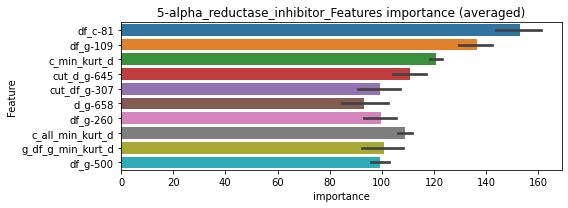

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000293487	valid_1's binary_logloss: 0.001093
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[834]	training's binary_logloss: 0.000285339	valid_1's binary_logloss: 0.000858941
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000289784	valid_1's binary_logloss: 0.00102207


len(valid_index) : 952
================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.0013725818817934006


Early stopping, best iteration is:
[737]	training's binary_logloss: 0.000293545	valid_1's binary_logloss: 0.00251509


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000295372	valid_1's binary_logloss: 0.000831571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000289712	valid_1's binary_logloss: 0.00103864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000304841	valid_1's binary_logloss: 0.00218194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013890, Threshold: 0.0040182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0040182, conf_0:0.00281, conf_1:0.00522
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0340182


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.000830726


threshold: 0.0340182, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.02721, conf_1:0.04082
threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287835	valid_1's binary_logloss: 0.000885126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.00028748	valid_1's binary_logloss: 0.00124907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000290913	valid_1's binary_logloss: 0.00234496
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0331658, Threshold: 0.0340182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0340182, conf_0:0.03062, conf_1:0.03742


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000289206	valid_1's binary_logloss: 0.000860384


threshold: 0.0340182, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


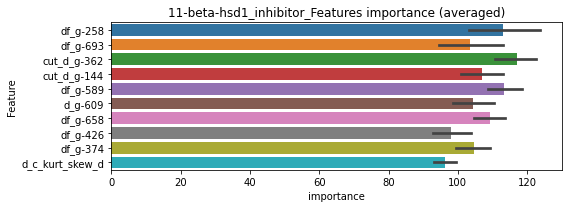

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284511	valid_1's binary_logloss: 0.000810789
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000284522	valid_1's binary_logloss: 0.00081077


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000290508	valid_1's binary_logloss: 0.000924504


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000298043	valid_1's binary_logloss: 0.00124361


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000291321	valid_1's binary_logloss: 0.000776675


11-beta-hsd1_inhibitor logloss: 0.0009389364299642631
acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000336517	valid_1's binary_logloss: 0.00491599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000343889	valid_1's binary_logloss: 0.0039385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357722	valid_1's binary_logloss: 0.00231797
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018501, Threshold: 0.0046275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046275, conf_0:0.00324, conf_1:0.00602
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0346275


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000348473	valid_1's binary_logloss: 0.00688178


threshold: 0.0346275, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0346275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0346275, conf_0:0.02770, conf_1:0.04155
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0646275


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000331762	valid_1's binary_logloss: 0.00544989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000338596	valid_1's binary_logloss: 0.0036296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000381795	valid_1's binary_logloss: 0.00289043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158005, Threshold: 0.0646275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0646275, conf_0:0.05816, conf_1:0.07109


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000336819	valid_1's binary_logloss: 0.00643042


threshold: 0.0646275, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


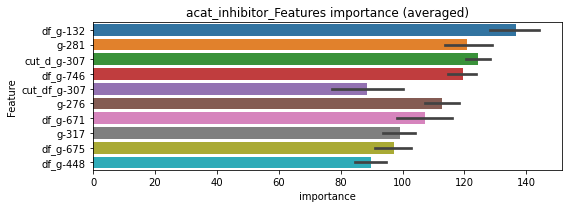

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000329791	valid_1's binary_logloss: 0.00349467


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000360797	valid_1's binary_logloss: 0.00270942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000354877	valid_1's binary_logloss: 0.00270428


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000340395	valid_1's binary_logloss: 0.00452011


acat_inhibitor logloss: 0.0033571775050696235


mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0143386	valid_1's binary_logloss: 0.107565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00889523	valid_1's binary_logloss: 0.0864293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00668826	valid_1's binary_logloss: 0.0626972
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0216754, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 372 → Positive_corect_labels: 1221/7303
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02165, conf_1:0.04020


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0138904	valid_1's binary_logloss: 0.112011


threshold: 0.0309253, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1221.0/7303, y_label_rate: 0.1671916
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00662938	valid_1's binary_logloss: 0.0665373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00839507	valid_1's binary_logloss: 0.0752472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00731559	valid_1's binary_logloss: 0.0710444
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0285808, Threshold: 0.0309253, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00437324	valid_1's binary_logloss: 0.0472012


Remove_noisy_data: 100 → Positive_corect_labels: 1171.0/7203
p_label_rate: 0.0097941 Vs.target_rate: 0.00798
Num_p_label: 39.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02474, conf_1:0.03711
threshold: 0.0309253, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1171.0/7203, y_label_rate: 0.1625712
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00202772	valid_1's binary_logloss: 0.0339284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00799845	valid_1's binary_logloss: 0.054996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00449011	valid_1's binary_logloss: 0.0505958
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996


Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00200921	valid_1's binary_logloss: 0.0345564


y_Threshold: 0.0229872, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1140.0/7141
p_label_rate: 0.0045203 Vs.target_rate: 0.00798
Num_p_label: 18.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02783, conf_1:0.03402
threshold: 0.0309253, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1140.0/7141, y_label_rate: 0.1596415


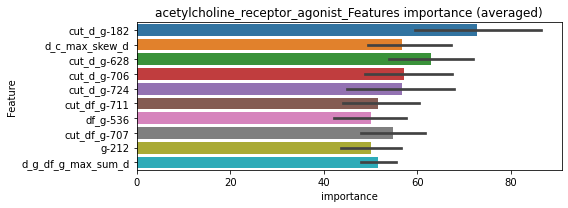

len(train_index) : 5355
len(valid_index) : 1786
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00242913	valid_1's binary_logloss: 0.0317368
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00309867	valid_1's binary_logloss: 0.0252046
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.0031401	valid_1's binary_logloss: 0.0332932
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_agonist logloss: 0.028202067164517144
acetylcholine_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00153141	valid_1's binary_logloss: 0.0225717
mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0273087	valid_1's binary_logloss: 0.129079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.025651	valid_1's binary_logloss: 0.126124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.0284169	valid_1's binary_logloss: 0.13548
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.962, PR-AUC:0.933
y_Threshold: 0.0390041, Threshold: 0.0528360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 614 → Positive_corect_labels: 1350/8426
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.03699, conf_1:0.06869


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0219167	valid_1's binary_logloss: 0.128705


threshold: 0.0528360, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1350.0/8426, y_label_rate: 0.1602184
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00944365	valid_1's binary_logloss: 0.0745008
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.00796747	valid_1's binary_logloss: 0.0764743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00699515	valid_1's binary_logloss: 0.0669077
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0289300, Threshold: 0.0528360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 1286.0/8298


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.007474	valid_1's binary_logloss: 0.0577917


p_label_rate: 0.0017579 Vs.target_rate: 0.01264
Num_p_label: 7.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.04227, conf_1:0.06340
threshold: 0.0528360, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 1286.0/8298, y_label_rate: 0.1549771
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00400571	valid_1's binary_logloss: 0.0455321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00399619	valid_1's binary_logloss: 0.044868
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0043505	valid_1's binary_logloss: 0.0369336
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0214682, Threshold: 0.0528360, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00358913	valid_1's binary_logloss: 0.0331879


Remove_noisy_data: 54 → Positive_corect_labels: 1259.0/8244
p_label_rate: 0.0005023 Vs.target_rate: 0.01264
Num_p_label: 2.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.04755, conf_1:0.05812
threshold: 0.0528360, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1259.0/8244, y_label_rate: 0.1527171


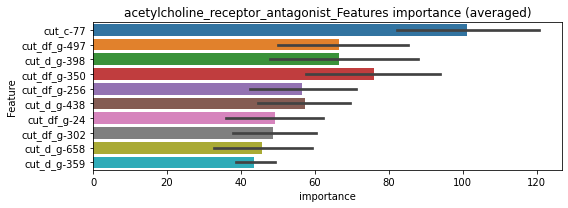

len(train_index) : 6183
len(valid_index) : 2061
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00199669	valid_1's binary_logloss: 0.0293831
Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00321454	valid_1's binary_logloss: 0.0366339
Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00303447	valid_1's binary_logloss: 0.0285348
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.030530486745546634
acetylcholine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00205062	valid_1's binary_logloss: 0.0275702


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000685024	valid_1's binary_logloss: 0.0325866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000671906	valid_1's binary_logloss: 0.0281289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000898113	valid_1's binary_logloss: 0.0176292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000732003	valid_1's binary_logloss: 0.0236906


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0081002, Threshold: 0.0223018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0223018, conf_0:0.01561, conf_1:0.02899
Num_p_label: 8.0, Expected: 12.2, Adj_threshold_1: 0.0523018
threshold: 0.0523018, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.00062549	valid_1's binary_logloss: 0.0339438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000685437	valid_1's binary_logloss: 0.0218289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000648642	valid_1's binary_logloss: 0.0195687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000633588	valid_1's binary_logloss: 0.0118497


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0422440, Threshold: 0.0523018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3785
p_label_rate: 0.0115520 Vs.target_rate: 0.00307
Num_p_label: 46.0, Expected: 12.2, Threshold: 0.0523018, conf_0:0.04184, conf_1:0.06276
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_1: 0.0823018
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_2: 0.1123018
threshold: 0.1123018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3785, y_label_rate: 0.1712021
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000603334	valid_1's binary_logloss: 0.0264773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000811472	valid_1's binary_logloss: 0.034059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000785764	valid_1's binary_logloss: 0.0201517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000690087	valid_1's binary_logloss: 0.0212579


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0421190, Threshold: 0.1123018, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3777
p_label_rate: 0.0062783 Vs.target_rate: 0.00307
Num_p_label: 25.0, Expected: 12.2, Threshold: 0.1123018, conf_0:0.10107, conf_1:0.12353
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.1423018
threshold: 0.1423018, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3777, y_label_rate: 0.1705057


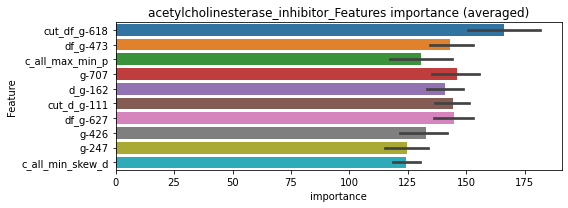

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.00079693	valid_1's binary_logloss: 0.0217842


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000739259	valid_1's binary_logloss: 0.0344124


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000750954	valid_1's binary_logloss: 0.0121758


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000632856	valid_1's binary_logloss: 0.0232561


acetylcholinesterase_inhibitor logloss: 0.022906836849665373
acetylcholinesterase_inhibitor is unpredictable(><)!
adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00054574	valid_1's binary_logloss: 0.0138032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000531352	valid_1's binary_logloss: 0.0177357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000560756	valid_1's binary_logloss: 0.00634743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00050505	valid_1's binary_logloss: 0.0095383


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040146, Threshold: 0.0164993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164993, conf_0:0.01155, conf_1:0.02145
Num_p_label: 4.0, Expected: 9.0, Adj_threshold_1: 0.0464993
threshold: 0.0464993, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.03720, conf_1:0.05580
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000495114	valid_1's binary_logloss: 0.0105113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000590936	valid_1's binary_logloss: 0.0161332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000486152	valid_1's binary_logloss: 0.00529079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000512817	valid_1's binary_logloss: 0.00744289


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0267706, Threshold: 0.0464993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00227
Num_p_label: 15.0, Expected: 9.0, Threshold: 0.0464993, conf_0:0.04185, conf_1:0.05115
threshold: 0.0464993, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


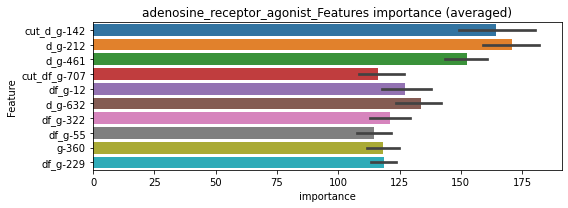

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000483506	valid_1's binary_logloss: 0.0105763
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000481734	valid_1's binary_logloss: 0.0105428


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000564746	valid_1's binary_logloss: 0.0156275


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000504328	valid_1's binary_logloss: 0.00441863


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000534045	valid_1's binary_logloss: 0.00923922


adenosine_receptor_agonist logloss: 0.009966680772964826
adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00117816	valid_1's binary_logloss: 0.061892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000731137	valid_1's binary_logloss: 0.0286949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00086466	valid_1's binary_logloss: 0.0243703
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0096299, Threshold: 0.0369434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 151 → Positive_corect_labels: 644/3774
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0369434, conf_0:0.02586, conf_1:0.04803


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00253063	valid_1's binary_logloss: 0.0733188


Num_p_label: 11.0, Expected: 16.1, Adj_threshold_1: 0.0669434
threshold: 0.0669434, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 644.0/3774, y_label_rate: 0.1706412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000963297	valid_1's binary_logloss: 0.0415591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00159199	valid_1's binary_logloss: 0.0504018
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000787492	valid_1's binary_logloss: 0.0352297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.00100558	valid_1's binary_logloss: 0.0586547


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0274281, Threshold: 0.0669434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3756
p_label_rate: 0.0113009 Vs.target_rate: 0.00403
Num_p_label: 45.0, Expected: 16.1, Threshold: 0.0669434, conf_0:0.05355, conf_1:0.08033
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_1: 0.0969434
Num_p_label: 17.0, Expected: 16.1, Adj_threshold_2: 0.1269434
threshold: 0.1269434, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 635.0/3756, y_label_rate: 0.1690628
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00212758	valid_1's binary_logloss: 0.0615881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000948006	valid_1's binary_logloss: 0.0418461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000705394	valid_1's binary_logloss: 0.0275655
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0248885, Threshold: 0.1269434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 625.0/3736
p_label_rate: 0.0055249 Vs.target_rate: 0.00403
Num_p_label: 22.0, Expected: 16.1, Threshold: 0.1269434, conf_0:0.11425, conf_1:0.13964


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00209308	valid_1's binary_logloss: 0.061121


threshold: 0.1269434, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3736, y_label_rate: 0.1672912


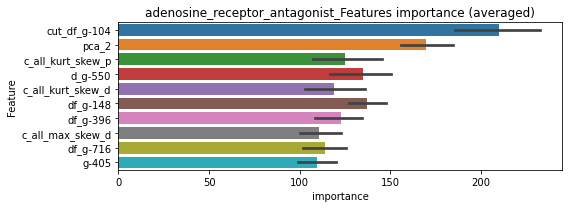

len(train_index) : 2802
len(valid_index) : 934
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2802


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000994353	valid_1's binary_logloss: 0.0272144


len(valid_index) : 934
================================= fold 2/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000912154	valid_1's binary_logloss: 0.0259596


len(train_index) : 2802
len(valid_index) : 934
================================= fold 3/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 4/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00108298	valid_1's binary_logloss: 0.0283992
Training until validation scores don't improve for 30 rounds


adenosine_receptor_antagonist logloss: 0.0334490794492768
adenosine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00128816	valid_1's binary_logloss: 0.0522231


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000301577	valid_1's binary_logloss: 0.000690301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000309077	valid_1's binary_logloss: 0.00177447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000303345	valid_1's binary_logloss: 0.000805331
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014777, Threshold: 0.0079393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0079393, conf_0:0.00556, conf_1:0.01032
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_1: 0.0379393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0679393


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000301737	valid_1's binary_logloss: 0.00218482


threshold: 0.0679393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.0679393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0125565 Vs.target_rate: 0.00076
Num_p_label: 50.0, Expected: 3.0, Threshold: 0.0679393, conf_0:0.05435, conf_1:0.08153
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.0979393
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_2: 0.1279393
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_3: 0.1579393
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_4: 0.1879393
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_5: 0.2179393


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.2479393
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.2779393
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3079393
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_9: 0.3379393
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000284864	valid_1's binary_logloss: 0.000528782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000283604	valid_1's binary_logloss: 0.00111982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000287534	valid_1's binary_logloss: 0.000630651
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0980317, Threshold: 0.3379393, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.3379393, conf_0:0.30415, conf_1:0.37173
threshold: 0.3379393, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000290539	valid_1's binary_logloss: 0.00151058


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


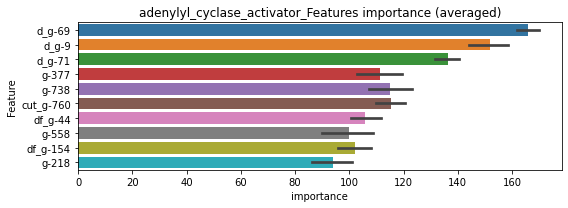

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000281889	valid_1's binary_logloss: 0.000562985


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282459	valid_1's binary_logloss: 0.000992297
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000282336	valid_1's binary_logloss: 0.000992255


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000284722	valid_1's binary_logloss: 0.000606711


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000289422	valid_1's binary_logloss: 0.00178937


adenylyl_cyclase_activator logloss: 0.0009877870478885564


mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0124748	valid_1's binary_logloss: 0.11513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0164522	valid_1's binary_logloss: 0.126484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0248536	valid_1's binary_logloss: 0.126464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0334234, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 505 → Positive_corect_labels: 1277/7838
p_label_rate: 0.0100452 Vs.target_rate: 0.01134


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.0193473	valid_1's binary_logloss: 0.123887


Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03165, conf_1:0.05878
threshold: 0.0452136, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1277.0/7838, y_label_rate: 0.1629242
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00649825	valid_1's binary_logloss: 0.0748464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0109732	valid_1's binary_logloss: 0.08919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00517659	valid_1's binary_logloss: 0.0505789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0332591, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1210.0/7704
p_label_rate: 0.0050226 Vs.target_rate: 0.01134
Num_p_label: 20.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03617, conf_1:0.05426


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0120532	valid_1's binary_logloss: 0.0897429


threshold: 0.0452136, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 1210.0/7704, y_label_rate: 0.1570613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00846917	valid_1's binary_logloss: 0.0575633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.0034326	valid_1's binary_logloss: 0.0491302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00265695	valid_1's binary_logloss: 0.0417249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00237747	valid_1's binary_logloss: 0.0397632


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0242058, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1171.0/7626
p_label_rate: 0.0052737 Vs.target_rate: 0.01134
Num_p_label: 21.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.04069, conf_1:0.04973
threshold: 0.0452136, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1171.0/7626, y_label_rate: 0.1535536


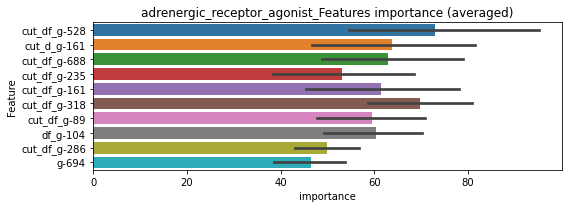

len(train_index) : 5719
len(valid_index) : 1907
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5719
len(valid_index) : 1907
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00143901	valid_1's binary_logloss: 0.0233386
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00318619	valid_1's binary_logloss: 0.0327708
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00302508	valid_1's binary_logloss: 0.0344145
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[236]	training's binary_logloss: 0.001648	valid_1's binary_logloss: 0.0241611


adrenergic_receptor_agonist logloss: 0.028671104595538524
adrenergic_receptor_agonist is unpredictable(><)!


mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.027659	valid_1's binary_logloss: 0.153976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0431136	valid_1's binary_logloss: 0.188592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0276567	valid_1's binary_logloss: 0.159042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.939, PR-AUC:0.895
y_Threshold: 0.0531932, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 660 → Positive_corect_labels: 1128/7293
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.06565, conf_1:0.12191
threshold: 0.0937789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0369145	valid_1's binary_logloss: 0.165856


positive_y_label: 1128.0/7293, y_label_rate: 0.1546689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00792264	valid_1's binary_logloss: 0.0761351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0113764	valid_1's binary_logloss: 0.0995736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00817211	valid_1's binary_logloss: 0.077493
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.991, PR-AUC:0.974
y_Threshold: 0.0481532, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1037.0/7111
p_label_rate: 0.0215972 Vs.target_rate: 0.01512
Num_p_label: 86.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.07502, conf_1:0.11253


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00882429	valid_1's binary_logloss: 0.0792224


threshold: 0.0937789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1037.0/7111, y_label_rate: 0.1458304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00347138	valid_1's binary_logloss: 0.0374791
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0271869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.002524	valid_1's binary_logloss: 0.0468697
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0481822, Threshold: 0.0937789, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00131374	valid_1's binary_logloss: 0.0207719


Remove_noisy_data: 68 → Positive_corect_labels: 1003.0/7043
p_label_rate: 0.0298845 Vs.target_rate: 0.01512
Num_p_label: 119.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.08440, conf_1:0.10316
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1237789
Num_p_label: 91.0, Expected: 60.2, Adj_threshold_2: 0.1537789
Num_p_label: 86.0, Expected: 60.2, Adj_threshold_3: 0.1837789
threshold: 0.1837789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1003.0/7043, y_label_rate: 0.1424109


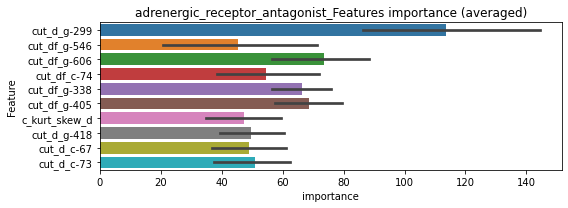

len(train_index) : 5282
len(valid_index) : 1761
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000735263	valid_1's binary_logloss: 0.0130259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000425806	valid_1's binary_logloss: 0.00587168


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5283
len(valid_index) : 1760
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00111721	valid_1's binary_logloss: 0.0204171
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.013393182908759196


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122649	valid_1's binary_logloss: 0.0142586


akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000573662	valid_1's binary_logloss: 0.0158949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000581931	valid_1's binary_logloss: 0.0188952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000712187	valid_1's binary_logloss: 0.0178871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000612878	valid_1's binary_logloss: 0.0234772


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056892, Threshold: 0.0225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0225907, conf_0:0.01581, conf_1:0.02937
Num_p_label: 21.0, Expected: 11.0, Adj_threshold_1: 0.0525907
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_2: 0.0825907
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_3: 0.1125907
threshold: 0.1125907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000558216	valid_1's binary_logloss: 0.0121476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000741333	valid_1's binary_logloss: 0.0186045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000742394	valid_1's binary_logloss: 0.0148287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000615205	valid_1's binary_logloss: 0.0181063


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341104, Threshold: 0.1125907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3793
p_label_rate: 0.0067805 Vs.target_rate: 0.00277
Num_p_label: 27.0, Expected: 11.0, Threshold: 0.1125907, conf_0:0.09007, conf_1:0.13511
Num_p_label: 23.0, Expected: 11.0, Adj_threshold_1: 0.1425907
Num_p_label: 22.0, Expected: 11.0, Adj_threshold_2: 0.1725907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_3: 0.2025907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_4: 0.2325907
Num_p_label: 19.0, Expected: 11.0, Adj_threshold_5: 0.2625907
Num_p_label: 18.0, Expected: 11.0, Adj_threshold_6: 0.2925907
Num_p_label: 16.0, Expected: 11.0, Adj_threshold_7: 0.3225907
threshold: 0.3225907, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 652.0/3793, y_label_rate: 0.1718956
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000548047	valid_1's binary_logloss: 0.00930094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000556899	valid_1's binary_logloss: 0.0144058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000583943	valid_1's binary_logloss: 0.00757063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000558079	valid_1's binary_logloss: 0.0264481


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0290341, Threshold: 0.3225907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3791
p_label_rate: 0.0037670 Vs.target_rate: 0.00277
Num_p_label: 15.0, Expected: 11.0, Threshold: 0.3225907, conf_0:0.29033, conf_1:0.35485
threshold: 0.3225907, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3791, y_label_rate: 0.1717225


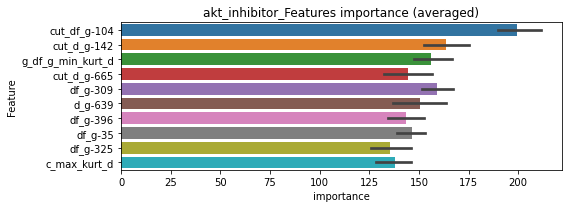

len(train_index) : 2843
len(valid_index) : 948
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000563168	valid_1's binary_logloss: 0.00868576
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000559702	valid_1's binary_logloss: 0.00864827


len(train_index) : 2843
len(valid_index) : 948
================================= fold 2/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000578276	valid_1's binary_logloss: 0.0232931


len(train_index) : 2843
len(valid_index) : 948
================================= fold 3/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000605048	valid_1's binary_logloss: 0.00735303


len(train_index) : 2844
len(valid_index) : 947
================================= fold 4/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


akt_inhibitor logloss: 0.014938555613857256


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000843825	valid_1's binary_logloss: 0.0204211


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00030128	valid_1's binary_logloss: 0.00110657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000297411	valid_1's binary_logloss: 0.00198953
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000300869	valid_1's binary_logloss: 0.000669514
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015422, Threshold: 0.0064593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0064593, conf_0:0.00452, conf_1:0.00840
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_1: 0.0364593
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_2: 0.0664593


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000300546	valid_1's binary_logloss: 0.000849411


threshold: 0.0664593, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0664593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0032647 Vs.target_rate: 0.00080
Num_p_label: 13.0, Expected: 3.2, Threshold: 0.0664593, conf_0:0.05317, conf_1:0.07975
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0964593


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000291935	valid_1's binary_logloss: 0.00113523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000292047	valid_1's binary_logloss: 0.00291201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000297713	valid_1's binary_logloss: 0.000716836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0923505, Threshold: 0.0964593, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00080
Num_p_label: 6.0, Expected: 3.2, Threshold: 0.0964593, conf_0:0.08681, conf_1:0.10611


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000288584	valid_1's binary_logloss: 0.000685506


threshold: 0.0964593, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


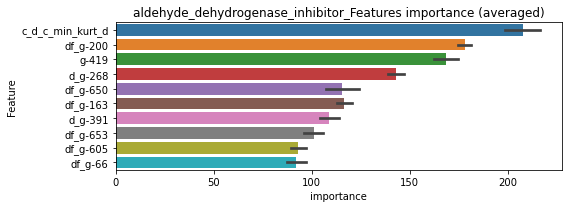

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000296478	valid_1's binary_logloss: 0.00109497


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000286763	valid_1's binary_logloss: 0.00172282
Early stopping, best iteration is:
[1071]	training's binary_logloss: 0.000284037	valid_1's binary_logloss: 0.00171502


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00029101	valid_1's binary_logloss: 0.000592592
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000291001	valid_1's binary_logloss: 0.000592579


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000288496	valid_1's binary_logloss: 0.000665398
Early stopping, best iteration is:
[1015]	training's binary_logloss: 0.000288132	valid_1's binary_logloss: 0.000664694


aldehyde_dehydrogenase_inhibitor logloss: 0.001016955644742755
alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000486189	valid_1's binary_logloss: 0.0120713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000457894	valid_1's binary_logloss: 0.0117198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000489002	valid_1's binary_logloss: 0.00368998
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000505768	valid_1's binary_logloss: 0.00754023


y_Threshold: 0.0036046, Threshold: 0.0156094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0156094, conf_0:0.01093, conf_1:0.02029
Num_p_label: 14.0, Expected: 7.0, Adj_threshold_1: 0.0456094
threshold: 0.0456094, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000484016	valid_1's binary_logloss: 0.0112284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000464298	valid_1's binary_logloss: 0.0112455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000486353	valid_1's binary_logloss: 0.00284733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000459446	valid_1's binary_logloss: 0.005876


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242813, Threshold: 0.0456094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0077850 Vs.target_rate: 0.00176
Num_p_label: 31.0, Expected: 7.0, Threshold: 0.0456094, conf_0:0.03649, conf_1:0.05473
Num_p_label: 21.0, Expected: 7.0, Adj_threshold_1: 0.0756094
Num_p_label: 13.0, Expected: 7.0, Adj_threshold_2: 0.1056094
threshold: 0.1056094, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00046215	valid_1's binary_logloss: 0.0117586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000566243	valid_1's binary_logloss: 0.0175228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000478164	valid_1's binary_logloss: 0.00446852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000468824	valid_1's binary_logloss: 0.00965026


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130050, Threshold: 0.1056094, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0037670 Vs.target_rate: 0.00176
Num_p_label: 15.0, Expected: 7.0, Threshold: 0.1056094, conf_0:0.09505, conf_1:0.11617
threshold: 0.1056094, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


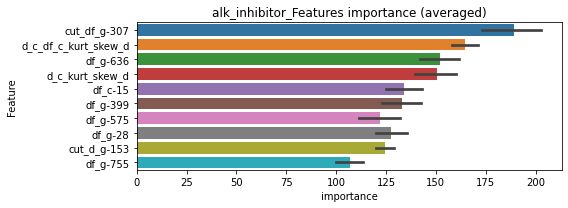

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000712142	valid_1's binary_logloss: 0.0134692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00046105	valid_1's binary_logloss: 0.00438537


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000455714	valid_1's binary_logloss: 0.00475769
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000457472	valid_1's binary_logloss: 0.00475497


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000515079	valid_1's binary_logloss: 0.00640811


alk_inhibitor logloss: 0.007255466180909576
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000237565	valid_1's binary_logloss: 0.00179472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000238117	valid_1's binary_logloss: 0.00194385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000238308	valid_1's binary_logloss: 0.000402555
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008890, Threshold: 0.0038962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0038962, conf_0:0.00273, conf_1:0.00507
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0338962


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000238302	valid_1's binary_logloss: 0.000929652


threshold: 0.0338962, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.0338962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00050
Num_p_label: 20.0, Expected: 2.0, Threshold: 0.0338962, conf_0:0.02712, conf_1:0.04068
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_1: 0.0638962
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_2: 0.0938962
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1238962


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000220557	valid_1's binary_logloss: 0.00168382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000221782	valid_1's binary_logloss: 0.00228922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000224483	valid_1's binary_logloss: 0.000301403
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0452177, Threshold: 0.1238962, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1238962, conf_0:0.11151, conf_1:0.13629
threshold: 0.1238962, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000221229	valid_1's binary_logloss: 0.00147984


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


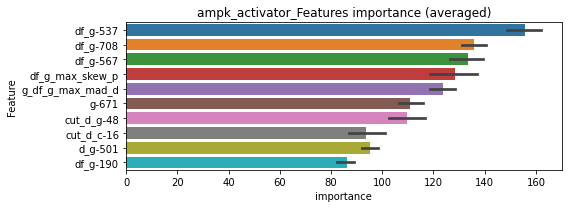

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[833]	training's binary_logloss: 0.000225311	valid_1's binary_logloss: 0.000847639
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000227512	valid_1's binary_logloss: 0.00236184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000224783	valid_1's binary_logloss: 0.000305102
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.0010467053423657555


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000224029	valid_1's binary_logloss: 0.000672236


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000250037	valid_1's binary_logloss: 0.000811305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000246072	valid_1's binary_logloss: 0.000523355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000256743	valid_1's binary_logloss: 0.00033698
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011113, Threshold: 0.0170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00025024	valid_1's binary_logloss: 0.000509345


Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0170543, conf_0:0.01194, conf_1:0.02217
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0470543
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_2: 0.0770543
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_3: 0.1070543
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1370543
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_5: 0.1670543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_6: 0.1970543
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_7: 0.2270543
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.2570543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.2870543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.3170543
threshold: 0.3170543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.3170543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00050
Num_p_label: 9.0, Expected: 2.0, Threshold: 0.3170543, conf_0:0.25364, conf_1:0.38047
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.3470543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.3770543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.4070543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.4370543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_5: 0.4670543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.4970543
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5270543
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.5570543


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.000372644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000240927	valid_1's binary_logloss: 0.000712023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00024276	valid_1's binary_logloss: 0.000315518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1267599, Threshold: 0.5570543, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.5570543, conf_0:0.50135, conf_1:0.61276
threshold: 0.5570543, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000235299	valid_1's binary_logloss: 0.000391198


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


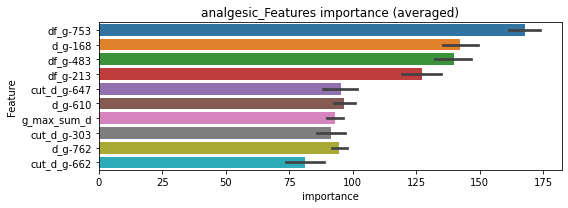

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000239206	valid_1's binary_logloss: 0.000343283
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000241573	valid_1's binary_logloss: 0.0003742


================================= fold 3/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000240838	valid_1's binary_logloss: 0.000361965
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0003605182145955004


Early stopping, best iteration is:
[838]	training's binary_logloss: 0.000242793	valid_1's binary_logloss: 0.000362643


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000500579	valid_1's binary_logloss: 0.0157394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000526369	valid_1's binary_logloss: 0.0136869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000517144	valid_1's binary_logloss: 0.00170681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0040677, Threshold: 0.0092444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000685124	valid_1's binary_logloss: 0.0181441


p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0092444, conf_0:0.00647, conf_1:0.01202
Num_p_label: 5.0, Expected: 8.0, Adj_threshold_1: 0.0392444
threshold: 0.0392444, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03140, conf_1:0.04709
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000551834	valid_1's binary_logloss: 0.013085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000496987	valid_1's binary_logloss: 0.00786898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000499157	valid_1's binary_logloss: 0.00911708
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000567541	valid_1's binary_logloss: 0.0190986


y_Threshold: 0.0215354, Threshold: 0.0392444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0020090 Vs.target_rate: 0.00202
Num_p_label: 8.0, Expected: 8.0, Threshold: 0.0392444, conf_0:0.03532, conf_1:0.04317
threshold: 0.0392444, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


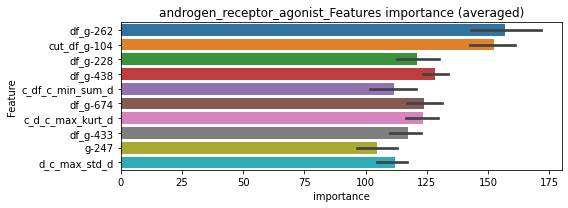

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000538829	valid_1's binary_logloss: 0.0142838


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000524873	valid_1's binary_logloss: 0.00744778


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000526643	valid_1's binary_logloss: 0.00844429


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.012789518273662119


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000837047	valid_1's binary_logloss: 0.0209899


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00108392	valid_1's binary_logloss: 0.0533942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00109866	valid_1's binary_logloss: 0.0403294
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.0010541	valid_1's binary_logloss: 0.0270576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000687266	valid_1's binary_logloss: 0.0331268


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0085820, Threshold: 0.0330483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 650/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0330483, conf_0:0.02313, conf_1:0.04296
Num_p_label: 11.0, Expected: 14.9, Adj_threshold_1: 0.0630483
threshold: 0.0630483, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3788, y_label_rate: 0.1715945
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00120772	valid_1's binary_logloss: 0.0506104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000723568	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000748183	valid_1's binary_logloss: 0.0365973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00068483	valid_1's binary_logloss: 0.0207164


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0258344, Threshold: 0.0630483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0115520 Vs.target_rate: 0.00374
Num_p_label: 46.0, Expected: 14.9, Threshold: 0.0630483, conf_0:0.05044, conf_1:0.07566
Num_p_label: 28.0, Expected: 14.9, Adj_threshold_1: 0.0930483
Num_p_label: 22.0, Expected: 14.9, Adj_threshold_2: 0.1230483
threshold: 0.1230483, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 642.0/3772, y_label_rate: 0.1702015
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000694565	valid_1's binary_logloss: 0.0382965
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000755064	valid_1's binary_logloss: 0.0380708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[752]	training's binary_logloss: 0.000701315	valid_1's binary_logloss: 0.0253419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000648289	valid_1's binary_logloss: 0.026751


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316004, Threshold: 0.1230483, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00374
Num_p_label: 15.0, Expected: 14.9, Threshold: 0.1230483, conf_0:0.11074, conf_1:0.13535
threshold: 0.1230483, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 639.0/3766, y_label_rate: 0.1696760


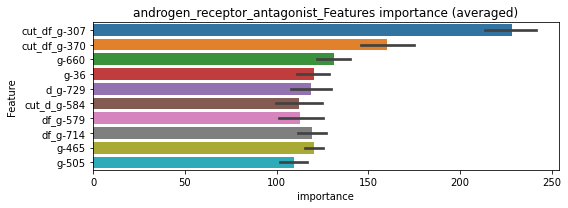

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00090653	valid_1's binary_logloss: 0.0353433


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00133032	valid_1's binary_logloss: 0.0304681
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000669812	valid_1's binary_logloss: 0.0171249
Early stopping, best iteration is:
[1021]	training's binary_logloss: 0.000661971	valid_1's binary_logloss: 0.0170335


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


androgen_receptor_antagonist logloss: 0.02868373273573699
androgen_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00173446	valid_1's binary_logloss: 0.031881


anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000805734	valid_1's binary_logloss: 0.0373528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000887396	valid_1's binary_logloss: 0.0388489
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.00065641	valid_1's binary_logloss: 0.0227294
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.996
y_Threshold: 0.0075782, Threshold: 0.0140226, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.00126851	valid_1's binary_logloss: 0.0398361


Remove_noisy_data: 138 → Positive_corect_labels: 651/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0140226, conf_0:0.00982, conf_1:0.01823
Num_p_label: 3.0, Expected: 13.4, Adj_threshold_1: 0.0440226
threshold: 0.0440226, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3788, y_label_rate: 0.1718585
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000640697	valid_1's binary_logloss: 0.0262237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00065665	valid_1's binary_logloss: 0.0355458
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.000632052	valid_1's binary_logloss: 0.0199917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000605418	valid_1's binary_logloss: 0.0180682


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0263874, Threshold: 0.0440226, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 650.0/3786
p_label_rate: 0.0025113 Vs.target_rate: 0.00336
Num_p_label: 10.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03522, conf_1:0.05283
threshold: 0.0440226, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3786, y_label_rate: 0.1716852
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000825513	valid_1's binary_logloss: 0.0323522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000599036	valid_1's binary_logloss: 0.0221406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000804399	valid_1's binary_logloss: 0.0258057
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0275158, Threshold: 0.0440226, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00108687	valid_1's binary_logloss: 0.0300572


Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3780
p_label_rate: 0.0042692 Vs.target_rate: 0.00336
Num_p_label: 17.0, Expected: 13.4, Threshold: 0.0440226, conf_0:0.03962, conf_1:0.04842
threshold: 0.0440226, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3780, y_label_rate: 0.1711640


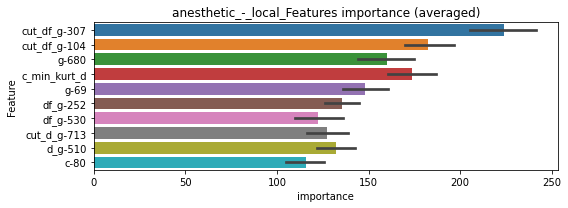

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00096067	valid_1's binary_logloss: 0.0250077
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00114779	valid_1's binary_logloss: 0.0337437
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00115606	valid_1's binary_logloss: 0.0269487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000813471	valid_1's binary_logloss: 0.0191044


anesthetic_-_local logloss: 0.02620112965545571
anesthetic_-_local is unpredictable(><)!
angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000405947	valid_1's binary_logloss: 0.00786467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000454054	valid_1's binary_logloss: 0.00968031
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000625617	valid_1's binary_logloss: 0.00629112
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031296, Threshold: 0.0145072, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000411896	valid_1's binary_logloss: 0.00405881


Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0145072, conf_0:0.01016, conf_1:0.01886
Num_p_label: 9.0, Expected: 6.0, Adj_threshold_1: 0.0445072
threshold: 0.0445072, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


y_Threshold: 0.0318533, Threshold: 0.0445072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804
p_label_rate: 0.0120542 Vs.target_rate: 0.00151
Num_p_label: 48.0, Expected: 6.0, Threshold: 0.0445072, conf_0:0.03561, conf_1:0.05341
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_1: 0.0745072
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.1045072
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_3: 0.1345072
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_4: 0.1645072
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000413649	valid_1's binary_logloss: 0.00761375
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000418859	valid_1's binary_logloss: 0.00890248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000432727	valid_1's binary_logloss: 0.00517285
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318533, Threshold: 0.1645072, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3804


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000402393	valid_1's binary_logloss: 0.00390791


p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.1645072, conf_0:0.14806, conf_1:0.18096
threshold: 0.1645072, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3804, y_label_rate: 0.1724501


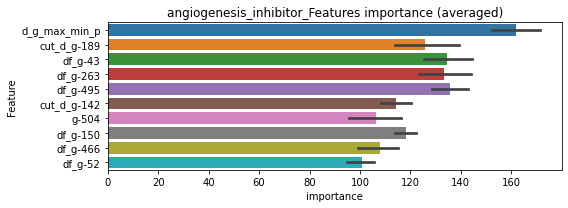

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000424997	valid_1's binary_logloss: 0.00773501


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.000432076	valid_1's binary_logloss: 0.00575225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000555378	valid_1's binary_logloss: 0.00474427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.00041548	valid_1's binary_logloss: 0.00386348


angiogenesis_inhibitor logloss: 0.005523752747670818
angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000418584	valid_1's binary_logloss: 0.00556509
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000399961	valid_1's binary_logloss: 0.00405465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000416045	valid_1's binary_logloss: 0.00248361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000469646	valid_1's binary_logloss: 0.00737596


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029452, Threshold: 0.0104258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0104258, conf_0:0.00730, conf_1:0.01355
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0404258
threshold: 0.0404258, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000399668	valid_1's binary_logloss: 0.00454059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000397713	valid_1's binary_logloss: 0.00382142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000395653	valid_1's binary_logloss: 0.00279267
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000411119	valid_1's binary_logloss: 0.00784232


y_Threshold: 0.0176026, Threshold: 0.0404258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0060271 Vs.target_rate: 0.00155
Num_p_label: 24.0, Expected: 6.2, Threshold: 0.0404258, conf_0:0.03234, conf_1:0.04851
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0704258
threshold: 0.0704258, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00039683	valid_1's binary_logloss: 0.00795515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000392811	valid_1's binary_logloss: 0.00263301
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000397313	valid_1's binary_logloss: 0.00177336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000398883	valid_1's binary_logloss: 0.00415359


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381382, Threshold: 0.0704258, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.0704258, conf_0:0.06338, conf_1:0.07747
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1004258
threshold: 0.1004258, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


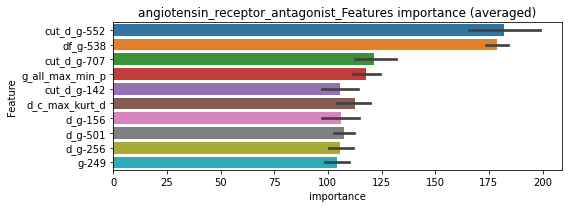

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000404189	valid_1's binary_logloss: 0.00580119


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039981	valid_1's binary_logloss: 0.0021783
Early stopping, best iteration is:
[1052]	training's binary_logloss: 0.000396203	valid_1's binary_logloss: 0.00217045


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000399323	valid_1's binary_logloss: 0.00189092
Early stopping, best iteration is:
[1055]	training's binary_logloss: 0.000394263	valid_1's binary_logloss: 0.00188063


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000431407	valid_1's binary_logloss: 0.00483277


angiotensin_receptor_antagonist logloss: 0.003671636925705246
anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000709731	valid_1's binary_logloss: 0.0297919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000743229	valid_1's binary_logloss: 0.0177298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00127118	valid_1's binary_logloss: 0.0416747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000643173	valid_1's binary_logloss: 0.0256803


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0079713, Threshold: 0.0830347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 653/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0830347, conf_0:0.05812, conf_1:0.10795
Num_p_label: 28.0, Expected: 12.2, Adj_threshold_1: 0.1130347
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1430347
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1730347
Num_p_label: 14.0, Expected: 12.2, Adj_threshold_4: 0.2030347
threshold: 0.2030347, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3795, y_label_rate: 0.1720685
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00063774	valid_1's binary_logloss: 0.0206896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.00065508	valid_1's binary_logloss: 0.0263997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000850047	valid_1's binary_logloss: 0.0317273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000716718	valid_1's binary_logloss: 0.0215343


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0313543, Threshold: 0.2030347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3787
p_label_rate: 0.0113009 Vs.target_rate: 0.00307
Num_p_label: 45.0, Expected: 12.2, Threshold: 0.2030347, conf_0:0.16243, conf_1:0.24364
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_1: 0.2330347
Num_p_label: 38.0, Expected: 12.2, Adj_threshold_2: 0.2630347
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_3: 0.2930347
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.3230347
Num_p_label: 25.0, Expected: 12.2, Adj_threshold_5: 0.3530347
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_6: 0.3830347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_7: 0.4130347
Num_p_label: 20.0, Expected: 12.2, Adj_threshold_8: 0.4430347
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_9: 0.4730347
threshold: 0.4730347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3787, y_label_rate: 0.1713758
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000957605	valid_1's binary_logloss: 0.034518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00156359	valid_1's binary_logloss: 0.034108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[790]	training's binary_logloss: 0.000578716	valid_1's binary_logloss: 0.0283533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00068037	valid_1's binary_logloss: 0.0180298


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0329758, Threshold: 0.4730347, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 643.0/3775
p_label_rate: 0.0050226 Vs.target_rate: 0.00307
Num_p_label: 20.0, Expected: 12.2, Threshold: 0.4730347, conf_0:0.42573, conf_1:0.52034
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_1: 0.5030347
threshold: 0.5030347, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3775, y_label_rate: 0.1703311


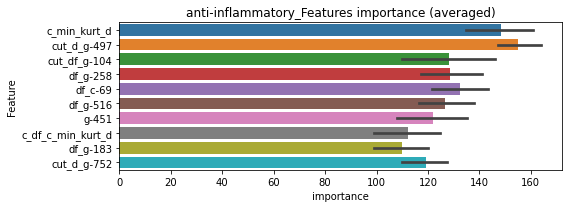

len(train_index) : 2831
len(valid_index) : 944
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00071397	valid_1's binary_logloss: 0.0259386


len(train_index) : 2831
len(valid_index) : 944
================================= fold 2/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000776895	valid_1's binary_logloss: 0.0196543


len(train_index) : 2831
len(valid_index) : 944
================================= fold 3/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000611349	valid_1's binary_logloss: 0.0091996


len(train_index) : 2832
len(valid_index) : 943
================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.0204779864807417
anti-inflammatory is unpredictable(><)!


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00169866	valid_1's binary_logloss: 0.0271265


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00036358	valid_1's binary_logloss: 0.00206632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000363848	valid_1's binary_logloss: 0.00297933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000364568	valid_1's binary_logloss: 0.00335179
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018350, Threshold: 0.0057782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0057782, conf_0:0.00404, conf_1:0.00751
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0357782


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000387255	valid_1's binary_logloss: 0.00313934


threshold: 0.0357782, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0357782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0357782, conf_0:0.02862, conf_1:0.04293


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


Num_p_label: 7.0, Expected: 4.0, Adj_threshold_1: 0.0657782
threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000361939	valid_1's binary_logloss: 0.00177708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000357884	valid_1's binary_logloss: 0.00283667
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357279	valid_1's binary_logloss: 0.00286458
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323776, Threshold: 0.0657782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.0657782, conf_0:0.05920, conf_1:0.07236


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000363845	valid_1's binary_logloss: 0.00313742


threshold: 0.0657782, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


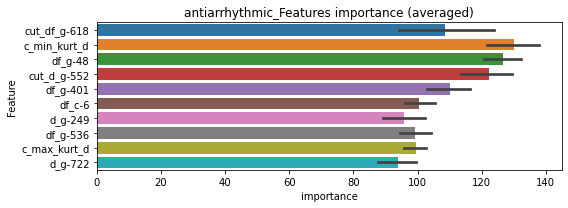

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[931]	training's binary_logloss: 0.000359867	valid_1's binary_logloss: 0.00203144


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000362432	valid_1's binary_logloss: 0.00176967


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000368825	valid_1's binary_logloss: 0.00241148


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000363277	valid_1's binary_logloss: 0.00279776


antiarrhythmic logloss: 0.0022530806415645794
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.00050063	valid_1's binary_logloss: 0.0134287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000491328	valid_1's binary_logloss: 0.00595274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000476723	valid_1's binary_logloss: 0.00179719
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039545, Threshold: 0.0274921, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00052383	valid_1's binary_logloss: 0.0115173


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0274921, conf_0:0.01924, conf_1:0.03574
Num_p_label: 20.0, Expected: 7.2, Adj_threshold_1: 0.0574921
Num_p_label: 12.0, Expected: 7.2, Adj_threshold_2: 0.0874921
threshold: 0.0874921, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.0874921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0092918 Vs.target_rate: 0.00181
Num_p_label: 37.0, Expected: 7.2, Threshold: 0.0874921, conf_0:0.06999, conf_1:0.10499
Num_p_label: 26.0, Expected: 7.2, Adj_threshold_1: 0.1174921
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1474921
Num_p_label: 17.0, Expected: 7.2, Adj_threshold_3: 0.1774921


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000452281	valid_1's binary_logloss: 0.00941195
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000480755	valid_1's binary_logloss: 0.00503528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.00046262	valid_1's binary_logloss: 0.00213598
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354070, Threshold: 0.1774921, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0042692 Vs.target_rate: 0.00181
Num_p_label: 17.0, Expected: 7.2, Threshold: 0.1774921, conf_0:0.15974, conf_1:0.19524


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000782229	valid_1's binary_logloss: 0.00999257


threshold: 0.1774921, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


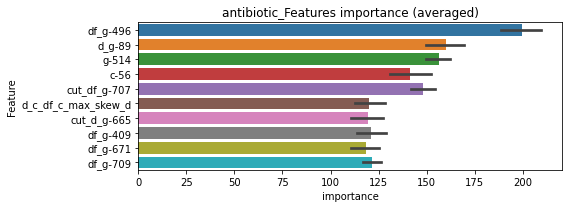

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000581128	valid_1's binary_logloss: 0.0119327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000528768	valid_1's binary_logloss: 0.00605958


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000477379	valid_1's binary_logloss: 0.00203686


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000574555	valid_1's binary_logloss: 0.0113264


antibiotic logloss: 0.007838872136956311
anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000270193	valid_1's binary_logloss: 0.00107908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000269012	valid_1's binary_logloss: 0.00215964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000281806	valid_1's binary_logloss: 0.0039961
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011744, Threshold: 0.0042642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042642, conf_0:0.00298, conf_1:0.00554
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0342642


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000281271	valid_1's binary_logloss: 0.00150459


threshold: 0.0342642, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.02741, conf_1:0.04112


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000268307	valid_1's binary_logloss: 0.00143831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000273388	valid_1's binary_logloss: 0.0028921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000276316	valid_1's binary_logloss: 0.00356943
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0136231, Threshold: 0.0342642, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0342642, conf_0:0.03084, conf_1:0.03769


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000265147	valid_1's binary_logloss: 0.00150335


threshold: 0.0342642, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


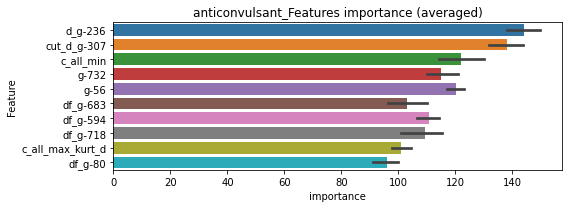

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[876]	training's binary_logloss: 0.00027396	valid_1's binary_logloss: 0.0010614


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000276389	valid_1's binary_logloss: 0.0032059


================================= fold 3/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312775	valid_1's binary_logloss: 0.00362207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000267022	valid_1's binary_logloss: 0.00153325


anticonvulsant logloss: 0.0023553166443561822
antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000333521	valid_1's binary_logloss: 0.00244571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000349696	valid_1's binary_logloss: 0.00219507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000340671	valid_1's binary_logloss: 0.0023464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016560, Threshold: 0.0047737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000335681	valid_1's binary_logloss: 0.00366964


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0047737, conf_0:0.00334, conf_1:0.00621
Num_p_label: 2.0, Expected: 4.3, Adj_threshold_1: 0.0347737
threshold: 0.0347737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.02782, conf_1:0.04173
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000327595	valid_1's binary_logloss: 0.00255322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000332815	valid_1's binary_logloss: 0.00195022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000331419	valid_1's binary_logloss: 0.00238964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431267, Threshold: 0.0347737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000326457	valid_1's binary_logloss: 0.00247976


p_label_rate: 0.0007534 Vs.target_rate: 0.00109
Num_p_label: 3.0, Expected: 4.3, Threshold: 0.0347737, conf_0:0.03130, conf_1:0.03825
threshold: 0.0347737, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


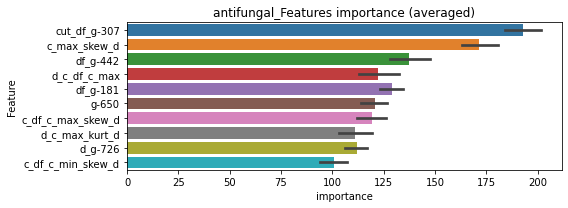

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000327758	valid_1's binary_logloss: 0.00205214
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000327707	valid_1's binary_logloss: 0.00205189


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032701	valid_1's binary_logloss: 0.0018122
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000327143	valid_1's binary_logloss: 0.001812


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000337285	valid_1's binary_logloss: 0.00203393


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000324193	valid_1's binary_logloss: 0.00203547
Early stopping, best iteration is:
[974]	training's binary_logloss: 0.000325702	valid_1's binary_logloss: 0.00203513


antifungal logloss: 0.0019836332980694617
antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000300837	valid_1's binary_logloss: 0.00160641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000301618	valid_1's binary_logloss: 0.00254366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000307666	valid_1's binary_logloss: 0.00128128
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015286, Threshold: 0.1284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.1284315, conf_0:0.08990, conf_1:0.16696
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_1: 0.1584315
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.1884315
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_3: 0.2184315
Num_p_label: 27.0, Expected: 3.0, Adj_threshold_4: 0.2484315
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_5: 0.2784315
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_6: 0.3084315


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000307681	valid_1's binary_logloss: 0.00365955


Num_p_label: 21.0, Expected: 3.0, Adj_threshold_7: 0.3384315
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_8: 0.3684315
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_9: 0.3984315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_10: 0.4284315
threshold: 0.4284315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.4284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0123054 Vs.target_rate: 0.00076
Num_p_label: 49.0, Expected: 3.0, Threshold: 0.4284315, conf_0:0.34275, conf_1:0.51412
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_1: 0.4584315
Num_p_label: 49.0, Expected: 3.0, Adj_threshold_2: 0.4884315
Num_p_label: 48.0, Expected: 3.0, Adj_threshold_3: 0.5184315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_4: 0.5484315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_5: 0.5784315
Num_p_label: 46.0, Expected: 3.0, Adj_threshold_6: 0.6084315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_7: 0.6384315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_8: 0.6684315
Num_p_label: 45.0, Expected: 3.0, Adj_threshold_9: 0.6984315


Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 45.0, Expected: 3.0, Adj_threshold_10: 0.7284315
threshold: 0.7284315, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000282014	valid_1's binary_logloss: 0.00158584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000288541	valid_1's binary_logloss: 0.00291234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000295502	valid_1's binary_logloss: 0.000456913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0705611, Threshold: 0.7284315, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0113009 Vs.target_rate: 0.00076
Num_p_label: 45.0, Expected: 3.0, Threshold: 0.7284315, conf_0:0.65559, conf_1:0.80127
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_1: 0.7584315
Num_p_label: 42.0, Expected: 3.0, Adj_threshold_2: 0.7884315
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.8184315
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_4: 0.8484315
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_5: 0.8784315


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000284539	valid_1's binary_logloss: 0.00242352


Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.9084315
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_7: 0.9384315
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_8: 0.9684315
threshold: 0.9684315, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


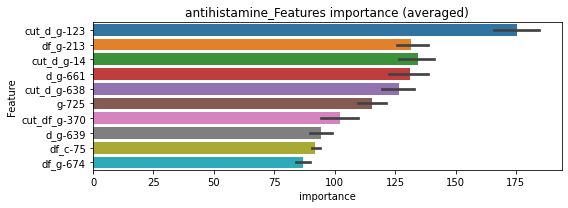

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[797]	training's binary_logloss: 0.000290493	valid_1's binary_logloss: 0.00111577
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000292502	valid_1's binary_logloss: 0.00173783
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[733]	training's binary_logloss: 0.00030276	valid_1's binary_logloss: 0.000493506
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.0012561654570602114


Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000288492	valid_1's binary_logloss: 0.00167713


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000319582	valid_1's binary_logloss: 0.000836848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000321904	valid_1's binary_logloss: 0.00221019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000315665	valid_1's binary_logloss: 0.00285749
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018172, Threshold: 0.0085367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085367, conf_0:0.00598, conf_1:0.01110
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.0385367
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.0685367


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000323833	valid_1's binary_logloss: 0.00269842


threshold: 0.0685367, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.0685367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0057760 Vs.target_rate: 0.00076
Num_p_label: 23.0, Expected: 3.0, Threshold: 0.0685367, conf_0:0.05483, conf_1:0.08224
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0985367
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_2: 0.1285367
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_3: 0.1585367
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_4: 0.1885367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.2185367
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_6: 0.2485367


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.2785367
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.3085367
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.3385367
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000302383	valid_1's binary_logloss: 0.000998629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000317013	valid_1's binary_logloss: 0.00307404
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000305467	valid_1's binary_logloss: 0.000610664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0937998, Threshold: 0.3385367, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3385367, conf_0:0.30468, conf_1:0.37239
threshold: 0.3385367, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000308683	valid_1's binary_logloss: 0.00307889


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


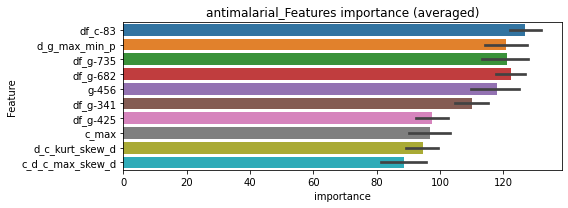

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000301865	valid_1's binary_logloss: 0.000667865


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00196183
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000307368	valid_1's binary_logloss: 0.000740162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000310083	valid_1's binary_logloss: 0.00223711


antimalarial logloss: 0.001401744136139545
antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000686895	valid_1's binary_logloss: 0.0324807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000724789	valid_1's binary_logloss: 0.0300102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000638606	valid_1's binary_logloss: 0.0204495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000833808	valid_1's binary_logloss: 0.0382962


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063311, Threshold: 0.0245009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0245009, conf_0:0.01715, conf_1:0.03185
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0545009
threshold: 0.0545009, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000666342	valid_1's binary_logloss: 0.0249014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000595045	valid_1's binary_logloss: 0.0312224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000612692	valid_1's binary_logloss: 0.0227399
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000916715	valid_1's binary_logloss: 0.0253857


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0289788, Threshold: 0.0545009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0072828 Vs.target_rate: 0.00307
Num_p_label: 29.0, Expected: 12.2, Threshold: 0.0545009, conf_0:0.04360, conf_1:0.06540
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_1: 0.0845009
Num_p_label: 12.0, Expected: 12.2, Adj_threshold_2: 0.1145009
threshold: 0.1145009, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.0011624	valid_1's binary_logloss: 0.0385452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000777857	valid_1's binary_logloss: 0.0262554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.000664722	valid_1's binary_logloss: 0.0231104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000591055	valid_1's binary_logloss: 0.0122879


3 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0194975, Threshold: 0.1145009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.1145009, conf_0:0.10305, conf_1:0.12595
threshold: 0.1145009, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 644.0/3782, y_label_rate: 0.1702803


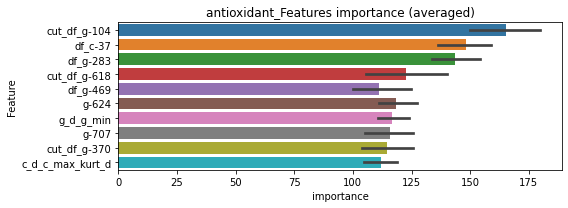

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2836
len(valid_index) : 946


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.0010079	valid_1's binary_logloss: 0.0207826


================================= fold 2/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 antioxidant=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000902215	valid_1's binary_logloss: 0.0364023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000633211	valid_1's binary_logloss: 0.009519


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000728568	valid_1's binary_logloss: 0.0163429


antioxidant logloss: 0.020765845380187855
antioxidant is unpredictable(><)!
antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000417815	valid_1's binary_logloss: 0.00357081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000418203	valid_1's binary_logloss: 0.0053905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000428433	valid_1's binary_logloss: 0.00158723
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000438563	valid_1's binary_logloss: 0.00620361


y_Threshold: 0.0031520, Threshold: 0.0113705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0113705, conf_0:0.00796, conf_1:0.01478
Num_p_label: 3.0, Expected: 6.0, Adj_threshold_1: 0.0413705
threshold: 0.0413705, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03310, conf_1:0.04964
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000403012	valid_1's binary_logloss: 0.00280738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000409263	valid_1's binary_logloss: 0.00424101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000405533	valid_1's binary_logloss: 0.00146298
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000417418	valid_1's binary_logloss: 0.00519325


y_Threshold: 0.0328840, Threshold: 0.0413705, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0413705, conf_0:0.03723, conf_1:0.04551
threshold: 0.0413705, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


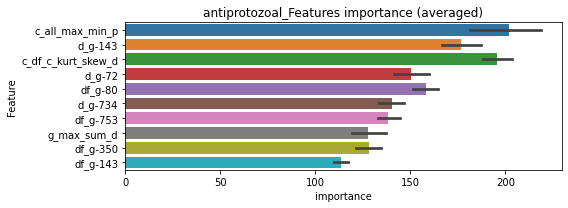

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000402757	valid_1's binary_logloss: 0.00245182
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000400839	valid_1's binary_logloss: 0.00244519


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000421122	valid_1's binary_logloss: 0.00355489


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000413358	valid_1's binary_logloss: 0.00128561


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[903]	training's binary_logloss: 0.000418582	valid_1's binary_logloss: 0.00541574


antiprotozoal logloss: 0.003176738743043914
antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000306219	valid_1's binary_logloss: 0.00233665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000315179	valid_1's binary_logloss: 0.000983663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000311016	valid_1's binary_logloss: 0.001009
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016440, Threshold: 0.0047377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0047377, conf_0:0.00332, conf_1:0.00616
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0347377


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000310787	valid_1's binary_logloss: 0.00219868


threshold: 0.0347377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0347377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00097
Num_p_label: 10.0, Expected: 3.8, Threshold: 0.0347377, conf_0:0.02779, conf_1:0.04169
Num_p_label: 2.0, Expected: 3.8, Adj_threshold_1: 0.0647377


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000303484	valid_1's binary_logloss: 0.00226264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000301279	valid_1's binary_logloss: 0.00086133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000304953	valid_1's binary_logloss: 0.00225575
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0400822, Threshold: 0.0647377, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00097
Num_p_label: 2.0, Expected: 3.8, Threshold: 0.0647377, conf_0:0.05826, conf_1:0.07121


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000301935	valid_1's binary_logloss: 0.00209366


threshold: 0.0647377, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


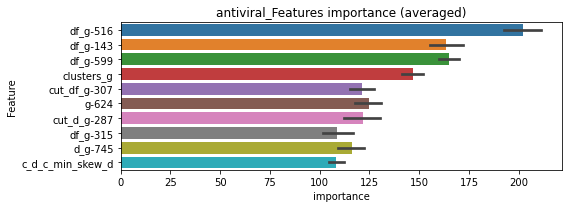

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000300544	valid_1's binary_logloss: 0.00126585


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000300634	valid_1's binary_logloss: 0.000643378


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000301442	valid_1's binary_logloss: 0.000938978


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 antiviral=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000298658	valid_1's binary_logloss: 0.00117079


antiviral logloss: 0.0010047491188444168
apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000862621	valid_1's binary_logloss: 0.0246164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000525137	valid_1's binary_logloss: 0.0199264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000504499	valid_1's binary_logloss: 0.00189393
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000559861	valid_1's binary_logloss: 0.0128709


y_Threshold: 0.0038700, Threshold: 0.0516404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0516404, conf_0:0.03615, conf_1:0.06713
Num_p_label: 31.0, Expected: 8.2, Adj_threshold_1: 0.0816404
Num_p_label: 22.0, Expected: 8.2, Adj_threshold_2: 0.1116404
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_3: 0.1416404
threshold: 0.1416404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000592317	valid_1's binary_logloss: 0.0231096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000561713	valid_1's binary_logloss: 0.0187264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000505169	valid_1's binary_logloss: 0.00210109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0166178, Threshold: 0.1416404, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000557375	valid_1's binary_logloss: 0.013101


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00206
Num_p_label: 47.0, Expected: 8.2, Threshold: 0.1416404, conf_0:0.11331, conf_1:0.16997
Num_p_label: 36.0, Expected: 8.2, Adj_threshold_1: 0.1716404
Num_p_label: 32.0, Expected: 8.2, Adj_threshold_2: 0.2016404
Num_p_label: 28.0, Expected: 8.2, Adj_threshold_3: 0.2316404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_4: 0.2616404
Num_p_label: 25.0, Expected: 8.2, Adj_threshold_5: 0.2916404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_6: 0.3216404
Num_p_label: 23.0, Expected: 8.2, Adj_threshold_7: 0.3516404
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_8: 0.3816404
threshold: 0.3816404, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000491576	valid_1's binary_logloss: 0.0134185
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000543148	valid_1's binary_logloss: 0.0200518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000510232	valid_1's binary_logloss: 0.0123087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000475569	valid_1's binary_logloss: 0.0167723


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155267, Threshold: 0.3816404, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0052737 Vs.target_rate: 0.00206
Num_p_label: 21.0, Expected: 8.2, Threshold: 0.3816404, conf_0:0.34348, conf_1:0.41980
Num_p_label: 19.0, Expected: 8.2, Adj_threshold_1: 0.4116404
threshold: 0.4116404, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


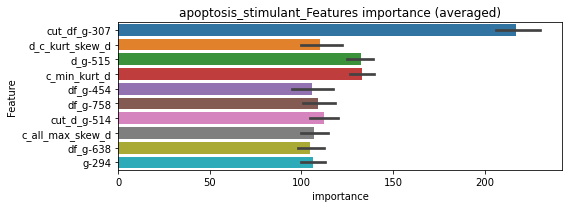

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000498591	valid_1's binary_logloss: 0.00678984


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0010481	valid_1's binary_logloss: 0.0174796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000513389	valid_1's binary_logloss: 0.0141462


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000516041	valid_1's binary_logloss: 0.00658277


apoptosis_stimulant logloss: 0.011253217118314533
aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00051386	valid_1's binary_logloss: 0.015369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000516106	valid_1's binary_logloss: 0.0167593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000605075	valid_1's binary_logloss: 0.00865664
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000493121	valid_1's binary_logloss: 0.00545652


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037195, Threshold: 0.0118336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0118336, conf_0:0.00828, conf_1:0.01538
Num_p_label: 10.0, Expected: 7.9, Adj_threshold_1: 0.0418336
threshold: 0.0418336, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000565906	valid_1's binary_logloss: 0.0161302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000590074	valid_1's binary_logloss: 0.0198864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000518769	valid_1's binary_logloss: 0.0092998
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482737	valid_1's binary_logloss: 0.00413297


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0126361, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0042692 Vs.target_rate: 0.00197
Num_p_label: 17.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03347, conf_1:0.05020
threshold: 0.0418336, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000509244	valid_1's binary_logloss: 0.0156106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000495514	valid_1's binary_logloss: 0.00753214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000486122	valid_1's binary_logloss: 0.00649245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000485669	valid_1's binary_logloss: 0.00536855


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188935, Threshold: 0.0418336, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00197
Num_p_label: 16.0, Expected: 7.9, Threshold: 0.0418336, conf_0:0.03765, conf_1:0.04602
threshold: 0.0418336, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


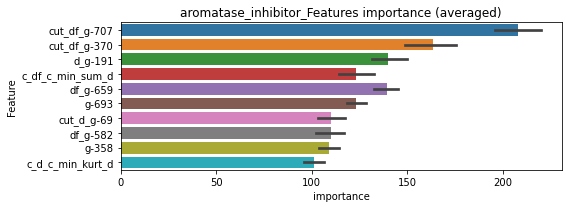

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000550348	valid_1's binary_logloss: 0.0121682


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000549443	valid_1's binary_logloss: 0.00730582


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[826]	training's binary_logloss: 0.000507589	valid_1's binary_logloss: 0.00589788


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000496542	valid_1's binary_logloss: 0.00568374


aromatase_inhibitor logloss: 0.007763920409071238
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000154	valid_1's binary_logloss: 0.000260536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000157972	valid_1's binary_logloss: 0.000565774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000153118	valid_1's binary_logloss: 0.000182664
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003764, Threshold: 0.0013820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013820, conf_0:0.00097, conf_1:0.00180
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.0313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0613820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.0913820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1213820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.1513820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.1813820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.2113820
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.2413820


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000154379	valid_1's binary_logloss: 0.000494978


threshold: 0.2413820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.2413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.2413820, conf_0:0.19311, conf_1:0.28966
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_1: 0.2713820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.3013820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.3313820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_4: 0.3613820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_5: 0.3913820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_6: 0.4213820
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.4513820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.4813820
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.5113820
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_10: 0.5413820
threshold: 0.5413820, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000146004	valid_1's binary_logloss: 0.000328943
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000143719	valid_1's binary_logloss: 0.00072875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000145706	valid_1's binary_logloss: 0.000149571
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0588521, Threshold: 0.5413820, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000145588	valid_1's binary_logloss: 0.00132842


Num_p_label: 3.0, Expected: 1.0, Threshold: 0.5413820, conf_0:0.48724, conf_1:0.59552
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.5713820
threshold: 0.5713820, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


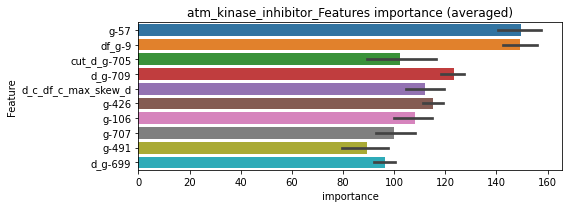

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148808	valid_1's binary_logloss: 0.000223608


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1122]	training's binary_logloss: 0.000146717	valid_1's binary_logloss: 0.000220939
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148109	valid_1's binary_logloss: 0.000330409


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000145259	valid_1's binary_logloss: 0.000326484
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014846	valid_1's binary_logloss: 0.000157546


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1120]	training's binary_logloss: 0.000146148	valid_1's binary_logloss: 0.000155059
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148832	valid_1's binary_logloss: 0.00046763


atm_kinase_inhibitor logloss: 0.00029069853290414994


Early stopping, best iteration is:
[1143]	training's binary_logloss: 0.000145799	valid_1's binary_logloss: 0.000460308


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000177889	valid_1's binary_logloss: 0.000733222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000180515	valid_1's binary_logloss: 0.00132257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000182947	valid_1's binary_logloss: 0.000193594
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005303, Threshold: 0.0016380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0016380, conf_0:0.00115, conf_1:0.00213
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_1: 0.0316380
threshold: 0.0316380, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000178526	valid_1's binary_logloss: 0.00022075


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.0316380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.0316380, conf_0:0.02531, conf_1:0.03797
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.0616380
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.0916380
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_3: 0.1216380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000172479	valid_1's binary_logloss: 0.000221565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00017687	valid_1's binary_logloss: 0.00160816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000171815	valid_1's binary_logloss: 0.00018163
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0630623, Threshold: 0.1216380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1216380, conf_0:0.10947, conf_1:0.13380
threshold: 0.1216380, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000170451	valid_1's binary_logloss: 0.000189606


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


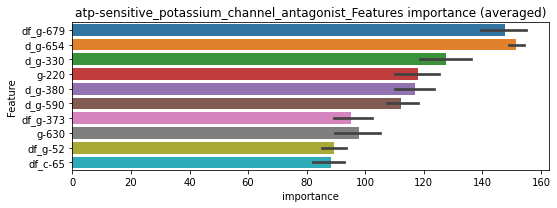

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000171841	valid_1's binary_logloss: 0.000216849
Early stopping, best iteration is:
[1011]	training's binary_logloss: 0.000171654	valid_1's binary_logloss: 0.000216621


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000172911	valid_1's binary_logloss: 0.000694657
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00017212	valid_1's binary_logloss: 0.000192521
Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000171082	valid_1's binary_logloss: 0.000191447


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


atp-sensitive_potassium_channel_antagonist logloss: 0.0003249717578657185


Early stopping, best iteration is:
[959]	training's binary_logloss: 0.000173493	valid_1's binary_logloss: 0.000197274


atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000275399	valid_1's binary_logloss: 0.00106002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000267059	valid_1's binary_logloss: 0.000537844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000267358	valid_1's binary_logloss: 0.000534944
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013214, Threshold: 0.0103970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0103970, conf_0:0.00728, conf_1:0.01352
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0403970
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.0703970


Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000267942	valid_1's binary_logloss: 0.000761697


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.1003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.1303970
threshold: 0.1303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.1303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0055249 Vs.target_rate: 0.00050
Num_p_label: 22.0, Expected: 2.0, Threshold: 0.1303970, conf_0:0.10432, conf_1:0.15648
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_1: 0.1603970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_2: 0.1903970
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.2203970
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.2503970
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_5: 0.2803970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_6: 0.3103970
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_7: 0.3403970


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_8: 0.3703970
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_9: 0.4003970
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_10: 0.4303970
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000256929	valid_1's binary_logloss: 0.000911263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000254574	valid_1's binary_logloss: 0.000496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000255671	valid_1's binary_logloss: 0.000366
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1495911, Threshold: 0.4303970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.4303970, conf_0:0.38736, conf_1:0.47344
threshold: 0.4303970, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000252233	valid_1's binary_logloss: 0.000597943


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


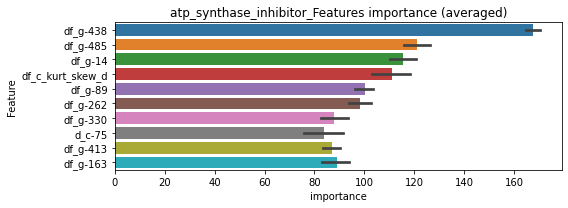

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000257261	valid_1's binary_logloss: 0.00070062
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000264424	valid_1's binary_logloss: 0.000509029
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000263915	valid_1's binary_logloss: 0.000392043
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.0005668666758058954


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000259424	valid_1's binary_logloss: 0.000665774


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00382021	valid_1's binary_logloss: 0.100369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00306144	valid_1's binary_logloss: 0.0768166
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00134277	valid_1's binary_logloss: 0.0534842
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.993


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00141668	valid_1's binary_logloss: 0.0640335


y_Threshold: 0.0086134, Threshold: 0.0222434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0222434, conf_0:0.01557, conf_1:0.02892
Num_p_label: 6.0, Expected: 16.2, Adj_threshold_1: 0.0522434
threshold: 0.0522434, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 647.0/3782, y_label_rate: 0.1710735
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00213054	valid_1's binary_logloss: 0.0710712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00337474	valid_1's binary_logloss: 0.0745535
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00434554	valid_1's binary_logloss: 0.0692111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102456	valid_1's binary_logloss: 0.0503063


2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0220461, Threshold: 0.0522434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0010045 Vs.target_rate: 0.00407
Num_p_label: 4.0, Expected: 16.2, Threshold: 0.0522434, conf_0:0.04179, conf_1:0.06269
threshold: 0.0522434, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00552671	valid_1's binary_logloss: 0.0712024
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00212227	valid_1's binary_logloss: 0.0593217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00195726	valid_1's binary_logloss: 0.0557956
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0203532, Threshold: 0.0522434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 622.0/3732


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00122988	valid_1's binary_logloss: 0.0532955


p_label_rate: 0.0030136 Vs.target_rate: 0.00407
Num_p_label: 12.0, Expected: 16.2, Threshold: 0.0522434, conf_0:0.04702, conf_1:0.05747
threshold: 0.0522434, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 622.0/3732, y_label_rate: 0.1666667


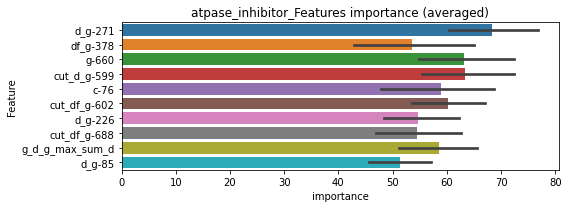

len(train_index) : 2799
len(valid_index) : 933
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00341459	valid_1's binary_logloss: 0.0624718
Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 3/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.0047562	valid_1's binary_logloss: 0.063746
Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 4/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00188194	valid_1's binary_logloss: 0.0371664
Training until validation scores don't improve for 30 rounds


atpase_inhibitor logloss: 0.05536926846617084
atpase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00239259	valid_1's binary_logloss: 0.0580929


atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034189	valid_1's binary_logloss: 0.000993679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00033331	valid_1's binary_logloss: 0.00224811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000340941	valid_1's binary_logloss: 0.000811743
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018670, Threshold: 0.0077848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0077848, conf_0:0.00545, conf_1:0.01012
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_1: 0.0377848
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.0677848


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000337912	valid_1's binary_logloss: 0.00300145


threshold: 0.0677848, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.0677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00080
Num_p_label: 17.0, Expected: 3.2, Threshold: 0.0677848, conf_0:0.05423, conf_1:0.08134
Num_p_label: 15.0, Expected: 3.2, Adj_threshold_1: 0.0977848
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.1277848
Num_p_label: 11.0, Expected: 3.2, Adj_threshold_3: 0.1577848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_4: 0.1877848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_5: 0.2177848
Num_p_label: 10.0, Expected: 3.2, Adj_threshold_6: 0.2477848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


Num_p_label: 10.0, Expected: 3.2, Adj_threshold_7: 0.2777848
Num_p_label: 9.0, Expected: 3.2, Adj_threshold_8: 0.3077848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_9: 0.3377848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_10: 0.3677848
threshold: 0.3677848, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000328706	valid_1's binary_logloss: 0.000709372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000316595	valid_1's binary_logloss: 0.00240219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000329457	valid_1's binary_logloss: 0.000596903
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0695553, Threshold: 0.3677848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00080
Num_p_label: 8.0, Expected: 3.2, Threshold: 0.3677848, conf_0:0.33101, conf_1:0.40456
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.3977848
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.4277848
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.4577848


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000323186	valid_1's binary_logloss: 0.0026407


threshold: 0.4577848, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


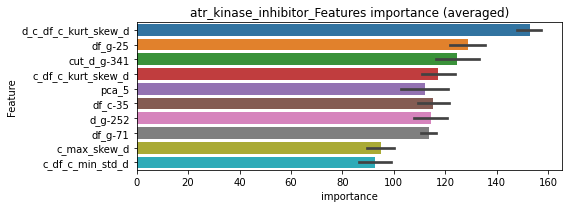

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000320299	valid_1's binary_logloss: 0.000749814


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000322478	valid_1's binary_logloss: 0.00225709


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000333935	valid_1's binary_logloss: 0.000611316


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000325236	valid_1's binary_logloss: 0.00240642


atr_kinase_inhibitor logloss: 0.0015059267250632988
aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000881958	valid_1's binary_logloss: 0.0568125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[850]	training's binary_logloss: 0.000762503	valid_1's binary_logloss: 0.031554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00136191	valid_1's binary_logloss: 0.0474375
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0135857, Threshold: 0.0693398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 643/3775


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.00266856	valid_1's binary_logloss: 0.054091


p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0693398, conf_0:0.04854, conf_1:0.09014
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_1: 0.0993398
Num_p_label: 21.0, Expected: 16.1, Adj_threshold_2: 0.1293398
threshold: 0.1293398, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 643.0/3775, y_label_rate: 0.1703311
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000862029	valid_1's binary_logloss: 0.0496179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00120181	valid_1's binary_logloss: 0.0586189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000755638	valid_1's binary_logloss: 0.019506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00123067	valid_1's binary_logloss: 0.0437949


2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0332130, Threshold: 0.1293398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 630.0/3749
p_label_rate: 0.0118031 Vs.target_rate: 0.00403
Num_p_label: 47.0, Expected: 16.1, Threshold: 0.1293398, conf_0:0.10347, conf_1:0.15521
Num_p_label: 38.0, Expected: 16.1, Adj_threshold_1: 0.1593398
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_2: 0.1893398
Num_p_label: 23.0, Expected: 16.1, Adj_threshold_3: 0.2193398
threshold: 0.2193398, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 630.0/3749, y_label_rate: 0.1680448
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[855]	training's binary_logloss: 0.000648006	valid_1's binary_logloss: 0.032919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000700488	valid_1's binary_logloss: 0.0284171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000644286	valid_1's binary_logloss: 0.0210457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000733582	valid_1's binary_logloss: 0.031736


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0391799, Threshold: 0.2193398, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0080362 Vs.target_rate: 0.00403
Num_p_label: 32.0, Expected: 16.1, Threshold: 0.2193398, conf_0:0.19741, conf_1:0.24127
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_1: 0.2493398
Num_p_label: 22.0, Expected: 16.1, Adj_threshold_2: 0.2793398
threshold: 0.2793398, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 625.0/3739, y_label_rate: 0.1671570


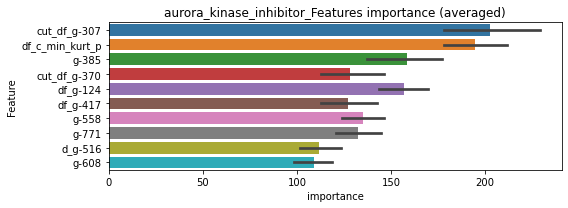

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00201531	valid_1's binary_logloss: 0.0524731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000939109	valid_1's binary_logloss: 0.030178


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000705197	valid_1's binary_logloss: 0.0135027
Early stopping, best iteration is:
[1009]	training's binary_logloss: 0.000701197	valid_1's binary_logloss: 0.0134606


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aurora_kinase_inhibitor logloss: 0.03700029646080822
aurora_kinase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.0021714	valid_1's binary_logloss: 0.0519055


autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00016207	valid_1's binary_logloss: 0.000240223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000165465	valid_1's binary_logloss: 0.0015519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000166417	valid_1's binary_logloss: 0.000202617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005543, Threshold: 0.0042101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0042101, conf_0:0.00295, conf_1:0.00547
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0342101
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0642101
threshold: 0.0642101, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000162438	valid_1's binary_logloss: 0.000263095


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.0642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0107986 Vs.target_rate: 0.00025
Num_p_label: 43.0, Expected: 1.0, Threshold: 0.0642101, conf_0:0.05137, conf_1:0.07705
Num_p_label: 37.0, Expected: 1.0, Adj_threshold_1: 0.0942101
Num_p_label: 32.0, Expected: 1.0, Adj_threshold_2: 0.1242101
Num_p_label: 29.0, Expected: 1.0, Adj_threshold_3: 0.1542101
Num_p_label: 28.0, Expected: 1.0, Adj_threshold_4: 0.1842101
Num_p_label: 22.0, Expected: 1.0, Adj_threshold_5: 0.2142101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_6: 0.2442101
Num_p_label: 18.0, Expected: 1.0, Adj_threshold_7: 0.2742101
Num_p_label: 16.0, Expected: 1.0, Adj_threshold_8: 0.3042101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_9: 0.3342101
Num_p_label: 14.0, Expected: 1.0, Adj_threshold_10: 0.3642101


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


threshold: 0.3642101, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000146026	valid_1's binary_logloss: 0.000933698
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000148291	valid_1's binary_logloss: 0.000176878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000150417	valid_1's binary_logloss: 0.000158003
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1261025, Threshold: 0.3642101, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0035158 Vs.target_rate: 0.00025
Num_p_label: 14.0, Expected: 1.0, Threshold: 0.3642101, conf_0:0.32779, conf_1:0.40063
Num_p_label: 13.0, Expected: 1.0, Adj_threshold_1: 0.3942101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_2: 0.4242101
Num_p_label: 12.0, Expected: 1.0, Adj_threshold_3: 0.4542101
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_4: 0.4842101
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_5: 0.5142101
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_6: 0.5442101
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_7: 0.5742101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_8: 0.6042101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_9: 0.6342101
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_10: 0.6642101


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000148245	valid_1's binary_logloss: 0.000166002


threshold: 0.6642101, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


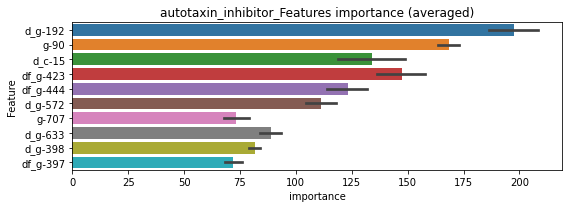

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150529	valid_1's binary_logloss: 0.000517176


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000147894	valid_1's binary_logloss: 0.000512354
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152642	valid_1's binary_logloss: 0.000183569
Early stopping, best iteration is:
[1125]	training's binary_logloss: 0.000150789	valid_1's binary_logloss: 0.000181367


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152753	valid_1's binary_logloss: 0.000158622


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1148]	training's binary_logloss: 0.000149927	valid_1's binary_logloss: 0.00015576
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152892	valid_1's binary_logloss: 0.000171262
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000152224	valid_1's binary_logloss: 0.000170515


autotaxin_inhibitor logloss: 0.0002550672374270517
bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000724653	valid_1's binary_logloss: 0.0326461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00117698	valid_1's binary_logloss: 0.0300991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000550522	valid_1's binary_logloss: 0.00380268
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000628515	valid_1's binary_logloss: 0.0185971


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0072684, Threshold: 0.0240325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0240325, conf_0:0.01682, conf_1:0.03124
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_1: 0.0540325
threshold: 0.0540325, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000632017	valid_1's binary_logloss: 0.017125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000534291	valid_1's binary_logloss: 0.0222518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000559558	valid_1's binary_logloss: 0.0170414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000695483	valid_1's binary_logloss: 0.0250899


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0313949, Threshold: 0.0540325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 647.0/3788
p_label_rate: 0.0110497 Vs.target_rate: 0.00252
Num_p_label: 44.0, Expected: 10.0, Threshold: 0.0540325, conf_0:0.04323, conf_1:0.06484
Num_p_label: 25.0, Expected: 10.0, Adj_threshold_1: 0.0840325
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1140325
Num_p_label: 14.0, Expected: 10.0, Adj_threshold_3: 0.1440325
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000607169	valid_1's binary_logloss: 0.0180508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000914418	valid_1's binary_logloss: 0.028274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000607512	valid_1's binary_logloss: 0.0145562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000516503	valid_1's binary_logloss: 0.00861982


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0315935, Threshold: 0.1440325, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1440325, conf_0:0.12963, conf_1:0.15844
threshold: 0.1440325, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3784, y_label_rate: 0.1704545


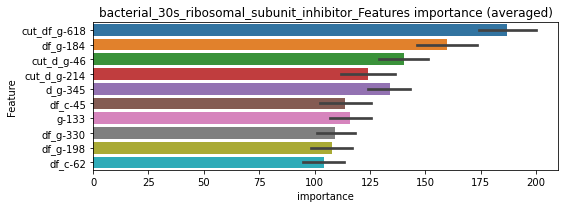

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000643323	valid_1's binary_logloss: 0.0145314


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 946


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000801422	valid_1's binary_logloss: 0.0187439


================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000540764	valid_1's binary_logloss: 0.0116312


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.015918574051845633


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.0007108	valid_1's binary_logloss: 0.0187678


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0455049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00115196	valid_1's binary_logloss: 0.0240139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00173709	valid_1's binary_logloss: 0.0369984
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0124266, Threshold: 0.0312871, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00203157	valid_1's binary_logloss: 0.0534913


Remove_noisy_data: 150 → Positive_corect_labels: 647/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0312871, conf_0:0.02190, conf_1:0.04067
Num_p_label: 14.0, Expected: 13.4, Adj_threshold_1: 0.0612871
threshold: 0.0612871, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 647.0/3788, y_label_rate: 0.1708025
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00120227	valid_1's binary_logloss: 0.0279927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000872178	valid_1's binary_logloss: 0.0264724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000694109	valid_1's binary_logloss: 0.0183202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000802067	valid_1's binary_logloss: 0.0287219


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0370858, Threshold: 0.0612871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 643.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00336
Num_p_label: 36.0, Expected: 13.4, Threshold: 0.0612871, conf_0:0.04903, conf_1:0.07354
Num_p_label: 20.0, Expected: 13.4, Adj_threshold_1: 0.0912871
threshold: 0.0912871, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 643.0/3780, y_label_rate: 0.1701058
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000625724	valid_1's binary_logloss: 0.0246281
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000843588	valid_1's binary_logloss: 0.0285723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.00068765	valid_1's binary_logloss: 0.0172206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000620926	valid_1's binary_logloss: 0.0211007


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297883, Threshold: 0.0912871, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 640.0/3774
p_label_rate: 0.0047715 Vs.target_rate: 0.00336
Num_p_label: 19.0, Expected: 13.4, Threshold: 0.0912871, conf_0:0.08216, conf_1:0.10042
threshold: 0.0912871, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 640.0/3774, y_label_rate: 0.1695813


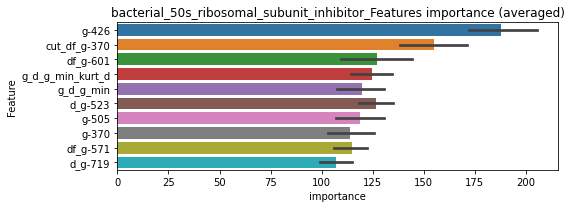

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[960]	training's binary_logloss: 0.00061781	valid_1's binary_logloss: 0.0182896


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000955943	valid_1's binary_logloss: 0.0262192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000695582	valid_1's binary_logloss: 0.0136963


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.021987348527301012
bacterial_50s_ribosomal_subunit_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00150002	valid_1's binary_logloss: 0.0297438


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000438836	valid_1's binary_logloss: 0.00525582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000430252	valid_1's binary_logloss: 0.009092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000439064	valid_1's binary_logloss: 0.00331118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000427781	valid_1's binary_logloss: 0.00447511


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029435, Threshold: 0.0174206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0174206, conf_0:0.01219, conf_1:0.02265
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0474206
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_2: 0.0774206
threshold: 0.0774206, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.0774206, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0115520 Vs.target_rate: 0.00151
Num_p_label: 46.0, Expected: 6.0, Threshold: 0.0774206, conf_0:0.06194, conf_1:0.09290
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.1074206
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_2: 0.1374206
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_3: 0.1674206
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_4: 0.1974206
Num_p_label: 25.0, Expected: 6.0, Adj_threshold_5: 0.2274206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_6: 0.2574206
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_7: 0.2874206
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_8: 0.3174206
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_9: 0.3474206
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_10: 0.3774206
threshold: 0.3774206, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000422651	valid_1's binary_logloss: 0.00479431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00041947	valid_1's binary_logloss: 0.00976591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000437364	valid_1's binary_logloss: 0.00349774
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0449207, Threshold: 0.3774206, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00043043	valid_1's binary_logloss: 0.0039809


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.3774206, conf_0:0.33968, conf_1:0.41516
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.4074206
threshold: 0.4074206, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


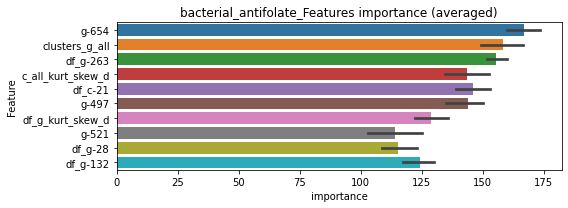

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000426956	valid_1's binary_logloss: 0.00369414


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000409614	valid_1's binary_logloss: 0.00774034
Early stopping, best iteration is:
[980]	training's binary_logloss: 0.000410216	valid_1's binary_logloss: 0.00773832


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000444319	valid_1's binary_logloss: 0.00287601


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[865]	training's binary_logloss: 0.000432676	valid_1's binary_logloss: 0.00349782


bacterial_antifolate logloss: 0.004455827387015866


mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0155655	valid_1's binary_logloss: 0.100441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0143771	valid_1's binary_logloss: 0.110923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00979837	valid_1's binary_logloss: 0.0939151
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.984, PR-AUC:0.967
y_Threshold: 0.0261515, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 368 → Positive_corect_labels: 1130/6799
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02596, conf_1:0.04821


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0131529	valid_1's binary_logloss: 0.0914167


threshold: 0.0370879, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1130.0/6799, y_label_rate: 0.1662009
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00662887	valid_1's binary_logloss: 0.0664299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604102	valid_1's binary_logloss: 0.0706719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604699	valid_1's binary_logloss: 0.0598683
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0266211, Threshold: 0.0370879, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00356111	valid_1's binary_logloss: 0.067892


Remove_noisy_data: 102 → Positive_corect_labels: 1079.0/6697
p_label_rate: 0.0097941 Vs.target_rate: 0.00806
Num_p_label: 39.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02967, conf_1:0.04451
threshold: 0.0370879, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1079.0/6697, y_label_rate: 0.1611169
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00127391	valid_1's binary_logloss: 0.0257204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00278654	valid_1's binary_logloss: 0.0377019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00441882	valid_1's binary_logloss: 0.058055
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0246201, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1051.0/6641
p_label_rate: 0.0090407 Vs.target_rate: 0.00806
Num_p_label: 36.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.03338, conf_1:0.04080


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00503772	valid_1's binary_logloss: 0.0504467


threshold: 0.0370879, positive_p_label: 36.0/3982, p_label_rate: 0.0090407
positive_y_label: 1051.0/6641, y_label_rate: 0.1582593


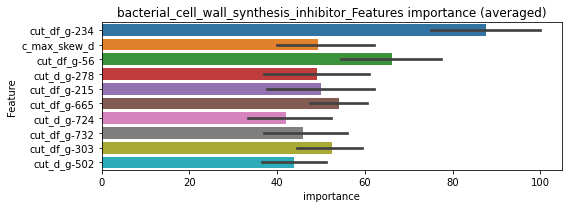

len(train_index) : 4980
len(valid_index) : 1661
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00243901	valid_1's binary_logloss: 0.0307049
Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[142]	training's binary_logloss: 0.00350666	valid_1's binary_logloss: 0.0333883
Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00146288	valid_1's binary_logloss: 0.0248695
Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.027016938097671125
bacterial_cell_wall_synthesis_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00127109	valid_1's binary_logloss: 0.0191028


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00202438	valid_1's binary_logloss: 0.0706839
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00455004	valid_1's binary_logloss: 0.0883453
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00202015	valid_1's binary_logloss: 0.0507951
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0120382, Threshold: 0.0267966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0267966, conf_0:0.01876, conf_1:0.03484
Num_p_label: 6.0, Expected: 14.9, Adj_threshold_1: 0.0567966
threshold: 0.0567966, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00386041	valid_1's binary_logloss: 0.0630963


positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00196205	valid_1's binary_logloss: 0.0628955
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00216017	valid_1's binary_logloss: 0.0711043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00102919	valid_1's binary_logloss: 0.0348253
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.998


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00103609	valid_1's binary_logloss: 0.0482033


y_Threshold: 0.0209087, Threshold: 0.0567966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, Expected: 14.9, Threshold: 0.0567966, conf_0:0.04544, conf_1:0.06816
threshold: 0.0567966, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3751, y_label_rate: 0.1682218
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00295714	valid_1's binary_logloss: 0.0492556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00138882	valid_1's binary_logloss: 0.0535284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000751813	valid_1's binary_logloss: 0.0354364
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0244715, Threshold: 0.0567966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 624.0/3737


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00093481	valid_1's binary_logloss: 0.0382642


p_label_rate: 0.0062783 Vs.target_rate: 0.00374
Num_p_label: 25.0, Expected: 14.9, Threshold: 0.0567966, conf_0:0.05112, conf_1:0.06248
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_1: 0.0867966
threshold: 0.0867966, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 624.0/3737, y_label_rate: 0.1669789


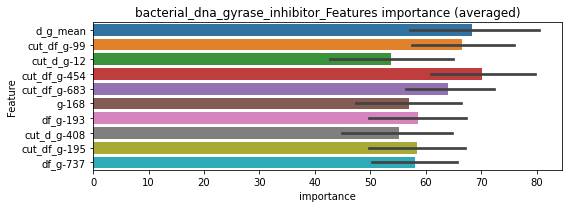

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00368374	valid_1's binary_logloss: 0.0510158
Training until validation scores don't improve for 30 rounds


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00163981	valid_1's binary_logloss: 0.041221
Training until validation scores don't improve for 30 rounds


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00135589	valid_1's binary_logloss: 0.0297581
Training until validation scores don't improve for 30 rounds


bacterial_dna_gyrase_inhibitor logloss: 0.04160915817357075
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00271232	valid_1's binary_logloss: 0.0444317
mutually exclusive columns: bacterial_dna_inhibitor


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 2020


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00403907	valid_1's binary_logloss: 0.157921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.00209535	valid_1's binary_logloss: 0.0806678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00356289	valid_1's binary_logloss: 0.0994864
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.975, PR-AUC:0.957
y_Threshold: 0.0349862, Threshold: 0.0697956, pos_neg_ratio: 0.8000000
Remove_noisy_data: 135 → Positive_corect_labels: 377/2289
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0697956, conf_0:0.04886, conf_1:0.09073
Num_p_label: 20.0, Expected: 19.2, Adj_threshold_1: 0.0997956
threshold: 0.0997956, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00919978	valid_1's binary_logloss: 0.157267


positive_y_label: 377.0/2289, y_label_rate: 0.1647007
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00169695	valid_1's binary_logloss: 0.0958231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00278674	valid_1's binary_logloss: 0.104291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00158631	valid_1's binary_logloss: 0.0705288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0423418, Threshold: 0.0997956, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 361.0/2257
p_label_rate: 0.0052737 Vs.target_rate: 0.00483
Num_p_label: 21.0, Expected: 19.2, Threshold: 0.0997956, conf_0:0.07984, conf_1:0.11975


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00248876	valid_1's binary_logloss: 0.0919585


threshold: 0.0997956, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 361.0/2257, y_label_rate: 0.1599468
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00104484	valid_1's binary_logloss: 0.0592409
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00249989	valid_1's binary_logloss: 0.0819295
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.00122605	valid_1's binary_logloss: 0.0486296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.00103476	valid_1's binary_logloss: 0.052183


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0389792, Threshold: 0.0997956, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 353.0/2241
p_label_rate: 0.0052737 Vs.target_rate: 0.00483
Num_p_label: 21.0, Expected: 19.2, Threshold: 0.0997956, conf_0:0.08982, conf_1:0.10978
threshold: 0.0997956, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 353.0/2241, y_label_rate: 0.1575190


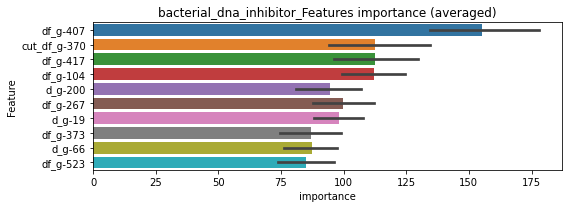

len(train_index) : 1680
len(valid_index) : 561
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1681
len(valid_index) : 560
================================= fold 2/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00395257	valid_1's binary_logloss: 0.0812913
Training until validation scores don't improve for 30 rounds


len(train_index) : 1681
len(valid_index) : 560
================================= fold 3/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00399043	valid_1's binary_logloss: 0.0841764
Training until validation scores don't improve for 30 rounds


len(train_index) : 1681
len(valid_index) : 560
================================= fold 4/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00184157	valid_1's binary_logloss: 0.0512079
Training until validation scores don't improve for 30 rounds


bacterial_dna_inhibitor logloss: 0.06772578337083499
bacterial_dna_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[618]	training's binary_logloss: 0.00147024	valid_1's binary_logloss: 0.0542033


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000289556	valid_1's binary_logloss: 0.00112774
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000284769	valid_1's binary_logloss: 0.00291237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000296577	valid_1's binary_logloss: 0.000529757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014733, Threshold: 0.0037130, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000299556	valid_1's binary_logloss: 0.00234247


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0037130, conf_0:0.00260, conf_1:0.00483
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0337130
threshold: 0.0337130, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.02697, conf_1:0.04046
threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.00027875	valid_1's binary_logloss: 0.000927874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000280927	valid_1's binary_logloss: 0.00325448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000282263	valid_1's binary_logloss: 0.00054641
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0725609, Threshold: 0.0337130, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0337130, conf_0:0.03034, conf_1:0.03708
threshold: 0.0337130, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000284229	valid_1's binary_logloss: 0.00282289


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


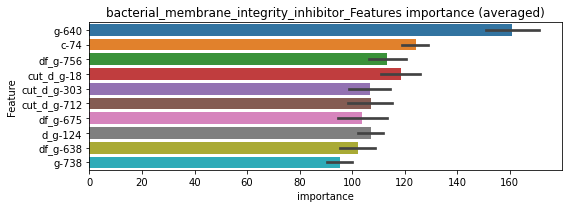

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000284277	valid_1's binary_logloss: 0.000791884


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000293563	valid_1's binary_logloss: 0.00283528


================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.000286032	valid_1's binary_logloss: 0.000558193


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000278579	valid_1's binary_logloss: 0.00227406


bacterial_membrane_integrity_inhibitor logloss: 0.00161494308152057
bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000408752	valid_1's binary_logloss: 0.00683347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000397346	valid_1's binary_logloss: 0.0103882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.00116731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402611	valid_1's binary_logloss: 0.00399045


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0026365, Threshold: 0.0122576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0122576, conf_0:0.00858, conf_1:0.01593
Num_p_label: 8.0, Expected: 5.2, Adj_threshold_1: 0.0422576
threshold: 0.0422576, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000385978	valid_1's binary_logloss: 0.00679559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000422315	valid_1's binary_logloss: 0.00956877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000386704	valid_1's binary_logloss: 0.000901964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199874, Threshold: 0.0422576, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000374152	valid_1's binary_logloss: 0.00509628


Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00130
Num_p_label: 32.0, Expected: 5.2, Threshold: 0.0422576, conf_0:0.03381, conf_1:0.05071
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0722576
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_2: 0.1022576
threshold: 0.1022576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000389009	valid_1's binary_logloss: 0.0077523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000383834	valid_1's binary_logloss: 0.00234204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384846	valid_1's binary_logloss: 0.00187084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000375328	valid_1's binary_logloss: 0.00146123


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0371260, Threshold: 0.1022576, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.1022576, conf_0:0.09203, conf_1:0.11248
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.1322576
threshold: 0.1322576, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


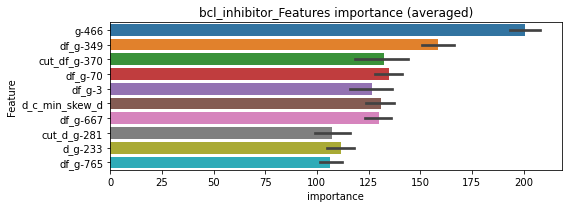

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000374556	valid_1's binary_logloss: 0.00468929


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[873]	training's binary_logloss: 0.000386648	valid_1's binary_logloss: 0.00307346


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000379521	valid_1's binary_logloss: 0.00244199


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.000387431	valid_1's binary_logloss: 0.00159192


bcl_inhibitor logloss: 0.002949521838362011
bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000443812	valid_1's binary_logloss: 0.010414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000444016	valid_1's binary_logloss: 0.00490266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000452303	valid_1's binary_logloss: 0.00119795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029941, Threshold: 0.0555999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000461322	valid_1's binary_logloss: 0.00714455


Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0555999, conf_0:0.03892, conf_1:0.07228
Num_p_label: 33.0, Expected: 6.4, Adj_threshold_1: 0.0855999
Num_p_label: 23.0, Expected: 6.4, Adj_threshold_2: 0.1155999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_3: 0.1455999
Num_p_label: 14.0, Expected: 6.4, Adj_threshold_4: 0.1755999
threshold: 0.1755999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000427973	valid_1's binary_logloss: 0.0105043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000436183	valid_1's binary_logloss: 0.00448414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000438151	valid_1's binary_logloss: 0.00113687
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291257, Threshold: 0.1755999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000427603	valid_1's binary_logloss: 0.00742258


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0140633 Vs.target_rate: 0.00160
Num_p_label: 56.0, Expected: 6.4, Threshold: 0.1755999, conf_0:0.14048, conf_1:0.21072
Num_p_label: 52.0, Expected: 6.4, Adj_threshold_1: 0.2055999
Num_p_label: 51.0, Expected: 6.4, Adj_threshold_2: 0.2355999
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_3: 0.2655999
Num_p_label: 44.0, Expected: 6.4, Adj_threshold_4: 0.2955999
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_5: 0.3255999
Num_p_label: 39.0, Expected: 6.4, Adj_threshold_6: 0.3555999
Num_p_label: 36.0, Expected: 6.4, Adj_threshold_7: 0.3855999
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.4155999
Num_p_label: 30.0, Expected: 6.4, Adj_threshold_9: 0.4455999
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_10: 0.4755999
threshold: 0.4755999, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000424348	valid_1's binary_logloss: 0.00365446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000575075	valid_1's binary_logloss: 0.00919752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430526	valid_1's binary_logloss: 0.008626
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0583727, Threshold: 0.4755999, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000445661	valid_1's binary_logloss: 0.00336214


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0065294 Vs.target_rate: 0.00160
Num_p_label: 26.0, Expected: 6.4, Threshold: 0.4755999, conf_0:0.42804, conf_1:0.52316
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_1: 0.5055999
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_2: 0.5355999
Num_p_label: 21.0, Expected: 6.4, Adj_threshold_3: 0.5655999
Num_p_label: 16.0, Expected: 6.4, Adj_threshold_4: 0.5955999
Num_p_label: 13.0, Expected: 6.4, Adj_threshold_5: 0.6255999
threshold: 0.6255999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


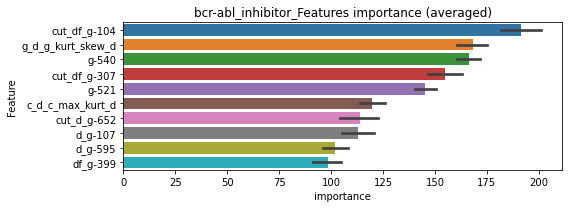

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000429162	valid_1's binary_logloss: 0.00383215


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000423943	valid_1's binary_logloss: 0.00288738


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000434974	valid_1's binary_logloss: 0.00554471


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.00043083	valid_1's binary_logloss: 0.00175324


bcr-abl_inhibitor logloss: 0.003506193971089375
benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00115052	valid_1's binary_logloss: 0.0293143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00079441	valid_1's binary_logloss: 0.0323256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000570989	valid_1's binary_logloss: 0.010798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.00063498	valid_1's binary_logloss: 0.0244338


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072282, Threshold: 0.0170890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0170890, conf_0:0.01196, conf_1:0.02222
Num_p_label: 10.0, Expected: 11.2, Adj_threshold_1: 0.0470890
threshold: 0.0470890, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 654.0/3799, y_label_rate: 0.1721506
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000553914	valid_1's binary_logloss: 0.0275817
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000548845	valid_1's binary_logloss: 0.024284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000562238	valid_1's binary_logloss: 0.00865633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[791]	training's binary_logloss: 0.00054903	valid_1's binary_logloss: 0.0121587


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303102, Threshold: 0.0470890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3797
p_label_rate: 0.0045203 Vs.target_rate: 0.00281
Num_p_label: 18.0, Expected: 11.2, Threshold: 0.0470890, conf_0:0.03767, conf_1:0.05651
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_1: 0.0770890
threshold: 0.0770890, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 653.0/3797, y_label_rate: 0.1719779
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000720332	valid_1's binary_logloss: 0.0244905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000573312	valid_1's binary_logloss: 0.0193041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.0006189	valid_1's binary_logloss: 0.023512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.00058112	valid_1's binary_logloss: 0.0101057


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238261, Threshold: 0.0770890, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3793
p_label_rate: 0.0027624 Vs.target_rate: 0.00281
Num_p_label: 11.0, Expected: 11.2, Threshold: 0.0770890, conf_0:0.06938, conf_1:0.08480
threshold: 0.0770890, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 651.0/3793, y_label_rate: 0.1716320


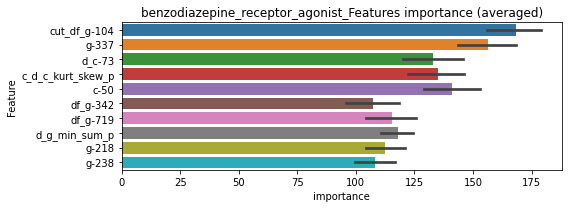

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000585705	valid_1's binary_logloss: 0.023626


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000858072	valid_1's binary_logloss: 0.0173899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.00062456	valid_1's binary_logloss: 0.0135065


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000630817	valid_1's binary_logloss: 0.0140841


benzodiazepine_receptor_agonist logloss: 0.017153323198337934
beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000356796	valid_1's binary_logloss: 0.00141694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000357528	valid_1's binary_logloss: 0.00417412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000360692	valid_1's binary_logloss: 0.0010827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017754, Threshold: 0.0087557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0087557, conf_0:0.00613, conf_1:0.01138


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000357027	valid_1's binary_logloss: 0.00524421


Num_p_label: 10.0, Expected: 4.0, Adj_threshold_1: 0.0387557
threshold: 0.0387557, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158098, Threshold: 0.0387557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00101
Num_p_label: 20.0, Expected: 4.0, Threshold: 0.0387557, conf_0:0.03100, conf_1:0.04651
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0687557
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_2: 0.0987557


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000357438	valid_1's binary_logloss: 0.00165074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000349582	valid_1's binary_logloss: 0.00444065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000362398	valid_1's binary_logloss: 0.000979664
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157944, Threshold: 0.0987557, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00101
Num_p_label: 9.0, Expected: 4.0, Threshold: 0.0987557, conf_0:0.08888, conf_1:0.10863


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00036312	valid_1's binary_logloss: 0.00621808


threshold: 0.0987557, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


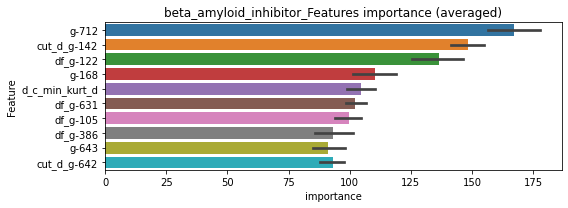

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000366461	valid_1's binary_logloss: 0.00153428


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000366449	valid_1's binary_logloss: 0.00383463


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000368453	valid_1's binary_logloss: 0.00120497


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.002885302555081801


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000397391	valid_1's binary_logloss: 0.00496733


bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000749385	valid_1's binary_logloss: 0.0340935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000642748	valid_1's binary_logloss: 0.0299681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.00060665	valid_1's binary_logloss: 0.00723085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000640489	valid_1's binary_logloss: 0.017084


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057754, Threshold: 0.0152204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0152204, conf_0:0.01065, conf_1:0.01979
Num_p_label: 6.0, Expected: 11.4, Adj_threshold_1: 0.0452204
threshold: 0.0452204, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00072303	valid_1's binary_logloss: 0.027782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00131079	valid_1's binary_logloss: 0.0273219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[775]	training's binary_logloss: 0.000610584	valid_1's binary_logloss: 0.00544609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000605814	valid_1's binary_logloss: 0.0157661


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0318074, Threshold: 0.0452204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00286
Num_p_label: 27.0, Expected: 11.4, Threshold: 0.0452204, conf_0:0.03618, conf_1:0.05426
Num_p_label: 10.0, Expected: 11.4, Adj_threshold_1: 0.0752204
threshold: 0.0752204, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.00085341	valid_1's binary_logloss: 0.0283523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000732182	valid_1's binary_logloss: 0.0274384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000599869	valid_1's binary_logloss: 0.0127021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000614981	valid_1's binary_logloss: 0.0210838


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211866, Threshold: 0.0752204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0030136 Vs.target_rate: 0.00286
Num_p_label: 12.0, Expected: 11.4, Threshold: 0.0752204, conf_0:0.06770, conf_1:0.08274
threshold: 0.0752204, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


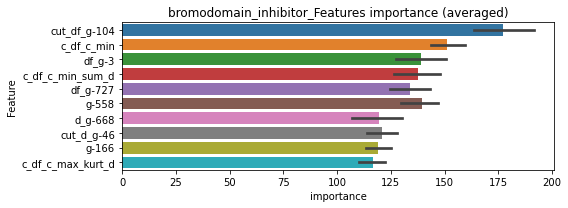

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000787303	valid_1's binary_logloss: 0.0202334


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00145147	valid_1's binary_logloss: 0.026782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000633341	valid_1's binary_logloss: 0.0161413


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000727832	valid_1's binary_logloss: 0.0168848


bromodomain_inhibitor logloss: 0.02001222953492085
bromodomain_inhibitor is unpredictable(><)!
btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:308
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000399742	valid_1's binary_logloss: 0.00770931
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000399078	valid_1's binary_logloss: 0.00376342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000392236	valid_1's binary_logloss: 0.00190306
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000383595	valid_1's binary_logloss: 0.0019679


y_Threshold: 0.0029157, Threshold: 0.0223795, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0223795, conf_0:0.01567, conf_1:0.02909
Num_p_label: 14.0, Expected: 4.8, Adj_threshold_1: 0.0523795
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_2: 0.0823795
threshold: 0.0823795, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.0823795, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00122
Num_p_label: 20.0, Expected: 4.8, Threshold: 0.0823795, conf_0:0.06590, conf_1:0.09886
Num_p_label: 15.0, Expected: 4.8, Adj_threshold_1: 0.1123795
Num_p_label: 11.0, Expected: 4.8, Adj_threshold_2: 0.1423795
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000391009	valid_1's binary_logloss: 0.00742085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000399998	valid_1's binary_logloss: 0.00320929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000374739	valid_1's binary_logloss: 0.001154
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0178647, Threshold: 0.1423795, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000382639	valid_1's binary_logloss: 0.00242642


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00122
Num_p_label: 11.0, Expected: 4.8, Threshold: 0.1423795, conf_0:0.12814, conf_1:0.15662
threshold: 0.1423795, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


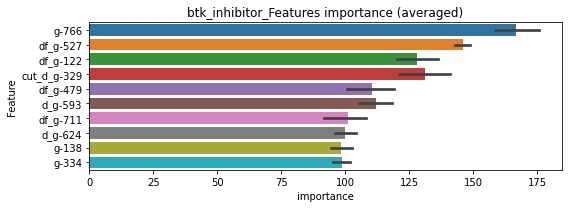

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000402805	valid_1's binary_logloss: 0.00624488


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000405982	valid_1's binary_logloss: 0.00323057


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00038112	valid_1's binary_logloss: 0.00122481
Early stopping, best iteration is:
[989]	training's binary_logloss: 0.000381153	valid_1's binary_logloss: 0.00122473


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000376638	valid_1's binary_logloss: 0.00189733
Early stopping, best iteration is:
[1092]	training's binary_logloss: 0.000371568	valid_1's binary_logloss: 0.0018825


btk_inhibitor logloss: 0.0031457551216858655
calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000247461	valid_1's binary_logloss: 0.000948648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000253546	valid_1's binary_logloss: 0.00125534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000252139	valid_1's binary_logloss: 0.000373391
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011931, Threshold: 0.0145597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0145597, conf_0:0.01019, conf_1:0.01893
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0445597
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0745597
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_3: 0.1045597


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000247754	valid_1's binary_logloss: 0.000913194


threshold: 0.1045597, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.1045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00050
Num_p_label: 45.0, Expected: 2.0, Threshold: 0.1045597, conf_0:0.08365, conf_1:0.12547
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.1345597
Num_p_label: 40.0, Expected: 2.0, Adj_threshold_2: 0.1645597
Num_p_label: 39.0, Expected: 2.0, Adj_threshold_3: 0.1945597
Num_p_label: 35.0, Expected: 2.0, Adj_threshold_4: 0.2245597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 33.0, Expected: 2.0, Adj_threshold_5: 0.2545597
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_6: 0.2845597
Num_p_label: 29.0, Expected: 2.0, Adj_threshold_7: 0.3145597
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_8: 0.3445597
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_9: 0.3745597
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_10: 0.4045597
threshold: 0.4045597, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000233125	valid_1's binary_logloss: 0.00051305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000232705	valid_1's binary_logloss: 0.00118522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.00023197	valid_1's binary_logloss: 0.000317755
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1172744, Threshold: 0.4045597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.4045597, conf_0:0.36410, conf_1:0.44502
Num_p_label: 25.0, Expected: 2.0, Adj_threshold_1: 0.4345597
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.4645597
Num_p_label: 20.0, Expected: 2.0, Adj_threshold_3: 0.4945597
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_4: 0.5245597
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.5545597
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.5845597
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_7: 0.6145597
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_8: 0.6445597
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_9: 0.6745597


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000232411	valid_1's binary_logloss: 0.000707291


Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.7045597
threshold: 0.7045597, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


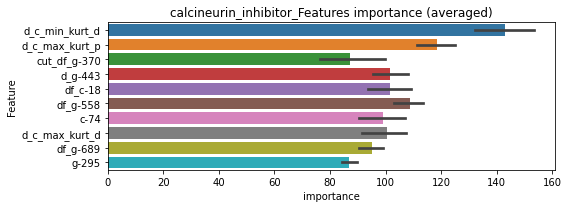

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000234553	valid_1's binary_logloss: 0.000427552
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[845]	training's binary_logloss: 0.000235955	valid_1's binary_logloss: 0.000970477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000239188	valid_1's binary_logloss: 0.000367106


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0005818330846156365


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000238854	valid_1's binary_logloss: 0.000562197
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0219421	valid_1's binary_logloss: 0.141452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0250436	valid_1's binary_logloss: 0.143937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0222688	valid_1's binary_logloss: 0.124924
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.959, PR-AUC:0.928


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.0294947	valid_1's binary_logloss: 0.145054


y_Threshold: 0.0423705, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 542 → Positive_corect_labels: 1136/7132
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.04037, conf_1:0.07497
threshold: 0.0576669, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1136.0/7132, y_label_rate: 0.1592821
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00517687	valid_1's binary_logloss: 0.0618671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0173162	valid_1's binary_logloss: 0.103102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00290599	valid_1's binary_logloss: 0.05145
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0414322, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1077.0/7014
p_label_rate: 0.0037670 Vs.target_rate: 0.01180
Num_p_label: 15.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.04613, conf_1:0.06920


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0101901	valid_1's binary_logloss: 0.0672938


threshold: 0.0576669, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 1077.0/7014, y_label_rate: 0.1535500
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00314683	valid_1's binary_logloss: 0.0324405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00394661	valid_1's binary_logloss: 0.0386763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0043285	valid_1's binary_logloss: 0.0476016
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0268904, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1048.0/6956
p_label_rate: 0.0012557 Vs.target_rate: 0.01180
Num_p_label: 5.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.05190, conf_1:0.06343


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00390827	valid_1's binary_logloss: 0.0529453


threshold: 0.0576669, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1048.0/6956, y_label_rate: 0.1506613


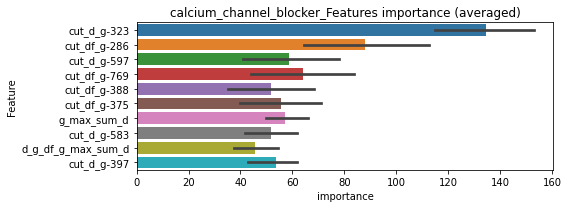

len(train_index) : 5217
len(valid_index) : 1739
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 2/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00282509	valid_1's binary_logloss: 0.0291224
Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00385301	valid_1's binary_logloss: 0.0333532
Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 4/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00286824	valid_1's binary_logloss: 0.0292839
Training until validation scores don't improve for 30 rounds


calcium_channel_blocker logloss: 0.030136494868806485
calcium_channel_blocker is unpredictable(><)!


Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00230026	valid_1's binary_logloss: 0.0287866


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00048955	valid_1's binary_logloss: 0.0146271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000481406	valid_1's binary_logloss: 0.00577685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000481259	valid_1's binary_logloss: 0.00243359
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000506884	valid_1's binary_logloss: 0.00998499


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037238, Threshold: 0.0145616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0145616, conf_0:0.01019, conf_1:0.01893
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_1: 0.0445616
threshold: 0.0445616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.0445616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00176
Num_p_label: 29.0, Expected: 7.0, Threshold: 0.0445616, conf_0:0.03565, conf_1:0.05347
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.0745616
Num_p_label: 11.0, Expected: 7.0, Adj_threshold_2: 0.1045616
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000486918	valid_1's binary_logloss: 0.0153922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.00049045	valid_1's binary_logloss: 0.00566459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000486123	valid_1's binary_logloss: 0.0018991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000468305	valid_1's binary_logloss: 0.00990076


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0329614, Threshold: 0.1045616, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00176
Num_p_label: 11.0, Expected: 7.0, Threshold: 0.1045616, conf_0:0.09411, conf_1:0.11502
threshold: 0.1045616, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


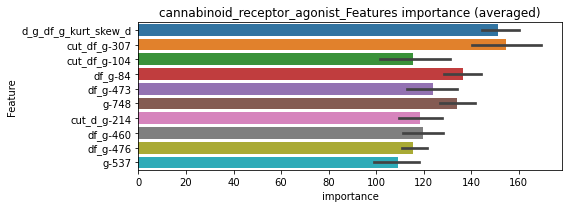

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[738]	training's binary_logloss: 0.0005181	valid_1's binary_logloss: 0.013246


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000500904	valid_1's binary_logloss: 0.0061164


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.00049152	valid_1's binary_logloss: 0.00228775


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000500946	valid_1's binary_logloss: 0.0092212


cannabinoid_receptor_agonist logloss: 0.0077181344495816295
cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00162379	valid_1's binary_logloss: 0.0285605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000549732	valid_1's binary_logloss: 0.0192662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000541675	valid_1's binary_logloss: 0.00961959
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000612026	valid_1's binary_logloss: 0.0255456


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0057189, Threshold: 0.0206289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0206289, conf_0:0.01444, conf_1:0.02682
Num_p_label: 15.0, Expected: 9.2, Adj_threshold_1: 0.0506289
threshold: 0.0506289, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00101858	valid_1's binary_logloss: 0.0271532
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000576581	valid_1's binary_logloss: 0.0109615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[708]	training's binary_logloss: 0.000522432	valid_1's binary_logloss: 0.00927225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000528634	valid_1's binary_logloss: 0.0162774


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0188368, Threshold: 0.0506289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0060271 Vs.target_rate: 0.00231
Num_p_label: 24.0, Expected: 9.2, Threshold: 0.0506289, conf_0:0.04050, conf_1:0.06075
Num_p_label: 14.0, Expected: 9.2, Adj_threshold_1: 0.0806289
threshold: 0.0806289, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000567135	valid_1's binary_logloss: 0.0160821
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000646142	valid_1's binary_logloss: 0.0109647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000526838	valid_1's binary_logloss: 0.00679273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00056509	valid_1's binary_logloss: 0.0160983


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0130921, Threshold: 0.0806289, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0042692 Vs.target_rate: 0.00231
Num_p_label: 17.0, Expected: 9.2, Threshold: 0.0806289, conf_0:0.07257, conf_1:0.08869
threshold: 0.0806289, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


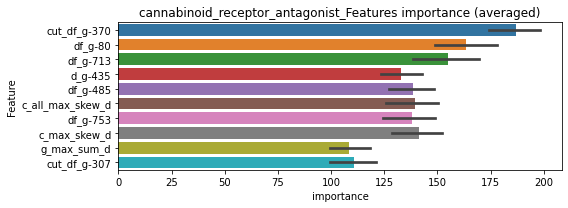

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00100097	valid_1's binary_logloss: 0.0155674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000995757	valid_1's binary_logloss: 0.0237939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000536672	valid_1's binary_logloss: 0.00387358


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000526031	valid_1's binary_logloss: 0.0107842


cannabinoid_receptor_antagonist logloss: 0.013505008165384495
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467783	valid_1's binary_logloss: 0.00697155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000485256	valid_1's binary_logloss: 0.00394066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000457815	valid_1's binary_logloss: 0.00172856
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0032689, Threshold: 0.0261061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000488864	valid_1's binary_logloss: 0.0133226


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0261061, conf_0:0.01827, conf_1:0.03394
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0561061
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0861061
threshold: 0.0861061, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.0861061, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.0861061, conf_0:0.06888, conf_1:0.10333
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_1: 0.1161061
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_2: 0.1461061
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_3: 0.1761061
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.2061061
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00045589	valid_1's binary_logloss: 0.00714578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000453843	valid_1's binary_logloss: 0.00340357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000467754	valid_1's binary_logloss: 0.00136645
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0388622, Threshold: 0.2061061, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000474151	valid_1's binary_logloss: 0.0142334


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.2061061, conf_0:0.18550, conf_1:0.22672
threshold: 0.2061061, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


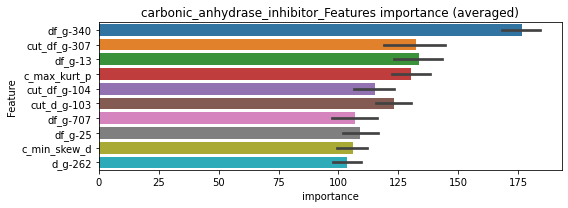

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000472391	valid_1's binary_logloss: 0.00548239


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000473958	valid_1's binary_logloss: 0.00313895


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000468807	valid_1's binary_logloss: 0.00143556


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000535124	valid_1's binary_logloss: 0.0123923


carbonic_anhydrase_inhibitor logloss: 0.005612293026683688
casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039819	valid_1's binary_logloss: 0.00840014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000390586	valid_1's binary_logloss: 0.00311233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000409055	valid_1's binary_logloss: 0.00124985
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022210, Threshold: 0.0057150, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000398678	valid_1's binary_logloss: 0.0124354


Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0057150, conf_0:0.00400, conf_1:0.00743
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0357150
threshold: 0.0357150, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.02857, conf_1:0.04286
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000386282	valid_1's binary_logloss: 0.00666229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000388311	valid_1's binary_logloss: 0.00253676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000399339	valid_1's binary_logloss: 0.00138528
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0152855, Threshold: 0.0357150, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000426721	valid_1's binary_logloss: 0.012255


p_label_rate: 0.0007534 Vs.target_rate: 0.00151
Num_p_label: 3.0, Expected: 6.0, Threshold: 0.0357150, conf_0:0.03214, conf_1:0.03929
threshold: 0.0357150, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


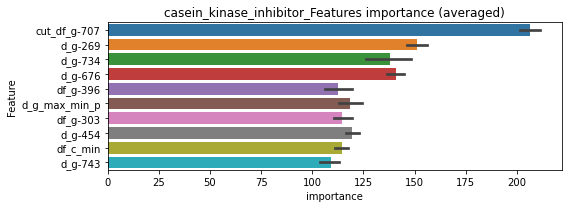

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000394669	valid_1's binary_logloss: 0.00751247


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203
Early stopping, best iteration is:
[998]	training's binary_logloss: 0.000389845	valid_1's binary_logloss: 0.00259203


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000396704	valid_1's binary_logloss: 0.00112877


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00941339


casein_kinase_inhibitor logloss: 0.005161607291896477
caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000291714	valid_1's binary_logloss: 0.001666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000293028	valid_1's binary_logloss: 0.00124441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0002972	valid_1's binary_logloss: 0.00183409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013201, Threshold: 0.0154419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0154419, conf_0:0.01081, conf_1:0.02007
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0454419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0754419
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.1054419
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_4: 0.1354419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.1654419


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.000711778


threshold: 0.1654419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.1654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00076
Num_p_label: 19.0, Expected: 3.0, Threshold: 0.1654419, conf_0:0.13235, conf_1:0.19853
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.1954419
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.2254419
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.2554419
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_4: 0.2854419
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.3154419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.3454419
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3754419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.4054419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4354419
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_10: 0.4654419
threshold: 0.4654419, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000283673	valid_1's binary_logloss: 0.000702891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000277548	valid_1's binary_logloss: 0.000860264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000285226	valid_1's binary_logloss: 0.00256863
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0477184, Threshold: 0.4654419, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00076
Num_p_label: 10.0, Expected: 3.0, Threshold: 0.4654419, conf_0:0.41890, conf_1:0.51199
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_1: 0.4954419
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_2: 0.5254419


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000283609	valid_1's binary_logloss: 0.000561023


threshold: 0.5254419, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


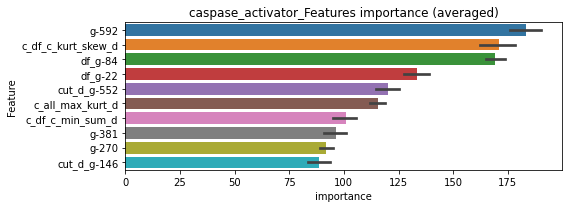

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[857]	training's binary_logloss: 0.000283102	valid_1's binary_logloss: 0.000680909


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[902]	training's binary_logloss: 0.000281167	valid_1's binary_logloss: 0.000765126


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000289934	valid_1's binary_logloss: 0.00220307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000287112	valid_1's binary_logloss: 0.000648465


caspase_activator logloss: 0.0010742087221100325
catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000300892	valid_1's binary_logloss: 0.00235806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00030148	valid_1's binary_logloss: 0.00129317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000301082	valid_1's binary_logloss: 0.000533716
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016696, Threshold: 0.0090984, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00030142	valid_1's binary_logloss: 0.00746218


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0090984, conf_0:0.00637, conf_1:0.01183
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0390984
threshold: 0.0390984, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.0390984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.0390984, conf_0:0.03128, conf_1:0.04692
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_1: 0.0690984
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0990984
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_3: 0.1290984


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000287721	valid_1's binary_logloss: 0.00157306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000293634	valid_1's binary_logloss: 0.00137633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000296568	valid_1's binary_logloss: 0.00043101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0420298, Threshold: 0.1290984, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.1290984, conf_0:0.11619, conf_1:0.14201


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000292695	valid_1's binary_logloss: 0.0081306


threshold: 0.1290984, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


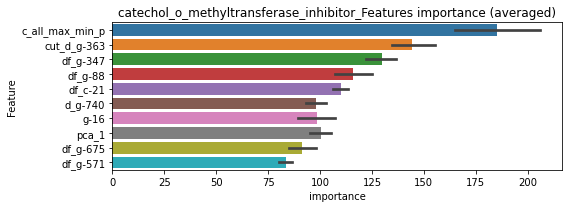

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[868]	training's binary_logloss: 0.00029354	valid_1's binary_logloss: 0.00112373


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000294396	valid_1's binary_logloss: 0.00100272


len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000296076	valid_1's binary_logloss: 0.000434837


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000294353	valid_1's binary_logloss: 0.00486197


catechol_o_methyltransferase_inhibitor logloss: 0.0018559392774225385
cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.011836	valid_1's binary_logloss: 0.113229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00344943	valid_1's binary_logloss: 0.0801306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00309802	valid_1's binary_logloss: 0.0595984
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0176489, Threshold: 0.0420440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 635/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.0420440, conf_0:0.02943, conf_1:0.05466
Num_p_label: 7.0, Expected: 17.1, Adj_threshold_1: 0.0720440
threshold: 0.0720440, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00353236	valid_1's binary_logloss: 0.0728131


positive_y_label: 635.0/3760, y_label_rate: 0.1688830
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00284958	valid_1's binary_logloss: 0.0782984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00288821	valid_1's binary_logloss: 0.0546704
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00312426	valid_1's binary_logloss: 0.0587587
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0267757, Threshold: 0.0720440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 617.0/3724
p_label_rate: 0.0102963 Vs.target_rate: 0.00428
Num_p_label: 41.0, Expected: 17.1, Threshold: 0.0720440, conf_0:0.05764, conf_1:0.08645
Num_p_label: 21.0, Expected: 17.1, Adj_threshold_1: 0.1020440
threshold: 0.1020440, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00400218	valid_1's binary_logloss: 0.0691501


positive_y_label: 617.0/3724, y_label_rate: 0.1656821
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00271286	valid_1's binary_logloss: 0.0584369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00239686	valid_1's binary_logloss: 0.0407332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000962328	valid_1's binary_logloss: 0.0286687
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0286520, Threshold: 0.1020440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 609.0/3708
p_label_rate: 0.0072828 Vs.target_rate: 0.00428
Num_p_label: 29.0, Expected: 17.1, Threshold: 0.1020440, conf_0:0.09184, conf_1:0.11225


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00135815	valid_1's binary_logloss: 0.0545106


Num_p_label: 15.0, Expected: 17.1, Adj_threshold_1: 0.1320440
threshold: 0.1320440, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 609.0/3708, y_label_rate: 0.1642395


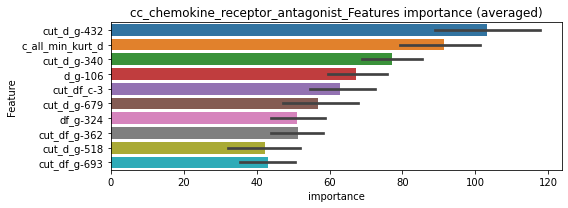

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[146]	training's binary_logloss: 0.00409483	valid_1's binary_logloss: 0.0639103
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00200928	valid_1's binary_logloss: 0.0417087
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[214]	training's binary_logloss: 0.00244576	valid_1's binary_logloss: 0.0276498
Training until validation scores don't improve for 30 rounds


cc_chemokine_receptor_antagonist logloss: 0.04166233639292115
cc_chemokine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00175371	valid_1's binary_logloss: 0.0333804


cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000309292	valid_1's binary_logloss: 0.00163279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000312886	valid_1's binary_logloss: 0.00216559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000306231	valid_1's binary_logloss: 0.000886177
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013995, Threshold: 0.0032761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0032761, conf_0:0.00229, conf_1:0.00426
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0332761


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000311249	valid_1's binary_logloss: 0.000914939


threshold: 0.0332761, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02662, conf_1:0.03993


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000300678	valid_1's binary_logloss: 0.00130626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000295506	valid_1's binary_logloss: 0.00235857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000297752	valid_1's binary_logloss: 0.000803491
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0898817, Threshold: 0.0332761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00076
Num_p_label: 1.0, Expected: 3.0, Threshold: 0.0332761, conf_0:0.02995, conf_1:0.03660


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000296934	valid_1's binary_logloss: 0.000653008


threshold: 0.0332761, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


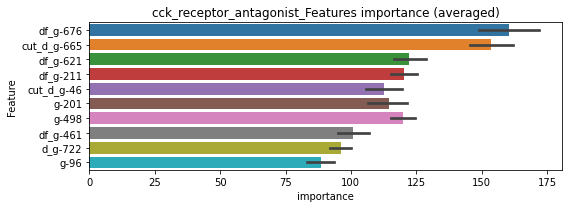

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000310132	valid_1's binary_logloss: 0.00137618


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000299431	valid_1's binary_logloss: 0.00125679


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000304456	valid_1's binary_logloss: 0.000689321


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000302092	valid_1's binary_logloss: 0.000810496


cck_receptor_antagonist logloss: 0.001033347047277023


mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0224934	valid_1's binary_logloss: 0.138341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.0158639	valid_1's binary_logloss: 0.13248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.0173987	valid_1's binary_logloss: 0.141291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0245295	valid_1's binary_logloss: 0.146884


1 / 3, AUC score:0.964, PR-AUC:0.934
y_Threshold: 0.0414128, Threshold: 0.0588798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 620 → Positive_corect_labels: 1358/8479
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04122, conf_1:0.07654
threshold: 0.0588798, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1358.0/8479, y_label_rate: 0.1601604
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00698076	valid_1's binary_logloss: 0.0782604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00713723	valid_1's binary_logloss: 0.081442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00619199	valid_1's binary_logloss: 0.0742652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00623151	valid_1's binary_logloss: 0.0808613


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0361790, Threshold: 0.0588798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 1282.0/8327
p_label_rate: 0.0055249 Vs.target_rate: 0.01478
Num_p_label: 22.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04710, conf_1:0.07066
threshold: 0.0588798, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1282.0/8327, y_label_rate: 0.1539570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00453085	valid_1's binary_logloss: 0.0611776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00532288	valid_1's binary_logloss: 0.0497872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00163855	valid_1's binary_logloss: 0.0363986
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0310620, Threshold: 0.0588798, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00474696	valid_1's binary_logloss: 0.0523011


Remove_noisy_data: 72 → Positive_corect_labels: 1246.0/8255
p_label_rate: 0.0042692 Vs.target_rate: 0.01478
Num_p_label: 17.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.05299, conf_1:0.06477
threshold: 0.0588798, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1246.0/8255, y_label_rate: 0.1509388


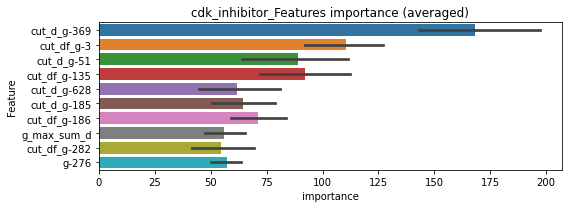

len(train_index) : 6191
len(valid_index) : 2064
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2064
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00509681	valid_1's binary_logloss: 0.0383073
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2064
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00228478	valid_1's binary_logloss: 0.0394726
Training until validation scores don't improve for 30 rounds


len(train_index) : 6192
len(valid_index) : 2063
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0235482
Training until validation scores don't improve for 30 rounds


cdk_inhibitor logloss: 0.03829556047108469
cdk_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00281254	valid_1's binary_logloss: 0.0518607


chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000634091	valid_1's binary_logloss: 0.0241802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000551893	valid_1's binary_logloss: 0.0164156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000527497	valid_1's binary_logloss: 0.00492219
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000660421	valid_1's binary_logloss: 0.0241797


y_Threshold: 0.0048108, Threshold: 0.0163525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0163525, conf_0:0.01145, conf_1:0.02126
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0463525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.0763525
threshold: 0.0763525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000569702	valid_1's binary_logloss: 0.0221034
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000531259	valid_1's binary_logloss: 0.0135341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00052534	valid_1's binary_logloss: 0.00460284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000520227	valid_1's binary_logloss: 0.023399


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0224471, Threshold: 0.0763525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0065294 Vs.target_rate: 0.00227
Num_p_label: 26.0, Expected: 9.0, Threshold: 0.0763525, conf_0:0.06108, conf_1:0.09162
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.1063525
Num_p_label: 21.0, Expected: 9.0, Adj_threshold_2: 0.1363525
threshold: 0.1363525, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520362	valid_1's binary_logloss: 0.00868488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000520119	valid_1's binary_logloss: 0.0154487
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000522669	valid_1's binary_logloss: 0.0178838
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000730166	valid_1's binary_logloss: 0.0243716


y_Threshold: 0.0230638, Threshold: 0.1363525, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0057760 Vs.target_rate: 0.00227
Num_p_label: 23.0, Expected: 9.0, Threshold: 0.1363525, conf_0:0.12272, conf_1:0.14999
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.1663525
threshold: 0.1663525, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867


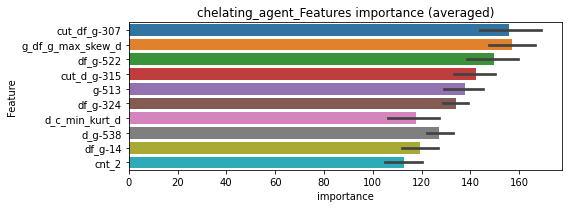

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000498951	valid_1's binary_logloss: 0.0089516
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000497332	valid_1's binary_logloss: 0.0089359


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000662953	valid_1's binary_logloss: 0.0199669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000520252	valid_1's binary_logloss: 0.00742096


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.013099907184820745


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00090725	valid_1's binary_logloss: 0.0160601


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000345422	valid_1's binary_logloss: 0.00113867
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000349739	valid_1's binary_logloss: 0.00191171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000363195	valid_1's binary_logloss: 0.000866409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027590, Threshold: 0.0524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000359771	valid_1's binary_logloss: 0.00107256


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0524497, conf_0:0.03671, conf_1:0.06818
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_1: 0.0824497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_2: 0.1124497
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_3: 0.1424497
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_4: 0.1724497
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_5: 0.2024497
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_6: 0.2324497
Num_p_label: 14.0, Expected: 4.0, Adj_threshold_7: 0.2624497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_8: 0.2924497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.3224497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_10: 0.3524497
threshold: 0.3524497, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.3524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00101
Num_p_label: 36.0, Expected: 4.0, Threshold: 0.3524497, conf_0:0.28196, conf_1:0.42294
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.3824497
Num_p_label: 30.0, Expected: 4.0, Adj_threshold_2: 0.4124497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.4424497
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_4: 0.4724497


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 27.0, Expected: 4.0, Adj_threshold_5: 0.5024497
Num_p_label: 26.0, Expected: 4.0, Adj_threshold_6: 0.5324497
Num_p_label: 25.0, Expected: 4.0, Adj_threshold_7: 0.5624497
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_8: 0.5924497
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_9: 0.6224497
Num_p_label: 19.0, Expected: 4.0, Adj_threshold_10: 0.6524497
threshold: 0.6524497, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335283	valid_1's binary_logloss: 0.000972783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000340312	valid_1's binary_logloss: 0.00143889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000337091	valid_1's binary_logloss: 0.000714623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1611848, Threshold: 0.6524497, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00101
Num_p_label: 19.0, Expected: 4.0, Threshold: 0.6524497, conf_0:0.58720, conf_1:0.71769
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_1: 0.6824497
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_2: 0.7124497


Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000342619	valid_1's binary_logloss: 0.0010953


Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.7424497
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_4: 0.7724497
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_5: 0.8024497
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_6: 0.8324497
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_7: 0.8624497
threshold: 0.8624497, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


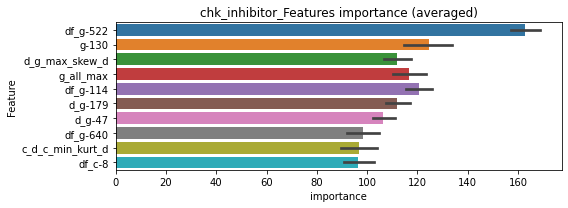

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000349335	valid_1's binary_logloss: 0.000868088


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000340507	valid_1's binary_logloss: 0.001225


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000343309	valid_1's binary_logloss: 0.000803924


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000344501	valid_1's binary_logloss: 0.00106844


chk_inhibitor logloss: 0.0009913453242998485
chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470364	valid_1's binary_logloss: 0.00593944
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000466538	valid_1's binary_logloss: 0.0121803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000472255	valid_1's binary_logloss: 0.00520967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000469761	valid_1's binary_logloss: 0.00879355


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0036083, Threshold: 0.0307272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0307272, conf_0:0.02151, conf_1:0.03995
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_1: 0.0607272
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.0907272
threshold: 0.0907272, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


y_Threshold: 0.0394437, Threshold: 0.0907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0155701 Vs.target_rate: 0.00176
Num_p_label: 62.0, Expected: 7.0, Threshold: 0.0907272, conf_0:0.07258, conf_1:0.10887
Num_p_label: 55.0, Expected: 7.0, Adj_threshold_1: 0.1207272
Num_p_label: 48.0, Expected: 7.0, Adj_threshold_2: 0.1507272
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_3: 0.1807272
Num_p_label: 40.0, Expected: 7.0, Adj_threshold_4: 0.2107272
Num_p_label: 31.0, Expected: 7.0, Adj_threshold_5: 0.2407272
Num_p_label: 26.0, Expected: 7.0, Adj_threshold_6: 0.2707272
Num_p_label: 24.0, Expected: 7.0, Adj_threshold_7: 0.3007272
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_8: 0.3307272
Num_p_label: 19.0, Expected: 7.0, Adj_threshold_9: 0.3607272
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_10: 0.3907272
threshold: 0.3907272, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3802, y_label_rate: 0.1722

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000452107	valid_1's binary_logloss: 0.00551996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000475851	valid_1's binary_logloss: 0.00858911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000506688	valid_1's binary_logloss: 0.00532721
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000472879	valid_1's binary_logloss: 0.0082991


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0394437, Threshold: 0.3907272, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0045203 Vs.target_rate: 0.00176
Num_p_label: 18.0, Expected: 7.0, Threshold: 0.3907272, conf_0:0.35165, conf_1:0.42980
Num_p_label: 17.0, Expected: 7.0, Adj_threshold_1: 0.4207272
threshold: 0.4207272, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


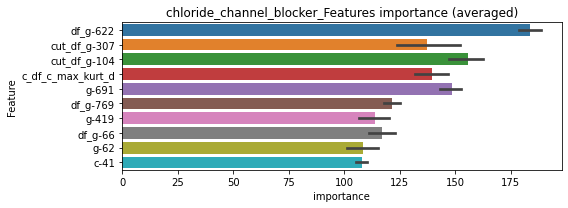

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000462711	valid_1's binary_logloss: 0.00469207


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000474733	valid_1's binary_logloss: 0.0067265


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000462247	valid_1's binary_logloss: 0.00456178


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000485099	valid_1's binary_logloss: 0.00809451


chloride_channel_blocker logloss: 0.0060210218971286315
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000490532	valid_1's binary_logloss: 0.0106264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000510735	valid_1's binary_logloss: 0.0127336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000490598	valid_1's binary_logloss: 0.00252564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000477508	valid_1's binary_logloss: 0.00833974


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041254, Threshold: 0.0132104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0132104, conf_0:0.00925, conf_1:0.01717
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0432104
threshold: 0.0432104, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03457, conf_1:0.05185
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000508617	valid_1's binary_logloss: 0.0092629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000571143	valid_1's binary_logloss: 0.0131223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000477159	valid_1's binary_logloss: 0.00241287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000477098	valid_1's binary_logloss: 0.00770112


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354554, Threshold: 0.0432104, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0042692 Vs.target_rate: 0.00202
Num_p_label: 17.0, Expected: 8.0, Threshold: 0.0432104, conf_0:0.03889, conf_1:0.04753
threshold: 0.0432104, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


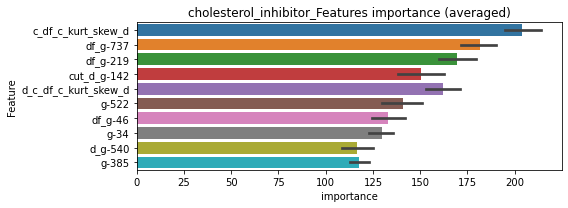

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[934]	training's binary_logloss: 0.000475724	valid_1's binary_logloss: 0.00843338


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.000481094	valid_1's binary_logloss: 0.0115145


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000482923	valid_1's binary_logloss: 0.00264433
Early stopping, best iteration is:
[985]	training's binary_logloss: 0.000483156	valid_1's binary_logloss: 0.00264374


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[889]	training's binary_logloss: 0.000491891	valid_1's binary_logloss: 0.00935063


cholesterol_inhibitor logloss: 0.007991061991790928
cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000523312	valid_1's binary_logloss: 0.0145485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.00055695	valid_1's binary_logloss: 0.0142857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000580293	valid_1's binary_logloss: 0.0101624
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044919, Threshold: 0.0097991, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000758515	valid_1's binary_logloss: 0.0145313


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0097991, conf_0:0.00686, conf_1:0.01274
Num_p_label: 5.0, Expected: 9.0, Adj_threshold_1: 0.0397991
threshold: 0.0397991, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00053355	valid_1's binary_logloss: 0.0146893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000525474	valid_1's binary_logloss: 0.0144009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000509151	valid_1's binary_logloss: 0.00973826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000602406	valid_1's binary_logloss: 0.0138061


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0271513, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0020090 Vs.target_rate: 0.00227
Num_p_label: 8.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03184, conf_1:0.04776
threshold: 0.0397991, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000566546	valid_1's binary_logloss: 0.0208555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000504642	valid_1's binary_logloss: 0.00676098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000568739	valid_1's binary_logloss: 0.0063707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000563409	valid_1's binary_logloss: 0.022914


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0311180, Threshold: 0.0397991, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0027624 Vs.target_rate: 0.00227
Num_p_label: 11.0, Expected: 9.0, Threshold: 0.0397991, conf_0:0.03582, conf_1:0.04378
threshold: 0.0397991, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


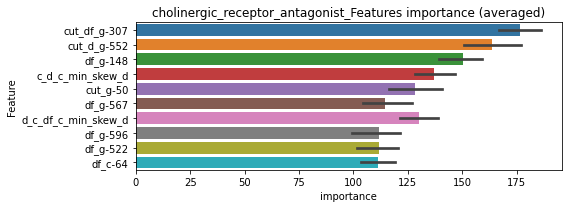

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000631144	valid_1's binary_logloss: 0.00739663


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000680623	valid_1's binary_logloss: 0.0130907


================================= fold 3/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000521743	valid_1's binary_logloss: 0.00945977


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cholinergic_receptor_antagonist logloss: 0.010467240324984263


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000666652	valid_1's binary_logloss: 0.0119205


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000339175	valid_1's binary_logloss: 0.00147322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000331164	valid_1's binary_logloss: 0.00231605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000340977	valid_1's binary_logloss: 0.00175983
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020091, Threshold: 0.0104905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000356108	valid_1's binary_logloss: 0.00653134


p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0104905, conf_0:0.00734, conf_1:0.01364
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_1: 0.0404905
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_2: 0.0704905
threshold: 0.0704905, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.05639, conf_1:0.08459
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000334255	valid_1's binary_logloss: 0.00127968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000323447	valid_1's binary_logloss: 0.00183887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000332912	valid_1's binary_logloss: 0.00164977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276819, Threshold: 0.0704905, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000335519	valid_1's binary_logloss: 0.00518322


p_label_rate: 0.0025113 Vs.target_rate: 0.00101
Num_p_label: 10.0, Expected: 4.0, Threshold: 0.0704905, conf_0:0.06344, conf_1:0.07754
threshold: 0.0704905, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


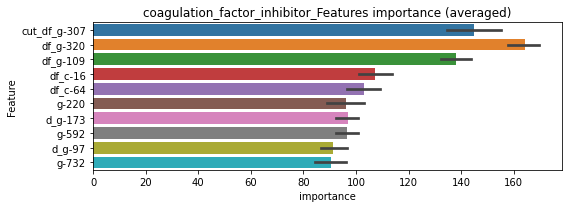

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000336907	valid_1's binary_logloss: 0.00128482
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000333786	valid_1's binary_logloss: 0.00127921


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[967]	training's binary_logloss: 0.000335394	valid_1's binary_logloss: 0.00201584


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000335773	valid_1's binary_logloss: 0.00144264
Early stopping, best iteration is:
[1005]	training's binary_logloss: 0.000335495	valid_1's binary_logloss: 0.00144118


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000343868	valid_1's binary_logloss: 0.00356907


coagulation_factor_inhibitor logloss: 0.002076148221522129
corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000437964	valid_1's binary_logloss: 0.00369693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000417539	valid_1's binary_logloss: 0.00978523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000432317	valid_1's binary_logloss: 0.00349006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000443437	valid_1's binary_logloss: 0.0066927


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039663, Threshold: 0.0112135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112135, conf_0:0.00785, conf_1:0.01458
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0412135
threshold: 0.0412135, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03297, conf_1:0.04946
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00288171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00042539	valid_1's binary_logloss: 0.00864866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000419309	valid_1's binary_logloss: 0.00356476
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000443368	valid_1's binary_logloss: 0.00693857


y_Threshold: 0.0353321, Threshold: 0.0412135, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0412135, conf_0:0.03709, conf_1:0.04533
threshold: 0.0412135, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


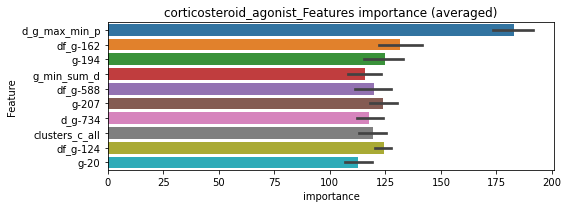

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[958]	training's binary_logloss: 0.000424361	valid_1's binary_logloss: 0.0036221


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000480247	valid_1's binary_logloss: 0.00745574


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000488757	valid_1's binary_logloss: 0.00436461


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000433455	valid_1's binary_logloss: 0.00479776


corticosteroid_agonist logloss: 0.005060120860538934
cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.118797	valid_1's binary_logloss: 0.374671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.105898	valid_1's binary_logloss: 0.369847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.0824625	valid_1's binary_logloss: 0.345824
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.736, PR-AUC:0.605
y_Threshold: 0.1330539, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 722 → Positive_corect_labels: 350/3154
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.32836, conf_1:0.60981
threshold: 0.4690846, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.0934547	valid_1's binary_logloss: 0.357188


positive_y_label: 350.0/3154, y_label_rate: 0.1109702
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.020874	valid_1's binary_logloss: 0.168189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.0226049	valid_1's binary_logloss: 0.161435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.0208225	valid_1's binary_logloss: 0.173599
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.960, PR-AUC:0.885
y_Threshold: 0.0721683, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 284.0/3022
p_label_rate: 0.0256153 Vs.target_rate: 0.01827
Num_p_label: 102.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.37527, conf_1:0.56290
threshold: 0.4690846, positive_p_label: 102.0/3982, p_label_rate: 0.0256153


Early stopping, best iteration is:
[234]	training's binary_logloss: 0.0180026	valid_1's binary_logloss: 0.143738


positive_y_label: 284.0/3022, y_label_rate: 0.0939775
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0111134	valid_1's binary_logloss: 0.112181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00581678	valid_1's binary_logloss: 0.0973431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00539662	valid_1's binary_logloss: 0.0964492
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.990, PR-AUC:0.963
y_Threshold: 0.0476444, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 258.0/2970
p_label_rate: 0.0336514 Vs.target_rate: 0.01827
Num_p_label: 134.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.42218, conf_1:0.51599
Num_p_label: 132.0, Expected: 72.7, Adj_threshold_1: 0.4990846
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_2: 0.5290846
Num_p_label: 122.0, Expected: 72.7, Adj_threshold_3: 0.5590846
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_4: 0.5890846
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_5: 0.6190846
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_6: 0.6490846


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0043905	valid_1's binary_logloss: 0.0930007


threshold: 0.6490846, positive_p_label: 109.0/3982, p_label_rate: 0.0273732
positive_y_label: 258.0/2970, y_label_rate: 0.0868687


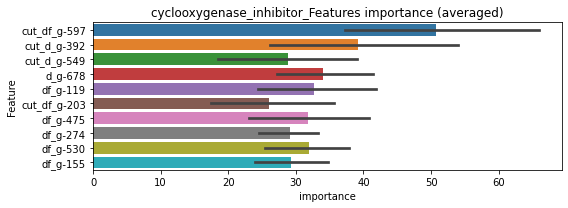

len(train_index) : 2227
len(valid_index) : 743
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2227
len(valid_index) : 743
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[134]	training's binary_logloss: 0.00707536	valid_1's binary_logloss: 0.0895807
Training until validation scores don't improve for 30 rounds


len(train_index) : 2228
len(valid_index) : 742
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00525935	valid_1's binary_logloss: 0.0956663
Training until validation scores don't improve for 30 rounds


len(train_index) : 2228
len(valid_index) : 742
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00558709	valid_1's binary_logloss: 0.081396
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.08725090516710436
cyclooxygenase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00626613	valid_1's binary_logloss: 0.0823461


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00679488	valid_1's binary_logloss: 0.0988111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00450021	valid_1's binary_logloss: 0.0939357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00238254	valid_1's binary_logloss: 0.0479414
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.993, PR-AUC:0.987
y_Threshold: 0.0134178, Threshold: 0.0418408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.0418408, conf_0:0.02929, conf_1:0.05439
Num_p_label: 18.0, Expected: 17.4, Adj_threshold_1: 0.0718408


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00368646	valid_1's binary_logloss: 0.0689314


threshold: 0.0718408, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00682328	valid_1's binary_logloss: 0.0943388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00246834	valid_1's binary_logloss: 0.0622677
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00119039	valid_1's binary_logloss: 0.0479802
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0254948, Threshold: 0.0718408, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00138478	valid_1's binary_logloss: 0.0594435


Remove_noisy_data: 36 → Positive_corect_labels: 622.0/3730
p_label_rate: 0.0097941 Vs.target_rate: 0.00437
Num_p_label: 39.0, Expected: 17.4, Threshold: 0.0718408, conf_0:0.05747, conf_1:0.08621
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_1: 0.1018408
Num_p_label: 19.0, Expected: 17.4, Adj_threshold_2: 0.1318408
threshold: 0.1318408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 622.0/3730, y_label_rate: 0.1667560
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00324499	valid_1's binary_logloss: 0.065444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00149393	valid_1's binary_logloss: 0.0565107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00176597	valid_1's binary_logloss: 0.0369792
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0202161, Threshold: 0.1318408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 611.0/3708
p_label_rate: 0.0042692 Vs.target_rate: 0.00437
Num_p_label: 17.0, Expected: 17.4, Threshold: 0.1318408, conf_0:0.11866, conf_1:0.14502


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00169113	valid_1's binary_logloss: 0.0511321


threshold: 0.1318408, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 611.0/3708, y_label_rate: 0.1647789


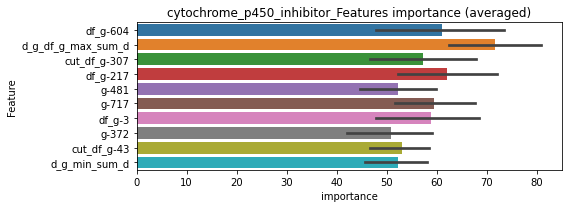

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00281833	valid_1's binary_logloss: 0.0477189
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[149]	training's binary_logloss: 0.00429887	valid_1's binary_logloss: 0.0673905
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0020123	valid_1's binary_logloss: 0.0320537
Training until validation scores don't improve for 30 rounds


cytochrome_p450_inhibitor logloss: 0.04735609357171639
cytochrome_p450_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[163]	training's binary_logloss: 0.00406469	valid_1's binary_logloss: 0.0422613


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00040523	valid_1's binary_logloss: 0.00666886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000427196	valid_1's binary_logloss: 0.00562887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.00041925	valid_1's binary_logloss: 0.00102386
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000415082	valid_1's binary_logloss: 0.00195199


y_Threshold: 0.0029265, Threshold: 0.0115218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0115218, conf_0:0.00807, conf_1:0.01498
Num_p_label: 7.0, Expected: 6.0, Adj_threshold_1: 0.0415218
threshold: 0.0415218, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0415218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0055249 Vs.target_rate: 0.00151
Num_p_label: 22.0, Expected: 6.0, Threshold: 0.0415218, conf_0:0.03322, conf_1:0.04983
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0715218
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000400419	valid_1's binary_logloss: 0.00620745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408121	valid_1's binary_logloss: 0.00408019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000403835	valid_1's binary_logloss: 0.000880099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403177	valid_1's binary_logloss: 0.0020776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0213018, Threshold: 0.0715218, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0715218, conf_0:0.06437, conf_1:0.07867
threshold: 0.0715218, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


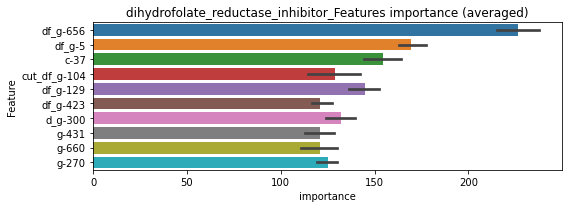

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000410696	valid_1's binary_logloss: 0.006103


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[823]	training's binary_logloss: 0.000426632	valid_1's binary_logloss: 0.00482623


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000405367	valid_1's binary_logloss: 0.000979461


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00040663	valid_1's binary_logloss: 0.0014055
Early stopping, best iteration is:
[1067]	training's binary_logloss: 0.000403481	valid_1's binary_logloss: 0.00140072


dihydrofolate_reductase_inhibitor logloss: 0.00333004271964584
dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000357403	valid_1's binary_logloss: 0.00254559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000356851	valid_1's binary_logloss: 0.00198374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000359962	valid_1's binary_logloss: 0.000809725
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023813, Threshold: 0.0099776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0099776, conf_0:0.00698, conf_1:0.01297
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_1: 0.0399776


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.00037487	valid_1's binary_logloss: 0.00508198


threshold: 0.0399776, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.0399776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0070316 Vs.target_rate: 0.00105
Num_p_label: 28.0, Expected: 4.2, Threshold: 0.0399776, conf_0:0.03198, conf_1:0.04797
Num_p_label: 16.0, Expected: 4.2, Adj_threshold_1: 0.0699776
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_2: 0.0999776
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_3: 0.1299776
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_4: 0.1599776


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000343756	valid_1's binary_logloss: 0.00198769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000354557	valid_1's binary_logloss: 0.00135106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000346586	valid_1's binary_logloss: 0.000844243
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0776905, Threshold: 0.1599776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.1599776, conf_0:0.14398, conf_1:0.17598


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000356085	valid_1's binary_logloss: 0.00377326


threshold: 0.1599776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


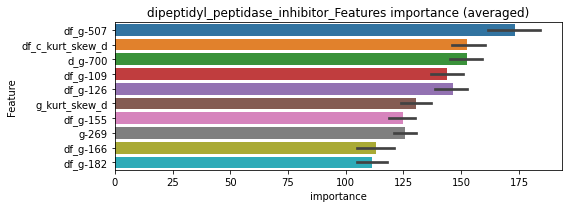

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[951]	training's binary_logloss: 0.00034223	valid_1's binary_logloss: 0.0018921


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[944]	training's binary_logloss: 0.000346128	valid_1's binary_logloss: 0.00153593


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000359327	valid_1's binary_logloss: 0.000874061


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000355234	valid_1's binary_logloss: 0.00374129


dipeptidyl_peptidase_inhibitor logloss: 0.0020110506386375147
diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000176586	valid_1's binary_logloss: 0.0039209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00017455	valid_1's binary_logloss: 0.00180481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000174989	valid_1's binary_logloss: 0.000211316
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004962, Threshold: 0.0018108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018108, conf_0:0.00127, conf_1:0.00235
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318108
threshold: 0.0318108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000174616	valid_1's binary_logloss: 0.000231277


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.0318108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00025
Num_p_label: 8.0, Expected: 1.0, Threshold: 0.0318108, conf_0:0.02545, conf_1:0.03817
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_1: 0.0618108
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_2: 0.0918108
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_3: 0.1218108
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.1518108
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_5: 0.1818108
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000159569	valid_1's binary_logloss: 0.000572149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000161226	valid_1's binary_logloss: 0.0049452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000161364	valid_1's binary_logloss: 0.000172873
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101109, Threshold: 0.1818108, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1818108, conf_0:0.16363, conf_1:0.19999
threshold: 0.1818108, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000160219	valid_1's binary_logloss: 0.000184657


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


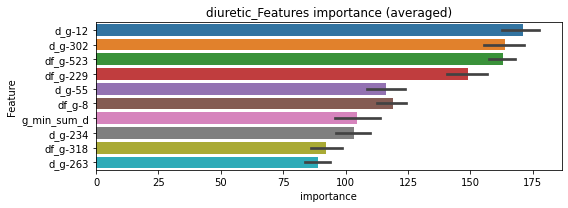

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000164069	valid_1's binary_logloss: 0.000319883


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[1152]	training's binary_logloss: 0.000162183	valid_1's binary_logloss: 0.000318075
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165054	valid_1's binary_logloss: 0.00235939
Early stopping, best iteration is:
[1025]	training's binary_logloss: 0.000164636	valid_1's binary_logloss: 0.00235822


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000166179	valid_1's binary_logloss: 0.000188481
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000164493	valid_1's binary_logloss: 0.000186657

len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================



Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000165567	valid_1's binary_logloss: 0.000197641


diuretic logloss: 0.0007645727538288503


Early stopping, best iteration is:
[1130]	training's binary_logloss: 0.000163923	valid_1's binary_logloss: 0.000195655


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000487165	valid_1's binary_logloss: 0.012756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000494882	valid_1's binary_logloss: 0.0167968
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000502488	valid_1's binary_logloss: 0.0030484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.00048914	valid_1's binary_logloss: 0.0142329


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037524, Threshold: 0.0855297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0855297, conf_0:0.05987, conf_1:0.11119
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.1155297
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.1455297
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_3: 0.1755297
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.2055297
threshold: 0.2055297, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000497674	valid_1's binary_logloss: 0.0125171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000485036	valid_1's binary_logloss: 0.0131483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000482282	valid_1's binary_logloss: 0.00338707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000494534	valid_1's binary_logloss: 0.0131269


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0745539, Threshold: 0.2055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0183325 Vs.target_rate: 0.00202
Num_p_label: 73.0, Expected: 8.0, Threshold: 0.2055297, conf_0:0.16442, conf_1:0.24664
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_1: 0.2355297
Num_p_label: 65.0, Expected: 8.0, Adj_threshold_2: 0.2655297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_3: 0.2955297
Num_p_label: 61.0, Expected: 8.0, Adj_threshold_4: 0.3255297
Num_p_label: 58.0, Expected: 8.0, Adj_threshold_5: 0.3555297
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_6: 0.3855297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_7: 0.4155297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_8: 0.4455297
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_9: 0.4755297
Num_p_label: 48.0, Expected: 8.0, Adj_threshold_10: 0.5055297
threshold: 0.5055297, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000474829	valid_1's binary_logloss: 0.0162652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000495703	valid_1's binary_logloss: 0.00641886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000486554	valid_1's binary_logloss: 0.00614384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000485481	valid_1's binary_logloss: 0.0060295


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0748767, Threshold: 0.5055297, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0153189 Vs.target_rate: 0.00202
Num_p_label: 61.0, Expected: 8.0, Threshold: 0.5055297, conf_0:0.45498, conf_1:0.55608
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_1: 0.5355297
Num_p_label: 56.0, Expected: 8.0, Adj_threshold_2: 0.5655297
Num_p_label: 53.0, Expected: 8.0, Adj_threshold_3: 0.5955297
Num_p_label: 52.0, Expected: 8.0, Adj_threshold_4: 0.6255297
Num_p_label: 47.0, Expected: 8.0, Adj_threshold_5: 0.6555297
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_6: 0.6855297
Num_p_label: 42.0, Expected: 8.0, Adj_threshold_7: 0.7155297
Num_p_label: 40.0, Expected: 8.0, Adj_threshold_8: 0.7455297
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_9: 0.7755297
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_10: 0.8055297
threshold: 0.8055297, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_la

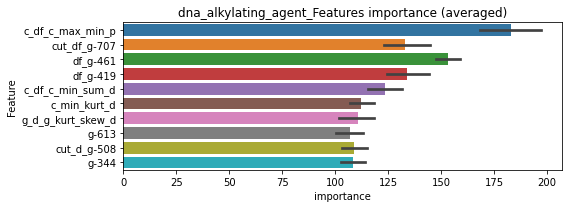

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000475025	valid_1's binary_logloss: 0.00780346


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.00049257	valid_1's binary_logloss: 0.00683704


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000480411	valid_1's binary_logloss: 0.00671822


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00046014	valid_1's binary_logloss: 0.00411668
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.000454717	valid_1's binary_logloss: 0.00410006


dna_alkylating_agent logloss: 0.006365895865226023


mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0237452	valid_1's binary_logloss: 0.163073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.0316291	valid_1's binary_logloss: 0.181865
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.031477	valid_1's binary_logloss: 0.165054
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.942, PR-AUC:0.902
y_Threshold: 0.0507837, Threshold: 0.0799540, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0291556	valid_1's binary_logloss: 0.16614


Remove_noisy_data: 684 → Positive_corect_labels: 1214/7803
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.05597, conf_1:0.10394
threshold: 0.0799540, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7803, y_label_rate: 0.1555812
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.0079529	valid_1's binary_logloss: 0.0937899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00979101	valid_1's binary_logloss: 0.0989217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00822457	valid_1's binary_logloss: 0.0929641
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.988, PR-AUC:0.972
y_Threshold: 0.0389157, Threshold: 0.0799540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 1127.0/7629
p_label_rate: 0.0077850 Vs.target_rate: 0.01688


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0106022	valid_1's binary_logloss: 0.0835296


Num_p_label: 31.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.06396, conf_1:0.09594
threshold: 0.0799540, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1127.0/7629, y_label_rate: 0.1477258
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00336302	valid_1's binary_logloss: 0.0482342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00538873	valid_1's binary_logloss: 0.0703889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00308601	valid_1's binary_logloss: 0.0508344
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00227552	valid_1's binary_logloss: 0.0425886


3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0285047, Threshold: 0.0799540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1088.0/7551
p_label_rate: 0.0080362 Vs.target_rate: 0.01688
Num_p_label: 32.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.07196, conf_1:0.08795
threshold: 0.0799540, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1088.0/7551, y_label_rate: 0.1440869


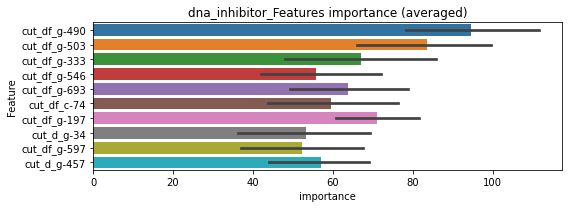

len(train_index) : 5663
len(valid_index) : 1888
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5663
len(valid_index) : 1888
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00212781	valid_1's binary_logloss: 0.0325657
Training until validation scores don't improve for 30 rounds


len(train_index) : 5663
len(valid_index) : 1888
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00351091	valid_1's binary_logloss: 0.0344095
Training until validation scores don't improve for 30 rounds


len(train_index) : 5664
len(valid_index) : 1887
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00435603	valid_1's binary_logloss: 0.0467855
Training until validation scores don't improve for 30 rounds


dna_inhibitor logloss: 0.03792506288545439
dna_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00213351	valid_1's binary_logloss: 0.0379396
mutually exclusive columns: dopamine_receptor_agonist


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.0162356	valid_1's binary_logloss: 0.207374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00426104	valid_1's binary_logloss: 0.104728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00845067	valid_1's binary_logloss: 0.119206
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.971, PR-AUC:0.942
y_Threshold: 0.0355702, Threshold: 0.0482960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 378/2343
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.0482960, conf_0:0.03381, conf_1:0.06278
Num_p_label: 7.0, Expected: 20.2, Adj_threshold_1: 0.0782960
threshold: 0.0782960, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.0200949	valid_1's binary_logloss: 0.174535


positive_y_label: 378.0/2343, y_label_rate: 0.1613316
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00671944	valid_1's binary_logloss: 0.128021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00894934	valid_1's binary_logloss: 0.110878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00821555	valid_1's binary_logloss: 0.0971353
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.0403973, Threshold: 0.0782960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 353.0/2293
p_label_rate: 0.0052737 Vs.target_rate: 0.00508
Num_p_label: 21.0, Expected: 20.2, Threshold: 0.0782960, conf_0:0.06264, conf_1:0.09396
threshold: 0.0782960, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00450805	valid_1's binary_logloss: 0.100895


positive_y_label: 353.0/2293, y_label_rate: 0.1539468
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00345312	valid_1's binary_logloss: 0.0880974
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00546458	valid_1's binary_logloss: 0.105782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00260336	valid_1's binary_logloss: 0.0540589
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0346805, Threshold: 0.0782960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0032647 Vs.target_rate: 0.00508
Num_p_label: 13.0, Expected: 20.2, Threshold: 0.0782960, conf_0:0.07047, conf_1:0.08613
threshold: 0.0782960, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00207519	valid_1's binary_logloss: 0.060789


positive_y_label: 341.0/2269, y_label_rate: 0.1502865


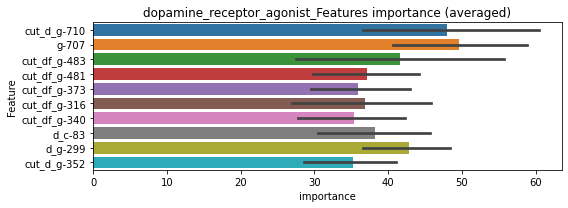

len(train_index) : 1701
len(valid_index) : 568
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 2/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00473682	valid_1's binary_logloss: 0.0789388
Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00468378	valid_1's binary_logloss: 0.0823336
Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 4/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00283514	valid_1's binary_logloss: 0.0584258
Training until validation scores don't improve for 30 rounds


dopamine_receptor_agonist logloss: 0.07037860921312396
dopamine_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.00650798	valid_1's binary_logloss: 0.0618011
mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0389788	valid_1's binary_logloss: 0.182736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0385724	valid_1's binary_logloss: 0.177092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0365889	valid_1's binary_logloss: 0.180398
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.930, PR-AUC:0.885
y_Threshold: 0.0583310, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 790 → Positive_corect_labels: 1214/7986


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.0347366	valid_1's binary_logloss: 0.174318


p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.05566, conf_1:0.10337
threshold: 0.0795131, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7986, y_label_rate: 0.1520160
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00825752	valid_1's binary_logloss: 0.0901922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0101969	valid_1's binary_logloss: 0.0964492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00792913	valid_1's binary_logloss: 0.0868401
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00645193	valid_1's binary_logloss: 0.0755137


2 / 3, AUC score:0.990, PR-AUC:0.974
y_Threshold: 0.0357785, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1123.0/7804
p_label_rate: 0.0067805 Vs.target_rate: 0.01780
Num_p_label: 27.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.06361, conf_1:0.09542
threshold: 0.0795131, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 1123.0/7804, y_label_rate: 0.1439006
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00297385	valid_1's binary_logloss: 0.0458777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0033152	valid_1's binary_logloss: 0.0497327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00280734	valid_1's binary_logloss: 0.0424341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00235186	valid_1's binary_logloss: 0.046669


3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0326837, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1079.0/7716
p_label_rate: 0.0123054 Vs.target_rate: 0.01780
Num_p_label: 49.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.07156, conf_1:0.08746
threshold: 0.0795131, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1079.0/7716, y_label_rate: 0.1398393


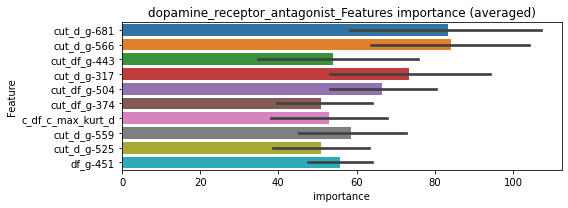

len(train_index) : 5787
len(valid_index) : 1929
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000995085	valid_1's binary_logloss: 0.0146921
Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00131474	valid_1's binary_logloss: 0.0238876
Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00168185	valid_1's binary_logloss: 0.0228494
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.02079903284894295
dopamine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00146775	valid_1's binary_logloss: 0.0217671
mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0158434	valid_1's binary_logloss: 0.122316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.0169471	valid_1's binary_logloss: 0.129917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0178993	valid_1's binary_logloss: 0.137374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.018796	valid_1's binary_logloss: 0.139903


1 / 3, AUC score:0.967, PR-AUC:0.940
y_Threshold: 0.0391111, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 589 → Positive_corect_labels: 1367/8475
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.05083, conf_1:0.09439
threshold: 0.0726077, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1367.0/8475, y_label_rate: 0.1612979
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00508838	valid_1's binary_logloss: 0.060096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00493295	valid_1's binary_logloss: 0.0832728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00699091	valid_1's binary_logloss: 0.0762296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00512829	valid_1's binary_logloss: 0.0797958


2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0348643, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 1289.0/8319
p_label_rate: 0.0145655 Vs.target_rate: 0.01411
Num_p_label: 58.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.05809, conf_1:0.08713
threshold: 0.0726077, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1289.0/8319, y_label_rate: 0.1549465
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00332191	valid_1's binary_logloss: 0.0508742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00265175	valid_1's binary_logloss: 0.0473194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00221351	valid_1's binary_logloss: 0.037762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00286705	valid_1's binary_logloss: 0.0422257


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0364374, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1251.0/8243
p_label_rate: 0.0193370 Vs.target_rate: 0.01411
Num_p_label: 77.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.06535, conf_1:0.07987
threshold: 0.0726077, positive_p_label: 77.0/3982, p_label_rate: 0.0193370
positive_y_label: 1251.0/8243, y_label_rate: 0.1517651


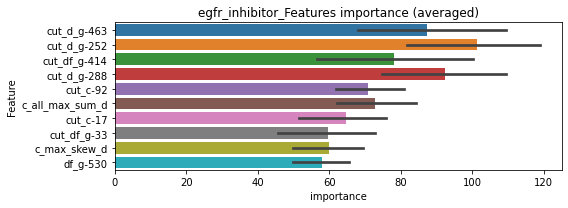

len(train_index) : 6182
len(valid_index) : 2061
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6182
len(valid_index) : 2061
================================= fold 2/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00126858	valid_1's binary_logloss: 0.0270639
Training until validation scores don't improve for 30 rounds


len(train_index) : 6182
len(valid_index) : 2061
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00240741	valid_1's binary_logloss: 0.0354563
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00151535	valid_1's binary_logloss: 0.027998


len(train_index) : 6183
len(valid_index) : 2060
================================= fold 4/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


egfr_inhibitor logloss: 0.031057398553519546
egfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00183413	valid_1's binary_logloss: 0.0337127


elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000232452	valid_1's binary_logloss: 0.000859439
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000230216	valid_1's binary_logloss: 0.000734649
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00023171	valid_1's binary_logloss: 0.000380352
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008658, Threshold: 0.0027007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0027007, conf_0:0.00189, conf_1:0.00351
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0327007
threshold: 0.0327007, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000228512	valid_1's binary_logloss: 0.00134341


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02616, conf_1:0.03924
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000220194	valid_1's binary_logloss: 0.00163004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000244861	valid_1's binary_logloss: 0.00111289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000222787	valid_1's binary_logloss: 0.000296913
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0676233, Threshold: 0.0327007, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0327007, conf_0:0.02943, conf_1:0.03597
threshold: 0.0327007, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000218347	valid_1's binary_logloss: 0.00109631


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


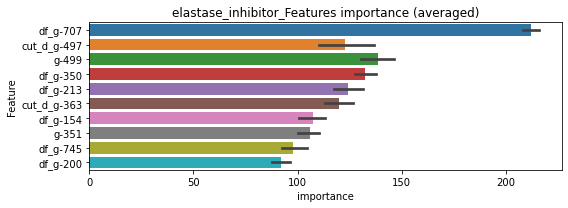

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000230819	valid_1's binary_logloss: 0.000877822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000230752	valid_1's binary_logloss: 0.000808727
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[854]	training's binary_logloss: 0.000231395	valid_1's binary_logloss: 0.000304327
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0006665683270342578


Early stopping, best iteration is:
[960]	training's binary_logloss: 0.000225171	valid_1's binary_logloss: 0.00067398


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000362937	valid_1's binary_logloss: 0.00277857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000322508	valid_1's binary_logloss: 0.0025593
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000324188	valid_1's binary_logloss: 0.000841975
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020080, Threshold: 0.0065932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0065932, conf_0:0.00462, conf_1:0.00857
Num_p_label: 4.0, Expected: 3.3, Adj_threshold_1: 0.0365932


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000328764	valid_1's binary_logloss: 0.000908318


threshold: 0.0365932, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0365932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00084
Num_p_label: 18.0, Expected: 3.3, Threshold: 0.0365932, conf_0:0.02927, conf_1:0.04391
Num_p_label: 8.0, Expected: 3.3, Adj_threshold_1: 0.0665932


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000352071	valid_1's binary_logloss: 0.00246753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000314666	valid_1's binary_logloss: 0.00141527
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000312086	valid_1's binary_logloss: 0.000604999
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0483456, Threshold: 0.0665932, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00084
Num_p_label: 8.0, Expected: 3.3, Threshold: 0.0665932, conf_0:0.05993, conf_1:0.07325


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000317872	valid_1's binary_logloss: 0.000829814


threshold: 0.0665932, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


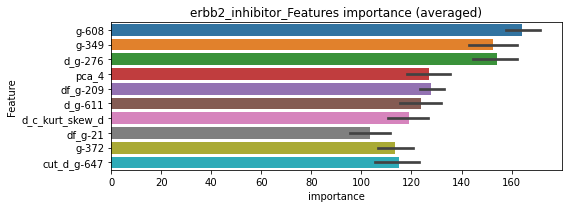

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000344559	valid_1's binary_logloss: 0.00308952
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000312024	valid_1's binary_logloss: 0.00105078


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.0003129	valid_1's binary_logloss: 0.00062523


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00031564	valid_1's binary_logloss: 0.000836686
Early stopping, best iteration is:
[1010]	training's binary_logloss: 0.000315133	valid_1's binary_logloss: 0.000835913


erbb2_inhibitor logloss: 0.0014005093208885964


mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0070792	valid_1's binary_logloss: 0.100626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00989085	valid_1's binary_logloss: 0.117106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0094949	valid_1's binary_logloss: 0.104402
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.981, PR-AUC:0.964
y_Threshold: 0.0285481, Threshold: 0.0403452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 252 → Positive_corect_labels: 753/4543
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0403452, conf_0:0.02824, conf_1:0.05245
Num_p_label: 7.0, Expected: 26.4, Adj_threshold_1: 0.0703452
threshold: 0.0703452, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[248]	training's binary_logloss: 0.0175308	valid_1's binary_logloss: 0.131673


positive_y_label: 753.0/4543, y_label_rate: 0.1657495
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00467603	valid_1's binary_logloss: 0.0815591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00655855	valid_1's binary_logloss: 0.0863989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00331781	valid_1's binary_logloss: 0.049872
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0367371, Threshold: 0.0703452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 721.0/4479
p_label_rate: 0.0045203 Vs.target_rate: 0.00663
Num_p_label: 18.0, Expected: 26.4, Threshold: 0.0703452, conf_0:0.05628, conf_1:0.08441
threshold: 0.0703452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00663464	valid_1's binary_logloss: 0.0911794


positive_y_label: 721.0/4479, y_label_rate: 0.1609734
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00341942	valid_1's binary_logloss: 0.0583094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00319949	valid_1's binary_logloss: 0.0542645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00346457	valid_1's binary_logloss: 0.0491047
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0320562, Threshold: 0.0703452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 703.0/4443
p_label_rate: 0.0062783 Vs.target_rate: 0.00663


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00183684	valid_1's binary_logloss: 0.0563065


Num_p_label: 25.0, Expected: 26.4, Threshold: 0.0703452, conf_0:0.06331, conf_1:0.07738
threshold: 0.0703452, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 703.0/4443, y_label_rate: 0.1582264


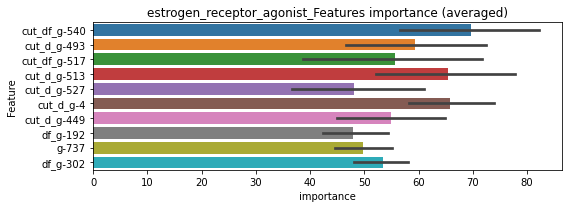

len(train_index) : 3332
len(valid_index) : 1111
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3332
len(valid_index) : 1111
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.001785	valid_1's binary_logloss: 0.0398337
Training until validation scores don't improve for 30 rounds


len(train_index) : 3332
len(valid_index) : 1111
================================= fold 3/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00332058	valid_1's binary_logloss: 0.0385534
Training until validation scores don't improve for 30 rounds


len(train_index) : 3333
len(valid_index) : 1110
================================= fold 4/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[138]	training's binary_logloss: 0.00551608	valid_1's binary_logloss: 0.0520172
Training until validation scores don't improve for 30 rounds


estrogen_receptor_agonist logloss: 0.04825540722786355
estrogen_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00429949	valid_1's binary_logloss: 0.0626303


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.00052112	valid_1's binary_logloss: 0.00952746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000576397	valid_1's binary_logloss: 0.0139528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000538499	valid_1's binary_logloss: 0.00393803
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049400, Threshold: 0.1903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.1903560, conf_0:0.13325, conf_1:0.24746
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_1: 0.2203560
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_2: 0.2503560
Num_p_label: 33.0, Expected: 8.0, Adj_threshold_3: 0.2803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.3103560


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00121031	valid_1's binary_logloss: 0.0265691


Num_p_label: 25.0, Expected: 8.0, Adj_threshold_5: 0.3403560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_6: 0.3703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.4003560
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_8: 0.4303560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_9: 0.4603560
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.4903560
threshold: 0.4903560, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000512582	valid_1's binary_logloss: 0.00748627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.00052509	valid_1's binary_logloss: 0.0132082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000499526	valid_1's binary_logloss: 0.00431506
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0376580, Threshold: 0.4903560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0085384 Vs.target_rate: 0.00202
Num_p_label: 34.0, Expected: 8.0, Threshold: 0.4903560, conf_0:0.39228, conf_1:0.58843
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.5203560


Early stopping, best iteration is:
[422]	training's binary_logloss: 0.00102477	valid_1's binary_logloss: 0.0278137


Num_p_label: 33.0, Expected: 8.0, Adj_threshold_2: 0.5503560
Num_p_label: 31.0, Expected: 8.0, Adj_threshold_3: 0.5803560
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_4: 0.6103560
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_5: 0.6403560
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_6: 0.6703560
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_7: 0.7003560
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_8: 0.7303560
threshold: 0.7303560, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000468066	valid_1's binary_logloss: 0.00451032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000506699	valid_1's binary_logloss: 0.00878163
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000514102	valid_1's binary_logloss: 0.00741139
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000521993	valid_1's binary_logloss: 0.0177837


y_Threshold: 0.0451250, Threshold: 0.7303560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3794
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.7303560, conf_0:0.65732, conf_1:0.80339
threshold: 0.7303560, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 649.0/3794, y_label_rate: 0.1710596


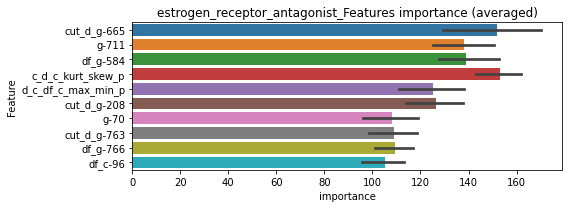

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000487493	valid_1's binary_logloss: 0.0050781


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000715432	valid_1's binary_logloss: 0.0188331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000532634	valid_1's binary_logloss: 0.0101475


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000508133	valid_1's binary_logloss: 0.00388802


estrogen_receptor_antagonist logloss: 0.00948798619679034
faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000453312	valid_1's binary_logloss: 0.00551267
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000424357	valid_1's binary_logloss: 0.00484501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000422203	valid_1's binary_logloss: 0.00240841
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028585, Threshold: 0.0094032, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00042021	valid_1's binary_logloss: 0.0042654


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0094032, conf_0:0.00658, conf_1:0.01222
Num_p_label: 5.0, Expected: 6.0, Adj_threshold_1: 0.0394032
threshold: 0.0394032, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03152, conf_1:0.04728
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000393316	valid_1's binary_logloss: 0.00555616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000446526	valid_1's binary_logloss: 0.00433073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000399904	valid_1's binary_logloss: 0.00225576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.00039482	valid_1's binary_logloss: 0.0032132


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0482573, Threshold: 0.0394032, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.0394032, conf_0:0.03546, conf_1:0.04334
threshold: 0.0394032, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


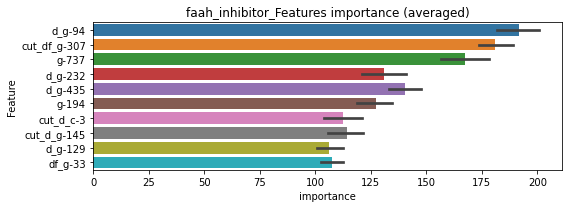

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000450229	valid_1's binary_logloss: 0.0049723


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000404724	valid_1's binary_logloss: 0.00450861


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000415868	valid_1's binary_logloss: 0.00201621


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000418598	valid_1's binary_logloss: 0.00350257


faah_inhibitor logloss: 0.003750441817598832
farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000294267	valid_1's binary_logloss: 0.00138727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000287027	valid_1's binary_logloss: 0.000989525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000294857	valid_1's binary_logloss: 0.000523521
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014914, Threshold: 0.0039949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0039949, conf_0:0.00280, conf_1:0.00519
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0339949
threshold: 0.0339949, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000294923	valid_1's binary_logloss: 0.00342668


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0339949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00076
Num_p_label: 9.0, Expected: 3.0, Threshold: 0.0339949, conf_0:0.02720, conf_1:0.04079
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0639949
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00187909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000280426	valid_1's binary_logloss: 0.000816643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000284185	valid_1's binary_logloss: 0.000460109
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0270107, Threshold: 0.0639949, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0639949, conf_0:0.05760, conf_1:0.07039
threshold: 0.0639949, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000280065	valid_1's binary_logloss: 0.0043133


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


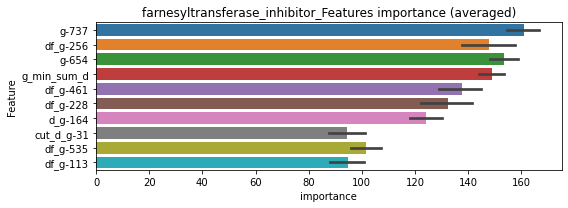

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[945]	training's binary_logloss: 0.000284711	valid_1's binary_logloss: 0.00161121


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000279529	valid_1's binary_logloss: 0.000645443
Early stopping, best iteration is:
[1045]	training's binary_logloss: 0.000278168	valid_1's binary_logloss: 0.000643608


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037
Early stopping, best iteration is:
[973]	training's binary_logloss: 0.000283951	valid_1's binary_logloss: 0.00050037


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000295906	valid_1's binary_logloss: 0.00364927


farnesyltransferase_inhibitor logloss: 0.0016015099193632464
fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000339498	valid_1's binary_logloss: 0.00115366
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000337202	valid_1's binary_logloss: 0.00721403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000347535	valid_1's binary_logloss: 0.00164577
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018693, Threshold: 0.0087358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0087358, conf_0:0.00612, conf_1:0.01136


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000342156	valid_1's binary_logloss: 0.0055406


Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0387358
threshold: 0.0387358, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0387358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00105
Num_p_label: 20.0, Expected: 4.2, Threshold: 0.0387358, conf_0:0.03099, conf_1:0.04648
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_1: 0.0687358
threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000334547	valid_1's binary_logloss: 0.000893833
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000337633	valid_1's binary_logloss: 0.00592948
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.00034043	valid_1's binary_logloss: 0.00146318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0307888, Threshold: 0.0687358, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0687358, conf_0:0.06186, conf_1:0.07561
threshold: 0.0687358, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000438208	valid_1's binary_logloss: 0.00672482


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


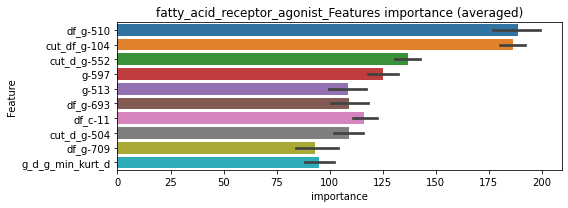

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000332227	valid_1's binary_logloss: 0.000856827
Early stopping, best iteration is:
[982]	training's binary_logloss: 0.000332797	valid_1's binary_logloss: 0.000856818


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000335215	valid_1's binary_logloss: 0.00498961


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000342468	valid_1's binary_logloss: 0.00120331


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[856]	training's binary_logloss: 0.000337058	valid_1's binary_logloss: 0.00532658


fatty_acid_receptor_agonist logloss: 0.003094419307955251
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000514423	valid_1's binary_logloss: 0.0175326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000512766	valid_1's binary_logloss: 0.0073775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.00052688	valid_1's binary_logloss: 0.00446889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000511176	valid_1's binary_logloss: 0.0109288


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0043282, Threshold: 0.0176913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0176913, conf_0:0.01238, conf_1:0.02300
Num_p_label: 20.0, Expected: 8.4, Adj_threshold_1: 0.0476913
threshold: 0.0476913, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000677432	valid_1's binary_logloss: 0.0177828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000498116	valid_1's binary_logloss: 0.00624964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.00051051	valid_1's binary_logloss: 0.00377615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000498538	valid_1's binary_logloss: 0.0110419


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246261, Threshold: 0.0476913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0075339 Vs.target_rate: 0.00210
Num_p_label: 30.0, Expected: 8.4, Threshold: 0.0476913, conf_0:0.03815, conf_1:0.05723
Num_p_label: 18.0, Expected: 8.4, Adj_threshold_1: 0.0776913
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000489695	valid_1's binary_logloss: 0.00513002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000526	valid_1's binary_logloss: 0.0151451
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[756]	training's binary_logloss: 0.00050432	valid_1's binary_logloss: 0.00162243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000492852	valid_1's binary_logloss: 0.0155387


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0190430, Threshold: 0.0776913, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00210
Num_p_label: 18.0, Expected: 8.4, Threshold: 0.0776913, conf_0:0.06992, conf_1:0.08546
threshold: 0.0776913, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


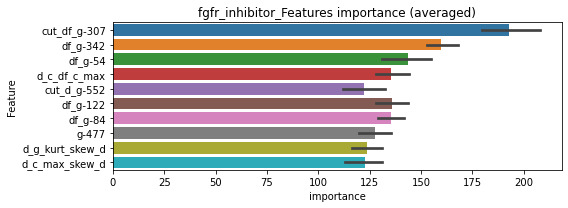

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000585523	valid_1's binary_logloss: 0.00817335


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00050369	valid_1's binary_logloss: 0.0070327
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000502897	valid_1's binary_logloss: 0.00702785


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000520453	valid_1's binary_logloss: 0.00301455


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000516495	valid_1's binary_logloss: 0.0124944


fgfr_inhibitor logloss: 0.007677825067803415


mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.0116334	valid_1's binary_logloss: 0.128434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0141439	valid_1's binary_logloss: 0.129102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00709682	valid_1's binary_logloss: 0.0971228
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.978, PR-AUC:0.958
y_Threshold: 0.0304782, Threshold: 0.0469266, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.0112898	valid_1's binary_logloss: 0.124084


Remove_noisy_data: 443 → Positive_corect_labels: 1210/7364
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.03285, conf_1:0.06100
threshold: 0.0469266, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1210.0/7364, y_label_rate: 0.1643129
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00760687	valid_1's binary_logloss: 0.0878124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00599984	valid_1's binary_logloss: 0.0844642
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00517282	valid_1's binary_logloss: 0.079128
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0354938, Threshold: 0.0469266, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00653938	valid_1's binary_logloss: 0.0736707


Remove_noisy_data: 114 → Positive_corect_labels: 1153.0/7250
p_label_rate: 0.0138122 Vs.target_rate: 0.01172
Num_p_label: 55.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.03754, conf_1:0.05631
threshold: 0.0469266, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1153.0/7250, y_label_rate: 0.1590345
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00287783	valid_1's binary_logloss: 0.049249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00580157	valid_1's binary_logloss: 0.0792357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00212968	valid_1's binary_logloss: 0.0467635
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0256692, Threshold: 0.0469266, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00425044	valid_1's binary_logloss: 0.0609091


Remove_noisy_data: 76 → Positive_corect_labels: 1115.0/7174
p_label_rate: 0.0128076 Vs.target_rate: 0.01172
Num_p_label: 51.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.04223, conf_1:0.05162
threshold: 0.0469266, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1115.0/7174, y_label_rate: 0.1554224


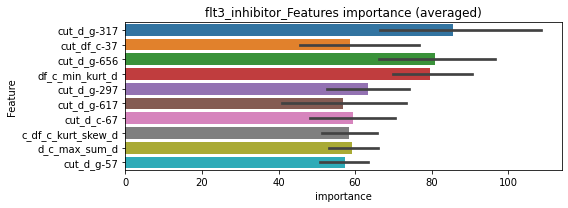

len(train_index) : 5380
len(valid_index) : 1794
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5380
len(valid_index) : 1794
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00265195	valid_1's binary_logloss: 0.0367965
Training until validation scores don't improve for 30 rounds


len(train_index) : 5381
len(valid_index) : 1793
================================= fold 3/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00396146	valid_1's binary_logloss: 0.0493176
Training until validation scores don't improve for 30 rounds


len(train_index) : 5381
len(valid_index) : 1793
================================= fold 4/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00210184	valid_1's binary_logloss: 0.0422924
Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.045156110441855614
flt3_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00437574	valid_1's binary_logloss: 0.0522203


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000292416	valid_1's binary_logloss: 0.00118516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000297237	valid_1's binary_logloss: 0.00197324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000288964	valid_1's binary_logloss: 0.00115505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014519, Threshold: 0.0051613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051613, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 3.0, Adj_threshold_1: 0.0351613
threshold: 0.0351613, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000288802	valid_1's binary_logloss: 0.00104823


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0351613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0351613, conf_0:0.02813, conf_1:0.04219
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0651613


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000292336	valid_1's binary_logloss: 0.00125989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000278999	valid_1's binary_logloss: 0.00154754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000282115	valid_1's binary_logloss: 0.00057384
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1070860, Threshold: 0.0651613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0651613, conf_0:0.05865, conf_1:0.07168
threshold: 0.0651613, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000278644	valid_1's binary_logloss: 0.000706638


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


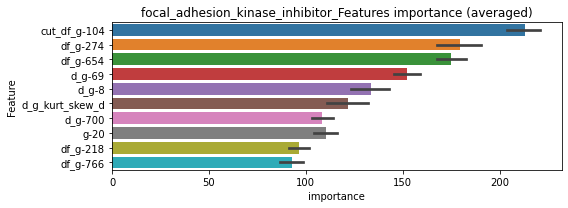

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280591	valid_1's binary_logloss: 0.00089329
Early stopping, best iteration is:
[1151]	training's binary_logloss: 0.000273566	valid_1's binary_logloss: 0.000881165


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000280563	valid_1's binary_logloss: 0.00126729
Early stopping, best iteration is:
[979]	training's binary_logloss: 0.000281428	valid_1's binary_logloss: 0.00126664


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000282341	valid_1's binary_logloss: 0.000665434
Early stopping, best iteration is:
[1042]	training's binary_logloss: 0.000280526	valid_1's binary_logloss: 0.000662528


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00028428	valid_1's binary_logloss: 0.000705032
Early stopping, best iteration is:
[1166]	training's binary_logloss: 0.000277426	valid_1's binary_logloss: 0.000694812


focal_adhesion_kinase_inhibitor logloss: 0.0008762924980626207
free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000295281	valid_1's binary_logloss: 0.000980463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000296919	valid_1's binary_logloss: 0.00130742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000295748	valid_1's binary_logloss: 0.000676627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014677, Threshold: 0.0061014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0061014, conf_0:0.00427, conf_1:0.00793
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0361014


Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000301416	valid_1's binary_logloss: 0.0022544


threshold: 0.0361014, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0361014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0361014, conf_0:0.02888, conf_1:0.04332
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0661014
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_2: 0.0961014


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000287944	valid_1's binary_logloss: 0.000829575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000286091	valid_1's binary_logloss: 0.00133822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000289478	valid_1's binary_logloss: 0.000510136
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0354022, Threshold: 0.0961014, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0961014, conf_0:0.08649, conf_1:0.10571
threshold: 0.0961014, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000356631	valid_1's binary_logloss: 0.00238191


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


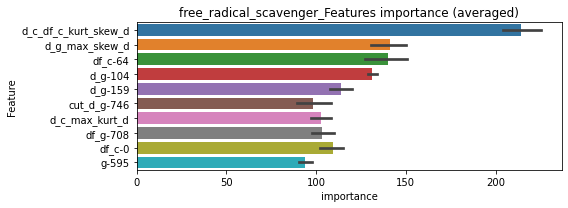

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000284998	valid_1's binary_logloss: 0.000730602


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[928]	training's binary_logloss: 0.000285232	valid_1's binary_logloss: 0.000986432


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[963]	training's binary_logloss: 0.0002874	valid_1's binary_logloss: 0.000531578


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


free_radical_scavenger logloss: 0.001001659412196387


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000301137	valid_1's binary_logloss: 0.00175801


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000353994	valid_1's binary_logloss: 0.0014373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000358147	valid_1's binary_logloss: 0.00699769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000357463	valid_1's binary_logloss: 0.000822493
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019324, Threshold: 0.0069234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097


Early stopping, best iteration is:
[577]	training's binary_logloss: 0.0003528	valid_1's binary_logloss: 0.00224403


Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0069234, conf_0:0.00485, conf_1:0.00900
Num_p_label: 5.0, Expected: 3.8, Adj_threshold_1: 0.0369234
threshold: 0.0369234, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176620, Threshold: 0.0369234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0045203 Vs.target_rate: 0.00097
Num_p_label: 18.0, Expected: 3.8, Threshold: 0.0369234, conf_0:0.02954, conf_1:0.04431


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


Num_p_label: 10.0, Expected: 3.8, Adj_threshold_1: 0.0669234
Num_p_label: 6.0, Expected: 3.8, Adj_threshold_2: 0.0969234
threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000349793	valid_1's binary_logloss: 0.00128224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000367888	valid_1's binary_logloss: 0.00760747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000350445	valid_1's binary_logloss: 0.000681747
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0176620, Threshold: 0.0969234, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0015068 Vs.target_rate: 0.00097
Num_p_label: 6.0, Expected: 3.8, Threshold: 0.0969234, conf_0:0.08723, conf_1:0.10662


Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000340051	valid_1's binary_logloss: 0.00267197


threshold: 0.0969234, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


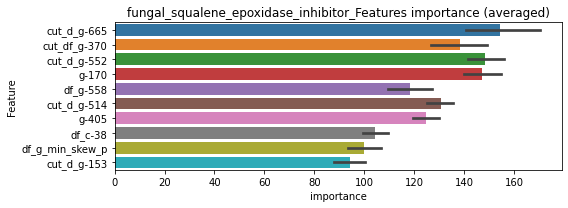

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.00035854	valid_1's binary_logloss: 0.00127644


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000349495	valid_1's binary_logloss: 0.00654898


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000360236	valid_1's binary_logloss: 0.000938549


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000358236	valid_1's binary_logloss: 0.00200667


fungal_squalene_epoxidase_inhibitor logloss: 0.0026930476012493195
gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00325815	valid_1's binary_logloss: 0.0983694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00314632	valid_1's binary_logloss: 0.0814327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00393527	valid_1's binary_logloss: 0.0766066
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0123638, Threshold: 0.0558119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 639/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.0558119, conf_0:0.03907, conf_1:0.07256
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.0858119


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00246252	valid_1's binary_logloss: 0.0621877


threshold: 0.0858119, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 639.0/3761, y_label_rate: 0.1699016
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00567233	valid_1's binary_logloss: 0.104697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00482631	valid_1's binary_logloss: 0.0838779
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000938152	valid_1's binary_logloss: 0.0409489
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0264909, Threshold: 0.0858119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 615.0/3713
p_label_rate: 0.0145655 Vs.target_rate: 0.00445
Num_p_label: 58.0, Expected: 17.7, Threshold: 0.0858119, conf_0:0.06865, conf_1:0.10297
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_1: 0.1158119
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.1458119
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_3: 0.1758119
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_4: 0.2058119


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00328097	valid_1's binary_logloss: 0.0523121


threshold: 0.2058119, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 615.0/3713, y_label_rate: 0.1656343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00171286	valid_1's binary_logloss: 0.0536432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00236996	valid_1's binary_logloss: 0.0584442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00179117	valid_1's binary_logloss: 0.0496534
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0244351, Threshold: 0.2058119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 603.0/3689
p_label_rate: 0.0107986 Vs.target_rate: 0.00445
Num_p_label: 43.0, Expected: 17.7, Threshold: 0.2058119, conf_0:0.18523, conf_1:0.22639
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_1: 0.2358119
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.2658119
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_3: 0.2958119
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_4: 0.3258119


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00160855	valid_1's binary_logloss: 0.0490268


Num_p_label: 23.0, Expected: 17.7, Adj_threshold_5: 0.3558119
threshold: 0.3558119, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 603.0/3689, y_label_rate: 0.1634589


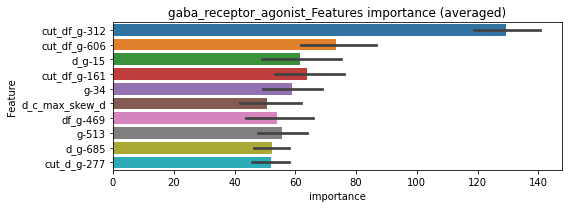

len(train_index) : 2766
len(valid_index) : 923
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 2/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00398621	valid_1's binary_logloss: 0.0721943
Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 3/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00164203	valid_1's binary_logloss: 0.0380738
Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 4/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00178513	valid_1's binary_logloss: 0.0236175
Training until validation scores don't improve for 30 rounds


gaba_receptor_agonist logloss: 0.04284309332969867
gaba_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00141625	valid_1's binary_logloss: 0.037455
mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00584119	valid_1's binary_logloss: 0.0899964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0116863	valid_1's binary_logloss: 0.112696
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00969029	valid_1's binary_logloss: 0.101283
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.985, PR-AUC:0.970
y_Threshold: 0.0221119, Threshold: 0.0323540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 287 → Positive_corect_labels: 884/5318
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0323540, conf_0:0.02265, conf_1:0.04206
threshold: 0.0323540, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00943726	valid_1's binary_logloss: 0.105078


positive_y_label: 884.0/5318, y_label_rate: 0.1662279
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00528909	valid_1's binary_logloss: 0.0675459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00993004	valid_1's binary_logloss: 0.0847438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00583837	valid_1's binary_logloss: 0.0781458
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0336819, Threshold: 0.0323540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 845.0/5240
p_label_rate: 0.0138122 Vs.target_rate: 0.00693
Num_p_label: 55.0, Expected: 27.6, Threshold: 0.0323540, conf_0:0.02588, conf_1:0.03882


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.002758	valid_1's binary_logloss: 0.0613341


Num_p_label: 12.0, Expected: 27.6, Adj_threshold_1: 0.0623540
threshold: 0.0623540, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 845.0/5240, y_label_rate: 0.1612595
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00226085	valid_1's binary_logloss: 0.0416564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.0027362	valid_1's binary_logloss: 0.0569999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.0023263	valid_1's binary_logloss: 0.0371595
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0255862, Threshold: 0.0623540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 830.0/5210
p_label_rate: 0.0015068 Vs.target_rate: 0.00693
Num_p_label: 6.0, Expected: 27.6, Threshold: 0.0623540, conf_0:0.05612, conf_1:0.06859


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00270902	valid_1's binary_logloss: 0.0529761


threshold: 0.0623540, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 830.0/5210, y_label_rate: 0.1593090


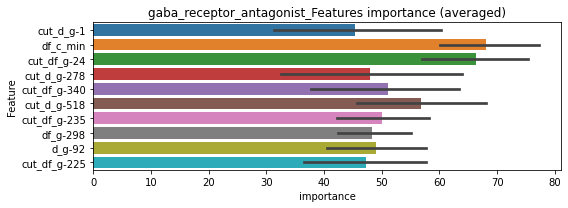

len(train_index) : 3907
len(valid_index) : 1303
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3907
len(valid_index) : 1303
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00411786	valid_1's binary_logloss: 0.0360904
Training until validation scores don't improve for 30 rounds


len(train_index) : 3908
len(valid_index) : 1302
================================= fold 3/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00394505	valid_1's binary_logloss: 0.0447125
Training until validation scores don't improve for 30 rounds


len(train_index) : 3908
len(valid_index) : 1302
================================= fold 4/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00296732	valid_1's binary_logloss: 0.047534
Training until validation scores don't improve for 30 rounds


gaba_receptor_antagonist logloss: 0.04412118838778349
gaba_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00357797	valid_1's binary_logloss: 0.0481535


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00061414	valid_1's binary_logloss: 0.028672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.00059292	valid_1's binary_logloss: 0.0138343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.00053579	valid_1's binary_logloss: 0.00532702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000562109	valid_1's binary_logloss: 0.020655


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0040846, Threshold: 0.0148952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0148952, conf_0:0.01043, conf_1:0.01936
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0448952
threshold: 0.0448952, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000515198	valid_1's binary_logloss: 0.0268571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000513255	valid_1's binary_logloss: 0.0104279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000534547	valid_1's binary_logloss: 0.0056577
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234573, Threshold: 0.0448952, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000658203	valid_1's binary_logloss: 0.0193247


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00235
Num_p_label: 28.0, Expected: 9.4, Threshold: 0.0448952, conf_0:0.03592, conf_1:0.05387
Num_p_label: 16.0, Expected: 9.4, Adj_threshold_1: 0.0748952
threshold: 0.0748952, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000513834	valid_1's binary_logloss: 0.0151799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000529141	valid_1's binary_logloss: 0.00726634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000537653	valid_1's binary_logloss: 0.00794365
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0177893, Threshold: 0.0748952, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000624862	valid_1's binary_logloss: 0.0228448


Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0042692 Vs.target_rate: 0.00235
Num_p_label: 17.0, Expected: 9.4, Threshold: 0.0748952, conf_0:0.06741, conf_1:0.08238
threshold: 0.0748952, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


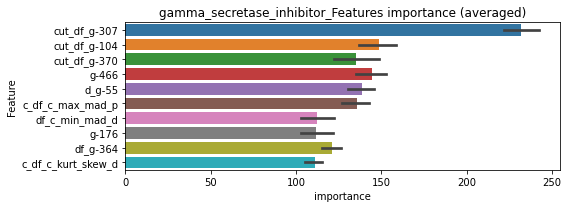

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.00054733	valid_1's binary_logloss: 0.0184323


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000517823	valid_1's binary_logloss: 0.0159327


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000519814	valid_1's binary_logloss: 0.00958038


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


gamma_secretase_inhibitor logloss: 0.014643601578602835


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000769155	valid_1's binary_logloss: 0.0146237
mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0130116	valid_1's binary_logloss: 0.118152
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0127534	valid_1's binary_logloss: 0.116233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00642738	valid_1's binary_logloss: 0.0984684
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00661483	valid_1's binary_logloss: 0.103183


1 / 3, AUC score:0.981, PR-AUC:0.965
y_Threshold: 0.0247209, Threshold: 0.0352059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 448 → Positive_corect_labels: 1353/8153
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.02464, conf_1:0.04577
threshold: 0.0352059, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1353.0/8153, y_label_rate: 0.1659512
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00255209	valid_1's binary_logloss: 0.0672469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00528405	valid_1's binary_logloss: 0.0851589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00440537	valid_1's binary_logloss: 0.0731807
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0306323, Threshold: 0.0352059, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00621504	valid_1's binary_logloss: 0.0685894


Remove_noisy_data: 118 → Positive_corect_labels: 1294.0/8035
p_label_rate: 0.0095429 Vs.target_rate: 0.01117
Num_p_label: 38.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.02816, conf_1:0.04225
threshold: 0.0352059, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1294.0/8035, y_label_rate: 0.1610454
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00294719	valid_1's binary_logloss: 0.053609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00360646	valid_1's binary_logloss: 0.0508871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00348461	valid_1's binary_logloss: 0.043066
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0257309, Threshold: 0.0352059, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00320806	valid_1's binary_logloss: 0.0534985


Remove_noisy_data: 60 → Positive_corect_labels: 1264.0/7975
p_label_rate: 0.0045203 Vs.target_rate: 0.01117
Num_p_label: 18.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.03169, conf_1:0.03873
threshold: 0.0352059, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1264.0/7975, y_label_rate: 0.1584953


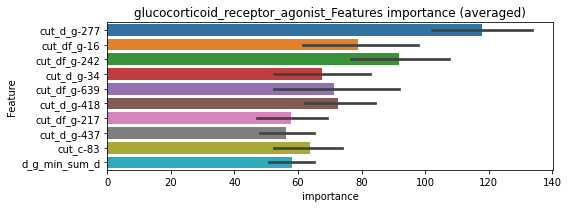

len(train_index) : 5981
len(valid_index) : 1994
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5981
len(valid_index) : 1994
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00356922	valid_1's binary_logloss: 0.0417001
Training until validation scores don't improve for 30 rounds


len(train_index) : 5981
len(valid_index) : 1994
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00442425	valid_1's binary_logloss: 0.0489039
Training until validation scores don't improve for 30 rounds


len(train_index) : 5982
len(valid_index) : 1993
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00228551	valid_1's binary_logloss: 0.0289934
Training until validation scores don't improve for 30 rounds


glucocorticoid_receptor_agonist logloss: 0.04102350730525448
glucocorticoid_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00418781	valid_1's binary_logloss: 0.0444983


glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000248389	valid_1's binary_logloss: 0.00142496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000249975	valid_1's binary_logloss: 0.000680271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000248947	valid_1's binary_logloss: 0.000434563
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010229, Threshold: 0.0030542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0030542, conf_0:0.00214, conf_1:0.00397
Num_p_label: 3.0, Expected: 2.2, Adj_threshold_1: 0.0330542
threshold: 0.0330542, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000250396	valid_1's binary_logloss: 0.000817639


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0330542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00055
Num_p_label: 8.0, Expected: 2.2, Threshold: 0.0330542, conf_0:0.02644, conf_1:0.03967
Num_p_label: 5.0, Expected: 2.2, Adj_threshold_1: 0.0630542
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000247064	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000242808	valid_1's binary_logloss: 0.00100334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000250915	valid_1's binary_logloss: 0.000314465
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0804666, Threshold: 0.0630542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00055
Num_p_label: 5.0, Expected: 2.2, Threshold: 0.0630542, conf_0:0.05675, conf_1:0.06936
threshold: 0.0630542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000243885	valid_1's binary_logloss: 0.000509267


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


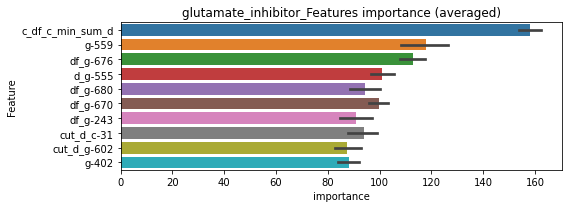

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000247728	valid_1's binary_logloss: 0.000806273
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000246516	valid_1's binary_logloss: 0.000622541
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000250912	valid_1's binary_logloss: 0.000328572
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.000582065615965791


Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000246872	valid_1's binary_logloss: 0.000570575


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000748119	valid_1's binary_logloss: 0.0308259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000784267	valid_1's binary_logloss: 0.0249379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000879338	valid_1's binary_logloss: 0.0263313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000675097	valid_1's binary_logloss: 0.0228912


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0072194, Threshold: 0.1998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1998152, conf_0:0.13987, conf_1:0.25976
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_1: 0.2298152
Num_p_label: 34.0, Expected: 12.4, Adj_threshold_2: 0.2598152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2898152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_4: 0.3198152
Num_p_label: 26.0, Expected: 12.4, Adj_threshold_5: 0.3498152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_6: 0.3798152
Num_p_label: 24.0, Expected: 12.4, Adj_threshold_7: 0.4098152
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_8: 0.4398152
Num_p_label: 19.0, Expected: 12.4, Adj_threshold_9: 0.4698152
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_10: 0.4998152
threshold: 0.4998152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000967325	valid_1's binary_logloss: 0.0388603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000626981	valid_1's binary_logloss: 0.0227668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000682134	valid_1's binary_logloss: 0.0279981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.0005884	valid_1's binary_logloss: 0.0128419


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0410252, Threshold: 0.4998152, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3778
p_label_rate: 0.0145655 Vs.target_rate: 0.00311
Num_p_label: 58.0, Expected: 12.4, Threshold: 0.4998152, conf_0:0.39985, conf_1:0.59978
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_1: 0.5298152
Num_p_label: 50.0, Expected: 12.4, Adj_threshold_2: 0.5598152
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_3: 0.5898152
Num_p_label: 40.0, Expected: 12.4, Adj_threshold_4: 0.6198152
Num_p_label: 37.0, Expected: 12.4, Adj_threshold_5: 0.6498152
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_6: 0.6798152
Num_p_label: 33.0, Expected: 12.4, Adj_threshold_7: 0.7098152
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_8: 0.7398152
Num_p_label: 28.0, Expected: 12.4, Adj_threshold_9: 0.7698152
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_10: 0.7998152
threshold: 0.7998152, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000707584	valid_1's binary_logloss: 0.0140026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00115994	valid_1's binary_logloss: 0.0333995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000572377	valid_1's binary_logloss: 0.0170369
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0474202, Threshold: 0.7998152, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.00100948	valid_1's binary_logloss: 0.0327813


Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3772
p_label_rate: 0.0050226 Vs.target_rate: 0.00311
Num_p_label: 20.0, Expected: 12.4, Threshold: 0.7998152, conf_0:0.71983, conf_1:0.87980
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_1: 0.8298152
threshold: 0.8298152, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3772, y_label_rate: 0.1702015


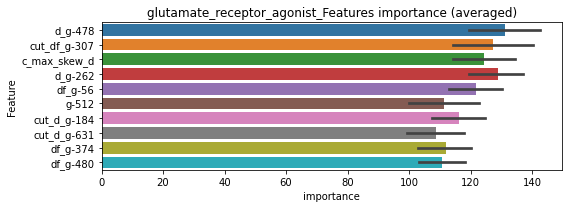

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000815522	valid_1's binary_logloss: 0.0351299


================================= fold 2/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000620752	valid_1's binary_logloss: 0.019779


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00057946	valid_1's binary_logloss: 0.00834104
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.000570961	valid_1's binary_logloss: 0.00830582


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.02304097477068153
glutamate_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000872767	valid_1's binary_logloss: 0.0289462
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0262141	valid_1's binary_logloss: 0.146324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0420672	valid_1's binary_logloss: 0.164336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0366326	valid_1's binary_logloss: 0.165344
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.941, PR-AUC:0.901
y_Threshold: 0.0529652, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 703 → Positive_corect_labels: 1235/7951
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05072, conf_1:0.09420
threshold: 0.0724597, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0341608	valid_1's binary_logloss: 0.158695


positive_y_label: 1235.0/7951, y_label_rate: 0.1553264
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0150592	valid_1's binary_logloss: 0.0895653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00568907	valid_1's binary_logloss: 0.0675858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00555164	valid_1's binary_logloss: 0.066304
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.992, PR-AUC:0.978
y_Threshold: 0.0378085, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 1156.0/7793
p_label_rate: 0.0040181 Vs.target_rate: 0.01541
Num_p_label: 16.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05797, conf_1:0.08695


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0101177	valid_1's binary_logloss: 0.0807115


threshold: 0.0724597, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1156.0/7793, y_label_rate: 0.1483383
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00192937	valid_1's binary_logloss: 0.0318108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00380652	valid_1's binary_logloss: 0.0520352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00162784	valid_1's binary_logloss: 0.0241647
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0235025, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1119.0/7719
p_label_rate: 0.0030136 Vs.target_rate: 0.01541
Num_p_label: 12.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.06521, conf_1:0.07971


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00446201	valid_1's binary_logloss: 0.0527093


threshold: 0.0724597, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1119.0/7719, y_label_rate: 0.1449670


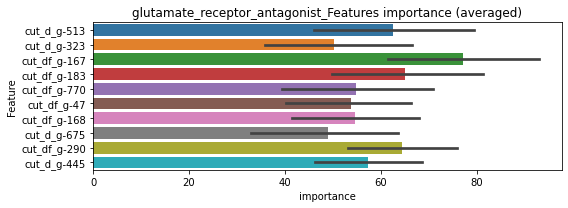

len(train_index) : 5789
len(valid_index) : 1930
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0014549	valid_1's binary_logloss: 0.0219099
Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 3/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00287074	valid_1's binary_logloss: 0.0281664
Training until validation scores don't improve for 30 rounds


len(train_index) : 5790
len(valid_index) : 1929
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00106654	valid_1's binary_logloss: 0.0168191
Training until validation scores don't improve for 30 rounds


glutamate_receptor_antagonist logloss: 0.022964018986127308
glutamate_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00178585	valid_1's binary_logloss: 0.0249617


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000327946	valid_1's binary_logloss: 0.00417093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000333201	valid_1's binary_logloss: 0.0022164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000327027	valid_1's binary_logloss: 0.00150829
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016159, Threshold: 0.0067539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067539, conf_0:0.00473, conf_1:0.00878
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0367539


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000327101	valid_1's binary_logloss: 0.00230603


threshold: 0.0367539, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.0367539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00076
Num_p_label: 25.0, Expected: 3.0, Threshold: 0.0367539, conf_0:0.02940, conf_1:0.04410
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.0667539
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967539
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_3: 0.1267539
threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.00032402	valid_1's binary_logloss: 0.00534353
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000317345	valid_1's binary_logloss: 0.00252017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000319924	valid_1's binary_logloss: 0.00146367
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0184599, Threshold: 0.1267539, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1267539, conf_0:0.11408, conf_1:0.13943
threshold: 0.1267539, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000313418	valid_1's binary_logloss: 0.00292358


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


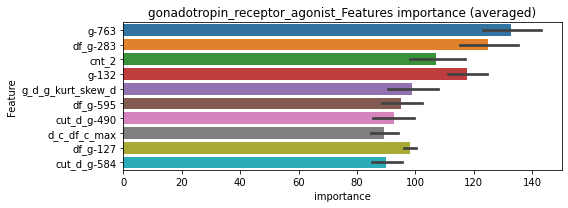

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000337365	valid_1's binary_logloss: 0.00298288


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000332218	valid_1's binary_logloss: 0.00212317
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[798]	training's binary_logloss: 0.000322995	valid_1's binary_logloss: 0.00076979


================================= fold 4/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000313382	valid_1's binary_logloss: 0.00182863


gonadotropin_receptor_agonist logloss: 0.0019261565525640566
gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000555089	valid_1's binary_logloss: 0.0219872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000539349	valid_1's binary_logloss: 0.011397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[766]	training's binary_logloss: 0.000571239	valid_1's binary_logloss: 0.0040697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000571971	valid_1's binary_logloss: 0.0123742


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063958, Threshold: 0.0278116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0278116, conf_0:0.01947, conf_1:0.03616
Num_p_label: 10.0, Expected: 10.0, Adj_threshold_1: 0.0578116
threshold: 0.0578116, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000561291	valid_1's binary_logloss: 0.0227617
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000541903	valid_1's binary_logloss: 0.0118092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000538336	valid_1's binary_logloss: 0.00257977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000518816	valid_1's binary_logloss: 0.0107191


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0455323, Threshold: 0.0578116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0118031 Vs.target_rate: 0.00252
Num_p_label: 47.0, Expected: 10.0, Threshold: 0.0578116, conf_0:0.04625, conf_1:0.06937
Num_p_label: 31.0, Expected: 10.0, Adj_threshold_1: 0.0878116
Num_p_label: 20.0, Expected: 10.0, Adj_threshold_2: 0.1178116
Num_p_label: 13.0, Expected: 10.0, Adj_threshold_3: 0.1478116
threshold: 0.1478116, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000570492	valid_1's binary_logloss: 0.0204135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000544746	valid_1's binary_logloss: 0.0138702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.0011227	valid_1's binary_logloss: 0.0295565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000535343	valid_1's binary_logloss: 0.00896161


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0313879, Threshold: 0.1478116, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00252
Num_p_label: 14.0, Expected: 10.0, Threshold: 0.1478116, conf_0:0.13303, conf_1:0.16259
threshold: 0.1478116, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329


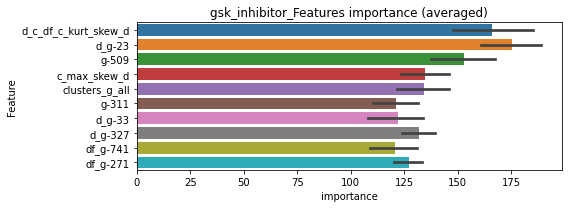

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000614298	valid_1's binary_logloss: 0.0122118


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000659535	valid_1's binary_logloss: 0.0153046


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[953]	training's binary_logloss: 0.000565856	valid_1's binary_logloss: 0.0057899


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000641893	valid_1's binary_logloss: 0.0124911


gsk_inhibitor logloss: 0.011449356799714268
hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000957246	valid_1's binary_logloss: 0.0315015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000622498	valid_1's binary_logloss: 0.0206211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000693036	valid_1's binary_logloss: 0.0157464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000726623	valid_1's binary_logloss: 0.0230161


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063234, Threshold: 0.0158004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0158004, conf_0:0.01106, conf_1:0.02054
Num_p_label: 7.0, Expected: 12.0, Adj_threshold_1: 0.0458004
threshold: 0.0458004, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000794629	valid_1's binary_logloss: 0.0257084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000589509	valid_1's binary_logloss: 0.0168623
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000590846	valid_1's binary_logloss: 0.0172516
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000658313	valid_1's binary_logloss: 0.0248616


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0310752, Threshold: 0.0458004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0077850 Vs.target_rate: 0.00302
Num_p_label: 31.0, Expected: 12.0, Threshold: 0.0458004, conf_0:0.03664, conf_1:0.05496
Num_p_label: 23.0, Expected: 12.0, Adj_threshold_1: 0.0758004
Num_p_label: 16.0, Expected: 12.0, Adj_threshold_2: 0.1058004
threshold: 0.1058004, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000595674	valid_1's binary_logloss: 0.0205123
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000698693	valid_1's binary_logloss: 0.0223995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000872754	valid_1's binary_logloss: 0.0280997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000591137	valid_1's binary_logloss: 0.0110312


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0406768, Threshold: 0.1058004, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, Expected: 12.0, Threshold: 0.1058004, conf_0:0.09522, conf_1:0.11638
threshold: 0.1058004, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


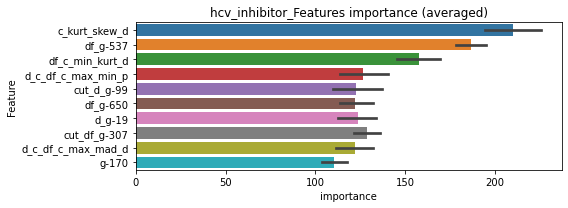

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[724]	training's binary_logloss: 0.000703628	valid_1's binary_logloss: 0.0181727


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000875023	valid_1's binary_logloss: 0.0271851
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000580035	valid_1's binary_logloss: 0.0158106
Early stopping, best iteration is:
[1026]	training's binary_logloss: 0.000575031	valid_1's binary_logloss: 0.015762


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


hcv_inhibitor logloss: 0.025086261869179696
hcv_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000955058	valid_1's binary_logloss: 0.0392192


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00108282	valid_1's binary_logloss: 0.0698277
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00124697	valid_1's binary_logloss: 0.0594699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.00082658	valid_1's binary_logloss: 0.0472337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000881665	valid_1's binary_logloss: 0.0384268


1 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0108545, Threshold: 0.0642322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.0642322, conf_0:0.04496, conf_1:0.08350
Num_p_label: 22.0, Expected: 17.7, Adj_threshold_1: 0.0942322
threshold: 0.0942322, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000883477	valid_1's binary_logloss: 0.0419592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00136786	valid_1's binary_logloss: 0.0816025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[883]	training's binary_logloss: 0.000702617	valid_1's binary_logloss: 0.0347938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[739]	training's binary_logloss: 0.000837821	valid_1's binary_logloss: 0.0339439


2 / 3, AUC score:0.997, PR-AUC:0.995
y_Threshold: 0.0317151, Threshold: 0.0942322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 634.0/3756
p_label_rate: 0.0145655 Vs.target_rate: 0.00445
Num_p_label: 58.0, Expected: 17.7, Threshold: 0.0942322, conf_0:0.07539, conf_1:0.11308
Num_p_label: 44.0, Expected: 17.7, Adj_threshold_1: 0.1242322
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.1542322
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_3: 0.1842322
threshold: 0.1842322, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 634.0/3756, y_label_rate: 0.1687966
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.00110326	valid_1's binary_logloss: 0.0504443
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.00082183	valid_1's binary_logloss: 0.0402732
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000757033	valid_1's binary_logloss: 0.0477086
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000825069	valid_1's binary_logloss: 0.0389934


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0264449, Threshold: 0.1842322, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 624.0/3736
p_label_rate: 0.0065294 Vs.target_rate: 0.00445
Num_p_label: 26.0, Expected: 17.7, Threshold: 0.1842322, conf_0:0.16581, conf_1:0.20266
threshold: 0.1842322, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 624.0/3736, y_label_rate: 0.1670236


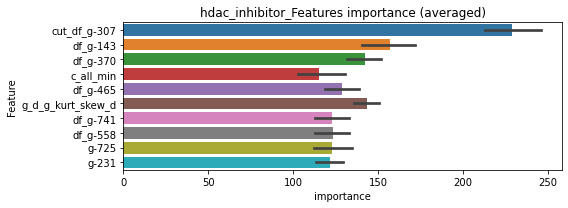

len(train_index) : 2802
len(valid_index) : 934
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000783007	valid_1's binary_logloss: 0.0264412


len(train_index) : 2802
len(valid_index) : 934
================================= fold 2/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 3/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00116613	valid_1's binary_logloss: 0.0317679
Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 4/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00290972	valid_1's binary_logloss: 0.0486907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000832951	valid_1's binary_logloss: 0.0322651


hdac_inhibitor logloss: 0.03479124206896285
hdac_inhibitor is unpredictable(><)!
histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000604738	valid_1's binary_logloss: 0.0308654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000633297	valid_1's binary_logloss: 0.0264239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000599084	valid_1's binary_logloss: 0.00835136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000619545	valid_1's binary_logloss: 0.0160083


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044916, Threshold: 0.0113097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0113097, conf_0:0.00792, conf_1:0.01470
Num_p_label: 6.0, Expected: 9.9, Adj_threshold_1: 0.0413097
threshold: 0.0413097, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000532573	valid_1's binary_logloss: 0.0282637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000671245	valid_1's binary_logloss: 0.0281672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000706465	valid_1's binary_logloss: 0.00830879
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297420, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000772995	valid_1's binary_logloss: 0.0177459


p_label_rate: 0.0037670 Vs.target_rate: 0.00248
Num_p_label: 15.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03305, conf_1:0.04957
threshold: 0.0413097, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000648265	valid_1's binary_logloss: 0.021099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000596982	valid_1's binary_logloss: 0.0143308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000771285	valid_1's binary_logloss: 0.0199072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000571399	valid_1's binary_logloss: 0.0243474


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0282593, Threshold: 0.0413097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3796
p_label_rate: 0.0032647 Vs.target_rate: 0.00248
Num_p_label: 13.0, Expected: 9.9, Threshold: 0.0413097, conf_0:0.03718, conf_1:0.04544
threshold: 0.0413097, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3796, y_label_rate: 0.1714963


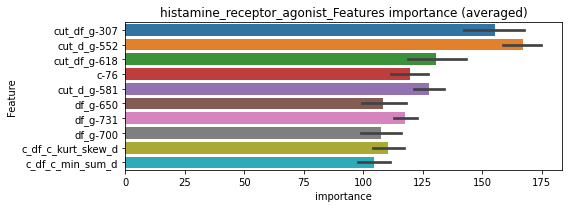

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000604003	valid_1's binary_logloss: 0.0181342


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000756127	valid_1's binary_logloss: 0.0189122


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000709301	valid_1's binary_logloss: 0.015535


================================= fold 4/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.00062248	valid_1's binary_logloss: 0.0121307


histamine_receptor_agonist logloss: 0.016178026919016063


mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0155574	valid_1's binary_logloss: 0.114737
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0207249	valid_1's binary_logloss: 0.123429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0123159	valid_1's binary_logloss: 0.104855
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.972, PR-AUC:0.950
y_Threshold: 0.0291272, Threshold: 0.0366783, pos_neg_ratio: 0.8000000
Remove_noisy_data: 481 → Positive_corect_labels: 1201/7383
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.02567, conf_1:0.04768


Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0153253	valid_1's binary_logloss: 0.127358


threshold: 0.0366783, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1201.0/7383, y_label_rate: 0.1626710
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00465499	valid_1's binary_logloss: 0.0605981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0088713	valid_1's binary_logloss: 0.0986709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00377879	valid_1's binary_logloss: 0.0491507
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0270281, Threshold: 0.0366783, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0041937	valid_1's binary_logloss: 0.0465137


Remove_noisy_data: 90 → Positive_corect_labels: 1156.0/7293
p_label_rate: 0.0030136 Vs.target_rate: 0.01012
Num_p_label: 12.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.02934, conf_1:0.04401
threshold: 0.0366783, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1156.0/7293, y_label_rate: 0.1585082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00376349	valid_1's binary_logloss: 0.0418424
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00345681	valid_1's binary_logloss: 0.0455478
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00309327	valid_1's binary_logloss: 0.0370165
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0259301, Threshold: 0.0366783, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00315086	valid_1's binary_logloss: 0.0444768


Remove_noisy_data: 44 → Positive_corect_labels: 1134.0/7249
p_label_rate: 0.0020090 Vs.target_rate: 0.01012
Num_p_label: 8.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.03301, conf_1:0.04035
threshold: 0.0366783, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1134.0/7249, y_label_rate: 0.1564354


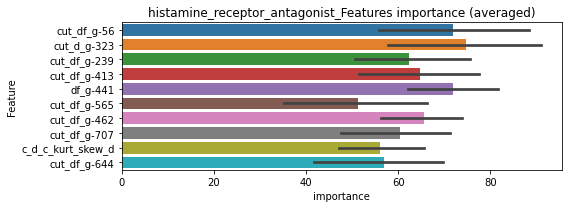

len(train_index) : 5436
len(valid_index) : 1813
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00361635	valid_1's binary_logloss: 0.0369145
Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[147]	training's binary_logloss: 0.00432697	valid_1's binary_logloss: 0.0354367
Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 4/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00164819	valid_1's binary_logloss: 0.0262386
Training until validation scores don't improve for 30 rounds


histamine_receptor_antagonist logloss: 0.03449567962529882
histamine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[142]	training's binary_logloss: 0.00446827	valid_1's binary_logloss: 0.0393916


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000369455	valid_1's binary_logloss: 0.00114519
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377085	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000375244	valid_1's binary_logloss: 0.000933239
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021060, Threshold: 0.0192562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0192562, conf_0:0.01348, conf_1:0.02503


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000366755	valid_1's binary_logloss: 0.00326198


Num_p_label: 26.0, Expected: 4.0, Adj_threshold_1: 0.0492562
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_2: 0.0792562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_3: 0.1092562
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_4: 0.1392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1692562
Num_p_label: 10.0, Expected: 4.0, Adj_threshold_6: 0.1992562
threshold: 0.1992562, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.1992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.1992562, conf_0:0.15940, conf_1:0.23911
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_1: 0.2292562
Num_p_label: 23.0, Expected: 4.0, Adj_threshold_2: 0.2592562
Num_p_label: 22.0, Expected: 4.0, Adj_threshold_3: 0.2892562
Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.3192562
Num_p_label: 18.0, Expected: 4.0, Adj_threshold_5: 0.3492562
Num_p_label: 17.0, Expected: 4.0, Adj_threshold_6: 0.3792562
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_7: 0.4092562
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_8: 0.4392562
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_9: 0.4692562
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_10: 0.4992562
threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_labe

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000361811	valid_1's binary_logloss: 0.00101115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00035995	valid_1's binary_logloss: 0.00230201
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000362215	valid_1's binary_logloss: 0.000904991
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1091735, Threshold: 0.4992562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.4992562, conf_0:0.44933, conf_1:0.54918


Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000367631	valid_1's binary_logloss: 0.00196054


threshold: 0.4992562, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


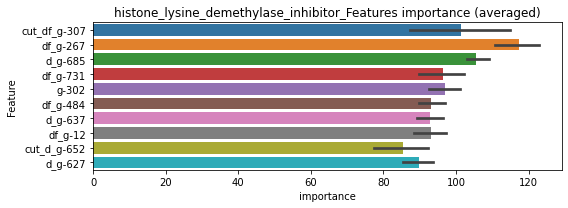

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[924]	training's binary_logloss: 0.000364737	valid_1's binary_logloss: 0.00118363


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.000371686	valid_1's binary_logloss: 0.0026746


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000375721	valid_1's binary_logloss: 0.000804619


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[872]	training's binary_logloss: 0.000368782	valid_1's binary_logloss: 0.0018564


histone_lysine_demethylase_inhibitor logloss: 0.0016297543029701632
histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000423709	valid_1's binary_logloss: 0.00730819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000429247	valid_1's binary_logloss: 0.00519131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000405989	valid_1's binary_logloss: 0.00108827
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0027884, Threshold: 0.0072024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000449703	valid_1's binary_logloss: 0.0151647


p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0072024, conf_0:0.00504, conf_1:0.00936
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0372024
threshold: 0.0372024, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.02976, conf_1:0.04464
threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000383789	valid_1's binary_logloss: 0.00159495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000402049	valid_1's binary_logloss: 0.00633584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000399196	valid_1's binary_logloss: 0.00462132
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156337, Threshold: 0.0372024, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00134
Num_p_label: 13.0, Expected: 5.4, Threshold: 0.0372024, conf_0:0.03348, conf_1:0.04092


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000420781	valid_1's binary_logloss: 0.00948249


threshold: 0.0372024, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


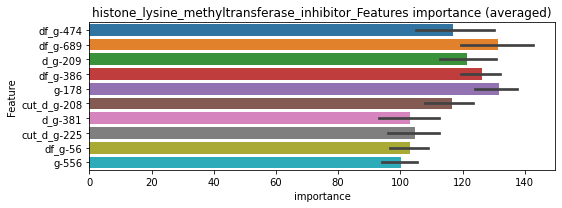

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387513	valid_1's binary_logloss: 0.00172774
Early stopping, best iteration is:
[1023]	training's binary_logloss: 0.000386079	valid_1's binary_logloss: 0.00172408


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000516587	valid_1's binary_logloss: 0.00575498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000400275	valid_1's binary_logloss: 0.00395225


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[778]	training's binary_logloss: 0.000418503	valid_1's binary_logloss: 0.00983046


histone_lysine_methyltransferase_inhibitor logloss: 0.005315461979958494
hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00111064	valid_1's binary_logloss: 0.0436643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[787]	training's binary_logloss: 0.000590017	valid_1's binary_logloss: 0.011604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000605004	valid_1's binary_logloss: 0.0112544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000600683	valid_1's binary_logloss: 0.0158191


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0056001, Threshold: 0.0874065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0874065, conf_0:0.06118, conf_1:0.11363
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_1: 0.1174065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_2: 0.1474065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_3: 0.1774065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_4: 0.2074065
threshold: 0.2074065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.00129316	valid_1's binary_logloss: 0.0353438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000577296	valid_1's binary_logloss: 0.0109891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000578167	valid_1's binary_logloss: 0.0177745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000576074	valid_1's binary_logloss: 0.020948


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0426367, Threshold: 0.2074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0138122 Vs.target_rate: 0.00302
Num_p_label: 55.0, Expected: 12.0, Threshold: 0.2074065, conf_0:0.16593, conf_1:0.24889
Num_p_label: 49.0, Expected: 12.0, Adj_threshold_1: 0.2374065
Num_p_label: 45.0, Expected: 12.0, Adj_threshold_2: 0.2674065
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_3: 0.2974065
Num_p_label: 37.0, Expected: 12.0, Adj_threshold_4: 0.3274065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_5: 0.3574065
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_6: 0.3874065
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_7: 0.4174065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_8: 0.4474065
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_9: 0.4774065
Num_p_label: 25.0, Expected: 12.0, Adj_threshold_10: 0.5074065
threshold: 0.5074065, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000634881	valid_1's binary_logloss: 0.0127883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000581855	valid_1's binary_logloss: 0.0249218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000587019	valid_1's binary_logloss: 0.0249648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.00066412	valid_1's binary_logloss: 0.025552


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404632, Threshold: 0.5074065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0080362 Vs.target_rate: 0.00302
Num_p_label: 32.0, Expected: 12.0, Threshold: 0.5074065, conf_0:0.45667, conf_1:0.55815
Num_p_label: 32.0, Expected: 12.0, Adj_threshold_1: 0.5374065
Num_p_label: 31.0, Expected: 12.0, Adj_threshold_2: 0.5674065
Num_p_label: 29.0, Expected: 12.0, Adj_threshold_3: 0.5974065
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.6274065
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_5: 0.6574065
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_6: 0.6874065
Num_p_label: 21.0, Expected: 12.0, Adj_threshold_7: 0.7174065
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_8: 0.7474065
Num_p_label: 18.0, Expected: 12.0, Adj_threshold_9: 0.7774065
threshold: 0.7774065, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


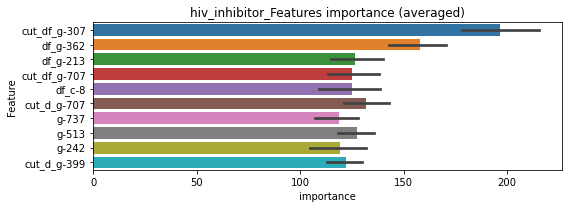

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[757]	training's binary_logloss: 0.000667354	valid_1's binary_logloss: 0.0235465


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000707189	valid_1's binary_logloss: 0.0157735


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000590124	valid_1's binary_logloss: 0.0249327


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000635948	valid_1's binary_logloss: 0.0187678


hiv_inhibitor logloss: 0.02075565034793047
hiv_inhibitor is unpredictable(><)!


mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00547042	valid_1's binary_logloss: 0.0965834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00556283	valid_1's binary_logloss: 0.0930006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0150776	valid_1's binary_logloss: 0.12457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00728319	valid_1's binary_logloss: 0.103577


1 / 3, AUC score:0.985, PR-AUC:0.970
y_Threshold: 0.0235178, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 436 → Positive_corect_labels: 1410/8444
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.02379, conf_1:0.04418
threshold: 0.0339845, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1410.0/8444, y_label_rate: 0.1669825
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00650684	valid_1's binary_logloss: 0.084643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00808523	valid_1's binary_logloss: 0.0890049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0043521	valid_1's binary_logloss: 0.0687647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00560656	valid_1's binary_logloss: 0.0807836


2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0319510, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1350.0/8324
p_label_rate: 0.0102963 Vs.target_rate: 0.01188
Num_p_label: 41.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.02719, conf_1:0.04078
threshold: 0.0339845, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1350.0/8324, y_label_rate: 0.1621816
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00299175	valid_1's binary_logloss: 0.0613835
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00325603	valid_1's binary_logloss: 0.0633051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00258864	valid_1's binary_logloss: 0.0514748
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00286556	valid_1's binary_logloss: 0.0523376


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0246851, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1315.0/8254
p_label_rate: 0.0037670 Vs.target_rate: 0.01188
Num_p_label: 15.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.03059, conf_1:0.03738
threshold: 0.0339845, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 1315.0/8254, y_label_rate: 0.1593167


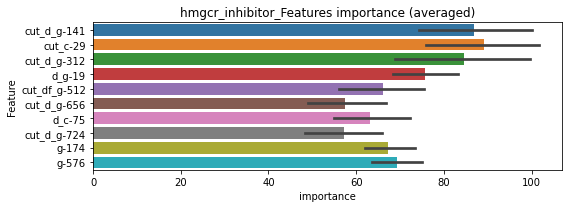

len(train_index) : 6190
len(valid_index) : 2064
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6190
len(valid_index) : 2064
================================= fold 2/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00325433	valid_1's binary_logloss: 0.0511728
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2063
================================= fold 3/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00352596	valid_1's binary_logloss: 0.0553417
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2063
================================= fold 4/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00481274	valid_1's binary_logloss: 0.0506196
Training until validation scores don't improve for 30 rounds


hmgcr_inhibitor logloss: 0.05024751409446212
hmgcr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[227]	training's binary_logloss: 0.00287622	valid_1's binary_logloss: 0.0438531


hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00157964	valid_1's binary_logloss: 0.0575937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000961511	valid_1's binary_logloss: 0.0308107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.00101608	valid_1's binary_logloss: 0.0249343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000970224	valid_1's binary_logloss: 0.0403911


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0139076, Threshold: 0.1723806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3779
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.1723806, conf_0:0.12067, conf_1:0.22409
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_1: 0.2023806
Num_p_label: 29.0, Expected: 15.6, Adj_threshold_2: 0.2323806
Num_p_label: 25.0, Expected: 15.6, Adj_threshold_3: 0.2623806
Num_p_label: 18.0, Expected: 15.6, Adj_threshold_4: 0.2923806
threshold: 0.2923806, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3779, y_label_rate: 0.1709447
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000939574	valid_1's binary_logloss: 0.0421514
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.00108037	valid_1's binary_logloss: 0.0402544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[897]	training's binary_logloss: 0.000668317	valid_1's binary_logloss: 0.0119919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00104942	valid_1's binary_logloss: 0.0425674


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0684816, Threshold: 0.2923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3753
p_label_rate: 0.0193370 Vs.target_rate: 0.00391
Num_p_label: 77.0, Expected: 15.6, Threshold: 0.2923806, conf_0:0.23390, conf_1:0.35086
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_1: 0.3223806
Num_p_label: 65.0, Expected: 15.6, Adj_threshold_2: 0.3523806
Num_p_label: 59.0, Expected: 15.6, Adj_threshold_3: 0.3823806
Num_p_label: 53.0, Expected: 15.6, Adj_threshold_4: 0.4123806
Num_p_label: 45.0, Expected: 15.6, Adj_threshold_5: 0.4423806
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_6: 0.4723806
Num_p_label: 34.0, Expected: 15.6, Adj_threshold_7: 0.5023806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_8: 0.5323806
Num_p_label: 32.0, Expected: 15.6, Adj_threshold_9: 0.5623806
Num_p_label: 26.0, Expected: 15.6, Adj_threshold_10: 0.5923806
threshold: 0.5923806, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000924441	valid_1's binary_logloss: 0.039587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000649254	valid_1's binary_logloss: 0.0131381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000749959	valid_1's binary_logloss: 0.0194639
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000660678	valid_1's binary_logloss: 0.0191177


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.1216655, Threshold: 0.5923806, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 626.0/3739
p_label_rate: 0.0110497 Vs.target_rate: 0.00391
Num_p_label: 44.0, Expected: 15.6, Threshold: 0.5923806, conf_0:0.53314, conf_1:0.65162
Num_p_label: 39.0, Expected: 15.6, Adj_threshold_1: 0.6223806
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_2: 0.6523806
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_3: 0.6823806
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_4: 0.7123806
Num_p_label: 20.0, Expected: 15.6, Adj_threshold_5: 0.7423806
threshold: 0.7423806, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 626.0/3739, y_label_rate: 0.1674244


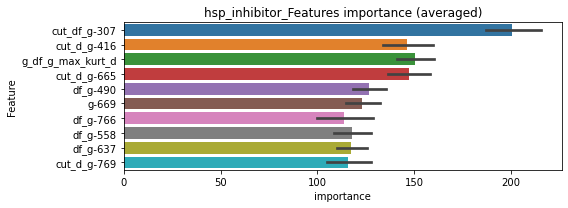

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 2/4 hsp_inhibitor=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00106763	valid_1's binary_logloss: 0.0220856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[940]	training's binary_logloss: 0.000682735	valid_1's binary_logloss: 0.0276854


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000763666	valid_1's binary_logloss: 0.0175577


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00090336	valid_1's binary_logloss: 0.0234489


hsp_inhibitor logloss: 0.022694199768777172
hsp_inhibitor is unpredictable(><)!
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000461464	valid_1's binary_logloss: 0.022259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000443908	valid_1's binary_logloss: 0.00797923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000462339	valid_1's binary_logloss: 0.00192685
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030040, Threshold: 0.0204141, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.0004724	valid_1's binary_logloss: 0.0131745


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0204141, conf_0:0.01429, conf_1:0.02654
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.0504141
threshold: 0.0504141, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000454279	valid_1's binary_logloss: 0.0200194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000460455	valid_1's binary_logloss: 0.00723977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000444238	valid_1's binary_logloss: 0.00171765
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0291609, Threshold: 0.0504141, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000458993	valid_1's binary_logloss: 0.0122354


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0145655 Vs.target_rate: 0.00155
Num_p_label: 58.0, Expected: 6.2, Threshold: 0.0504141, conf_0:0.04033, conf_1:0.06050
Num_p_label: 42.0, Expected: 6.2, Adj_threshold_1: 0.0804141
Num_p_label: 26.0, Expected: 6.2, Adj_threshold_2: 0.1104141
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_3: 0.1404141
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_4: 0.1704141
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_5: 0.2004141
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000499746	valid_1's binary_logloss: 0.00745819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000435578	valid_1's binary_logloss: 0.00777534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000456223	valid_1's binary_logloss: 0.0113402
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381314, Threshold: 0.2004141, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000436998	valid_1's binary_logloss: 0.0112084


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0037670 Vs.target_rate: 0.00155
Num_p_label: 15.0, Expected: 6.2, Threshold: 0.2004141, conf_0:0.18037, conf_1:0.22046
threshold: 0.2004141, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


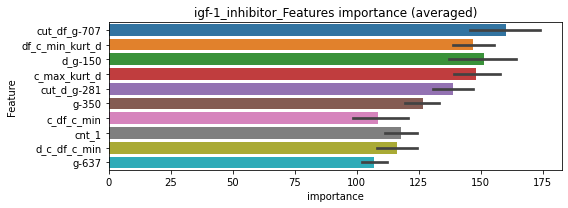

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[751]	training's binary_logloss: 0.000473992	valid_1's binary_logloss: 0.00778153


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[809]	training's binary_logloss: 0.000463244	valid_1's binary_logloss: 0.00547558


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000484754	valid_1's binary_logloss: 0.0106639


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000513901	valid_1's binary_logloss: 0.0108399


igf-1_inhibitor logloss: 0.008691635123920556
ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000356808	valid_1's binary_logloss: 0.00853836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000364624	valid_1's binary_logloss: 0.00178726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000357049	valid_1's binary_logloss: 0.000996381
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028853, Threshold: 0.0127299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0127299, conf_0:0.00891, conf_1:0.01655


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.00036891	valid_1's binary_logloss: 0.00152641


Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0427299
threshold: 0.0427299, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.0427299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


p_label_rate: 0.0087896 Vs.target_rate: 0.00126
Num_p_label: 35.0, Expected: 5.0, Threshold: 0.0427299, conf_0:0.03418, conf_1:0.05128
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_1: 0.0727299
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_2: 0.1027299
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000371111	valid_1's binary_logloss: 0.00787894
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000343539	valid_1's binary_logloss: 0.00139244
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00034955	valid_1's binary_logloss: 0.00093368
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0286056, Threshold: 0.1027299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000346936	valid_1's binary_logloss: 0.00116194


p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1027299, conf_0:0.09246, conf_1:0.11300
threshold: 0.1027299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


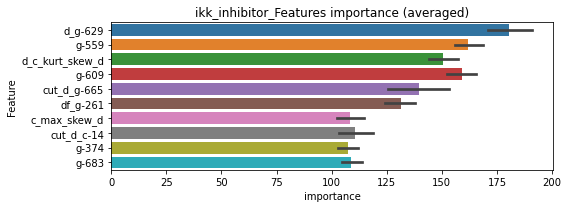

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000376147	valid_1's binary_logloss: 0.00700553


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000347923	valid_1's binary_logloss: 0.00139046
Early stopping, best iteration is:
[1019]	training's binary_logloss: 0.000346887	valid_1's binary_logloss: 0.00138725


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[962]	training's binary_logloss: 0.000352297	valid_1's binary_logloss: 0.000907076


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[949]	training's binary_logloss: 0.000352782	valid_1's binary_logloss: 0.00118517


ikk_inhibitor logloss: 0.002621365771451567
imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000371479	valid_1's binary_logloss: 0.00385573
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000352784	valid_1's binary_logloss: 0.00743804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000368427	valid_1's binary_logloss: 0.00126785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000378856	valid_1's binary_logloss: 0.00331557


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024106, Threshold: 0.0107881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0107881, conf_0:0.00755, conf_1:0.01402
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_1: 0.0407881
threshold: 0.0407881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398864, Threshold: 0.0407881, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0082873 Vs.target_rate: 0.00130
Num_p_label: 33.0, Expected: 5.2, Threshold: 0.0407881, conf_0:0.03263, conf_1:0.04895
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_1: 0.0707881
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_2: 0.1007881
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_3: 0.1307881
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000357832	valid_1's binary_logloss: 0.00339234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000351601	valid_1's binary_logloss: 0.00854784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000356105	valid_1's binary_logloss: 0.000884964
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000365077	valid_1's binary_logloss: 0.00246141


y_Threshold: 0.0398864, Threshold: 0.1307881, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00130
Num_p_label: 10.0, Expected: 5.2, Threshold: 0.1307881, conf_0:0.11771, conf_1:0.14387
threshold: 0.1307881, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


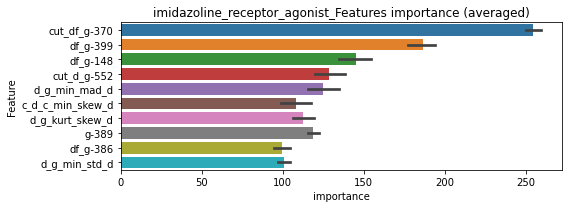

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000363451	valid_1's binary_logloss: 0.00261703


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[815]	training's binary_logloss: 0.000361536	valid_1's binary_logloss: 0.00956244


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[910]	training's binary_logloss: 0.000359407	valid_1's binary_logloss: 0.0010195


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000360354	valid_1's binary_logloss: 0.00182164


imidazoline_receptor_agonist logloss: 0.0037552057287787025
immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00102415	valid_1's binary_logloss: 0.0316518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000952067	valid_1's binary_logloss: 0.0331887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000624996	valid_1's binary_logloss: 0.02345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000635797	valid_1's binary_logloss: 0.0324048


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0067707, Threshold: 0.0168916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 653/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0168916, conf_0:0.01182, conf_1:0.02196
Num_p_label: 7.0, Expected: 12.2, Adj_threshold_1: 0.0468916
threshold: 0.0468916, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3794, y_label_rate: 0.1721139
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000586372	valid_1's binary_logloss: 0.0258691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.000614354	valid_1's binary_logloss: 0.0234314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00105897	valid_1's binary_logloss: 0.0389975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[816]	training's binary_logloss: 0.000585003	valid_1's binary_logloss: 0.019886


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0203115, Threshold: 0.0468916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3784
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.0468916, conf_0:0.03751, conf_1:0.05627
threshold: 0.0468916, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 648.0/3784, y_label_rate: 0.1712474
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000610165	valid_1's binary_logloss: 0.0212605
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000640348	valid_1's binary_logloss: 0.0411432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000932484	valid_1's binary_logloss: 0.0298932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[768]	training's binary_logloss: 0.000601911	valid_1's binary_logloss: 0.0114137


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0181855, Threshold: 0.0468916, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 644.0/3776
p_label_rate: 0.0037670 Vs.target_rate: 0.00307
Num_p_label: 15.0, Expected: 12.2, Threshold: 0.0468916, conf_0:0.04220, conf_1:0.05158
threshold: 0.0468916, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3776, y_label_rate: 0.1705508


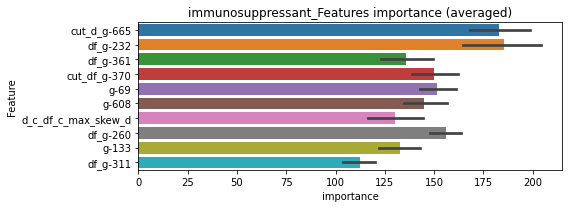

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.0027621	valid_1's binary_logloss: 0.0546478
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00170672	valid_1's binary_logloss: 0.0431088
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 immunosuppressant=================================


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0010595	valid_1's binary_logloss: 0.0132189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000949292	valid_1's binary_logloss: 0.0174149


immunosuppressant logloss: 0.03209758554809233
immunosuppressant is unpredictable(><)!
insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000479429	valid_1's binary_logloss: 0.00954221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000413927	valid_1's binary_logloss: 0.00428657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000418688	valid_1's binary_logloss: 0.00139069
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000404523	valid_1's binary_logloss: 0.00630081


y_Threshold: 0.0025381, Threshold: 0.0105076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0105076, conf_0:0.00736, conf_1:0.01366
Num_p_label: 9.0, Expected: 5.0, Adj_threshold_1: 0.0405076
threshold: 0.0405076, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.0405076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


p_label_rate: 0.0070316 Vs.target_rate: 0.00126
Num_p_label: 28.0, Expected: 5.0, Threshold: 0.0405076, conf_0:0.03241, conf_1:0.04861
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_1: 0.0705076
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_2: 0.1005076
Num_p_label: 11.0, Expected: 5.0, Adj_threshold_3: 0.1305076
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000420126	valid_1's binary_logloss: 0.00980984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000432715	valid_1's binary_logloss: 0.003686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000401416	valid_1's binary_logloss: 0.00103849
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0381122, Threshold: 0.1305076, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3806


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00041442	valid_1's binary_logloss: 0.00629626


p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.1305076, conf_0:0.11746, conf_1:0.14356
threshold: 0.1305076, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3806, y_label_rate: 0.1723594


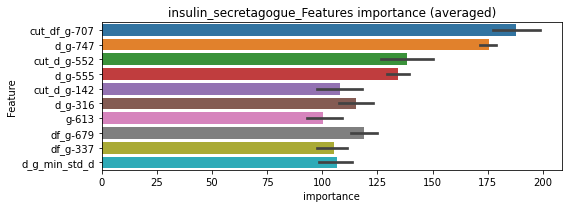

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952


Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000466652	valid_1's binary_logloss: 0.00789134


================================= fold 2/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000414485	valid_1's binary_logloss: 0.00353216


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[800]	training's binary_logloss: 0.000425263	valid_1's binary_logloss: 0.0010307


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.004469100249643898


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.0004775	valid_1's binary_logloss: 0.00541843


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000494077	valid_1's binary_logloss: 0.0120158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00049087	valid_1's binary_logloss: 0.00510336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000524045	valid_1's binary_logloss: 0.0166681
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000600014	valid_1's binary_logloss: 0.0268047


y_Threshold: 0.0038190, Threshold: 0.0091664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0091664, conf_0:0.00642, conf_1:0.01192
Num_p_label: 1.0, Expected: 8.5, Adj_threshold_1: 0.0391664
threshold: 0.0391664, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000529765	valid_1's binary_logloss: 0.0129686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.00048324	valid_1's binary_logloss: 0.0049315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[652]	training's binary_logloss: 0.000506197	valid_1's binary_logloss: 0.0146937
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0217402, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0030136 Vs.target_rate: 0.00214
Num_p_label: 12.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03133, conf_1:0.04700


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000872561	valid_1's binary_logloss: 0.0261283


threshold: 0.0391664, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000478184	valid_1's binary_logloss: 0.0102039
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000487196	valid_1's binary_logloss: 0.0114558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000504616	valid_1's binary_logloss: 0.0138751
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000536933	valid_1's binary_logloss: 0.0073301


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0298497, Threshold: 0.0391664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0035158 Vs.target_rate: 0.00214
Num_p_label: 14.0, Expected: 8.5, Threshold: 0.0391664, conf_0:0.03525, conf_1:0.04308
threshold: 0.0391664, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


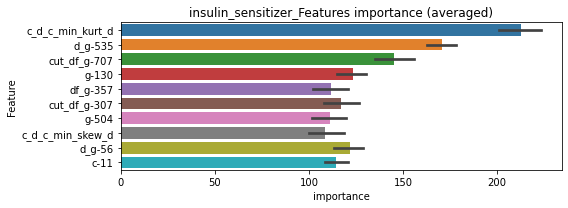

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.00055515	valid_1's binary_logloss: 0.0111912


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000516446	valid_1's binary_logloss: 0.0120363


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000554067	valid_1's binary_logloss: 0.0154178


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.00048992	valid_1's binary_logloss: 0.00827415


insulin_sensitizer logloss: 0.011731076002542425
integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000495583	valid_1's binary_logloss: 0.0106609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000448253	valid_1's binary_logloss: 0.00641679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[735]	training's binary_logloss: 0.000463825	valid_1's binary_logloss: 0.0038384
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000451215	valid_1's binary_logloss: 0.00760444


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044229, Threshold: 0.0148987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0148987, conf_0:0.01043, conf_1:0.01937
Num_p_label: 6.0, Expected: 7.0, Adj_threshold_1: 0.0448987
threshold: 0.0448987, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


y_Threshold: 0.0252438, Threshold: 0.0448987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0075339 Vs.target_rate: 0.00176
Num_p_label: 30.0, Expected: 7.0, Threshold: 0.0448987, conf_0:0.03592, conf_1:0.05388
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0748987
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000456261	valid_1's binary_logloss: 0.0108265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000441259	valid_1's binary_logloss: 0.00467586
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000450989	valid_1's binary_logloss: 0.00274643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000508539	valid_1's binary_logloss: 0.00770409


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252438, Threshold: 0.0748987, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0030136 Vs.target_rate: 0.00176
Num_p_label: 12.0, Expected: 7.0, Threshold: 0.0748987, conf_0:0.06741, conf_1:0.08239
threshold: 0.0748987, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3805, y_label_rate: 0.1724047


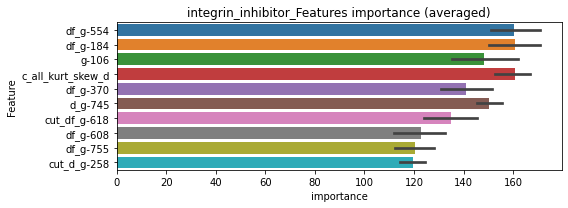

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.00050383	valid_1's binary_logloss: 0.00905334


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000450453	valid_1's binary_logloss: 0.00505007


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[938]	training's binary_logloss: 0.000455696	valid_1's binary_logloss: 0.00310913


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000443664	valid_1's binary_logloss: 0.00719472


integrin_inhibitor logloss: 0.006102590634322107
jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00112883	valid_1's binary_logloss: 0.0524191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.00124061	valid_1's binary_logloss: 0.0413063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000925519	valid_1's binary_logloss: 0.0184325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.00102445	valid_1's binary_logloss: 0.0353317


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0109471, Threshold: 0.1278113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3788
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.1278113, conf_0:0.08947, conf_1:0.16615
Num_p_label: 35.0, Expected: 15.4, Adj_threshold_1: 0.1578113
Num_p_label: 32.0, Expected: 15.4, Adj_threshold_2: 0.1878113
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_3: 0.2178113
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_4: 0.2478113
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_5: 0.2778113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_6: 0.3078113
threshold: 0.3078113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 649.0/3788, y_label_rate: 0.1713305
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00100039	valid_1's binary_logloss: 0.0406916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[776]	training's binary_logloss: 0.00071407	valid_1's binary_logloss: 0.0245631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000943473	valid_1's binary_logloss: 0.0308705
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000674393	valid_1's binary_logloss: 0.0233685


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0436618, Threshold: 0.3078113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 645.0/3780
p_label_rate: 0.0090407 Vs.target_rate: 0.00386
Num_p_label: 36.0, Expected: 15.4, Threshold: 0.3078113, conf_0:0.24625, conf_1:0.36937
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.3378113
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_2: 0.3678113
Num_p_label: 31.0, Expected: 15.4, Adj_threshold_3: 0.3978113
Num_p_label: 28.0, Expected: 15.4, Adj_threshold_4: 0.4278113
Num_p_label: 25.0, Expected: 15.4, Adj_threshold_5: 0.4578113
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_6: 0.4878113
Num_p_label: 22.0, Expected: 15.4, Adj_threshold_7: 0.5178113
threshold: 0.5178113, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 645.0/3780, y_label_rate: 0.1706349
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000825657	valid_1's binary_logloss: 0.0245818
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.00104485	valid_1's binary_logloss: 0.0417498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.000735695	valid_1's binary_logloss: 0.0232221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000799638	valid_1's binary_logloss: 0.0308959


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0304182, Threshold: 0.5178113, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0060271 Vs.target_rate: 0.00386
Num_p_label: 24.0, Expected: 15.4, Threshold: 0.5178113, conf_0:0.46603, conf_1:0.56959
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_1: 0.5478113
threshold: 0.5478113, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 640.0/3770, y_label_rate: 0.1697613


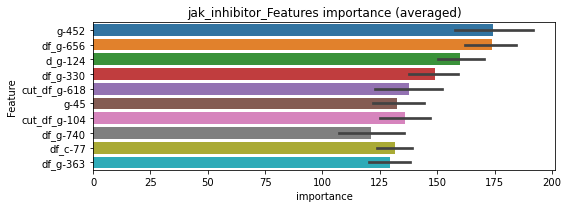

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000842949	valid_1's binary_logloss: 0.0239968


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00176851	valid_1's binary_logloss: 0.0342427
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00075201	valid_1's binary_logloss: 0.0132948


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000993721	valid_1's binary_logloss: 0.0328022


jak_inhibitor logloss: 0.026085733939247423
jak_inhibitor is unpredictable(><)!


mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.0110811	valid_1's binary_logloss: 0.116805
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0171908	valid_1's binary_logloss: 0.128502
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0127308	valid_1's binary_logloss: 0.109005
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.978, PR-AUC:0.956


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.0101067	valid_1's binary_logloss: 0.110762


y_Threshold: 0.0308294, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 478 → Positive_corect_labels: 1267/7737
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.03404, conf_1:0.06322
threshold: 0.0486298, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1267.0/7737, y_label_rate: 0.1637586
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00722781	valid_1's binary_logloss: 0.0809809
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00722375	valid_1's binary_logloss: 0.0854218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00272114	valid_1's binary_logloss: 0.0548469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00414272	valid_1's binary_logloss: 0.0805494


2 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0298570, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 1214.0/7631
p_label_rate: 0.0045203 Vs.target_rate: 0.01146
Num_p_label: 18.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.03890, conf_1:0.05836
threshold: 0.0486298, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1214.0/7631, y_label_rate: 0.1590879
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00516818	valid_1's binary_logloss: 0.060612
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00275262	valid_1's binary_logloss: 0.0486057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00510292	valid_1's binary_logloss: 0.0566383
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00240705	valid_1's binary_logloss: 0.0403787


3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0291423, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1185.0/7573
p_label_rate: 0.0057760 Vs.target_rate: 0.01146
Num_p_label: 23.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.04377, conf_1:0.05349
threshold: 0.0486298, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 1185.0/7573, y_label_rate: 0.1564770


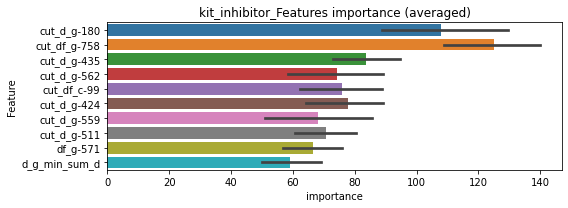

len(train_index) : 5679
len(valid_index) : 1894
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 2/4 kit_inhibitor=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00344518	valid_1's binary_logloss: 0.0513241
Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 3/4 kit_inhibitor=================================


Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00400487	valid_1's binary_logloss: 0.0498293
Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00237225	valid_1's binary_logloss: 0.0320494
Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.04342943993253507
kit_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00334269	valid_1's binary_logloss: 0.0405108


laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000153357	valid_1's binary_logloss: 0.000194661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000151233	valid_1's binary_logloss: 0.00126174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000151549	valid_1's binary_logloss: 0.000181455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004303, Threshold: 0.0012664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012664, conf_0:0.00089, conf_1:0.00165
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0312664
threshold: 0.0312664, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000153112	valid_1's binary_logloss: 0.000202879


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0312664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0312664, conf_0:0.02501, conf_1:0.03752
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0612664
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000143915	valid_1's binary_logloss: 0.000177879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000143109	valid_1's binary_logloss: 0.00147655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000145595	valid_1's binary_logloss: 0.000154601
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0721841, Threshold: 0.0612664, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0612664, conf_0:0.05514, conf_1:0.06739
threshold: 0.0612664, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000143818	valid_1's binary_logloss: 0.000184857


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


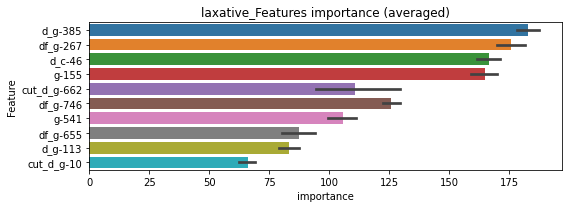

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148445	valid_1's binary_logloss: 0.000177605


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1200]	training's binary_logloss: 0.000145238	valid_1's binary_logloss: 0.000173727
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000147615	valid_1's binary_logloss: 0.000842546
Early stopping, best iteration is:
[1072]	training's binary_logloss: 0.000145993	valid_1's binary_logloss: 0.000838703


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149318	valid_1's binary_logloss: 0.000159575


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1139]	training's binary_logloss: 0.000146644	valid_1's binary_logloss: 0.000156671
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149582	valid_1's binary_logloss: 0.000190016


laxative logloss: 0.00033825907911229185


Early stopping, best iteration is:
[1372]	training's binary_logloss: 0.000144409	valid_1's binary_logloss: 0.000184108


leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000160577	valid_1's binary_logloss: 0.000536264
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000159342	valid_1's binary_logloss: 0.00552908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000161386	valid_1's binary_logloss: 0.000233207
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005549, Threshold: 0.0012812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0012812, conf_0:0.00090, conf_1:0.00167


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000158883	valid_1's binary_logloss: 0.00019661


Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0312812
threshold: 0.0312812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.0312812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00025
Num_p_label: 7.0, Expected: 1.0, Threshold: 0.0312812, conf_0:0.02502, conf_1:0.03754
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.0612812
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.0912812
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_3: 0.1212812
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000152174	valid_1's binary_logloss: 0.00045438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000150198	valid_1's binary_logloss: 0.00445229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151953	valid_1's binary_logloss: 0.000172789
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143296, Threshold: 0.1212812, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.1212812, conf_0:0.10915, conf_1:0.13341
threshold: 0.1212812, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000151561	valid_1's binary_logloss: 0.000168004


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


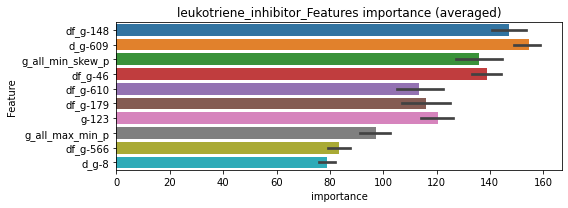

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152861	valid_1's binary_logloss: 0.000360305
Early stopping, best iteration is:
[1082]	training's binary_logloss: 0.000151331	valid_1's binary_logloss: 0.00035844


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000151976	valid_1's binary_logloss: 0.00171336


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[1131]	training's binary_logloss: 0.000149559	valid_1's binary_logloss: 0.00170423
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150914	valid_1's binary_logloss: 0.000181501
Early stopping, best iteration is:
[1068]	training's binary_logloss: 0.000149664	valid_1's binary_logloss: 0.000180049


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152621	valid_1's binary_logloss: 0.000167041
Early stopping, best iteration is:
[1109]	training's binary_logloss: 0.000150658	valid_1's binary_logloss: 0.000164887


leukotriene_inhibitor logloss: 0.000602110364610367
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000799006	valid_1's binary_logloss: 0.0407184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0014096	valid_1's binary_logloss: 0.0395104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000653404	valid_1's binary_logloss: 0.00590019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000641074	valid_1's binary_logloss: 0.0186809


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0051143, Threshold: 0.0112192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0112192, conf_0:0.00785, conf_1:0.01458
Num_p_label: 3.0, Expected: 10.4, Adj_threshold_1: 0.0412192
threshold: 0.0412192, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00116604	valid_1's binary_logloss: 0.0331577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00134352	valid_1's binary_logloss: 0.0265792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000562298	valid_1's binary_logloss: 0.0121777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000645801	valid_1's binary_logloss: 0.0269961


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0233006, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0020090 Vs.target_rate: 0.00260
Num_p_label: 8.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03298, conf_1:0.04946
threshold: 0.0412192, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000531969	valid_1's binary_logloss: 0.0159546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000648451	valid_1's binary_logloss: 0.0246976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000863604	valid_1's binary_logloss: 0.0218708
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.00056696	valid_1's binary_logloss: 0.0140177


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266769, Threshold: 0.0412192, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0022602 Vs.target_rate: 0.00260
Num_p_label: 9.0, Expected: 10.4, Threshold: 0.0412192, conf_0:0.03710, conf_1:0.04534
threshold: 0.0412192, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 648.0/3789, y_label_rate: 0.1710214


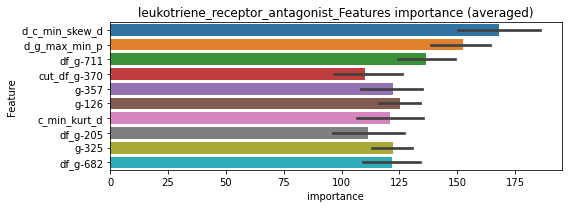

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000699695	valid_1's binary_logloss: 0.0196106


len(valid_index) : 947
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000815267	valid_1's binary_logloss: 0.0135213


================================= fold 3/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000562482	valid_1's binary_logloss: 0.0132712


len(train_index) : 2842
len(valid_index) : 947
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.01576193653390289


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000800155	valid_1's binary_logloss: 0.0166386


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000218448	valid_1's binary_logloss: 0.00507746
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000218282	valid_1's binary_logloss: 0.00085662
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000228785	valid_1's binary_logloss: 0.000283942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008451, Threshold: 0.0019468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0019468, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0319468
threshold: 0.0319468, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000223586	valid_1's binary_logloss: 0.00133144


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0319468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.0319468, conf_0:0.02556, conf_1:0.03834
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_1: 0.0619468
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000227024	valid_1's binary_logloss: 0.00376673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000214015	valid_1's binary_logloss: 0.000800388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000212159	valid_1's binary_logloss: 0.000261869
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0316934, Threshold: 0.0619468, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0619468, conf_0:0.05575, conf_1:0.06814
threshold: 0.0619468, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000212851	valid_1's binary_logloss: 0.00157237


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


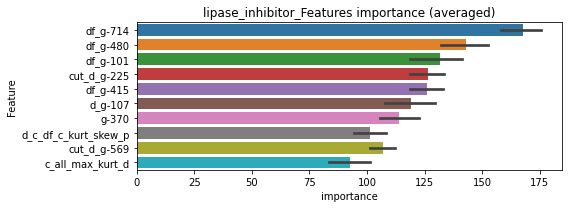

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[897]	training's binary_logloss: 0.00021461	valid_1's binary_logloss: 0.00192868
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000212906	valid_1's binary_logloss: 0.00044202
Early stopping, best iteration is:
[1034]	training's binary_logloss: 0.00021222	valid_1's binary_logloss: 0.000441343


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000215976	valid_1's binary_logloss: 0.000269047
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000208278	valid_1's binary_logloss: 0.000690095
Early stopping, best iteration is:
[1024]	training's binary_logloss: 0.000208232	valid_1's binary_logloss: 0.000690031


lipase_inhibitor logloss: 0.0008325616958590264
lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:313
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000642394	valid_1's binary_logloss: 0.019137
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000534407	valid_1's binary_logloss: 0.00968382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000558863	valid_1's binary_logloss: 0.0138084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000565183	valid_1's binary_logloss: 0.0233765


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054360, Threshold: 0.0847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0847418, conf_0:0.05932, conf_1:0.11016
Num_p_label: 39.0, Expected: 10.2, Adj_threshold_1: 0.1147418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_2: 0.1447418
Num_p_label: 32.0, Expected: 10.2, Adj_threshold_3: 0.1747418
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_4: 0.2047418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_5: 0.2347418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_6: 0.2647418
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_7: 0.2947418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_8: 0.3247418
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_9: 0.3547418
Num_p_label: 21.0, Expected: 10.2, Adj_threshold_10: 0.3847418
threshold: 0.3847418, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000760533	valid_1's binary_logloss: 0.0206911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000538312	valid_1's binary_logloss: 0.0167079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[762]	training's binary_logloss: 0.000533622	valid_1's binary_logloss: 0.00934085
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0257960, Threshold: 0.3847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0092918 Vs.target_rate: 0.00256
Num_p_label: 37.0, Expected: 10.2, Threshold: 0.3847418, conf_0:0.30779, conf_1:0.46169


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00110275	valid_1's binary_logloss: 0.0351071


Num_p_label: 36.0, Expected: 10.2, Adj_threshold_1: 0.4147418
Num_p_label: 36.0, Expected: 10.2, Adj_threshold_2: 0.4447418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_3: 0.4747418
Num_p_label: 34.0, Expected: 10.2, Adj_threshold_4: 0.5047418
Num_p_label: 33.0, Expected: 10.2, Adj_threshold_5: 0.5347418
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_6: 0.5647418
Num_p_label: 28.0, Expected: 10.2, Adj_threshold_7: 0.5947418
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_8: 0.6247418
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_9: 0.6547418
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_10: 0.6847418
threshold: 0.6847418, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000928793	valid_1's binary_logloss: 0.0250806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000578	valid_1's binary_logloss: 0.0143207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000576415	valid_1's binary_logloss: 0.0147836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000538133	valid_1's binary_logloss: 0.0118693


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0309536, Threshold: 0.6847418, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0050226 Vs.target_rate: 0.00256
Num_p_label: 20.0, Expected: 10.2, Threshold: 0.6847418, conf_0:0.61627, conf_1:0.75322
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_1: 0.7147418
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_2: 0.7447418
threshold: 0.7447418, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


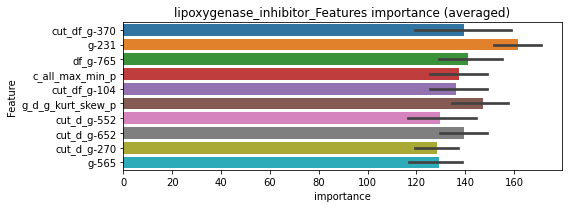

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[884]	training's binary_logloss: 0.000556743	valid_1's binary_logloss: 0.00969121


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[758]	training's binary_logloss: 0.000616224	valid_1's binary_logloss: 0.0135232


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000572651	valid_1's binary_logloss: 0.0216626


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000673048	valid_1's binary_logloss: 0.0196195


lipoxygenase_inhibitor logloss: 0.01612174006380028
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000168462	valid_1's binary_logloss: 0.000944164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000169353	valid_1's binary_logloss: 0.00142441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000173981	valid_1's binary_logloss: 0.000203808
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004834, Threshold: 0.0023534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0023534, conf_0:0.00165, conf_1:0.00306
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0323534
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0623534
threshold: 0.0623534, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000166301	valid_1's binary_logloss: 0.000551345


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.0623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00025
Num_p_label: 13.0, Expected: 1.0, Threshold: 0.0623534, conf_0:0.04988, conf_1:0.07482
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0923534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.1223534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_3: 0.1523534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_4: 0.1823534
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_5: 0.2123534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_6: 0.2423534
Num_p_label: 8.0, Expected: 1.0, Adj_threshold_7: 0.2723534
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_8: 0.3023534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_9: 0.3323534
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_10: 0.3623534
threshold: 0.3623534, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000159505	valid_1's binary_logloss: 0.000655107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000148964	valid_1's binary_logloss: 0.00134575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000149213	valid_1's binary_logloss: 0.000161072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0649559, Threshold: 0.3623534, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.3623534, conf_0:0.32612, conf_1:0.39859
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_1: 0.3923534
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_2: 0.4223534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_3: 0.4523534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_4: 0.4823534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_5: 0.5123534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.5423534
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_7: 0.5723534
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_8: 0.6023534
threshold: 0.6023534, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000150671	valid_1's binary_logloss: 0.000222065


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


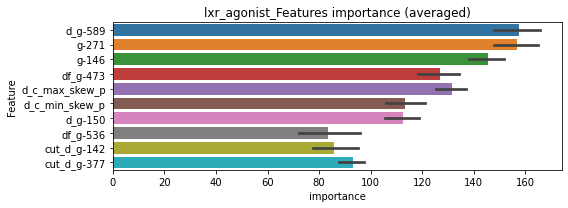

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000153915	valid_1's binary_logloss: 0.000353597
Early stopping, best iteration is:
[1062]	training's binary_logloss: 0.000152871	valid_1's binary_logloss: 0.000352011


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152555	valid_1's binary_logloss: 0.000442833


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000150314	valid_1's binary_logloss: 0.000438478
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000154182	valid_1's binary_logloss: 0.000166956


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000151478	valid_1's binary_logloss: 0.000163935
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000152844	valid_1's binary_logloss: 0.000197413
Early stopping, best iteration is:
[1107]	training's binary_logloss: 0.000151452	valid_1's binary_logloss: 0.000195634


lxr_agonist logloss: 0.0002875145743924578
mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000403088	valid_1's binary_logloss: 0.00696813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000430864	valid_1's binary_logloss: 0.00401303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000411653	valid_1's binary_logloss: 0.00253557
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027126, Threshold: 0.0361704, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000409915	valid_1's binary_logloss: 0.00449951


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0361704, conf_0:0.02532, conf_1:0.04702
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0661704
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0961704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1261704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_4: 0.1561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_5: 0.1861704
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_6: 0.2161704
threshold: 0.2161704, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.2161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0087896 Vs.target_rate: 0.00130


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


Num_p_label: 35.0, Expected: 5.2, Threshold: 0.2161704, conf_0:0.17294, conf_1:0.25940
Num_p_label: 29.0, Expected: 5.2, Adj_threshold_1: 0.2461704
Num_p_label: 26.0, Expected: 5.2, Adj_threshold_2: 0.2761704
Num_p_label: 22.0, Expected: 5.2, Adj_threshold_3: 0.3061704
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_4: 0.3361704
Num_p_label: 20.0, Expected: 5.2, Adj_threshold_5: 0.3661704
Num_p_label: 18.0, Expected: 5.2, Adj_threshold_6: 0.3961704
Num_p_label: 15.0, Expected: 5.2, Adj_threshold_7: 0.4261704
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_8: 0.4561704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_9: 0.4861704
Num_p_label: 13.0, Expected: 5.2, Adj_threshold_10: 0.5161704
threshold: 0.5161704, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000393089	valid_1's binary_logloss: 0.00623249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000380754	valid_1's binary_logloss: 0.00320197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000393229	valid_1's binary_logloss: 0.00118288
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0323944, Threshold: 0.5161704, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000414117	valid_1's binary_logloss: 0.00286147


p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.5161704, conf_0:0.46455, conf_1:0.56779
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.5461704
threshold: 0.5461704, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


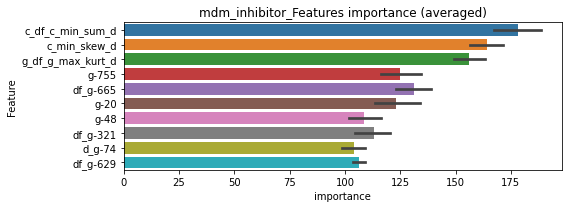

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[882]	training's binary_logloss: 0.000395529	valid_1's binary_logloss: 0.00379976


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000405835	valid_1's binary_logloss: 0.00332775


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[864]	training's binary_logloss: 0.000400397	valid_1's binary_logloss: 0.00118144


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000409005	valid_1's binary_logloss: 0.00290718


mdm_inhibitor logloss: 0.0028041296121338803
mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[781]	training's binary_logloss: 0.000614321	valid_1's binary_logloss: 0.0256426
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000600395	valid_1's binary_logloss: 0.0239754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000590767	valid_1's binary_logloss: 0.00569473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000669241	valid_1's binary_logloss: 0.0296798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0057713, Threshold: 0.0209722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 654/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0209722, conf_0:0.01468, conf_1:0.02726
Num_p_label: 3.0, Expected: 12.0, Adj_threshold_1: 0.0509722
threshold: 0.0509722, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 654.0/3795, y_label_rate: 0.1723320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[740]	training's binary_logloss: 0.00062487	valid_1's binary_logloss: 0.0262689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[810]	training's binary_logloss: 0.000585085	valid_1's binary_logloss: 0.0237277
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.000591348	valid_1's binary_logloss: 0.0047423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000611814	valid_1's binary_logloss: 0.0247701


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201435, Threshold: 0.0509722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3787
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0509722, conf_0:0.04078, conf_1:0.06117
Num_p_label: 10.0, Expected: 12.0, Adj_threshold_1: 0.0809722
threshold: 0.0809722, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 650.0/3787, y_label_rate: 0.1716398
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.00071069	valid_1's binary_logloss: 0.0181859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000597334	valid_1's binary_logloss: 0.0134643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000590545	valid_1's binary_logloss: 0.0165468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00067439	valid_1's binary_logloss: 0.0141217


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0246051, Threshold: 0.0809722, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 649.0/3785
p_label_rate: 0.0030136 Vs.target_rate: 0.00302
Num_p_label: 12.0, Expected: 12.0, Threshold: 0.0809722, conf_0:0.07287, conf_1:0.08907
threshold: 0.0809722, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 649.0/3785, y_label_rate: 0.1714663


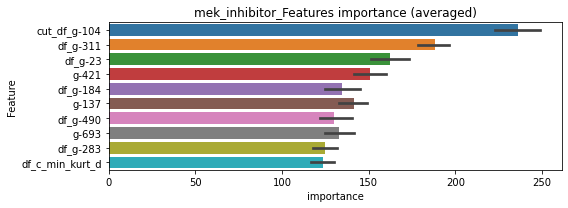

len(train_index) : 2838
len(valid_index) : 947
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000804354	valid_1's binary_logloss: 0.0227298


len(train_index) : 2839
len(valid_index) : 946
================================= fold 2/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[933]	training's binary_logloss: 0.000616491	valid_1's binary_logloss: 0.0194175


len(train_index) : 2839
len(valid_index) : 946
================================= fold 3/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000715119	valid_1's binary_logloss: 0.0166142


len(train_index) : 2839
len(valid_index) : 946
================================= fold 4/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.018657593802092986


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000931487	valid_1's binary_logloss: 0.0158646


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0208992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000660533	valid_1's binary_logloss: 0.0279782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000988466	valid_1's binary_logloss: 0.0310065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000786763	valid_1's binary_logloss: 0.0300372


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0057424, Threshold: 0.0181684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0181684, conf_0:0.01272, conf_1:0.02362
Num_p_label: 6.0, Expected: 12.4, Adj_threshold_1: 0.0481684
threshold: 0.0481684, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000786701	valid_1's binary_logloss: 0.0231906
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000632664	valid_1's binary_logloss: 0.0275624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000779746	valid_1's binary_logloss: 0.0233566
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211019, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0037670 Vs.target_rate: 0.00311


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00103321	valid_1's binary_logloss: 0.0337524


Num_p_label: 15.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.03853, conf_1:0.05780
threshold: 0.0481684, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3790, y_label_rate: 0.1712401
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000566713	valid_1's binary_logloss: 0.0175932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000609897	valid_1's binary_logloss: 0.0263719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000709556	valid_1's binary_logloss: 0.0330151
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000764553	valid_1's binary_logloss: 0.0290297


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173244, Threshold: 0.0481684, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0032647 Vs.target_rate: 0.00311
Num_p_label: 13.0, Expected: 12.4, Threshold: 0.0481684, conf_0:0.04335, conf_1:0.05299
threshold: 0.0481684, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 644.0/3780, y_label_rate: 0.1703704


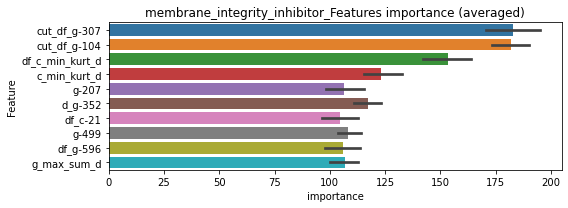

len(train_index) : 2835
len(valid_index) : 945
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 2/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000879874	valid_1's binary_logloss: 0.0222995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2835
len(valid_index) : 945
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000886223	valid_1's binary_logloss: 0.0246243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.00059825	valid_1's binary_logloss: 0.0112005


len(train_index) : 2835
len(valid_index) : 945
================================= fold 4/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


membrane_integrity_inhibitor logloss: 0.021077935115658804
membrane_integrity_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000957779	valid_1's binary_logloss: 0.0261874


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000347145	valid_1's binary_logloss: 0.00208707
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000351549	valid_1's binary_logloss: 0.00254108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000353168	valid_1's binary_logloss: 0.00140059
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018504, Threshold: 0.0051409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051409, conf_0:0.00360, conf_1:0.00668
Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0351409


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000360299	valid_1's binary_logloss: 0.00822544


threshold: 0.0351409, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.02811, conf_1:0.04217
threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000344073	valid_1's binary_logloss: 0.00171995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00034871	valid_1's binary_logloss: 0.00214892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000351906	valid_1's binary_logloss: 0.00139028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113079, Threshold: 0.0351409, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3805
p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.0351409, conf_0:0.03163, conf_1:0.03865
threshold: 0.0351409, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000381316	valid_1's binary_logloss: 0.00889272


positive_y_label: 656.0/3805, y_label_rate: 0.1724047


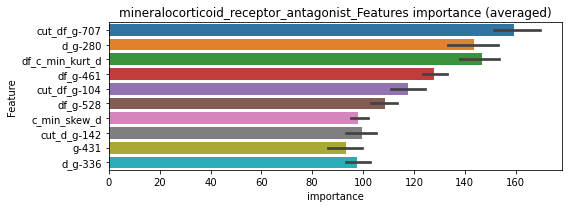

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[927]	training's binary_logloss: 0.000335245	valid_1's binary_logloss: 0.00190701


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[831]	training's binary_logloss: 0.000347407	valid_1's binary_logloss: 0.0021514


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[870]	training's binary_logloss: 0.00034661	valid_1's binary_logloss: 0.00134472


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.0032577012845831383


Early stopping, best iteration is:
[749]	training's binary_logloss: 0.00035973	valid_1's binary_logloss: 0.00762624


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00022456	valid_1's binary_logloss: 0.00213293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000228446	valid_1's binary_logloss: 0.00369653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000229948	valid_1's binary_logloss: 0.000417409
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008240, Threshold: 0.0018187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000229791	valid_1's binary_logloss: 0.000356436


Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0018187, conf_0:0.00127, conf_1:0.00236
Num_p_label: 1.0, Expected: 2.0, Adj_threshold_1: 0.0318187
threshold: 0.0318187, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02545, conf_1:0.03818
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.00021874	valid_1's binary_logloss: 0.00274854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000216367	valid_1's binary_logloss: 0.00381744
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000222424	valid_1's binary_logloss: 0.000270421
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0171529, Threshold: 0.0318187, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00050
Num_p_label: 4.0, Expected: 2.0, Threshold: 0.0318187, conf_0:0.02864, conf_1:0.03500
threshold: 0.0318187, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000214829	valid_1's binary_logloss: 0.000477777


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


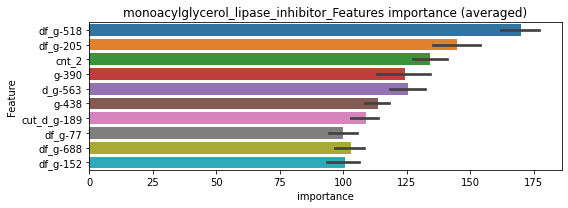

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000229288	valid_1's binary_logloss: 0.00279274
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[886]	training's binary_logloss: 0.000217587	valid_1's binary_logloss: 0.00289986
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[835]	training's binary_logloss: 0.000218228	valid_1's binary_logloss: 0.000281663
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0015859713130587367


Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000218262	valid_1's binary_logloss: 0.000368703


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00297799	valid_1's binary_logloss: 0.0786825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000847318	valid_1's binary_logloss: 0.0534546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00164307	valid_1's binary_logloss: 0.0560296
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0074067, Threshold: 0.0178240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0178240, conf_0:0.01248, conf_1:0.02317
Num_p_label: 4.0, Expected: 14.2, Adj_threshold_1: 0.0478240
threshold: 0.0478240, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00244963	valid_1's binary_logloss: 0.0687559


positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00330733	valid_1's binary_logloss: 0.0720038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00384481	valid_1's binary_logloss: 0.0632923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00388271	valid_1's binary_logloss: 0.0695481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000738155	valid_1's binary_logloss: 0.0446923


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0206265, Threshold: 0.0478240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0025113 Vs.target_rate: 0.00357
Num_p_label: 10.0, Expected: 14.2, Threshold: 0.0478240, conf_0:0.03826, conf_1:0.05739
threshold: 0.0478240, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00299154	valid_1's binary_logloss: 0.053978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00296806	valid_1's binary_logloss: 0.0580436
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00286453	valid_1's binary_logloss: 0.0647656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000941247	valid_1's binary_logloss: 0.0359834


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0220070, Threshold: 0.0478240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 624.0/3734
p_label_rate: 0.0022602 Vs.target_rate: 0.00357
Num_p_label: 9.0, Expected: 14.2, Threshold: 0.0478240, conf_0:0.04304, conf_1:0.05261
threshold: 0.0478240, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 624.0/3734, y_label_rate: 0.1671130


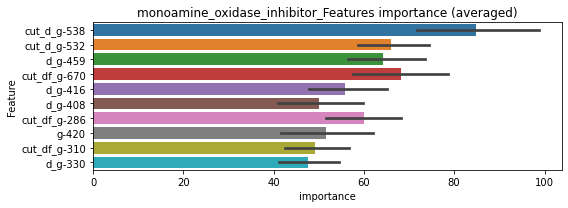

len(train_index) : 2800
len(valid_index) : 934
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 934
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00278958	valid_1's binary_logloss: 0.0523453
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00325475	valid_1's binary_logloss: 0.0473229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00346554	valid_1's binary_logloss: 0.0328734
Training until validation scores don't improve for 30 rounds


monoamine_oxidase_inhibitor logloss: 0.04735663255196617
monoamine_oxidase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[109]	training's binary_logloss: 0.00682719	valid_1's binary_logloss: 0.0568796


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.000888263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000311369	valid_1's binary_logloss: 0.00179395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00030891	valid_1's binary_logloss: 0.00218472
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016201, Threshold: 0.0166980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0166980, conf_0:0.01169, conf_1:0.02171
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_1: 0.0466980
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_2: 0.0766980
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1066980
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1366980


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000307446	valid_1's binary_logloss: 0.00275058


threshold: 0.1366980, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.1366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0072828 Vs.target_rate: 0.00076
Num_p_label: 29.0, Expected: 3.0, Threshold: 0.1366980, conf_0:0.10936, conf_1:0.16404
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.1666980
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.1966980
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_3: 0.2266980
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_4: 0.2566980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


Num_p_label: 18.0, Expected: 3.0, Adj_threshold_5: 0.2866980
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_6: 0.3166980
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_7: 0.3466980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.3766980
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_9: 0.4066980
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_10: 0.4366980
threshold: 0.4366980, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000297245	valid_1's binary_logloss: 0.000575728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000294709	valid_1's binary_logloss: 0.00159832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000299691	valid_1's binary_logloss: 0.00210876
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509281, Threshold: 0.4366980, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00076
Num_p_label: 8.0, Expected: 3.0, Threshold: 0.4366980, conf_0:0.39303, conf_1:0.48037
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.4666980


Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000290313	valid_1's binary_logloss: 0.00201988


threshold: 0.4666980, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


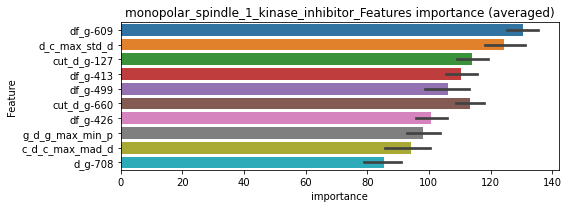

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[818]	training's binary_logloss: 0.000298611	valid_1's binary_logloss: 0.000550395


================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000298749	valid_1's binary_logloss: 0.00153476
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[794]	training's binary_logloss: 0.000301315	valid_1's binary_logloss: 0.00105052


================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


monopolar_spindle_1_kinase_inhibitor logloss: 0.0010947231612758394


Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000296596	valid_1's binary_logloss: 0.00124356
mutually exclusive columns: mtor_inhibitor


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00458545	valid_1's binary_logloss: 0.119498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00468315	valid_1's binary_logloss: 0.103068
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00803941	valid_1's binary_logloss: 0.138016
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.982, PR-AUC:0.967
y_Threshold: 0.0236902, Threshold: 0.0450320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 516/3100
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.0450320, conf_0:0.03152, conf_1:0.05854
Num_p_label: 8.0, Expected: 21.7, Adj_threshold_1: 0.0750320


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00471482	valid_1's binary_logloss: 0.0996347


threshold: 0.0750320, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 516.0/3100, y_label_rate: 0.1664516
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00349811	valid_1's binary_logloss: 0.0917753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00351504	valid_1's binary_logloss: 0.0960498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.001683	valid_1's binary_logloss: 0.0567116
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0371990, Threshold: 0.0750320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 504.0/3076
p_label_rate: 0.0067805 Vs.target_rate: 0.00546
Num_p_label: 27.0, Expected: 21.7, Threshold: 0.0750320, conf_0:0.06003, conf_1:0.09004


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00284453	valid_1's binary_logloss: 0.0853803


threshold: 0.0750320, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 504.0/3076, y_label_rate: 0.1638492
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00515271	valid_1's binary_logloss: 0.0992119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00381284	valid_1's binary_logloss: 0.0628263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00258382	valid_1's binary_logloss: 0.0641079
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.993, PR-AUC:0.987
y_Threshold: 0.0380892, Threshold: 0.0750320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 483.0/3034
p_label_rate: 0.0087896 Vs.target_rate: 0.00546
Num_p_label: 35.0, Expected: 21.7, Threshold: 0.0750320, conf_0:0.06753, conf_1:0.08254
Num_p_label: 22.0, Expected: 21.7, Adj_threshold_1: 0.1050320
threshold: 0.1050320, positive_p_label: 22.0/3982, p_label_rate: 0.0055249


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00468656	valid_1's binary_logloss: 0.0946423


positive_y_label: 483.0/3034, y_label_rate: 0.1591958


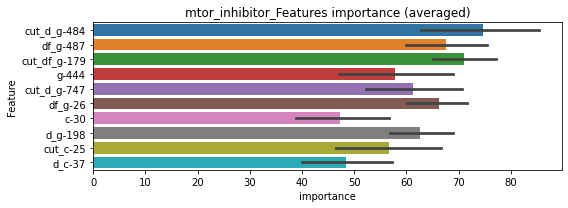

len(train_index) : 2275
len(valid_index) : 759
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2275
len(valid_index) : 759
================================= fold 2/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.0044538	valid_1's binary_logloss: 0.0794703
Training until validation scores don't improve for 30 rounds


len(train_index) : 2276
len(valid_index) : 758
================================= fold 3/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00384441	valid_1's binary_logloss: 0.0669904
Training until validation scores don't improve for 30 rounds


len(train_index) : 2276
len(valid_index) : 758
================================= fold 4/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00319773	valid_1's binary_logloss: 0.0630023
Training until validation scores don't improve for 30 rounds


mtor_inhibitor logloss: 0.07188745351619924
mtor_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00518871	valid_1's binary_logloss: 0.0780832


mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000476707	valid_1's binary_logloss: 0.0121389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[746]	training's binary_logloss: 0.000476726	valid_1's binary_logloss: 0.00956389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000493206	valid_1's binary_logloss: 0.00312973
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000594824	valid_1's binary_logloss: 0.0192982


y_Threshold: 0.0037370, Threshold: 0.0989376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0989376, conf_0:0.06926, conf_1:0.12862
Num_p_label: 34.0, Expected: 8.0, Adj_threshold_1: 0.1289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.1589376
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1889376
threshold: 0.1889376, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000473679	valid_1's binary_logloss: 0.00505381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000465914	valid_1's binary_logloss: 0.00466512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[692]	training's binary_logloss: 0.000465649	valid_1's binary_logloss: 0.00539976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000469593	valid_1's binary_logloss: 0.0122536


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1002446, Threshold: 0.1889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0188348 Vs.target_rate: 0.00202
Num_p_label: 75.0, Expected: 8.0, Threshold: 0.1889376, conf_0:0.15115, conf_1:0.22673
Num_p_label: 70.0, Expected: 8.0, Adj_threshold_1: 0.2189376
Num_p_label: 68.0, Expected: 8.0, Adj_threshold_2: 0.2489376
Num_p_label: 67.0, Expected: 8.0, Adj_threshold_3: 0.2789376
Num_p_label: 64.0, Expected: 8.0, Adj_threshold_4: 0.3089376
Num_p_label: 59.0, Expected: 8.0, Adj_threshold_5: 0.3389376
Num_p_label: 57.0, Expected: 8.0, Adj_threshold_6: 0.3689376
Num_p_label: 55.0, Expected: 8.0, Adj_threshold_7: 0.3989376
Num_p_label: 50.0, Expected: 8.0, Adj_threshold_8: 0.4289376
Num_p_label: 49.0, Expected: 8.0, Adj_threshold_9: 0.4589376
Num_p_label: 46.0, Expected: 8.0, Adj_threshold_10: 0.4889376
threshold: 0.4889376, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000468772	valid_1's binary_logloss: 0.00565936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000470265	valid_1's binary_logloss: 0.00519889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000471949	valid_1's binary_logloss: 0.0058831
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000461626	valid_1's binary_logloss: 0.00353389


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1380826, Threshold: 0.4889376, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0123054 Vs.target_rate: 0.00202
Num_p_label: 49.0, Expected: 8.0, Threshold: 0.4889376, conf_0:0.44004, conf_1:0.53783
Num_p_label: 45.0, Expected: 8.0, Adj_threshold_1: 0.5189376
Num_p_label: 41.0, Expected: 8.0, Adj_threshold_2: 0.5489376
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_3: 0.5789376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_4: 0.6089376
Num_p_label: 36.0, Expected: 8.0, Adj_threshold_5: 0.6389376
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_6: 0.6689376
Num_p_label: 32.0, Expected: 8.0, Adj_threshold_7: 0.6989376
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_8: 0.7289376
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_9: 0.7589376
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_10: 0.7889376
threshold: 0.7889376, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_la

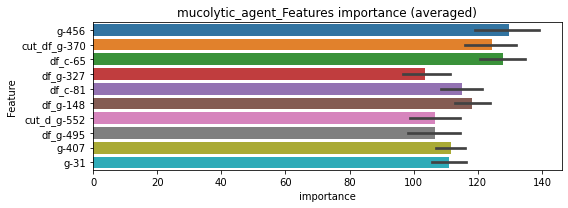

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000472467	valid_1's binary_logloss: 0.00782402


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000471795	valid_1's binary_logloss: 0.00619742


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000516676	valid_1's binary_logloss: 0.00709031


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000467108	valid_1's binary_logloss: 0.00394115
Early stopping, best iteration is:
[1001]	training's binary_logloss: 0.000466964	valid_1's binary_logloss: 0.00393885


mucolytic_agent logloss: 0.006263752984779257
neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000514495	valid_1's binary_logloss: 0.0107466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000437088	valid_1's binary_logloss: 0.00359975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000452749	valid_1's binary_logloss: 0.00716617
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028542, Threshold: 0.0132299, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000445505	valid_1's binary_logloss: 0.00750395


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0132299, conf_0:0.00926, conf_1:0.01720
Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0432299
threshold: 0.0432299, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0432299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0052737 Vs.target_rate: 0.00155
Num_p_label: 21.0, Expected: 6.2, Threshold: 0.0432299, conf_0:0.03458, conf_1:0.05188
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.0732299


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000441249	valid_1's binary_logloss: 0.0088247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000413139	valid_1's binary_logloss: 0.0025629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.00047772	valid_1's binary_logloss: 0.0062145
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0262727, Threshold: 0.0732299, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.0732299, conf_0:0.06591, conf_1:0.08055


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000501026	valid_1's binary_logloss: 0.00699905


threshold: 0.0732299, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


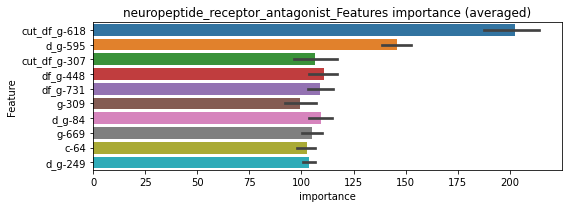

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000448635	valid_1's binary_logloss: 0.00914544


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[824]	training's binary_logloss: 0.000432493	valid_1's binary_logloss: 0.00270924


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000686478	valid_1's binary_logloss: 0.00642997
Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000511358	valid_1's binary_logloss: 0.00654896


neuropeptide_receptor_antagonist logloss: 0.006208404452654936


mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 6799
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 6799


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.0677613	valid_1's binary_logloss: 0.341768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.112592	valid_1's binary_logloss: 0.351536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.0671734	valid_1's binary_logloss: 0.334765
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.774, PR-AUC:0.643
y_Threshold: 0.1406250, Threshold: 0.2234016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1433 → Positive_corect_labels: 779/6725
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.2234016, conf_0:0.15638, conf_1:0.29042


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.0935092	valid_1's binary_logloss: 0.355209


threshold: 0.2234016, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 779.0/6725, y_label_rate: 0.1158364
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.0121778	valid_1's binary_logloss: 0.163116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.0115912	valid_1's binary_logloss: 0.161996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.0127173	valid_1's binary_logloss: 0.150419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.0063741	valid_1's binary_logloss: 0.138349


2 / 3, AUC score:0.965, PR-AUC:0.907
y_Threshold: 0.0793018, Threshold: 0.2234016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 262 → Positive_corect_labels: 648.0/6463
p_label_rate: 0.0045203 Vs.target_rate: 0.03494
Num_p_label: 18.0, Expected: 139.1, Threshold: 0.2234016, conf_0:0.17872, conf_1:0.26808
threshold: 0.2234016, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/6463, y_label_rate: 0.1002630
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00486816	valid_1's binary_logloss: 0.102447
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00464167	valid_1's binary_logloss: 0.10475
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.0076472	valid_1's binary_logloss: 0.1273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.00340287	valid_1's binary_logloss: 0.102602


3 / 3, AUC score:0.981, PR-AUC:0.950
y_Threshold: 0.0580231, Threshold: 0.2234016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 581.0/6329
p_label_rate: 0.0042692 Vs.target_rate: 0.03494
Num_p_label: 17.0, Expected: 139.1, Threshold: 0.2234016, conf_0:0.20106, conf_1:0.24574
threshold: 0.2234016, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 581.0/6329, y_label_rate: 0.0917997


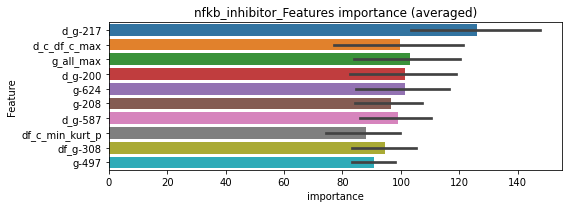

len(train_index) : 4746
len(valid_index) : 1583
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4747
len(valid_index) : 1582
================================= fold 2/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[151]	training's binary_logloss: 0.0102433	valid_1's binary_logloss: 0.122764
Training until validation scores don't improve for 30 rounds


len(train_index) : 4747
len(valid_index) : 1582
================================= fold 3/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.00878309	valid_1's binary_logloss: 0.0996513
Training until validation scores don't improve for 30 rounds


len(train_index) : 4747
len(valid_index) : 1582
================================= fold 4/4 nfkb_inhibitor=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00360925	valid_1's binary_logloss: 0.0750334
Training until validation scores don't improve for 30 rounds


nfkb_inhibitor logloss: 0.09514140399090347
nfkb_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00275193	valid_1's binary_logloss: 0.0830998


nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000238678	valid_1's binary_logloss: 0.00175164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000236937	valid_1's binary_logloss: 0.00121174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000246325	valid_1's binary_logloss: 0.000460892
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009120, Threshold: 0.0051276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0051276, conf_0:0.00359, conf_1:0.00667
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0351276
threshold: 0.0351276, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000239429	valid_1's binary_logloss: 0.000773861


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0351276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00050
Num_p_label: 15.0, Expected: 2.0, Threshold: 0.0351276, conf_0:0.02810, conf_1:0.04215
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0651276
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0951276
threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000236448	valid_1's binary_logloss: 0.000743048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000236305	valid_1's binary_logloss: 0.000845777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234591	valid_1's binary_logloss: 0.000350759
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0994385, Threshold: 0.0951276, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0951276, conf_0:0.08561, conf_1:0.10464
threshold: 0.0951276, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000232739	valid_1's binary_logloss: 0.00103413


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


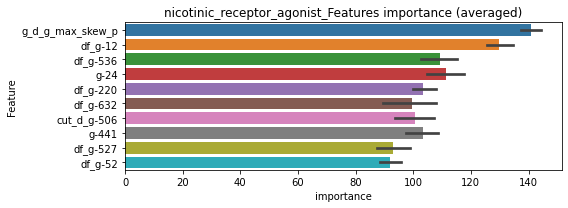

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000238732	valid_1's binary_logloss: 0.000530254
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[878]	training's binary_logloss: 0.000239745	valid_1's binary_logloss: 0.000784282
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000236901	valid_1's binary_logloss: 0.000379372
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.000236901	valid_1's binary_logloss: 0.000379372


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.0005400170704230048


Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000239059	valid_1's binary_logloss: 0.000466163


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000377243	valid_1's binary_logloss: 0.00619259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000361423	valid_1's binary_logloss: 0.00241037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000378031	valid_1's binary_logloss: 0.00141091
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027561, Threshold: 0.0365256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000365105	valid_1's binary_logloss: 0.00183201


p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0365256, conf_0:0.02557, conf_1:0.04748
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_1: 0.0665256
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_2: 0.0965256
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_3: 0.1265256
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_4: 0.1565256
threshold: 0.1565256, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.1565256, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0113009 Vs.target_rate: 0.00109
Num_p_label: 45.0, Expected: 4.3, Threshold: 0.1565256, conf_0:0.12522, conf_1:0.18783


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Num_p_label: 37.0, Expected: 4.3, Adj_threshold_1: 0.1865256
Num_p_label: 28.0, Expected: 4.3, Adj_threshold_2: 0.2165256
Num_p_label: 25.0, Expected: 4.3, Adj_threshold_3: 0.2465256
Num_p_label: 22.0, Expected: 4.3, Adj_threshold_4: 0.2765256
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_5: 0.3065256
Num_p_label: 17.0, Expected: 4.3, Adj_threshold_6: 0.3365256
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_7: 0.3665256
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_8: 0.3965256
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_9: 0.4265256
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000345191	valid_1's binary_logloss: 0.00557271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000347161	valid_1's binary_logloss: 0.00166624
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000356854	valid_1's binary_logloss: 0.00137623
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0411869, Threshold: 0.4265256, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.00034829	valid_1's binary_logloss: 0.0015321


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.4265256, conf_0:0.38387, conf_1:0.46918
threshold: 0.4265256, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


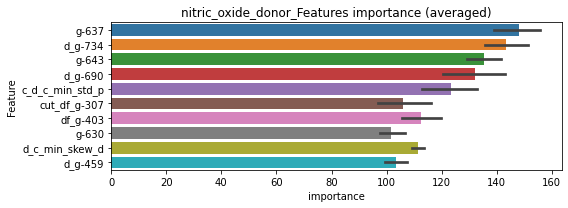

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000386821	valid_1's binary_logloss: 0.00442807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.00035711	valid_1's binary_logloss: 0.00149286


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000357309	valid_1's binary_logloss: 0.00121214


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[828]	training's binary_logloss: 0.00035553	valid_1's binary_logloss: 0.00173496


nitric_oxide_donor logloss: 0.0022170174454153634
nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000375672	valid_1's binary_logloss: 0.00447262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000353039	valid_1's binary_logloss: 0.00524729
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000357332	valid_1's binary_logloss: 0.00109795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023205, Threshold: 0.0075482, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000349832	valid_1's binary_logloss: 0.00223764


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0075482, conf_0:0.00528, conf_1:0.00981
Num_p_label: 3.0, Expected: 4.8, Adj_threshold_1: 0.0375482
threshold: 0.0375482, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0375482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00122


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


Num_p_label: 14.0, Expected: 4.8, Threshold: 0.0375482, conf_0:0.03004, conf_1:0.04506
Num_p_label: 5.0, Expected: 4.8, Adj_threshold_1: 0.0675482
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000473158	valid_1's binary_logloss: 0.00494738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000345079	valid_1's binary_logloss: 0.00490412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00035924	valid_1's binary_logloss: 0.000987274
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0281787, Threshold: 0.0675482, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00122


Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000350658	valid_1's binary_logloss: 0.00292393


Num_p_label: 5.0, Expected: 4.8, Threshold: 0.0675482, conf_0:0.06079, conf_1:0.07430
threshold: 0.0675482, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


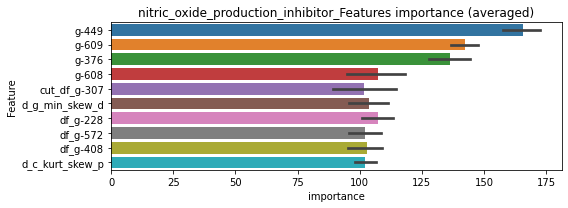

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000454966	valid_1's binary_logloss: 0.00578126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[764]	training's binary_logloss: 0.00036625	valid_1's binary_logloss: 0.00407091


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[966]	training's binary_logloss: 0.000347937	valid_1's binary_logloss: 0.000928122


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000350573	valid_1's binary_logloss: 0.00264128


nitric_oxide_production_inhibitor logloss: 0.0033562180576652964
nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:311
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.000382956	valid_1's binary_logloss: 0.00400104
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000389693	valid_1's binary_logloss: 0.00145589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000383193	valid_1's binary_logloss: 0.00100479
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027906, Threshold: 0.0240505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0240505, conf_0:0.01684, conf_1:0.03127


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000377714	valid_1's binary_logloss: 0.00287639


Num_p_label: 12.0, Expected: 4.3, Adj_threshold_1: 0.0540505
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_2: 0.0840505
threshold: 0.0840505, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.0840505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0110497 Vs.target_rate: 0.00109
Num_p_label: 44.0, Expected: 4.3, Threshold: 0.0840505, conf_0:0.06724, conf_1:0.10086
Num_p_label: 35.0, Expected: 4.3, Adj_threshold_1: 0.1140505


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


Num_p_label: 32.0, Expected: 4.3, Adj_threshold_2: 0.1440505
Num_p_label: 27.0, Expected: 4.3, Adj_threshold_3: 0.1740505
Num_p_label: 23.0, Expected: 4.3, Adj_threshold_4: 0.2040505
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_5: 0.2340505
Num_p_label: 14.0, Expected: 4.3, Adj_threshold_6: 0.2640505
Num_p_label: 9.0, Expected: 4.3, Adj_threshold_7: 0.2940505
threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000375368	valid_1's binary_logloss: 0.00496097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000375592	valid_1's binary_logloss: 0.00123216
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000374109	valid_1's binary_logloss: 0.000896929
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0478986, Threshold: 0.2940505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2940505, conf_0:0.26465, conf_1:0.32346


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000369303	valid_1's binary_logloss: 0.00271207


threshold: 0.2940505, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


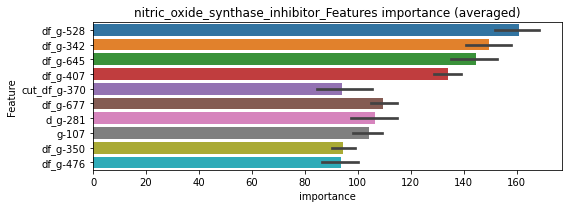

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000365245	valid_1's binary_logloss: 0.00383831


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[830]	training's binary_logloss: 0.000375888	valid_1's binary_logloss: 0.001245


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[841]	training's binary_logloss: 0.000377762	valid_1's binary_logloss: 0.000873342


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000378558	valid_1's binary_logloss: 0.00165473


nitric_oxide_synthase_inhibitor logloss: 0.0019031356332312045
norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000183581	valid_1's binary_logloss: 0.00165967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000189225	valid_1's binary_logloss: 0.0027749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000183492	valid_1's binary_logloss: 0.000233643
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006083, Threshold: 0.0028739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0028739, conf_0:0.00201, conf_1:0.00374
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0328739
threshold: 0.0328739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000185383	valid_1's binary_logloss: 0.000247557


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.0328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0065294 Vs.target_rate: 0.00029
Num_p_label: 26.0, Expected: 1.2, Threshold: 0.0328739, conf_0:0.02630, conf_1:0.03945
Num_p_label: 14.0, Expected: 1.2, Adj_threshold_1: 0.0628739
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_2: 0.0928739
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_3: 0.1228739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_4: 0.1528739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_5: 0.1828739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_6: 0.2128739
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_7: 0.2428739
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_8: 0.2728739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_9: 0.3028739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_10: 0.3328739


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


threshold: 0.3328739, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000178023	valid_1's binary_logloss: 0.00184632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000173817	valid_1's binary_logloss: 0.00221922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000174916	valid_1's binary_logloss: 0.00018795
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404424, Threshold: 0.3328739, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00029
Num_p_label: 3.0, Expected: 1.2, Threshold: 0.3328739, conf_0:0.29959, conf_1:0.36616
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_1: 0.3628739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_2: 0.3928739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.4228739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_4: 0.4528739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_5: 0.4828739
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_6: 0.5128739
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_7: 0.5428739
threshold: 0.5428739, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000173793	valid_1's binary_logloss: 0.000192546


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


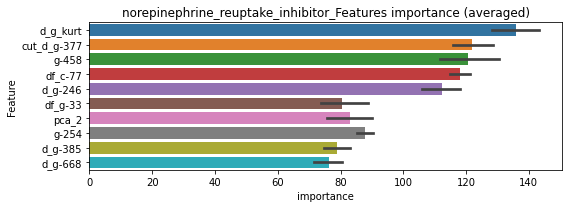

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000175389	valid_1's binary_logloss: 0.00112995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[932]	training's binary_logloss: 0.000173705	valid_1's binary_logloss: 0.000907615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[852]	training's binary_logloss: 0.000176274	valid_1's binary_logloss: 0.00019176


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0006102428983813548


Early stopping, best iteration is:
[874]	training's binary_logloss: 0.000175781	valid_1's binary_logloss: 0.000210898


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000273712	valid_1's binary_logloss: 0.00280958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000268375	valid_1's binary_logloss: 0.00343378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000271747	valid_1's binary_logloss: 0.00042958
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013650, Threshold: 0.0046269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0046269, conf_0:0.00324, conf_1:0.00602
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0346269


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000269443	valid_1's binary_logloss: 0.000814483


threshold: 0.0346269, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0346269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0346269, conf_0:0.02770, conf_1:0.04155
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0646269


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000259538	valid_1's binary_logloss: 0.00180927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000263679	valid_1's binary_logloss: 0.00446534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000260748	valid_1's binary_logloss: 0.000322734
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169746, Threshold: 0.0646269, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000256749	valid_1's binary_logloss: 0.000793731


p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0646269, conf_0:0.05816, conf_1:0.07109
threshold: 0.0646269, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


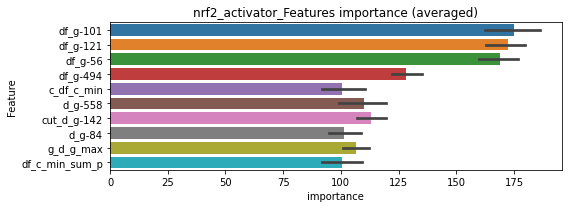

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[895]	training's binary_logloss: 0.000264543	valid_1's binary_logloss: 0.00195156


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[923]	training's binary_logloss: 0.000263253	valid_1's binary_logloss: 0.00322893


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000262513	valid_1's binary_logloss: 0.000350771
Early stopping, best iteration is:
[1046]	training's binary_logloss: 0.000261284	valid_1's binary_logloss: 0.0003492


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000260312	valid_1's binary_logloss: 0.000646148
Early stopping, best iteration is:
[1044]	training's binary_logloss: 0.00025874	valid_1's binary_logloss: 0.000644097


nrf2_activator logloss: 0.0015434483675017675
opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000641862	valid_1's binary_logloss: 0.0241858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000708853	valid_1's binary_logloss: 0.0265121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000572552	valid_1's binary_logloss: 0.0126501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000656129	valid_1's binary_logloss: 0.0245179


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045783, Threshold: 0.0166179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0166179, conf_0:0.01163, conf_1:0.02160
Num_p_label: 9.0, Expected: 10.2, Adj_threshold_1: 0.0466179
threshold: 0.0466179, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000750975	valid_1's binary_logloss: 0.0344887
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000631051	valid_1's binary_logloss: 0.0217084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[677]	training's binary_logloss: 0.000585883	valid_1's binary_logloss: 0.0159011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000645289	valid_1's binary_logloss: 0.021062


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0303178, Threshold: 0.0466179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3792
p_label_rate: 0.0148167 Vs.target_rate: 0.00256
Num_p_label: 59.0, Expected: 10.2, Threshold: 0.0466179, conf_0:0.03729, conf_1:0.05594
Num_p_label: 38.0, Expected: 10.2, Adj_threshold_1: 0.0766179
Num_p_label: 30.0, Expected: 10.2, Adj_threshold_2: 0.1066179
Num_p_label: 26.0, Expected: 10.2, Adj_threshold_3: 0.1366179
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_4: 0.1666179
Num_p_label: 18.0, Expected: 10.2, Adj_threshold_5: 0.1966179
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_6: 0.2266179
threshold: 0.2266179, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000915217	valid_1's binary_logloss: 0.0266504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000676286	valid_1's binary_logloss: 0.020661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000563221	valid_1's binary_logloss: 0.0101559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000587492	valid_1's binary_logloss: 0.0121729


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0439013, Threshold: 0.2266179, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0042692 Vs.target_rate: 0.00256
Num_p_label: 17.0, Expected: 10.2, Threshold: 0.2266179, conf_0:0.20396, conf_1:0.24928
Num_p_label: 11.0, Expected: 10.2, Adj_threshold_1: 0.2566179
threshold: 0.2566179, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


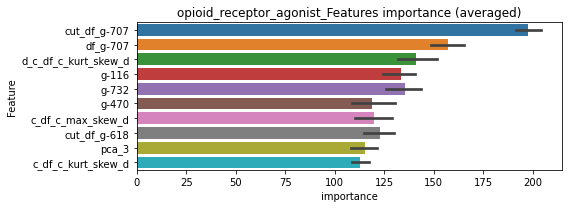

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000862327	valid_1's binary_logloss: 0.0309152
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.00073285	valid_1's binary_logloss: 0.0233678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00102148	valid_1's binary_logloss: 0.0280779


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000730513	valid_1's binary_logloss: 0.0170678


opioid_receptor_agonist logloss: 0.02485716462783564
opioid_receptor_agonist is unpredictable(><)!
opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00279515	valid_1's binary_logloss: 0.0823175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00376994	valid_1's binary_logloss: 0.0715919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00269486	valid_1's binary_logloss: 0.0550534
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0137418, Threshold: 0.0364225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0364225, conf_0:0.02550, conf_1:0.04735
Num_p_label: 12.0, Expected: 16.1, Adj_threshold_1: 0.0664225
threshold: 0.0664225, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00654854	valid_1's binary_logloss: 0.0868082


positive_y_label: 641.0/3773, y_label_rate: 0.1698913
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00269104	valid_1's binary_logloss: 0.0679709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00279023	valid_1's binary_logloss: 0.0595907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00191908	valid_1's binary_logloss: 0.0564244
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0296339, Threshold: 0.0664225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 622.0/3735
p_label_rate: 0.0208438 Vs.target_rate: 0.00403
Num_p_label: 83.0, Expected: 16.1, Threshold: 0.0664225, conf_0:0.05314, conf_1:0.07971
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_1: 0.0964225
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_2: 0.1264225
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_3: 0.1564225
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_4: 0.1864225
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_5: 0.2164225


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00304316	valid_1's binary_logloss: 0.0612007


Num_p_label: 24.0, Expected: 16.1, Adj_threshold_6: 0.2464225
threshold: 0.2464225, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 622.0/3735, y_label_rate: 0.1665328
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00401446	valid_1's binary_logloss: 0.0585895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00356131	valid_1's binary_logloss: 0.0600745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000750235	valid_1's binary_logloss: 0.0290828
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000789306	valid_1's binary_logloss: 0.0392559


y_Threshold: 0.0352159, Threshold: 0.2464225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 607.0/3705
p_label_rate: 0.0160723 Vs.target_rate: 0.00403
Num_p_label: 64.0, Expected: 16.1, Threshold: 0.2464225, conf_0:0.22178, conf_1:0.27106
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_1: 0.2764225
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.3064225
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_3: 0.3364225
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_4: 0.3664225
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_5: 0.3964225
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_6: 0.4264225
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_7: 0.4564225
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_8: 0.4864225
threshold: 0.4864225, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 607.0/3705, y_label_rate: 0.1638327


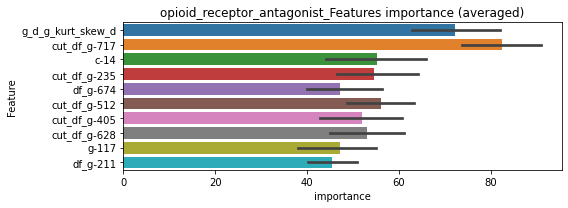

len(train_index) : 2778
len(valid_index) : 927
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.00399266	valid_1's binary_logloss: 0.0449715
Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 3/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00103681	valid_1's binary_logloss: 0.0321443
Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00177463	valid_1's binary_logloss: 0.0266487
Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.03766417223106356
opioid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00339311	valid_1's binary_logloss: 0.0468843


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000408515	valid_1's binary_logloss: 0.00948051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000441188	valid_1's binary_logloss: 0.0078803
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000433062	valid_1's binary_logloss: 0.00288825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419533	valid_1's binary_logloss: 0.00227722


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027897, Threshold: 0.0066891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0066891, conf_0:0.00468, conf_1:0.00870
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0366891
threshold: 0.0366891, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0366891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.0366891, conf_0:0.02935, conf_1:0.04403
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_1: 0.0666891
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000494881	valid_1's binary_logloss: 0.00874233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000402403	valid_1's binary_logloss: 0.00824055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000409785	valid_1's binary_logloss: 0.00246935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000413105	valid_1's binary_logloss: 0.00246909


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0305795, Threshold: 0.0666891, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0666891, conf_0:0.06002, conf_1:0.07336
threshold: 0.0666891, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


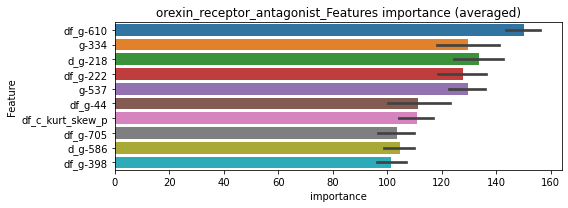

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000412459	valid_1's binary_logloss: 0.00922194


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[716]	training's binary_logloss: 0.000460688	valid_1's binary_logloss: 0.00932318


len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000411706	valid_1's binary_logloss: 0.00191076
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000412087	valid_1's binary_logloss: 0.00191051


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[871]	training's binary_logloss: 0.000418161	valid_1's binary_logloss: 0.00222634


orexin_receptor_antagonist logloss: 0.00567151561983485
p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000661168	valid_1's binary_logloss: 0.0172723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000660016	valid_1's binary_logloss: 0.0173125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000757567	valid_1's binary_logloss: 0.0125423
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.000558277	valid_1's binary_logloss: 0.018688


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0062367, Threshold: 0.0339920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 655/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0339920, conf_0:0.02379, conf_1:0.04419
Num_p_label: 22.0, Expected: 10.4, Adj_threshold_1: 0.0639920
Num_p_label: 14.0, Expected: 10.4, Adj_threshold_2: 0.0939920
threshold: 0.0939920, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[723]	training's binary_logloss: 0.000545868	valid_1's binary_logloss: 0.0130716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000592322	valid_1's binary_logloss: 0.0127144
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000557617	valid_1's binary_logloss: 0.0121288
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000588611	valid_1's binary_logloss: 0.0125816


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0297218, Threshold: 0.0939920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3803
p_label_rate: 0.0052737 Vs.target_rate: 0.00260
Num_p_label: 21.0, Expected: 10.4, Threshold: 0.0939920, conf_0:0.07519, conf_1:0.11279
Num_p_label: 16.0, Expected: 10.4, Adj_threshold_1: 0.1239920
Num_p_label: 10.0, Expected: 10.4, Adj_threshold_2: 0.1539920
threshold: 0.1539920, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.000538424	valid_1's binary_logloss: 0.0105619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000562716	valid_1's binary_logloss: 0.010794
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000544013	valid_1's binary_logloss: 0.010336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000514079	valid_1's binary_logloss: 0.0188376


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0268616, Threshold: 0.1539920, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00260
Num_p_label: 12.0, Expected: 10.4, Threshold: 0.1539920, conf_0:0.13859, conf_1:0.16939
threshold: 0.1539920, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3801, y_label_rate: 0.1715338


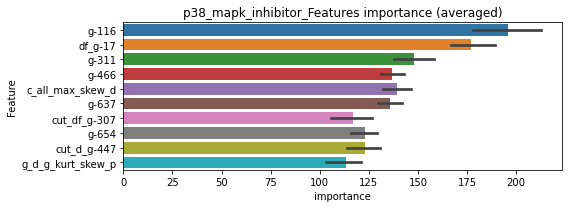

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000562907	valid_1's binary_logloss: 0.0125553


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000554614	valid_1's binary_logloss: 0.00869059


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[913]	training's binary_logloss: 0.000552854	valid_1's binary_logloss: 0.00892016


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.013393753904444979


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.0010987	valid_1's binary_logloss: 0.0234099


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000324215	valid_1's binary_logloss: 0.00118327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000329664	valid_1's binary_logloss: 0.00702921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.00033583	valid_1's binary_logloss: 0.000762062
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000329045	valid_1's binary_logloss: 0.00102209


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0019519, Threshold: 0.0123772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0123772, conf_0:0.00866, conf_1:0.01609
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_1: 0.0423772
threshold: 0.0423772, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.0423772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0047715 Vs.target_rate: 0.00101


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


Num_p_label: 19.0, Expected: 4.0, Threshold: 0.0423772, conf_0:0.03390, conf_1:0.05085
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_1: 0.0723772
Num_p_label: 7.0, Expected: 4.0, Adj_threshold_2: 0.1023772
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000320169	valid_1's binary_logloss: 0.0011892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000317473	valid_1's binary_logloss: 0.00837781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000317551	valid_1's binary_logloss: 0.000713356
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092413, Threshold: 0.1023772, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000320051	valid_1's binary_logloss: 0.0011166


p_label_rate: 0.0017579 Vs.target_rate: 0.00101
Num_p_label: 7.0, Expected: 4.0, Threshold: 0.1023772, conf_0:0.09214, conf_1:0.11261
threshold: 0.1023772, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


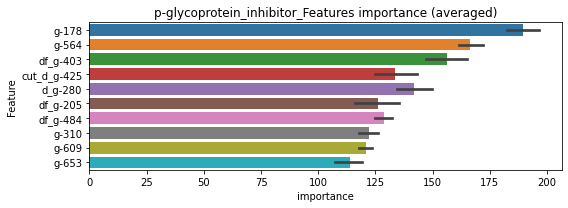

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317229	valid_1's binary_logloss: 0.000876293
Early stopping, best iteration is:
[999]	training's binary_logloss: 0.00031723	valid_1's binary_logloss: 0.000876292


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[893]	training's binary_logloss: 0.000323705	valid_1's binary_logloss: 0.00420855


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000315198	valid_1's binary_logloss: 0.000781709
Early stopping, best iteration is:
[1061]	training's binary_logloss: 0.000312716	valid_1's binary_logloss: 0.000776804


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000314982	valid_1's binary_logloss: 0.00122335
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00122157


p-glycoprotein_inhibitor logloss: 0.0017711761987129846
parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000715869	valid_1's binary_logloss: 0.0350298
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000577873	valid_1's binary_logloss: 0.011486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.00078412	valid_1's binary_logloss: 0.0106256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000576922	valid_1's binary_logloss: 0.0116081


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054800, Threshold: 0.0164058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0164058, conf_0:0.01148, conf_1:0.02133
Num_p_label: 8.0, Expected: 10.2, Adj_threshold_1: 0.0464058
threshold: 0.0464058, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000585599	valid_1's binary_logloss: 0.0108777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000536579	valid_1's binary_logloss: 0.0132389
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000586444	valid_1's binary_logloss: 0.00652355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000563155	valid_1's binary_logloss: 0.0156146


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0523554, Threshold: 0.0464058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3803
p_label_rate: 0.0105475 Vs.target_rate: 0.00256
Num_p_label: 42.0, Expected: 10.2, Threshold: 0.0464058, conf_0:0.03712, conf_1:0.05569
Num_p_label: 22.0, Expected: 10.2, Adj_threshold_1: 0.0764058
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_2: 0.1064058
threshold: 0.1064058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[711]	training's binary_logloss: 0.00053446	valid_1's binary_logloss: 0.0185102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000678772	valid_1's binary_logloss: 0.0210196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000541237	valid_1's binary_logloss: 0.00700009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000540321	valid_1's binary_logloss: 0.013672


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0334663, Threshold: 0.1064058, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0040181 Vs.target_rate: 0.00256
Num_p_label: 16.0, Expected: 10.2, Threshold: 0.1064058, conf_0:0.09577, conf_1:0.11705
Num_p_label: 12.0, Expected: 10.2, Adj_threshold_1: 0.1364058
threshold: 0.1364058, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3799, y_label_rate: 0.1716241


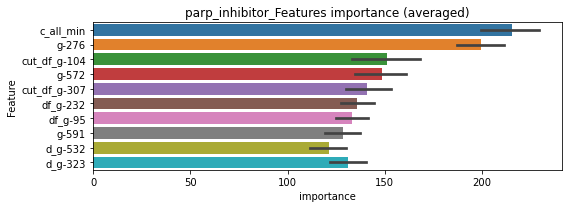

len(train_index) : 2849
len(valid_index) : 950
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[721]	training's binary_logloss: 0.000648383	valid_1's binary_logloss: 0.0111786


len(train_index) : 2849
len(valid_index) : 950
================================= fold 2/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000585885	valid_1's binary_logloss: 0.0137581


len(train_index) : 2849
len(valid_index) : 950
================================= fold 3/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[890]	training's binary_logloss: 0.000579447	valid_1's binary_logloss: 0.00622018


len(train_index) : 2850
len(valid_index) : 949
================================= fold 4/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000687076	valid_1's binary_logloss: 0.0163359


parp_inhibitor logloss: 0.011872014672635873


mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00919547	valid_1's binary_logloss: 0.119769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0110076	valid_1's binary_logloss: 0.120313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0098824	valid_1's binary_logloss: 0.127165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00615001	valid_1's binary_logloss: 0.106453


1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0250507, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 485 → Positive_corect_labels: 1332/8103
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.02622, conf_1:0.04869
threshold: 0.0374508, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1332.0/8103, y_label_rate: 0.1643836
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00324151	valid_1's binary_logloss: 0.0728806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00423956	valid_1's binary_logloss: 0.0754029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00286199	valid_1's binary_logloss: 0.0778892
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.990


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00561349	valid_1's binary_logloss: 0.0792957


y_Threshold: 0.0266138, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1274.0/7987
p_label_rate: 0.0045203 Vs.target_rate: 0.01247
Num_p_label: 18.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.02996, conf_1:0.04494
threshold: 0.0374508, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1274.0/7987, y_label_rate: 0.1595092
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00339926	valid_1's binary_logloss: 0.06169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00210291	valid_1's binary_logloss: 0.0535852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00335085	valid_1's binary_logloss: 0.0532971
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00219663	valid_1's binary_logloss: 0.052155


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0236220, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1245.0/7929
p_label_rate: 0.0035158 Vs.target_rate: 0.01247
Num_p_label: 14.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.03371, conf_1:0.04120
threshold: 0.0374508, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 1245.0/7929, y_label_rate: 0.1570185


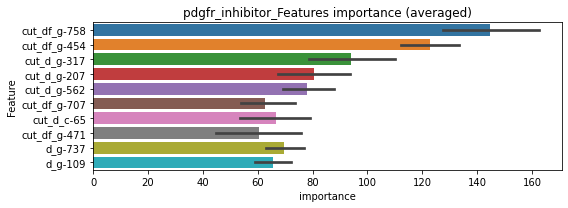

len(train_index) : 5946
len(valid_index) : 1983
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5947
len(valid_index) : 1982
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00255845	valid_1's binary_logloss: 0.0444188
Training until validation scores don't improve for 30 rounds


len(train_index) : 5947
len(valid_index) : 1982
================================= fold 3/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00447807	valid_1's binary_logloss: 0.0595492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00171253	valid_1's binary_logloss: 0.0344576


len(train_index) : 5947
len(valid_index) : 1982
================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


pdgfr_inhibitor logloss: 0.049663674158536494
pdgfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00472635	valid_1's binary_logloss: 0.0602317


pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000303859	valid_1's binary_logloss: 0.000878954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000376626	valid_1's binary_logloss: 0.00416869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.00030715	valid_1's binary_logloss: 0.00250519
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017407, Threshold: 0.0088878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0088878, conf_0:0.00622, conf_1:0.01155
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_1: 0.0388878


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000306272	valid_1's binary_logloss: 0.00117478


threshold: 0.0388878, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.0388878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.0388878, conf_0:0.03111, conf_1:0.04667
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.0688878
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_2: 0.0988878
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1288878
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_4: 0.1588878


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000295921	valid_1's binary_logloss: 0.000648199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000295253	valid_1's binary_logloss: 0.00470603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000300263	valid_1's binary_logloss: 0.00280845
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0233922, Threshold: 0.1588878, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1588878, conf_0:0.14300, conf_1:0.17478
threshold: 0.1588878, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000300998	valid_1's binary_logloss: 0.000791415


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


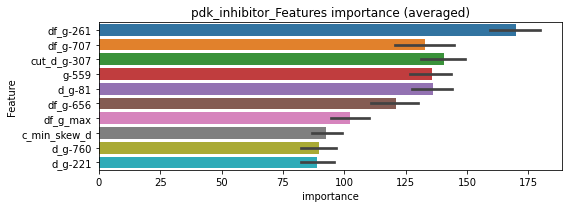

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000296469	valid_1's binary_logloss: 0.000619433


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[710]	training's binary_logloss: 0.00030566	valid_1's binary_logloss: 0.0035206
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000312411	valid_1's binary_logloss: 0.00214109
Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[801]	training's binary_logloss: 0.00029581	valid_1's binary_logloss: 0.000770914


pdk_inhibitor logloss: 0.001762708310924686


mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.0116901	valid_1's binary_logloss: 0.114508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0187954	valid_1's binary_logloss: 0.131192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0239658	valid_1's binary_logloss: 0.121152
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.976, PR-AUC:0.950
y_Threshold: 0.0332974, Threshold: 0.0462355, pos_neg_ratio: 0.8000000
Remove_noisy_data: 497 → Positive_corect_labels: 1271/7791


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0148757	valid_1's binary_logloss: 0.112058


p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.03236, conf_1:0.06011
threshold: 0.0462355, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1271.0/7791, y_label_rate: 0.1631370
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00920279	valid_1's binary_logloss: 0.0761126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0102959	valid_1's binary_logloss: 0.0815503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0077466	valid_1's binary_logloss: 0.0659945
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0367470, Threshold: 0.0462355, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 1200.0/7649


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00589336	valid_1's binary_logloss: 0.0712174


p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.03699, conf_1:0.05548
threshold: 0.0462355, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1200.0/7649, y_label_rate: 0.1568833
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00292161	valid_1's binary_logloss: 0.0498249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00426032	valid_1's binary_logloss: 0.05362
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00223632	valid_1's binary_logloss: 0.0327238
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0220349, Threshold: 0.0462355, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00324734	valid_1's binary_logloss: 0.0324029


Remove_noisy_data: 48 → Positive_corect_labels: 1176.0/7601
p_label_rate: 0.0012557 Vs.target_rate: 0.01109
Num_p_label: 5.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.04161, conf_1:0.05086
threshold: 0.0462355, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1176.0/7601, y_label_rate: 0.1547165


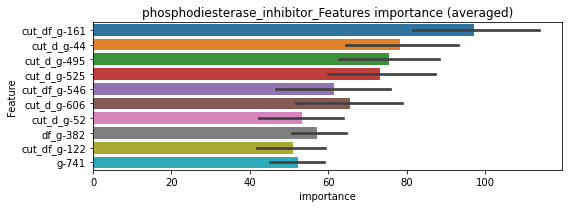

len(train_index) : 5700
len(valid_index) : 1901
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[134]	training's binary_logloss: 0.00463502	valid_1's binary_logloss: 0.0425353
Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00290991	valid_1's binary_logloss: 0.0345318
Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00161324	valid_1's binary_logloss: 0.0213407
Training until validation scores don't improve for 30 rounds


phosphodiesterase_inhibitor logloss: 0.031985904898723015
phosphodiesterase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00161417	valid_1's binary_logloss: 0.0295302


phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000341788	valid_1's binary_logloss: 0.00455987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000344932	valid_1's binary_logloss: 0.00613354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00036199	valid_1's binary_logloss: 0.00194627
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020529, Threshold: 0.0072677, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000349001	valid_1's binary_logloss: 0.00262725


Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0072677, conf_0:0.00509, conf_1:0.00945
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0372677
threshold: 0.0372677, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0372677, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00105
Num_p_label: 11.0, Expected: 4.2, Threshold: 0.0372677, conf_0:0.02981, conf_1:0.04472
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0672677
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000356471	valid_1's binary_logloss: 0.00377306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000335323	valid_1's binary_logloss: 0.00633129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000353185	valid_1's binary_logloss: 0.00201513
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0332263, Threshold: 0.0672677, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000337189	valid_1's binary_logloss: 0.00240913


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0672677, conf_0:0.06054, conf_1:0.07399
threshold: 0.0672677, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


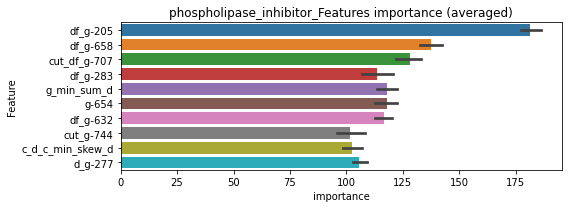

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[851]	training's binary_logloss: 0.000347908	valid_1's binary_logloss: 0.00275648


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000363413	valid_1's binary_logloss: 0.00455734


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000348799	valid_1's binary_logloss: 0.00159494


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000336658	valid_1's binary_logloss: 0.00218571


phospholipase_inhibitor logloss: 0.0027744707856874077


mutually exclusive columns: pi3k_inhibitor


pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00562763	valid_1's binary_logloss: 0.114444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.012591	valid_1's binary_logloss: 0.13113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00733393	valid_1's binary_logloss: 0.102218
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.984, PR-AUC:0.965
y_Threshold: 0.0248788, Threshold: 0.0397416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 242 → Positive_corect_labels: 696/4214
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.0397416, conf_0:0.02782, conf_1:0.05166
Num_p_label: 2.0, Expected: 25.2, Adj_threshold_1: 0.0697416


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00965291	valid_1's binary_logloss: 0.101418


threshold: 0.0697416, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 696.0/4214, y_label_rate: 0.1651637
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00483065	valid_1's binary_logloss: 0.0876421
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00670008	valid_1's binary_logloss: 0.0830475
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00415461	valid_1's binary_logloss: 0.0785122
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0285003, Threshold: 0.0697416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 668.0/4158
p_label_rate: 0.0020090 Vs.target_rate: 0.00634
Num_p_label: 8.0, Expected: 25.2, Threshold: 0.0697416, conf_0:0.05579, conf_1:0.08369
threshold: 0.0697416, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00497673	valid_1's binary_logloss: 0.0804426


positive_y_label: 668.0/4158, y_label_rate: 0.1606542
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00630708	valid_1's binary_logloss: 0.0750773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00251557	valid_1's binary_logloss: 0.0417235
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00103451	valid_1's binary_logloss: 0.032935
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0304757, Threshold: 0.0697416, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00244948	valid_1's binary_logloss: 0.0579202


Remove_noisy_data: 24 → Positive_corect_labels: 656.0/4134
p_label_rate: 0.0012557 Vs.target_rate: 0.00634
Num_p_label: 5.0, Expected: 25.2, Threshold: 0.0697416, conf_0:0.06277, conf_1:0.07672
threshold: 0.0697416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/4134, y_label_rate: 0.1586841


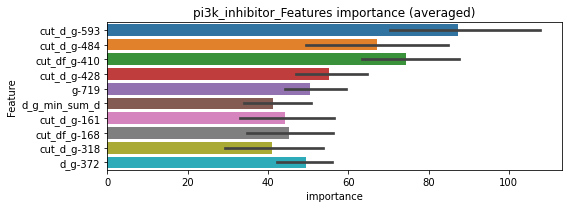

len(train_index) : 3100
len(valid_index) : 1034
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3100
len(valid_index) : 1034
================================= fold 2/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.0046901	valid_1's binary_logloss: 0.0790175
Training until validation scores don't improve for 30 rounds


len(train_index) : 3101
len(valid_index) : 1033
================================= fold 3/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00299875	valid_1's binary_logloss: 0.0575766
Training until validation scores don't improve for 30 rounds


len(train_index) : 3101
len(valid_index) : 1033
================================= fold 4/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00252815	valid_1's binary_logloss: 0.0312085
Training until validation scores don't improve for 30 rounds


pi3k_inhibitor logloss: 0.053714137381076374
pi3k_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.0030422	valid_1's binary_logloss: 0.0470257


pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000416481	valid_1's binary_logloss: 0.00431885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000423025	valid_1's binary_logloss: 0.0048987
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000416862	valid_1's binary_logloss: 0.00126668
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023141, Threshold: 0.0076017, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000406063	valid_1's binary_logloss: 0.00688213


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0076017, conf_0:0.00532, conf_1:0.00988
Num_p_label: 4.0, Expected: 5.2, Adj_threshold_1: 0.0376017
threshold: 0.0376017, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03008, conf_1:0.04512
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.00040065	valid_1's binary_logloss: 0.00422108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00041316	valid_1's binary_logloss: 0.004194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000404503	valid_1's binary_logloss: 0.00110191
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0292664, Threshold: 0.0376017, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000407159	valid_1's binary_logloss: 0.00590107


p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0376017, conf_0:0.03384, conf_1:0.04136
threshold: 0.0376017, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


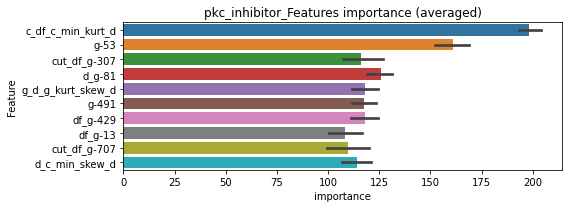

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[920]	training's binary_logloss: 0.000403586	valid_1's binary_logloss: 0.00419615


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000409293	valid_1's binary_logloss: 0.00447885


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000406051	valid_1's binary_logloss: 0.00101906


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000417528	valid_1's binary_logloss: 0.00457034


pkc_inhibitor logloss: 0.0035660991326001653
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000591296	valid_1's binary_logloss: 0.0230529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.00056468	valid_1's binary_logloss: 0.00995056
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000684819	valid_1's binary_logloss: 0.0141656
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052834, Threshold: 0.0231491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0231491, conf_0:0.01620, conf_1:0.03009


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00113494	valid_1's binary_logloss: 0.0289167


Num_p_label: 16.0, Expected: 9.2, Adj_threshold_1: 0.0531491
threshold: 0.0531491, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000596199	valid_1's binary_logloss: 0.0179022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.000519621	valid_1's binary_logloss: 0.0146445
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000531024	valid_1's binary_logloss: 0.0150026
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0408890, Threshold: 0.0531491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3792


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000879823	valid_1's binary_logloss: 0.0138202


p_label_rate: 0.0135610 Vs.target_rate: 0.00231
Num_p_label: 54.0, Expected: 9.2, Threshold: 0.0531491, conf_0:0.04252, conf_1:0.06378
Num_p_label: 40.0, Expected: 9.2, Adj_threshold_1: 0.0831491
Num_p_label: 34.0, Expected: 9.2, Adj_threshold_2: 0.1131491
Num_p_label: 31.0, Expected: 9.2, Adj_threshold_3: 0.1431491
Num_p_label: 27.0, Expected: 9.2, Adj_threshold_4: 0.1731491
Num_p_label: 23.0, Expected: 9.2, Adj_threshold_5: 0.2031491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_6: 0.2331491
threshold: 0.2331491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3792, y_label_rate: 0.1714135
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000646138	valid_1's binary_logloss: 0.0126771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00055593	valid_1's binary_logloss: 0.0176898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000614339	valid_1's binary_logloss: 0.0136931
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0396138, Threshold: 0.2331491, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3784


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000801197	valid_1's binary_logloss: 0.0179518


p_label_rate: 0.0072828 Vs.target_rate: 0.00231
Num_p_label: 29.0, Expected: 9.2, Threshold: 0.2331491, conf_0:0.20983, conf_1:0.25646
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_1: 0.2631491
Num_p_label: 24.0, Expected: 9.2, Adj_threshold_2: 0.2931491
Num_p_label: 21.0, Expected: 9.2, Adj_threshold_3: 0.3231491
threshold: 0.3231491, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 646.0/3784, y_label_rate: 0.1707188


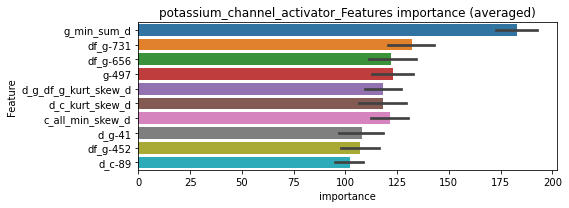

len(train_index) : 2838
len(valid_index) : 946
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000575052	valid_1's binary_logloss: 0.0184818


len(train_index) : 2838
len(valid_index) : 946
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[898]	training's binary_logloss: 0.000523504	valid_1's binary_logloss: 0.00553297


len(train_index) : 2838
len(valid_index) : 946
================================= fold 3/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000635876	valid_1's binary_logloss: 0.0110953


len(train_index) : 2838
len(valid_index) : 946
================================= fold 4/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.011042427989351754


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000738781	valid_1's binary_logloss: 0.00905533


potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00205557	valid_1's binary_logloss: 0.0872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00545629	valid_1's binary_logloss: 0.0881738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00189255	valid_1's binary_logloss: 0.0527574
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.988
y_Threshold: 0.0129714, Threshold: 0.0208773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0208773, conf_0:0.01461, conf_1:0.02714
Num_p_label: 4.0, Expected: 16.4, Adj_threshold_1: 0.0508773
threshold: 0.0508773, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00655113	valid_1's binary_logloss: 0.0916053


positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00533288	valid_1's binary_logloss: 0.0921305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00356352	valid_1's binary_logloss: 0.0854629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00237202	valid_1's binary_logloss: 0.0536818
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0269502, Threshold: 0.0508773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 619.0/3725
p_label_rate: 0.0022602 Vs.target_rate: 0.00412
Num_p_label: 9.0, Expected: 16.4, Threshold: 0.0508773, conf_0:0.04070, conf_1:0.06105


Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00212293	valid_1's binary_logloss: 0.0543309


threshold: 0.0508773, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 619.0/3725, y_label_rate: 0.1661745
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00188785	valid_1's binary_logloss: 0.0506927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00313227	valid_1's binary_logloss: 0.0470537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00189964	valid_1's binary_logloss: 0.044424
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0238522, Threshold: 0.0508773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 608.0/3703
p_label_rate: 0.0027624 Vs.target_rate: 0.00412
Num_p_label: 11.0, Expected: 16.4, Threshold: 0.0508773, conf_0:0.04579, conf_1:0.05597
threshold: 0.0508773, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00403764	valid_1's binary_logloss: 0.0540755


positive_y_label: 608.0/3703, y_label_rate: 0.1641912


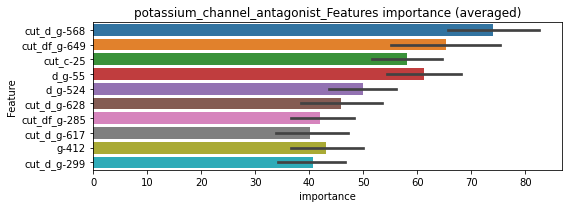

len(train_index) : 2777
len(valid_index) : 926
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2777
len(valid_index) : 926
================================= fold 2/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00351556	valid_1's binary_logloss: 0.058952
Training until validation scores don't improve for 30 rounds


len(train_index) : 2777
len(valid_index) : 926
================================= fold 3/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00415461	valid_1's binary_logloss: 0.0586485
Training until validation scores don't improve for 30 rounds


len(train_index) : 2778
len(valid_index) : 925
================================= fold 4/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00219331	valid_1's binary_logloss: 0.0264099
Training until validation scores don't improve for 30 rounds


potassium_channel_antagonist logloss: 0.04501626125759568
potassium_channel_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.0025914	valid_1's binary_logloss: 0.036045


ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00837903	valid_1's binary_logloss: 0.114581
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00962466	valid_1's binary_logloss: 0.100038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.0029804	valid_1's binary_logloss: 0.0613672
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.990, PR-AUC:0.979
y_Threshold: 0.0229873, Threshold: 0.0435818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0435818, conf_0:0.03051, conf_1:0.05666
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_1: 0.0735818
threshold: 0.0735818, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.00857171	valid_1's binary_logloss: 0.097432


positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00268665	valid_1's binary_logloss: 0.0725493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00425142	valid_1's binary_logloss: 0.0950689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00202427	valid_1's binary_logloss: 0.0348911
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0283495, Threshold: 0.0735818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 612.0/3713
p_label_rate: 0.0040181 Vs.target_rate: 0.00483
Num_p_label: 16.0, Expected: 19.2, Threshold: 0.0735818, conf_0:0.05887, conf_1:0.08830
threshold: 0.0735818, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00307595	valid_1's binary_logloss: 0.067164


positive_y_label: 612.0/3713, y_label_rate: 0.1648263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00187589	valid_1's binary_logloss: 0.0492428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00557535	valid_1's binary_logloss: 0.0800792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000697075	valid_1's binary_logloss: 0.0292394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00304799	valid_1's binary_logloss: 0.0567267


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0311465, Threshold: 0.0735818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 601.0/3691
p_label_rate: 0.0050226 Vs.target_rate: 0.00483
Num_p_label: 20.0, Expected: 19.2, Threshold: 0.0735818, conf_0:0.06622, conf_1:0.08094
threshold: 0.0735818, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 601.0/3691, y_label_rate: 0.1628285


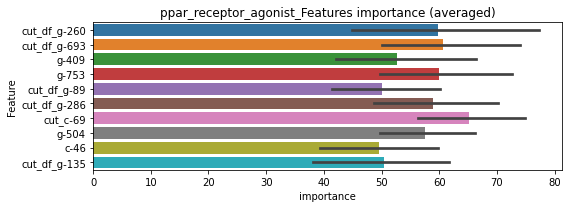

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2768
len(valid_index) : 923
================================= fold 2/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00232557	valid_1's binary_logloss: 0.0654015
Training until validation scores don't improve for 30 rounds


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00242406	valid_1's binary_logloss: 0.0481378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000763732	valid_1's binary_logloss: 0.0215868


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_agonist logloss: 0.04438750216742096
ppar_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00144193	valid_1's binary_logloss: 0.0424218


ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000366358	valid_1's binary_logloss: 0.0053949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000385224	valid_1's binary_logloss: 0.00698382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000387371	valid_1's binary_logloss: 0.00666135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021134, Threshold: 0.0048970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000388687	valid_1's binary_logloss: 0.00764665


Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048970, conf_0:0.00343, conf_1:0.00637
Num_p_label: 1.0, Expected: 5.0, Adj_threshold_1: 0.0348970
threshold: 0.0348970, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.02792, conf_1:0.04188
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.00039991	valid_1's binary_logloss: 0.005164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000377032	valid_1's binary_logloss: 0.00601901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000380852	valid_1's binary_logloss: 0.00703313
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000395263	valid_1's binary_logloss: 0.0083008


y_Threshold: 0.0115476, Threshold: 0.0348970, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0007534 Vs.target_rate: 0.00126
Num_p_label: 3.0, Expected: 5.0, Threshold: 0.0348970, conf_0:0.03141, conf_1:0.03839
threshold: 0.0348970, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


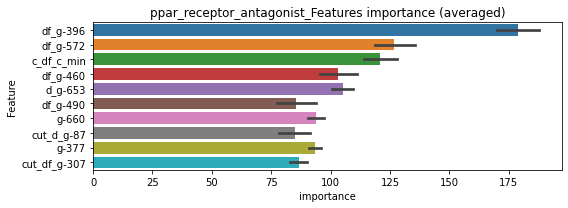

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[887]	training's binary_logloss: 0.000380512	valid_1's binary_logloss: 0.00405994


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000402632	valid_1's binary_logloss: 0.00608962


================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[821]	training's binary_logloss: 0.000389384	valid_1's binary_logloss: 0.00558689


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[772]	training's binary_logloss: 0.000399732	valid_1's binary_logloss: 0.00655074


ppar_receptor_antagonist logloss: 0.005571757465115935
progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00994564	valid_1's binary_logloss: 0.124634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00288193	valid_1's binary_logloss: 0.0986369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00338016	valid_1's binary_logloss: 0.0784876
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.0193608, Threshold: 0.1466365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.1466365, conf_0:0.10265, conf_1:0.19063
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_1: 0.1766365
Num_p_label: 24.0, Expected: 19.9, Adj_threshold_2: 0.2066365
threshold: 0.2066365, positive_p_label: 24.0/3982, p_label_rate: 0.0060271


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00766655	valid_1's binary_logloss: 0.0869857


positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00312827	valid_1's binary_logloss: 0.0746676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0053531	valid_1's binary_logloss: 0.075444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00228072	valid_1's binary_logloss: 0.0572408
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0325579, Threshold: 0.2066365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 597.0/3677
p_label_rate: 0.0175791 Vs.target_rate: 0.00500
Num_p_label: 70.0, Expected: 19.9, Threshold: 0.2066365, conf_0:0.16531, conf_1:0.24796
Num_p_label: 60.0, Expected: 19.9, Adj_threshold_1: 0.2366365
Num_p_label: 54.0, Expected: 19.9, Adj_threshold_2: 0.2666365
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_3: 0.2966365
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_4: 0.3266365
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_5: 0.3566365


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00477925	valid_1's binary_logloss: 0.0837252


Num_p_label: 31.0, Expected: 19.9, Adj_threshold_6: 0.3866365
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_7: 0.4166365
threshold: 0.4166365, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 597.0/3677, y_label_rate: 0.1623606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00287526	valid_1's binary_logloss: 0.0570779
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00222496	valid_1's binary_logloss: 0.058419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00201442	valid_1's binary_logloss: 0.0268299
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0298840, Threshold: 0.4166365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 586.0/3655
p_label_rate: 0.0102963 Vs.target_rate: 0.00500
Num_p_label: 41.0, Expected: 19.9, Threshold: 0.4166365, conf_0:0.37497, conf_1:0.45830
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_1: 0.4466365
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_2: 0.4766365
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_3: 0.5066365
threshold: 0.5066365, positive_p_label: 27.0/3982, p_label_rate: 0.0067805


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00271953	valid_1's binary_logloss: 0.0509064


positive_y_label: 586.0/3655, y_label_rate: 0.1603283


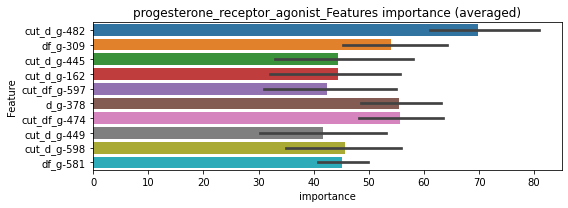

len(train_index) : 2741
len(valid_index) : 914
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2741
len(valid_index) : 914
================================= fold 2/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00306511	valid_1's binary_logloss: 0.0401037
Training until validation scores don't improve for 30 rounds


len(train_index) : 2741
len(valid_index) : 914
================================= fold 3/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00406875	valid_1's binary_logloss: 0.062844
Training until validation scores don't improve for 30 rounds


len(train_index) : 2742
len(valid_index) : 913
================================= fold 4/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00144983	valid_1's binary_logloss: 0.0309373
Training until validation scores don't improve for 30 rounds


progesterone_receptor_agonist logloss: 0.04423391164469981
progesterone_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0019948	valid_1's binary_logloss: 0.0430493


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000277713	valid_1's binary_logloss: 0.000907973
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000279951	valid_1's binary_logloss: 0.00204665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00028484	valid_1's binary_logloss: 0.000812225
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016934, Threshold: 0.0095456, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000282549	valid_1's binary_logloss: 0.0023644


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0095456, conf_0:0.00668, conf_1:0.01241
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0395456
threshold: 0.0395456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.0395456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0395456, conf_0:0.03164, conf_1:0.04745
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_1: 0.0695456


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0995456
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1295456
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_4: 0.1595456
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000264757	valid_1's binary_logloss: 0.000679783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000267085	valid_1's binary_logloss: 0.00180846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000271804	valid_1's binary_logloss: 0.000550218
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0677527, Threshold: 0.1595456, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.1595456, conf_0:0.14359, conf_1:0.17550
threshold: 0.1595456, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000261168	valid_1's binary_logloss: 0.00285401


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


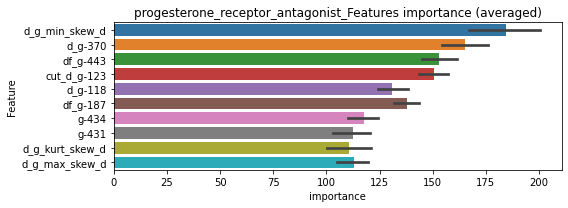

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953


Early stopping, best iteration is:
[846]	training's binary_logloss: 0.000267887	valid_1's binary_logloss: 0.000652794


================================= fold 2/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[875]	training's binary_logloss: 0.000263939	valid_1's binary_logloss: 0.000915315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000273948	valid_1's binary_logloss: 0.00055424


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.0009546801190595227


Early stopping, best iteration is:
[765]	training's binary_logloss: 0.000276211	valid_1's binary_logloss: 0.00169715


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000409494	valid_1's binary_logloss: 0.00539462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000420728	valid_1's binary_logloss: 0.0141561
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00118925	valid_1's binary_logloss: 0.0214538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000398748	valid_1's binary_logloss: 0.00375294


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0032271, Threshold: 0.0146420, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0146420, conf_0:0.01025, conf_1:0.01903
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_1: 0.0446420
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_2: 0.0746420
threshold: 0.0746420, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000803904	valid_1's binary_logloss: 0.0143284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[618]	training's binary_logloss: 0.000406889	valid_1's binary_logloss: 0.00176678
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000403523	valid_1's binary_logloss: 0.00211551
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0260777, Threshold: 0.0746420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000408588	valid_1's binary_logloss: 0.00739352


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00151
Num_p_label: 18.0, Expected: 6.0, Threshold: 0.0746420, conf_0:0.05971, conf_1:0.08957
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_1: 0.1046420
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.1346420
threshold: 0.1346420, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000467034	valid_1's binary_logloss: 0.00481321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.00041	valid_1's binary_logloss: 0.0038407
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000761023	valid_1's binary_logloss: 0.0187836
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185647, Threshold: 0.1346420, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000432244	valid_1's binary_logloss: 0.00952587


Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00151
Num_p_label: 16.0, Expected: 6.0, Threshold: 0.1346420, conf_0:0.12118, conf_1:0.14811
Num_p_label: 11.0, Expected: 6.0, Adj_threshold_1: 0.1646420
threshold: 0.1646420, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


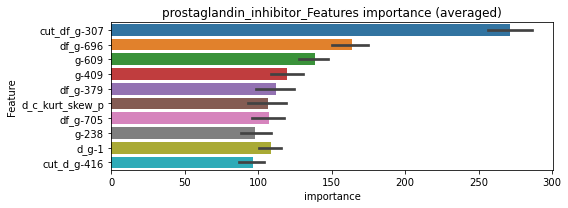

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[793]	training's binary_logloss: 0.000419464	valid_1's binary_logloss: 0.00399999


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[861]	training's binary_logloss: 0.000411303	valid_1's binary_logloss: 0.00454868


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000650485	valid_1's binary_logloss: 0.0129215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[899]	training's binary_logloss: 0.000408027	valid_1's binary_logloss: 0.00232709


prostaglandin_inhibitor logloss: 0.0059503484002416925
prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00136171	valid_1's binary_logloss: 0.0520613
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.0010062	valid_1's binary_logloss: 0.0395992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[717]	training's binary_logloss: 0.000765255	valid_1's binary_logloss: 0.0323504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000885718	valid_1's binary_logloss: 0.0317803


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0077072, Threshold: 0.0354928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 649/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0354928, conf_0:0.02484, conf_1:0.04614
Num_p_label: 25.0, Expected: 14.0, Adj_threshold_1: 0.0654928
Num_p_label: 17.0, Expected: 14.0, Adj_threshold_2: 0.0954928
threshold: 0.0954928, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 649.0/3789, y_label_rate: 0.1712853
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000898656	valid_1's binary_logloss: 0.044534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000717253	valid_1's binary_logloss: 0.0290786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00131727	valid_1's binary_logloss: 0.043775
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00127809	valid_1's binary_logloss: 0.0226384


y_Threshold: 0.0293022, Threshold: 0.0954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 641.0/3773
p_label_rate: 0.0150678 Vs.target_rate: 0.00353
Num_p_label: 60.0, Expected: 14.0, Threshold: 0.0954928, conf_0:0.07639, conf_1:0.11459
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_1: 0.1254928
Num_p_label: 45.0, Expected: 14.0, Adj_threshold_2: 0.1554928
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_3: 0.1854928
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.2154928
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_5: 0.2454928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_6: 0.2754928
Num_p_label: 34.0, Expected: 14.0, Adj_threshold_7: 0.3054928
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_8: 0.3354928
Num_p_label: 26.0, Expected: 14.0, Adj_threshold_9: 0.3654928
Num_p_label: 23.0, Expected: 14.0, Adj_threshold_10: 0.3954928
threshold: 0.3954928, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 641.0/3773, y_label_

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00078403	valid_1's binary_logloss: 0.0349538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.00124099	valid_1's binary_logloss: 0.0348159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[749]	training's binary_logloss: 0.000637854	valid_1's binary_logloss: 0.0204702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[709]	training's binary_logloss: 0.000680242	valid_1's binary_logloss: 0.0258788


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0242031, Threshold: 0.3954928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 635.0/3761
p_label_rate: 0.0085384 Vs.target_rate: 0.00353
Num_p_label: 34.0, Expected: 14.0, Threshold: 0.3954928, conf_0:0.35594, conf_1:0.43504
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_1: 0.4254928
Num_p_label: 28.0, Expected: 14.0, Adj_threshold_2: 0.4554928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_3: 0.4854928
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_4: 0.5154928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_5: 0.5454928
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_6: 0.5754928
Num_p_label: 22.0, Expected: 14.0, Adj_threshold_7: 0.6054928
Num_p_label: 21.0, Expected: 14.0, Adj_threshold_8: 0.6354928
threshold: 0.6354928, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 635.0/3761, y_label_rate: 0.1688381


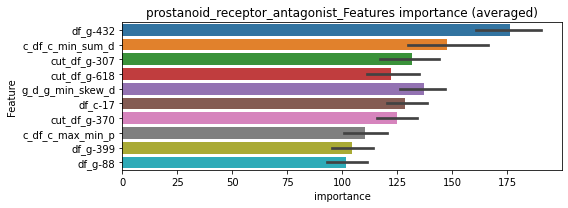

len(train_index) : 2820
len(valid_index) : 941
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 940
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000966871	valid_1's binary_logloss: 0.0333032
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.00081537	valid_1's binary_logloss: 0.017341


len(train_index) : 2821
len(valid_index) : 940
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[817]	training's binary_logloss: 0.000675781	valid_1's binary_logloss: 0.0224937


len(train_index) : 2821
len(valid_index) : 940
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000852138	valid_1's binary_logloss: 0.0236164


prostanoid_receptor_antagonist logloss: 0.024191006007237274
prostanoid_receptor_antagonist is unpredictable(><)!


mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.0437514	valid_1's binary_logloss: 0.213619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0406463	valid_1's binary_logloss: 0.217042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.0506605	valid_1's binary_logloss: 0.203912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.0298276	valid_1's binary_logloss: 0.207093


1 / 3, AUC score:0.904, PR-AUC:0.847
y_Threshold: 0.0744305, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1254 → Positive_corect_labels: 1623/11020
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.08308, conf_1:0.15430
threshold: 0.1186888, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1623.0/11020, y_label_rate: 0.1472777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00945422	valid_1's binary_logloss: 0.10365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00763558	valid_1's binary_logloss: 0.107999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00922208	valid_1's binary_logloss: 0.101036
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00626469	valid_1's binary_logloss: 0.0898432


2 / 3, AUC score:0.986, PR-AUC:0.967
y_Threshold: 0.0488839, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 262 → Positive_corect_labels: 1492.0/10758
p_label_rate: 0.0072828 Vs.target_rate: 0.03049
Num_p_label: 29.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.09495, conf_1:0.14243
threshold: 0.1186888, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1492.0/10758, y_label_rate: 0.1386875
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00266746	valid_1's binary_logloss: 0.0584949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00462876	valid_1's binary_logloss: 0.0693612
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00327706	valid_1's binary_logloss: 0.0665635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00186172	valid_1's binary_logloss: 0.0563629


3 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0336249, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1441.0/10656
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.10682, conf_1:0.13056
threshold: 0.1186888, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1441.0/10656, y_label_rate: 0.1352290


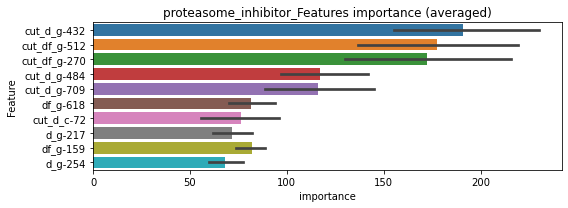

len(train_index) : 7992
len(valid_index) : 2664
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00450945	valid_1's binary_logloss: 0.0526492
Training until validation scores don't improve for 30 rounds


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.0026235	valid_1's binary_logloss: 0.0444815
Training until validation scores don't improve for 30 rounds


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 4/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00233702	valid_1's binary_logloss: 0.0542594
Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.049335848896248036
proteasome_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00466654	valid_1's binary_logloss: 0.0459533


protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000491676	valid_1's binary_logloss: 0.0174223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00050961	valid_1's binary_logloss: 0.0117172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000523487	valid_1's binary_logloss: 0.00583239
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.00058109	valid_1's binary_logloss: 0.0154698


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039932, Threshold: 0.0096547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0096547, conf_0:0.00676, conf_1:0.01255
Num_p_label: 2.0, Expected: 8.0, Adj_threshold_1: 0.0396547
threshold: 0.0396547, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000469603	valid_1's binary_logloss: 0.0151766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.00052394	valid_1's binary_logloss: 0.0102765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000494301	valid_1's binary_logloss: 0.00459526
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162039, Threshold: 0.0396547, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000666029	valid_1's binary_logloss: 0.01562


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0040181 Vs.target_rate: 0.00202
Num_p_label: 16.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03172, conf_1:0.04759
threshold: 0.0396547, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000513262	valid_1's binary_logloss: 0.0142952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.00049938	valid_1's binary_logloss: 0.00446279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000488633	valid_1's binary_logloss: 0.00284595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000509717	valid_1's binary_logloss: 0.0103807


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0390119, Threshold: 0.0396547, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0037670 Vs.target_rate: 0.00202
Num_p_label: 15.0, Expected: 8.0, Threshold: 0.0396547, conf_0:0.03569, conf_1:0.04362
threshold: 0.0396547, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3801, y_label_rate: 0.1720600


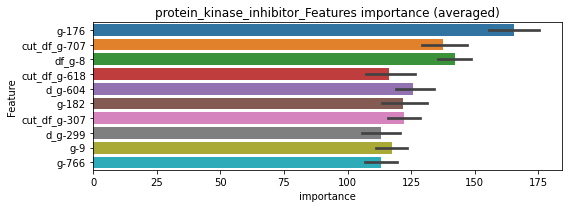

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[879]	training's binary_logloss: 0.000493391	valid_1's binary_logloss: 0.0122486


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000503822	valid_1's binary_logloss: 0.00538097


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000486245	valid_1's binary_logloss: 0.00306476
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000486258	valid_1's binary_logloss: 0.00306455


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000595066	valid_1's binary_logloss: 0.0109189


protein_kinase_inhibitor logloss: 0.007904643444722019
protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.00033932	valid_1's binary_logloss: 0.00348367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000327376	valid_1's binary_logloss: 0.00299297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000327845	valid_1's binary_logloss: 0.000816911
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016429, Threshold: 0.0051329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0051329, conf_0:0.00359, conf_1:0.00667
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0351329


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000340892	valid_1's binary_logloss: 0.00255995


threshold: 0.0351329, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[611]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0351329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0027624 Vs.target_rate: 0.00101
Num_p_label: 11.0, Expected: 4.0, Threshold: 0.0351329, conf_0:0.02811, conf_1:0.04216


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0651329
threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000328766	valid_1's binary_logloss: 0.00388957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000319584	valid_1's binary_logloss: 0.00273147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000319803	valid_1's binary_logloss: 0.000957946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0346806, Threshold: 0.0651329, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.0651329, conf_0:0.05862, conf_1:0.07165


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000321117	valid_1's binary_logloss: 0.00222883


threshold: 0.0651329, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


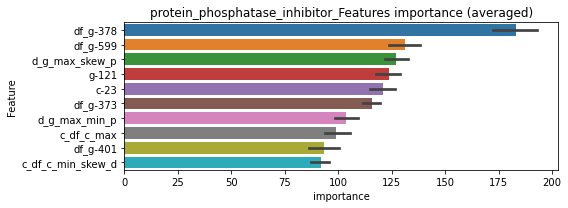

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000317951	valid_1's binary_logloss: 0.00342657
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000317444	valid_1's binary_logloss: 0.003423


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[906]	training's binary_logloss: 0.000326498	valid_1's binary_logloss: 0.00205364


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000328667	valid_1's binary_logloss: 0.000922425


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.002396749285680122


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000374456	valid_1's binary_logloss: 0.0031834


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.0116438	valid_1's binary_logloss: 0.111207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00307709	valid_1's binary_logloss: 0.0819162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00286936	valid_1's binary_logloss: 0.060539
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0174860, Threshold: 0.0295518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.0295518, conf_0:0.02069, conf_1:0.03842
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_1: 0.0595518
threshold: 0.0595518, positive_p_label: 25.0/3982, p_label_rate: 0.0062783


Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0060557	valid_1's binary_logloss: 0.0782997


positive_y_label: 641.0/3769, y_label_rate: 0.1700716
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00385059	valid_1's binary_logloss: 0.0775334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00295323	valid_1's binary_logloss: 0.0619276
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00251405	valid_1's binary_logloss: 0.0700979
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0214468, Threshold: 0.0595518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 624.0/3735
p_label_rate: 0.0065294 Vs.target_rate: 0.00433
Num_p_label: 26.0, Expected: 17.2, Threshold: 0.0595518, conf_0:0.04764, conf_1:0.07146
Num_p_label: 20.0, Expected: 17.2, Adj_threshold_1: 0.0895518


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00301894	valid_1's binary_logloss: 0.0634527


threshold: 0.0895518, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 624.0/3735, y_label_rate: 0.1670683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0044178	valid_1's binary_logloss: 0.0568347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00324736	valid_1's binary_logloss: 0.0624543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00205854	valid_1's binary_logloss: 0.0382518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00101837	valid_1's binary_logloss: 0.0542651


y_Threshold: 0.0233344, Threshold: 0.0895518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 613.0/3713
p_label_rate: 0.0050226 Vs.target_rate: 0.00433
Num_p_label: 20.0, Expected: 17.2, Threshold: 0.0895518, conf_0:0.08060, conf_1:0.09851
threshold: 0.0895518, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 613.0/3713, y_label_rate: 0.1650956


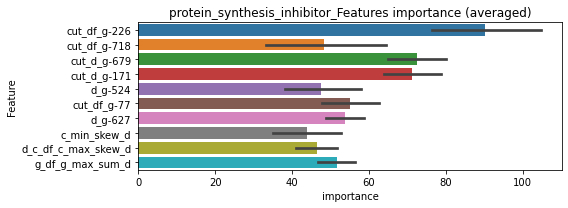

len(train_index) : 2784
len(valid_index) : 929
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 2/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00198738	valid_1's binary_logloss: 0.0413519
Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 3/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00448712	valid_1's binary_logloss: 0.0570777
Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 4/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00369155	valid_1's binary_logloss: 0.0595787
Training until validation scores don't improve for 30 rounds


protein_synthesis_inhibitor logloss: 0.0503255830901427
protein_synthesis_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00131162	valid_1's binary_logloss: 0.0433037


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000319232	valid_1's binary_logloss: 0.00183819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000311157	valid_1's binary_logloss: 0.00410234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000306367	valid_1's binary_logloss: 0.000725335
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014579, Threshold: 0.0050326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0050326, conf_0:0.00352, conf_1:0.00654
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0350326


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.000916248


threshold: 0.0350326, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.02803, conf_1:0.04204


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000312393	valid_1's binary_logloss: 0.00181928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000295313	valid_1's binary_logloss: 0.00385181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000299687	valid_1's binary_logloss: 0.000581033
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240301, Threshold: 0.0350326, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00080
Num_p_label: 7.0, Expected: 3.2, Threshold: 0.0350326, conf_0:0.03153, conf_1:0.03854


Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000297634	valid_1's binary_logloss: 0.000687171


threshold: 0.0350326, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


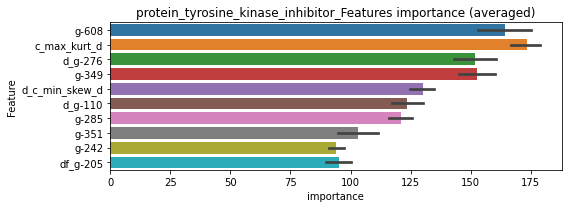

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[880]	training's binary_logloss: 0.000303712	valid_1's binary_logloss: 0.00184906


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[740]	training's binary_logloss: 0.000324842	valid_1's binary_logloss: 0.00307554
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766
Early stopping, best iteration is:
[996]	training's binary_logloss: 0.000300696	valid_1's binary_logloss: 0.000570766


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000295861	valid_1's binary_logloss: 0.000666286


protein_tyrosine_kinase_inhibitor logloss: 0.0015405056811311347
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000579168	valid_1's binary_logloss: 0.0221115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000556911	valid_1's binary_logloss: 0.0083508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[767]	training's binary_logloss: 0.000557115	valid_1's binary_logloss: 0.00396741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[725]	training's binary_logloss: 0.000551139	valid_1's binary_logloss: 0.0131059


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0050874, Threshold: 0.0126784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0126784, conf_0:0.00887, conf_1:0.01648
Num_p_label: 6.0, Expected: 9.4, Adj_threshold_1: 0.0426784
threshold: 0.0426784, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000564801	valid_1's binary_logloss: 0.021631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[695]	training's binary_logloss: 0.000565573	valid_1's binary_logloss: 0.00735881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00056168	valid_1's binary_logloss: 0.00366455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[729]	training's binary_logloss: 0.00054118	valid_1's binary_logloss: 0.0117699


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258194, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0040181 Vs.target_rate: 0.00235
Num_p_label: 16.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03414, conf_1:0.05121
threshold: 0.0426784, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.0011398	valid_1's binary_logloss: 0.0263916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000574396	valid_1's binary_logloss: 0.00972992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[712]	training's binary_logloss: 0.000548322	valid_1's binary_logloss: 0.0154136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[698]	training's binary_logloss: 0.00055656	valid_1's binary_logloss: 0.00887168


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0280362, Threshold: 0.0426784, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3798
p_label_rate: 0.0047715 Vs.target_rate: 0.00235
Num_p_label: 19.0, Expected: 9.4, Threshold: 0.0426784, conf_0:0.03841, conf_1:0.04695
threshold: 0.0426784, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3798, y_label_rate: 0.1716693


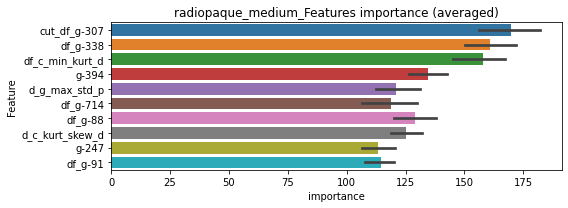

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[812]	training's binary_logloss: 0.000589193	valid_1's binary_logloss: 0.0101


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000543479	valid_1's binary_logloss: 0.0105856


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000542081	valid_1's binary_logloss: 0.00577422
Early stopping, best iteration is:
[1014]	training's binary_logloss: 0.000539843	valid_1's binary_logloss: 0.00576104


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.01071430160772403


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.00098609	valid_1's binary_logloss: 0.0164086


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0239803	valid_1's binary_logloss: 0.201533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.0359125	valid_1's binary_logloss: 0.215021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.0213732	valid_1's binary_logloss: 0.181699
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.929, PR-AUC:0.887
y_Threshold: 0.0586130, Threshold: 0.2980942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 337 → Positive_corect_labels: 548/3572
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.2980942, conf_0:0.20867, conf_1:0.38752
threshold: 0.2980942, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0225404	valid_1's binary_logloss: 0.17183


positive_y_label: 548.0/3572, y_label_rate: 0.1534155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0103122	valid_1's binary_logloss: 0.115114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0095156	valid_1's binary_logloss: 0.104379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00397233	valid_1's binary_logloss: 0.0824767
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.992, PR-AUC:0.977
y_Threshold: 0.0509077, Threshold: 0.2980942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 511.0/3498
p_label_rate: 0.0301356 Vs.target_rate: 0.00936
Num_p_label: 120.0, Expected: 37.3, Threshold: 0.2980942, conf_0:0.23848, conf_1:0.35771
Num_p_label: 113.0, Expected: 37.3, Adj_threshold_1: 0.3280942
Num_p_label: 104.0, Expected: 37.3, Adj_threshold_2: 0.3580942
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_3: 0.3880942
Num_p_label: 85.0, Expected: 37.3, Adj_threshold_4: 0.4180942


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00485821	valid_1's binary_logloss: 0.0934404


Num_p_label: 82.0, Expected: 37.3, Adj_threshold_5: 0.4480942
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_6: 0.4780942
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_7: 0.5080942
Num_p_label: 58.0, Expected: 37.3, Adj_threshold_8: 0.5380942
Num_p_label: 48.0, Expected: 37.3, Adj_threshold_9: 0.5680942
threshold: 0.5680942, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 511.0/3498, y_label_rate: 0.1460835
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00427549	valid_1's binary_logloss: 0.0874449
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.0023192	valid_1's binary_logloss: 0.0539922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00153461	valid_1's binary_logloss: 0.0366535
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.994


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00544072	valid_1's binary_logloss: 0.0920869


y_Threshold: 0.0471509, Threshold: 0.5680942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 496.0/3468
p_label_rate: 0.0258664 Vs.target_rate: 0.00936
Num_p_label: 103.0, Expected: 37.3, Threshold: 0.5680942, conf_0:0.51128, conf_1:0.62490
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_1: 0.5980942
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_2: 0.6280942
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_3: 0.6580942
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_4: 0.6880942
Num_p_label: 68.0, Expected: 37.3, Adj_threshold_5: 0.7180942
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_6: 0.7480942
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_7: 0.7780942
Num_p_label: 60.0, Expected: 37.3, Adj_threshold_8: 0.8080942
Num_p_label: 46.0, Expected: 37.3, Adj_threshold_9: 0.8380942
threshold: 0.8380942, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 496.0/3468, y_label_rate: 0.1430219


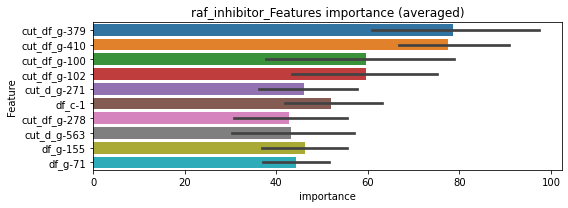

len(train_index) : 2601
len(valid_index) : 867
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 2/4 raf_inhibitor=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00271567	valid_1's binary_logloss: 0.0676788
Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 3/4 raf_inhibitor=================================


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00220844	valid_1's binary_logloss: 0.0538226
Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 4/4 raf_inhibitor=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00403266	valid_1's binary_logloss: 0.0481181
Training until validation scores don't improve for 30 rounds


raf_inhibitor logloss: 0.06311160132879369
raf_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[144]	training's binary_logloss: 0.00626421	valid_1's binary_logloss: 0.0828269


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:307
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000241248	valid_1's binary_logloss: 0.00174213
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000247485	valid_1's binary_logloss: 0.000999958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000235575	valid_1's binary_logloss: 0.00113212
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009881, Threshold: 0.0110296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0110296, conf_0:0.00772, conf_1:0.01434
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_1: 0.0410296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_2: 0.0710296
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_3: 0.1010296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.1310296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.1610296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1910296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2210296


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000244599	valid_1's binary_logloss: 0.00128497


Num_p_label: 4.0, Expected: 2.0, Adj_threshold_8: 0.2510296
threshold: 0.2510296, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.2510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0047715 Vs.target_rate: 0.00050
Num_p_label: 19.0, Expected: 2.0, Threshold: 0.2510296, conf_0:0.20082, conf_1:0.30124
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2810296
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.3110296
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_3: 0.3410296
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_4: 0.3710296
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_5: 0.4010296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_6: 0.4310296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_7: 0.4610296
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.4910296
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_9: 0.5210296
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_10: 0.5510296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.5510296, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000222637	valid_1's binary_logloss: 0.00177364
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000224124	valid_1's binary_logloss: 0.000631028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000217751	valid_1's binary_logloss: 0.000311324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0526686, Threshold: 0.5510296, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.5510296, conf_0:0.49593, conf_1:0.60613
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.5810296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.6110296
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_3: 0.6410296
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_4: 0.6710296
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_5: 0.7010296


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000224528	valid_1's binary_logloss: 0.0028682


threshold: 0.7010296, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


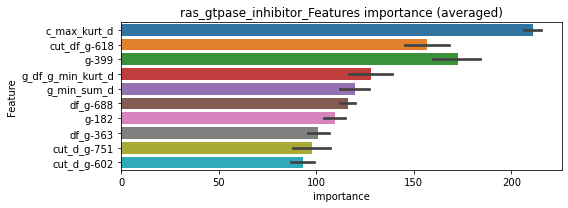

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[907]	training's binary_logloss: 0.000221793	valid_1's binary_logloss: 0.000961658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000221093	valid_1's binary_logloss: 0.000560931


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.000218179	valid_1's binary_logloss: 0.000357093


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.00080761302378241


Early stopping, best iteration is:
[808]	training's binary_logloss: 0.000227136	valid_1's binary_logloss: 0.00135031


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000600013	valid_1's binary_logloss: 0.0199899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000591521	valid_1's binary_logloss: 0.0124193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00120843	valid_1's binary_logloss: 0.0268694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.00070928	valid_1's binary_logloss: 0.019116


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0079338, Threshold: 0.1120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.1120765, conf_0:0.07845, conf_1:0.14570
Num_p_label: 37.0, Expected: 11.2, Adj_threshold_1: 0.1420765
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_2: 0.1720765
Num_p_label: 31.0, Expected: 11.2, Adj_threshold_3: 0.2020765
Num_p_label: 28.0, Expected: 11.2, Adj_threshold_4: 0.2320765
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_5: 0.2620765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_6: 0.2920765
Num_p_label: 22.0, Expected: 11.2, Adj_threshold_7: 0.3220765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_8: 0.3520765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_9: 0.3820765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_10: 0.4120765
threshold: 0.4120765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.000568118	valid_1's binary_logloss: 0.012655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[747]	training's binary_logloss: 0.00056491	valid_1's binary_logloss: 0.0124414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000819545	valid_1's binary_logloss: 0.022134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000613118	valid_1's binary_logloss: 0.0154896


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0573141, Threshold: 0.4120765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3786
p_label_rate: 0.0067805 Vs.target_rate: 0.00281
Num_p_label: 27.0, Expected: 11.2, Threshold: 0.4120765, conf_0:0.32966, conf_1:0.49449
Num_p_label: 26.0, Expected: 11.2, Adj_threshold_1: 0.4420765
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_2: 0.4720765
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_3: 0.5020765
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_4: 0.5320765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5620765
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_6: 0.5920765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_7: 0.6220765
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_8: 0.6520765
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_9: 0.6820765
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 648.0/3786, y_label_rate: 0.1711569
===========

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000578602	valid_1's binary_logloss: 0.0150932
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000560712	valid_1's binary_logloss: 0.00858464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.000558078	valid_1's binary_logloss: 0.00988236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000588664	valid_1's binary_logloss: 0.0205978


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0509075, Threshold: 0.6820765, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0040181 Vs.target_rate: 0.00281
Num_p_label: 16.0, Expected: 11.2, Threshold: 0.6820765, conf_0:0.61387, conf_1:0.75028
threshold: 0.6820765, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091


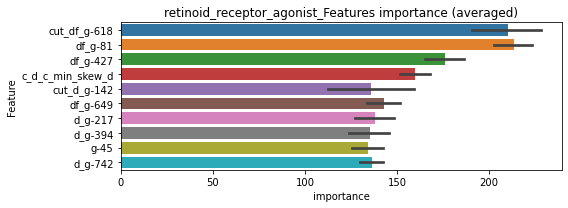

len(train_index) : 2836
len(valid_index) : 946
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000823011	valid_1's binary_logloss: 0.0172137


len(train_index) : 2836
len(valid_index) : 946
================================= fold 2/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[789]	training's binary_logloss: 0.000638855	valid_1's binary_logloss: 0.0116034


len(train_index) : 2837
len(valid_index) : 945
================================= fold 3/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[663]	training's binary_logloss: 0.000735229	valid_1's binary_logloss: 0.0152572


len(train_index) : 2837
len(valid_index) : 945
================================= fold 4/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000557902	valid_1's binary_logloss: 0.0128442
Early stopping, best iteration is:
[976]	training's binary_logloss: 0.000562813	valid_1's binary_logloss: 0.012837


retinoid_receptor_agonist logloss: 0.01422790916358012
retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000158996	valid_1's binary_logloss: 0.0002558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000153993	valid_1's binary_logloss: 0.00118872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000157251	valid_1's binary_logloss: 0.00019166
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004254, Threshold: 0.0018458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0018458, conf_0:0.00129, conf_1:0.00240
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0318458
threshold: 0.0318458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000157616	valid_1's binary_logloss: 0.00019353


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0318458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0027624 Vs.target_rate: 0.00025
Num_p_label: 11.0, Expected: 1.0, Threshold: 0.0318458, conf_0:0.02548, conf_1:0.03821
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0618458
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0918458
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000145828	valid_1's binary_logloss: 0.000197993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000145722	valid_1's binary_logloss: 0.000818692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000144298	valid_1's binary_logloss: 0.0001582
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0993328, Threshold: 0.0918458, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0918458, conf_0:0.08266, conf_1:0.10103
threshold: 0.0918458, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000145643	valid_1's binary_logloss: 0.000188183


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


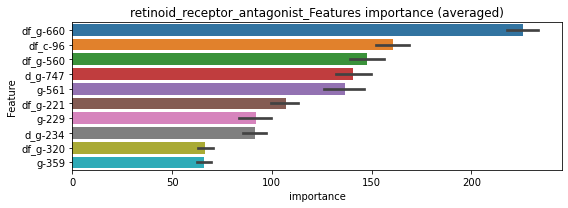

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00015086	valid_1's binary_logloss: 0.000204671


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1218]	training's binary_logloss: 0.000148034	valid_1's binary_logloss: 0.000201582
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149936	valid_1's binary_logloss: 0.000336083


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1168]	training's binary_logloss: 0.000147451	valid_1's binary_logloss: 0.000331931
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150277	valid_1's binary_logloss: 0.000167362


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[1198]	training's binary_logloss: 0.000147129	valid_1's binary_logloss: 0.00016394
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000149814	valid_1's binary_logloss: 0.000197534


retinoid_receptor_antagonist logloss: 0.00022271283326585052


Early stopping, best iteration is:
[1197]	training's binary_logloss: 0.000146523	valid_1's binary_logloss: 0.00019342


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000386481	valid_1's binary_logloss: 0.00556873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[679]	training's binary_logloss: 0.000390844	valid_1's binary_logloss: 0.00220317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000401822	valid_1's binary_logloss: 0.00156343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000402581	valid_1's binary_logloss: 0.00728983


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027323, Threshold: 0.0088430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0088430, conf_0:0.00619, conf_1:0.01150
Num_p_label: 8.0, Expected: 5.9, Adj_threshold_1: 0.0388430
threshold: 0.0388430, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0388430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0045203 Vs.target_rate: 0.00147
Num_p_label: 18.0, Expected: 5.9, Threshold: 0.0388430, conf_0:0.03107, conf_1:0.04661
Num_p_label: 10.0, Expected: 5.9, Adj_threshold_1: 0.0688430
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000406353	valid_1's binary_logloss: 0.00464897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000381412	valid_1's binary_logloss: 0.00188253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000378645	valid_1's binary_logloss: 0.00137419
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0524811, Threshold: 0.0688430, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388802	valid_1's binary_logloss: 0.00802916


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00147
Num_p_label: 10.0, Expected: 5.9, Threshold: 0.0688430, conf_0:0.06196, conf_1:0.07573
threshold: 0.0688430, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


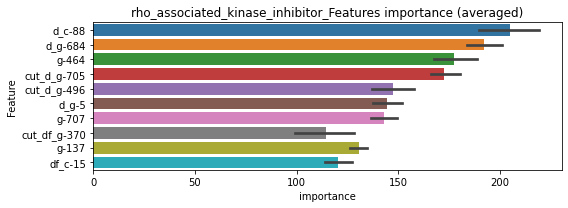

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000443649	valid_1's binary_logloss: 0.00472694


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000387845	valid_1's binary_logloss: 0.00205123
Early stopping, best iteration is:
[991]	training's binary_logloss: 0.000388025	valid_1's binary_logloss: 0.00204981


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302
Early stopping, best iteration is:
[994]	training's binary_logloss: 0.000392353	valid_1's binary_logloss: 0.00169302


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000417958	valid_1's binary_logloss: 0.00740796


rho_associated_kinase_inhibitor logloss: 0.003969788163542875
ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000435251	valid_1's binary_logloss: 0.00511967
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000433463	valid_1's binary_logloss: 0.0154395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000428876	valid_1's binary_logloss: 0.00324159
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000440358	valid_1's binary_logloss: 0.00648012


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042396, Threshold: 0.0168931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0168931, conf_0:0.01183, conf_1:0.02196
Num_p_label: 17.0, Expected: 6.2, Adj_threshold_1: 0.0468931
Num_p_label: 7.0, Expected: 6.2, Adj_threshold_2: 0.0768931
threshold: 0.0768931, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000402945	valid_1's binary_logloss: 0.00473002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000426008	valid_1's binary_logloss: 0.0190255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000414182	valid_1's binary_logloss: 0.00160877
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0312586, Threshold: 0.0768931, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[601]	training's binary_logloss: 0.000425687	valid_1's binary_logloss: 0.00558066


Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0080362 Vs.target_rate: 0.00155
Num_p_label: 32.0, Expected: 6.2, Threshold: 0.0768931, conf_0:0.06151, conf_1:0.09227
Num_p_label: 24.0, Expected: 6.2, Adj_threshold_1: 0.1068931
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1368931
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_3: 0.1668931
threshold: 0.1668931, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000400513	valid_1's binary_logloss: 0.00631995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000439352	valid_1's binary_logloss: 0.00625045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[657]	training's binary_logloss: 0.00040502	valid_1's binary_logloss: 0.00304631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000408874	valid_1's binary_logloss: 0.013205


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0442352, Threshold: 0.1668931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0042692 Vs.target_rate: 0.00155
Num_p_label: 17.0, Expected: 6.2, Threshold: 0.1668931, conf_0:0.15020, conf_1:0.18358
Num_p_label: 12.0, Expected: 6.2, Adj_threshold_1: 0.1968931
threshold: 0.1968931, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


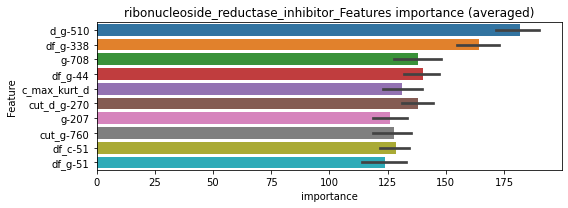

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[946]	training's binary_logloss: 0.000402549	valid_1's binary_logloss: 0.00231908


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.000418729	valid_1's binary_logloss: 0.00225364


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000407754	valid_1's binary_logloss: 0.00437841


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000439685	valid_1's binary_logloss: 0.0103358


ribonucleoside_reductase_inhibitor logloss: 0.004821203826306415
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000354943	valid_1's binary_logloss: 0.00148762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.00033819	valid_1's binary_logloss: 0.00385745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000345819	valid_1's binary_logloss: 0.000897793
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020960, Threshold: 0.0057738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0057738, conf_0:0.00404, conf_1:0.00751


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000354238	valid_1's binary_logloss: 0.000996872


Num_p_label: 5.0, Expected: 4.2, Adj_threshold_1: 0.0357738
threshold: 0.0357738, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0357738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0047715 Vs.target_rate: 0.00105
Num_p_label: 19.0, Expected: 4.2, Threshold: 0.0357738, conf_0:0.02862, conf_1:0.04293
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0657738
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0957738


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000335057	valid_1's binary_logloss: 0.00150299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000330474	valid_1's binary_logloss: 0.00306161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000339309	valid_1's binary_logloss: 0.000812289
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1006882, Threshold: 0.0957738, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0017579 Vs.target_rate: 0.00105
Num_p_label: 7.0, Expected: 4.2, Threshold: 0.0957738, conf_0:0.08620, conf_1:0.10535


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000341008	valid_1's binary_logloss: 0.000792369


threshold: 0.0957738, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


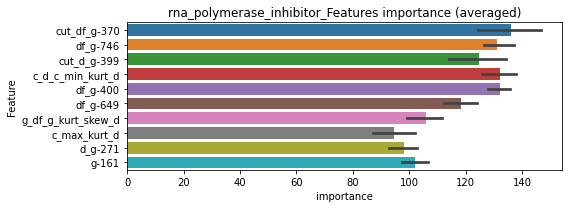

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000348768	valid_1's binary_logloss: 0.00137485


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[769]	training's binary_logloss: 0.000348446	valid_1's binary_logloss: 0.00249289


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[859]	training's binary_logloss: 0.000344233	valid_1's binary_logloss: 0.000846718


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.000341533	valid_1's binary_logloss: 0.000768076


rna_polymerase_inhibitor logloss: 0.0013709289075839973


mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0160853	valid_1's binary_logloss: 0.125037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.0214742	valid_1's binary_logloss: 0.147604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0114628	valid_1's binary_logloss: 0.116981
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.973, PR-AUC:0.948
y_Threshold: 0.0301761, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 426 → Positive_corect_labels: 1073/6588
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.02873, conf_1:0.05335


Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0153878	valid_1's binary_logloss: 0.118348


threshold: 0.0410371, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1073.0/6588, y_label_rate: 0.1628719
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00695641	valid_1's binary_logloss: 0.0701466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00717212	valid_1's binary_logloss: 0.0871455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00818864	valid_1's binary_logloss: 0.0742648
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0276726, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1016.0/6474
p_label_rate: 0.0123054 Vs.target_rate: 0.00991
Num_p_label: 49.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03283, conf_1:0.04924


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00705567	valid_1's binary_logloss: 0.0835806


threshold: 0.0410371, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1016.0/6474, y_label_rate: 0.1569354
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00265563	valid_1's binary_logloss: 0.0414265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00369485	valid_1's binary_logloss: 0.0525941
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00518734	valid_1's binary_logloss: 0.0540612
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0274605, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 978.0/6398
p_label_rate: 0.0148167 Vs.target_rate: 0.00991
Num_p_label: 59.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03693, conf_1:0.04514
threshold: 0.0410371, positive_p_label: 59.0/3982, p_label_rate: 0.0148167


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00615675	valid_1's binary_logloss: 0.0524251


positive_y_label: 978.0/6398, y_label_rate: 0.1528603


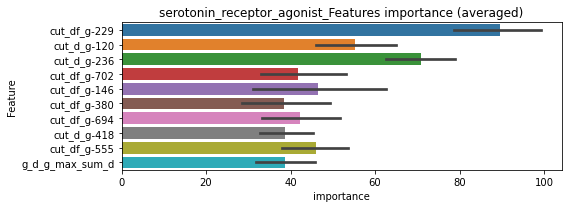

len(train_index) : 4798
len(valid_index) : 1600
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4798
len(valid_index) : 1600
================================= fold 2/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00339201	valid_1's binary_logloss: 0.0361147
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00205656	valid_1's binary_logloss: 0.0254161
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00166416	valid_1's binary_logloss: 0.0229444
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.028148670591242004
serotonin_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00251353	valid_1's binary_logloss: 0.0281162
mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0352028	valid_1's binary_logloss: 0.180189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.032988	valid_1's binary_logloss: 0.197172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0295892	valid_1's binary_logloss: 0.17341
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.936, PR-AUC:0.895
y_Threshold: 0.0528319, Threshold: 0.0750119, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0234337	valid_1's binary_logloss: 0.165634


Remove_noisy_data: 685 → Positive_corect_labels: 1146/7435
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.05251, conf_1:0.09752
threshold: 0.0750119, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1146.0/7435, y_label_rate: 0.1541358
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00700815	valid_1's binary_logloss: 0.0899634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0103122	valid_1's binary_logloss: 0.106528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00751156	valid_1's binary_logloss: 0.0777861
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00692338	valid_1's binary_logloss: 0.0878914


2 / 3, AUC score:0.992, PR-AUC:0.979
y_Threshold: 0.0386672, Threshold: 0.0750119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1073.0/7289
p_label_rate: 0.0020090 Vs.target_rate: 0.01696
Num_p_label: 8.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.06001, conf_1:0.09001
threshold: 0.0750119, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1073.0/7289, y_label_rate: 0.1472081
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00394291	valid_1's binary_logloss: 0.0538075
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00390934	valid_1's binary_logloss: 0.0615115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00620679	valid_1's binary_logloss: 0.0690657
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0270746, Threshold: 0.0750119, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00412117	valid_1's binary_logloss: 0.0666956


Remove_noisy_data: 92 → Positive_corect_labels: 1027.0/7197
p_label_rate: 0.0012557 Vs.target_rate: 0.01696
Num_p_label: 5.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.06751, conf_1:0.08251
threshold: 0.0750119, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1027.0/7197, y_label_rate: 0.1426983


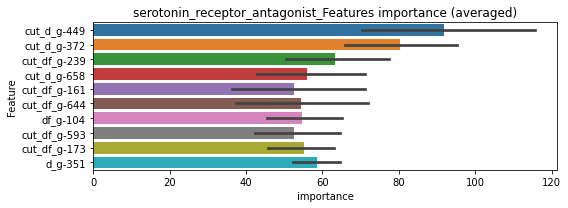

len(train_index) : 5397
len(valid_index) : 1800
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00286826	valid_1's binary_logloss: 0.0436299
Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00573393	valid_1's binary_logloss: 0.0477499
Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00298627	valid_1's binary_logloss: 0.0544835
Training until validation scores don't improve for 30 rounds


serotonin_receptor_antagonist logloss: 0.04666399634902006
serotonin_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00235167	valid_1's binary_logloss: 0.0407944


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000481631	valid_1's binary_logloss: 0.0139622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000481793	valid_1's binary_logloss: 0.0176506
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000480233	valid_1's binary_logloss: 0.00588243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000471486	valid_1's binary_logloss: 0.0163946


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030273, Threshold: 0.0328197, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0328197, conf_0:0.02297, conf_1:0.04267
Num_p_label: 22.0, Expected: 7.4, Adj_threshold_1: 0.0628197
Num_p_label: 16.0, Expected: 7.4, Adj_threshold_2: 0.0928197
threshold: 0.0928197, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000480925	valid_1's binary_logloss: 0.0129391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000535192	valid_1's binary_logloss: 0.0182474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000493064	valid_1's binary_logloss: 0.00651777
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0341137, Threshold: 0.0928197, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000513819	valid_1's binary_logloss: 0.0170887


Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0198393 Vs.target_rate: 0.00185
Num_p_label: 79.0, Expected: 7.4, Threshold: 0.0928197, conf_0:0.07426, conf_1:0.11138
Num_p_label: 67.0, Expected: 7.4, Adj_threshold_1: 0.1228197
Num_p_label: 58.0, Expected: 7.4, Adj_threshold_2: 0.1528197
Num_p_label: 47.0, Expected: 7.4, Adj_threshold_3: 0.1828197
Num_p_label: 44.0, Expected: 7.4, Adj_threshold_4: 0.2128197
Num_p_label: 40.0, Expected: 7.4, Adj_threshold_5: 0.2428197
Num_p_label: 36.0, Expected: 7.4, Adj_threshold_6: 0.2728197
Num_p_label: 33.0, Expected: 7.4, Adj_threshold_7: 0.3028197
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_8: 0.3328197
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_9: 0.3628197
Num_p_label: 23.0, Expected: 7.4, Adj_threshold_10: 0.3928197
threshold: 0.3928197, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000485023	valid_1's binary_logloss: 0.0162296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.0004572	valid_1's binary_logloss: 0.0113446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000465141	valid_1's binary_logloss: 0.0128431
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250144, Threshold: 0.3928197, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000481083	valid_1's binary_logloss: 0.00472428


Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0080362 Vs.target_rate: 0.00185
Num_p_label: 32.0, Expected: 7.4, Threshold: 0.3928197, conf_0:0.35354, conf_1:0.43210
Num_p_label: 28.0, Expected: 7.4, Adj_threshold_1: 0.4228197
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_2: 0.4528197
Num_p_label: 24.0, Expected: 7.4, Adj_threshold_3: 0.4828197
Num_p_label: 21.0, Expected: 7.4, Adj_threshold_4: 0.5128197
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_5: 0.5428197
threshold: 0.5428197, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


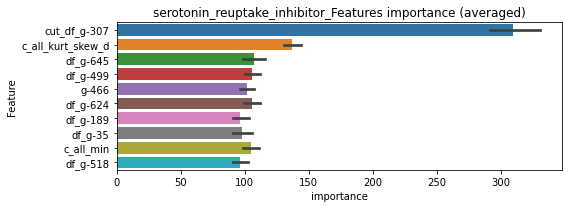

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951


Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000524844	valid_1's binary_logloss: 0.0130789


================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.00048702	valid_1's binary_logloss: 0.0125242


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000472147	valid_1's binary_logloss: 0.011366


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[731]	training's binary_logloss: 0.000504594	valid_1's binary_logloss: 0.00483977


serotonin_reuptake_inhibitor logloss: 0.010453465777037289
sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000401039	valid_1's binary_logloss: 0.00710632
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000417287	valid_1's binary_logloss: 0.0181088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000423317	valid_1's binary_logloss: 0.00355157
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000403025	valid_1's binary_logloss: 0.00330737


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023838, Threshold: 0.0316626, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0316626, conf_0:0.02216, conf_1:0.04116
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_1: 0.0616626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_2: 0.0916626
threshold: 0.0916626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000396152	valid_1's binary_logloss: 0.00534393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[603]	training's binary_logloss: 0.000387288	valid_1's binary_logloss: 0.0168173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000410211	valid_1's binary_logloss: 0.00311375
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0234161, Threshold: 0.0916626, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000398856	valid_1's binary_logloss: 0.00303131


Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0105475 Vs.target_rate: 0.00151
Num_p_label: 42.0, Expected: 6.0, Threshold: 0.0916626, conf_0:0.07333, conf_1:0.11000
Num_p_label: 33.0, Expected: 6.0, Adj_threshold_1: 0.1216626
Num_p_label: 28.0, Expected: 6.0, Adj_threshold_2: 0.1516626
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1816626
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_4: 0.2116626
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_5: 0.2416626
threshold: 0.2416626, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000404784	valid_1's binary_logloss: 0.0143452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000411384	valid_1's binary_logloss: 0.00449857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000407545	valid_1's binary_logloss: 0.00216446
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242347, Threshold: 0.2416626, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000389809	valid_1's binary_logloss: 0.0107854


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0037670 Vs.target_rate: 0.00151
Num_p_label: 15.0, Expected: 6.0, Threshold: 0.2416626, conf_0:0.21750, conf_1:0.26583
threshold: 0.2416626, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


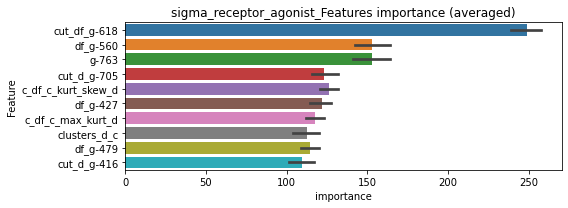

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000512765	valid_1's binary_logloss: 0.0123604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[907]	training's binary_logloss: 0.00039947	valid_1's binary_logloss: 0.00555644


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[807]	training's binary_logloss: 0.000420071	valid_1's binary_logloss: 0.00145783


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.008062151004063753


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000465854	valid_1's binary_logloss: 0.012874


sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000438156	valid_1's binary_logloss: 0.00994236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000436789	valid_1's binary_logloss: 0.00881885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000424891	valid_1's binary_logloss: 0.00417025
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000437351	valid_1's binary_logloss: 0.00454057


y_Threshold: 0.0029876, Threshold: 0.0092375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0092375, conf_0:0.00647, conf_1:0.01201
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0392375
threshold: 0.0392375, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03139, conf_1:0.04708
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000430604	valid_1's binary_logloss: 0.00881255
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000452593	valid_1's binary_logloss: 0.00834402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[647]	training's binary_logloss: 0.000422723	valid_1's binary_logloss: 0.00463718
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0238457, Threshold: 0.0392375, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3802


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000470779	valid_1's binary_logloss: 0.00419329


p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.0392375, conf_0:0.03531, conf_1:0.04316
threshold: 0.0392375, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3802, y_label_rate: 0.1722777


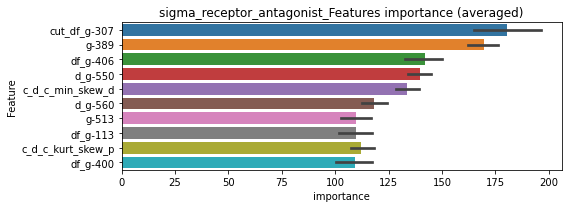

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[783]	training's binary_logloss: 0.000449565	valid_1's binary_logloss: 0.00705404


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[638]	training's binary_logloss: 0.000523007	valid_1's binary_logloss: 0.00746496
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000436063	valid_1's binary_logloss: 0.00478701


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[892]	training's binary_logloss: 0.000434138	valid_1's binary_logloss: 0.00445575


sigma_receptor_antagonist logloss: 0.005941130432914317
smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000331594	valid_1's binary_logloss: 0.00147418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000321768	valid_1's binary_logloss: 0.00633852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000331626	valid_1's binary_logloss: 0.000684224
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016507, Threshold: 0.0050948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000330593	valid_1's binary_logloss: 0.000934356


p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0050948, conf_0:0.00357, conf_1:0.00662
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0350948
threshold: 0.0350948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.02808, conf_1:0.04211


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000322281	valid_1's binary_logloss: 0.00126933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000312741	valid_1's binary_logloss: 0.00552611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000323645	valid_1's binary_logloss: 0.000631628
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0244381, Threshold: 0.0350948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0002511 Vs.target_rate: 0.00105
Num_p_label: 1.0, Expected: 4.2, Threshold: 0.0350948, conf_0:0.03159, conf_1:0.03860


Early stopping, best iteration is:
[594]	training's binary_logloss: 0.0003252	valid_1's binary_logloss: 0.00091613


threshold: 0.0350948, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


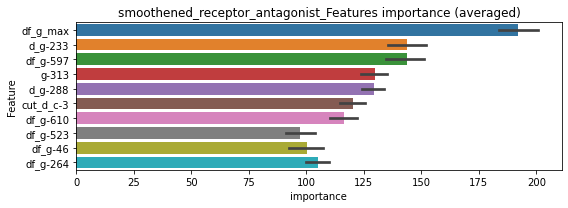

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[925]	training's binary_logloss: 0.000332341	valid_1's binary_logloss: 0.00118077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[896]	training's binary_logloss: 0.000326285	valid_1's binary_logloss: 0.00532432


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[935]	training's binary_logloss: 0.000329659	valid_1's binary_logloss: 0.000642009


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505
Early stopping, best iteration is:
[990]	training's binary_logloss: 0.00032333	valid_1's binary_logloss: 0.000811505


smoothened_receptor_antagonist logloss: 0.001990313290024979


mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0203136	valid_1's binary_logloss: 0.117263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.0251155	valid_1's binary_logloss: 0.137738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0165025	valid_1's binary_logloss: 0.112936
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.972, PR-AUC:0.947
y_Threshold: 0.0324383, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 521 → Positive_corect_labels: 1249/7711
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03133, conf_1:0.05818


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0163777	valid_1's binary_logloss: 0.122261


threshold: 0.0447542, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1249.0/7711, y_label_rate: 0.1619764
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0100488	valid_1's binary_logloss: 0.0764053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00706458	valid_1's binary_logloss: 0.0631338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0114069	valid_1's binary_logloss: 0.0798756
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0321385, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 1183.0/7579
p_label_rate: 0.0075339 Vs.target_rate: 0.01121
Num_p_label: 30.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03580, conf_1:0.05371


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.0080675	valid_1's binary_logloss: 0.0669923


threshold: 0.0447542, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1183.0/7579, y_label_rate: 0.1560892
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0040636	valid_1's binary_logloss: 0.0429606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00514417	valid_1's binary_logloss: 0.0420293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00284009	valid_1's binary_logloss: 0.0389726
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0222357, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1158.0/7529


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00248612	valid_1's binary_logloss: 0.0379004


p_label_rate: 0.0012557 Vs.target_rate: 0.01121
Num_p_label: 5.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.04028, conf_1:0.04923
threshold: 0.0447542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1158.0/7529, y_label_rate: 0.1538053


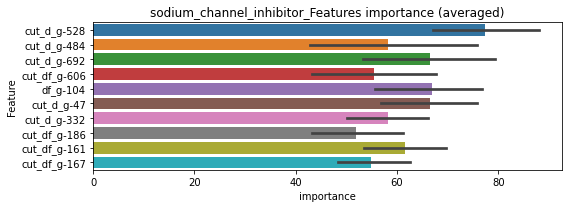

len(train_index) : 5646
len(valid_index) : 1883
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00135463	valid_1's binary_logloss: 0.022332
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[131]	training's binary_logloss: 0.00432579	valid_1's binary_logloss: 0.0344251
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00120576	valid_1's binary_logloss: 0.0168758
Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.028566563265572227
sodium_channel_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[110]	training's binary_logloss: 0.00618879	valid_1's binary_logloss: 0.0406367


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000393727	valid_1's binary_logloss: 0.00582477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000405387	valid_1's binary_logloss: 0.00561067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000406683	valid_1's binary_logloss: 0.00446424
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022949, Threshold: 0.0062193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810


Early stopping, best iteration is:
[595]	training's binary_logloss: 0.000403004	valid_1's binary_logloss: 0.00249726


p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0062193, conf_0:0.00435, conf_1:0.00809
Num_p_label: 3.0, Expected: 5.4, Adj_threshold_1: 0.0362193
threshold: 0.0362193, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.02898, conf_1:0.04346
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.00040333	valid_1's binary_logloss: 0.00490738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000398468	valid_1's binary_logloss: 0.00464043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.000388261	valid_1's binary_logloss: 0.00445429
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0250779, Threshold: 0.0362193, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000384674	valid_1's binary_logloss: 0.0021576


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0030136 Vs.target_rate: 0.00134
Num_p_label: 12.0, Expected: 5.4, Threshold: 0.0362193, conf_0:0.03260, conf_1:0.03984
threshold: 0.0362193, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


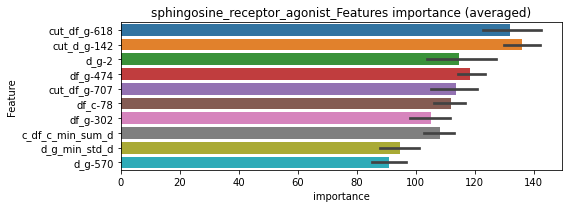

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000403368	valid_1's binary_logloss: 0.0053345


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[792]	training's binary_logloss: 0.00039775	valid_1's binary_logloss: 0.00418013


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[820]	training's binary_logloss: 0.000402206	valid_1's binary_logloss: 0.00357358


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[782]	training's binary_logloss: 0.000408743	valid_1's binary_logloss: 0.00197148


sphingosine_receptor_agonist logloss: 0.0037654450146557767
src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000838864	valid_1's binary_logloss: 0.0506197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00106538	valid_1's binary_logloss: 0.0367246
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[788]	training's binary_logloss: 0.000619879	valid_1's binary_logloss: 0.00376112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000878765	valid_1's binary_logloss: 0.0318531


1 / 3, AUC score:0.998, PR-AUC:0.997
y_Threshold: 0.0063855, Threshold: 0.0346430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0346430, conf_0:0.02425, conf_1:0.04504
Num_p_label: 25.0, Expected: 11.9, Adj_threshold_1: 0.0646430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_2: 0.0946430
threshold: 0.0946430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000686419	valid_1's binary_logloss: 0.0223518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000807823	valid_1's binary_logloss: 0.0368935
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00121995	valid_1's binary_logloss: 0.021282
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[728]	training's binary_logloss: 0.000598751	valid_1's binary_logloss: 0.015597


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0237866, Threshold: 0.0946430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 649.0/3793
p_label_rate: 0.0095429 Vs.target_rate: 0.00298
Num_p_label: 38.0, Expected: 11.9, Threshold: 0.0946430, conf_0:0.07571, conf_1:0.11357
Num_p_label: 27.0, Expected: 11.9, Adj_threshold_1: 0.1246430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1546430
Num_p_label: 16.0, Expected: 11.9, Adj_threshold_3: 0.1846430
threshold: 0.1846430, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[684]	training's binary_logloss: 0.000621069	valid_1's binary_logloss: 0.0228495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000605606	valid_1's binary_logloss: 0.0206857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000571588	valid_1's binary_logloss: 0.0163085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[811]	training's binary_logloss: 0.000554911	valid_1's binary_logloss: 0.0121343


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0197454, Threshold: 0.1846430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 647.0/3789
p_label_rate: 0.0060271 Vs.target_rate: 0.00298
Num_p_label: 24.0, Expected: 11.9, Threshold: 0.1846430, conf_0:0.16618, conf_1:0.20311
Num_p_label: 20.0, Expected: 11.9, Adj_threshold_1: 0.2146430
Num_p_label: 18.0, Expected: 11.9, Adj_threshold_2: 0.2446430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.2746430
threshold: 0.2746430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 647.0/3789, y_label_rate: 0.1707575


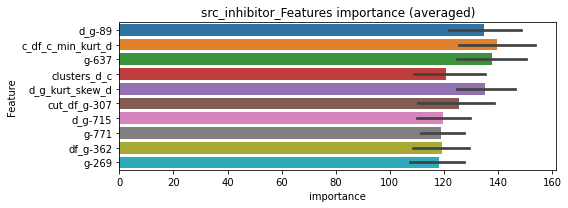

len(train_index) : 2841
len(valid_index) : 948
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000880843	valid_1's binary_logloss: 0.0249554


================================= fold 2/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000575067	valid_1's binary_logloss: 0.0114388
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000580868	valid_1's binary_logloss: 0.0114302


len(train_index) : 2842
len(valid_index) : 947
================================= fold 3/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 947


Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000874045	valid_1's binary_logloss: 0.0163411


================================= fold 4/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[806]	training's binary_logloss: 0.000644242	valid_1's binary_logloss: 0.0157698


src_inhibitor logloss: 0.017126209693802692
steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000912989	valid_1's binary_logloss: 0.037644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000796518	valid_1's binary_logloss: 0.0304979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000896976	valid_1's binary_logloss: 0.034007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000658237	valid_1's binary_logloss: 0.0262682


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0085797, Threshold: 0.2436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2436510, conf_0:0.17056, conf_1:0.31675
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_1: 0.2736510
Num_p_label: 36.0, Expected: 13.2, Adj_threshold_2: 0.3036510
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_3: 0.3336510
Num_p_label: 31.0, Expected: 13.2, Adj_threshold_4: 0.3636510
Num_p_label: 27.0, Expected: 13.2, Adj_threshold_5: 0.3936510
Num_p_label: 24.0, Expected: 13.2, Adj_threshold_6: 0.4236510
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_7: 0.4536510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_8: 0.4836510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_9: 0.5136510
Num_p_label: 19.0, Expected: 13.2, Adj_threshold_10: 0.5436510
threshold: 0.5436510, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
po

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.00063434	valid_1's binary_logloss: 0.0247305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.00108964	valid_1's binary_logloss: 0.0336989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[773]	training's binary_logloss: 0.000646382	valid_1's binary_logloss: 0.0276127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000795345	valid_1's binary_logloss: 0.0354915


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0333286, Threshold: 0.5436510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3784
p_label_rate: 0.0110497 Vs.target_rate: 0.00332
Num_p_label: 44.0, Expected: 13.2, Threshold: 0.5436510, conf_0:0.43492, conf_1:0.65238
Num_p_label: 40.0, Expected: 13.2, Adj_threshold_1: 0.5736510
Num_p_label: 38.0, Expected: 13.2, Adj_threshold_2: 0.6036510
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_3: 0.6336510
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_4: 0.6636510
Num_p_label: 30.0, Expected: 13.2, Adj_threshold_5: 0.6936510
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_6: 0.7236510
Num_p_label: 22.0, Expected: 13.2, Adj_threshold_7: 0.7536510
Num_p_label: 18.0, Expected: 13.2, Adj_threshold_8: 0.7836510
threshold: 0.7836510, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 645.0/3784, y_label_rate: 0.1704545
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[733]	training's binary_logloss: 0.000651459	valid_1's binary_logloss: 0.0230485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[600]	training's binary_logloss: 0.000848975	valid_1's binary_logloss: 0.0264468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102233	valid_1's binary_logloss: 0.0369388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[779]	training's binary_logloss: 0.000610416	valid_1's binary_logloss: 0.0164532


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0431788, Threshold: 0.7836510, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0060271 Vs.target_rate: 0.00332
Num_p_label: 24.0, Expected: 13.2, Threshold: 0.7836510, conf_0:0.70529, conf_1:0.86202
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_1: 0.8136510
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_2: 0.8436510
threshold: 0.8436510, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


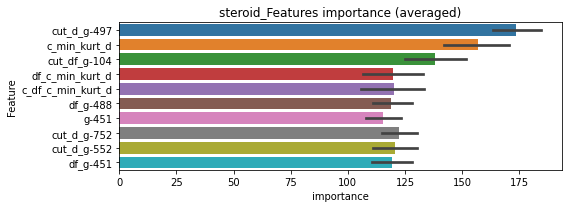

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000813559	valid_1's binary_logloss: 0.0238027


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000800818	valid_1's binary_logloss: 0.0222731


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 steroid=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000848017	valid_1's binary_logloss: 0.0147104


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 steroid=================================


Training until validation scores don't improve for 30 rounds


steroid logloss: 0.018967240827912582


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000970607	valid_1's binary_logloss: 0.0150742


syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000307072	valid_1's binary_logloss: 0.00131952
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000311225	valid_1's binary_logloss: 0.000831622
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000308988	valid_1's binary_logloss: 0.00075208
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015542, Threshold: 0.0049558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0049558, conf_0:0.00347, conf_1:0.00644
Num_p_label: 2.0, Expected: 3.2, Adj_threshold_1: 0.0349558


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000310375	valid_1's binary_logloss: 0.00110023


threshold: 0.0349558, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0349558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0022602 Vs.target_rate: 0.00080
Num_p_label: 9.0, Expected: 3.2, Threshold: 0.0349558, conf_0:0.02796, conf_1:0.04195
Num_p_label: 4.0, Expected: 3.2, Adj_threshold_1: 0.0649558
threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000300119	valid_1's binary_logloss: 0.00143996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00030378	valid_1's binary_logloss: 0.000876425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000305338	valid_1's binary_logloss: 0.000615977
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1137234, Threshold: 0.0649558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0649558, conf_0:0.05846, conf_1:0.07145


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000300329	valid_1's binary_logloss: 0.000838453


threshold: 0.0649558, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


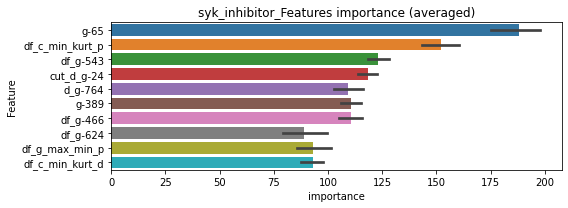

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000313468	valid_1's binary_logloss: 0.00170039


len(valid_index) : 952
================================= fold 2/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.000303489	valid_1's binary_logloss: 0.000724463


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000311866	valid_1's binary_logloss: 0.00060662


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000308148	valid_1's binary_logloss: 0.000880603


syk_inhibitor logloss: 0.0009781286658045493
tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[640]	training's binary_logloss: 0.000618208	valid_1's binary_logloss: 0.0313891
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[744]	training's binary_logloss: 0.000553834	valid_1's binary_logloss: 0.0114483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[706]	training's binary_logloss: 0.000592874	valid_1's binary_logloss: 0.00689343
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[795]	training's binary_logloss: 0.000536768	valid_1's binary_logloss: 0.0130147


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0049040, Threshold: 0.0115926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0115926, conf_0:0.00811, conf_1:0.01507
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0415926
threshold: 0.0415926, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00072263	valid_1's binary_logloss: 0.0290511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000539828	valid_1's binary_logloss: 0.0117722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[750]	training's binary_logloss: 0.000550692	valid_1's binary_logloss: 0.00627124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.000559881	valid_1's binary_logloss: 0.0132225


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266480, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00252
Num_p_label: 12.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03327, conf_1:0.04991
threshold: 0.0415926, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[743]	training's binary_logloss: 0.000539358	valid_1's binary_logloss: 0.0102648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000595693	valid_1's binary_logloss: 0.0163228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000855582	valid_1's binary_logloss: 0.0183694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000616268	valid_1's binary_logloss: 0.0248208


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0173614, Threshold: 0.0415926, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3795
p_label_rate: 0.0040181 Vs.target_rate: 0.00252
Num_p_label: 16.0, Expected: 10.0, Threshold: 0.0415926, conf_0:0.03743, conf_1:0.04575
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0715926
threshold: 0.0715926, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3795, y_label_rate: 0.1715415


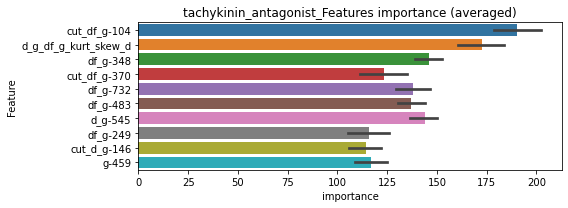

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000826987	valid_1's binary_logloss: 0.0237758
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949


Early stopping, best iteration is:
[638]	training's binary_logloss: 0.00071668	valid_1's binary_logloss: 0.0158448


================================= fold 3/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[919]	training's binary_logloss: 0.000564517	valid_1's binary_logloss: 0.00830474


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


tachykinin_antagonist logloss: 0.020253536498969934
tachykinin_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00183078	valid_1's binary_logloss: 0.0331024


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000401371	valid_1's binary_logloss: 0.002557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[629]	training's binary_logloss: 0.000412444	valid_1's binary_logloss: 0.00260742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000406982	valid_1's binary_logloss: 0.00122322
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027181, Threshold: 0.0074640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[591]	training's binary_logloss: 0.000436245	valid_1's binary_logloss: 0.005378


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0074640, conf_0:0.00522, conf_1:0.00970
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0374640
threshold: 0.0374640, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.02997, conf_1:0.04496
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[672]	training's binary_logloss: 0.000388229	valid_1's binary_logloss: 0.00245856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00038939	valid_1's binary_logloss: 0.00295262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000396928	valid_1's binary_logloss: 0.00115578
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0409966, Threshold: 0.0374640, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000401359	valid_1's binary_logloss: 0.00300093


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0374640, conf_0:0.03372, conf_1:0.04121
threshold: 0.0374640, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


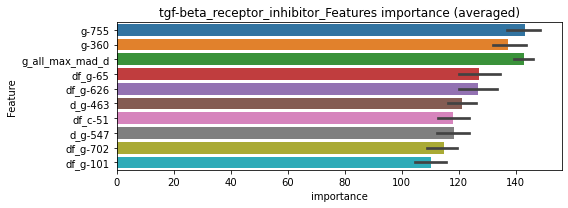

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393962	valid_1's binary_logloss: 0.00218892
Early stopping, best iteration is:
[971]	training's binary_logloss: 0.000394395	valid_1's binary_logloss: 0.00218645


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000393776	valid_1's binary_logloss: 0.00276208
Early stopping, best iteration is:
[1098]	training's binary_logloss: 0.000386054	valid_1's binary_logloss: 0.00273341


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00039805	valid_1's binary_logloss: 0.00128658
Early stopping, best iteration is:
[1135]	training's binary_logloss: 0.000386364	valid_1's binary_logloss: 0.0012599


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tgf-beta_receptor_inhibitor logloss: 0.00253955025808007


Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000514434	valid_1's binary_logloss: 0.0039789


thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000301038	valid_1's binary_logloss: 0.00234225
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000293253	valid_1's binary_logloss: 0.00241053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000303873	valid_1's binary_logloss: 0.0005641
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020204, Threshold: 0.0066030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0066030, conf_0:0.00462, conf_1:0.00858
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_1: 0.0366030


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000311886	valid_1's binary_logloss: 0.00200125


threshold: 0.0366030, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.0366030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0062783 Vs.target_rate: 0.00080
Num_p_label: 25.0, Expected: 3.2, Threshold: 0.0366030, conf_0:0.02928, conf_1:0.04392
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0666030
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_2: 0.0966030
Num_p_label: 5.0, Expected: 3.2, Adj_threshold_3: 0.1266030


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000294865	valid_1's binary_logloss: 0.00262415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000289284	valid_1's binary_logloss: 0.00354416
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000298707	valid_1's binary_logloss: 0.000565693
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0392546, Threshold: 0.1266030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.1266030, conf_0:0.11394, conf_1:0.13926


Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000295263	valid_1's binary_logloss: 0.00185475


threshold: 0.1266030, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


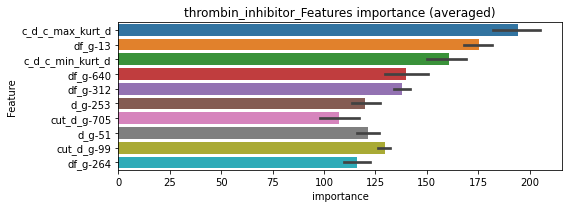

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[776]	training's binary_logloss: 0.000302041	valid_1's binary_logloss: 0.00275812


================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[827]	training's binary_logloss: 0.000297073	valid_1's binary_logloss: 0.00160922


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000301535	valid_1's binary_logloss: 0.000574741


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000296699	valid_1's binary_logloss: 0.000726284


thrombin_inhibitor logloss: 0.0014174442833900646
thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000471725	valid_1's binary_logloss: 0.00732977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000481448	valid_1's binary_logloss: 0.00865571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000460589	valid_1's binary_logloss: 0.00180324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000451307	valid_1's binary_logloss: 0.00222276


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0029208, Threshold: 0.0130184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0130184, conf_0:0.00911, conf_1:0.01692
Num_p_label: 11.0, Expected: 6.2, Adj_threshold_1: 0.0430184
threshold: 0.0430184, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000451978	valid_1's binary_logloss: 0.00862687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000449164	valid_1's binary_logloss: 0.00875352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000446147	valid_1's binary_logloss: 0.00175392
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000437782	valid_1's binary_logloss: 0.00183912


y_Threshold: 0.0168215, Threshold: 0.0430184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0085384 Vs.target_rate: 0.00155
Num_p_label: 34.0, Expected: 6.2, Threshold: 0.0430184, conf_0:0.03441, conf_1:0.05162
Num_p_label: 23.0, Expected: 6.2, Adj_threshold_1: 0.0730184
Num_p_label: 20.0, Expected: 6.2, Adj_threshold_2: 0.1030184
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_3: 0.1330184
threshold: 0.1330184, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000494984	valid_1's binary_logloss: 0.00692059
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000446966	valid_1's binary_logloss: 0.00264211
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000450866	valid_1's binary_logloss: 0.00117287
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0494331, Threshold: 0.1330184, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000487432	valid_1's binary_logloss: 0.00516442


p_label_rate: 0.0040181 Vs.target_rate: 0.00155
Num_p_label: 16.0, Expected: 6.2, Threshold: 0.1330184, conf_0:0.11972, conf_1:0.14632
Num_p_label: 14.0, Expected: 6.2, Adj_threshold_1: 0.1630184
threshold: 0.1630184, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


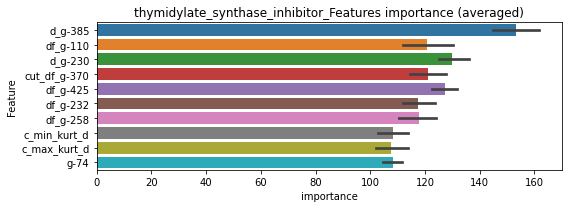

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[912]	training's binary_logloss: 0.000433478	valid_1's binary_logloss: 0.00493819


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[915]	training's binary_logloss: 0.000445826	valid_1's binary_logloss: 0.0024152


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[926]	training's binary_logloss: 0.000443751	valid_1's binary_logloss: 0.00121303


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[813]	training's binary_logloss: 0.000459042	valid_1's binary_logloss: 0.00500466


thymidylate_synthase_inhibitor logloss: 0.003392771930915893
tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[648]	training's binary_logloss: 0.000365974	valid_1's binary_logloss: 0.00530838
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.00916575
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000382388	valid_1's binary_logloss: 0.00140194
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0024085, Threshold: 0.0129624, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000369072	valid_1's binary_logloss: 0.00254071


Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0129624, conf_0:0.00907, conf_1:0.01685
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.0429624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0729624
threshold: 0.0729624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000368107	valid_1's binary_logloss: 0.00434072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000362472	valid_1's binary_logloss: 0.00984303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000372156	valid_1's binary_logloss: 0.000955814
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0125477, Threshold: 0.0729624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000358823	valid_1's binary_logloss: 0.00181325


p_label_rate: 0.0060271 Vs.target_rate: 0.00126
Num_p_label: 24.0, Expected: 5.0, Threshold: 0.0729624, conf_0:0.05837, conf_1:0.08755
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_1: 0.1029624
Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.1329624
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_3: 0.1629624
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_4: 0.1929624
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_5: 0.2229624
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_6: 0.2529624
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_7: 0.2829624
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000360248	valid_1's binary_logloss: 0.00658326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00036222	valid_1's binary_logloss: 0.00141892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[624]	training's binary_logloss: 0.000363256	valid_1's binary_logloss: 0.00173878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000351657	valid_1's binary_logloss: 0.00894083


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0240388, Threshold: 0.2829624, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.2829624, conf_0:0.25467, conf_1:0.31126
threshold: 0.2829624, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3808, y_label_rate: 0.1720063


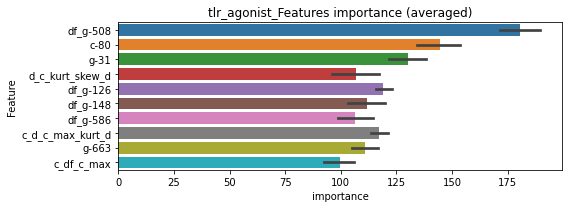

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000371351	valid_1's binary_logloss: 0.00832337


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[869]	training's binary_logloss: 0.000366021	valid_1's binary_logloss: 0.00154972


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[840]	training's binary_logloss: 0.000368771	valid_1's binary_logloss: 0.00424562


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000360424	valid_1's binary_logloss: 0.00126023


tlr_agonist logloss: 0.0038447346470094866
tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000191042	valid_1's binary_logloss: 0.000265607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000189656	valid_1's binary_logloss: 0.00105762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000190484	valid_1's binary_logloss: 0.000240826
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005461, Threshold: 0.0010670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0010670, conf_0:0.00075, conf_1:0.00139
Num_p_label: 0.0, Expected: 1.2, Adj_threshold_1: 0.0310670
threshold: 0.0310670, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000192503	valid_1's binary_logloss: 0.000230496


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02485, conf_1:0.03728
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000188902	valid_1's binary_logloss: 0.000244574
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000186451	valid_1's binary_logloss: 0.000471992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000188369	valid_1's binary_logloss: 0.000226006
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1406998, Threshold: 0.0310670, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.0310670, conf_0:0.02796, conf_1:0.03417
threshold: 0.0310670, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000190442	valid_1's binary_logloss: 0.00024801


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


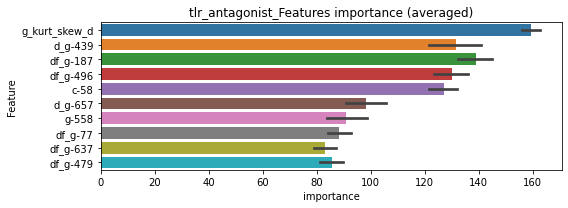

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000185227	valid_1's binary_logloss: 0.000239481
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000184852	valid_1's binary_logloss: 0.000348108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[968]	training's binary_logloss: 0.000186941	valid_1's binary_logloss: 0.000234086


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.00026984644922422663


Early stopping, best iteration is:
[951]	training's binary_logloss: 0.000186233	valid_1's binary_logloss: 0.000257743


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:304
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000442029	valid_1's binary_logloss: 0.0081001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000462764	valid_1's binary_logloss: 0.00964053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000441108	valid_1's binary_logloss: 0.00499116
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0037332, Threshold: 0.0250028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000456026	valid_1's binary_logloss: 0.0115059


Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0250028, conf_0:0.01750, conf_1:0.03250
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_1: 0.0550028
threshold: 0.0550028, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.0550028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0097941 Vs.target_rate: 0.00151
Num_p_label: 39.0, Expected: 6.0, Threshold: 0.0550028, conf_0:0.04400, conf_1:0.06600
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_1: 0.0850028
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.1150028
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_3: 0.1450028
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000443701	valid_1's binary_logloss: 0.0095256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.00044089	valid_1's binary_logloss: 0.011023
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000447915	valid_1's binary_logloss: 0.00438607
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0428378, Threshold: 0.1450028, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000437883	valid_1's binary_logloss: 0.00895915


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.1450028, conf_0:0.13050, conf_1:0.15950
threshold: 0.1450028, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


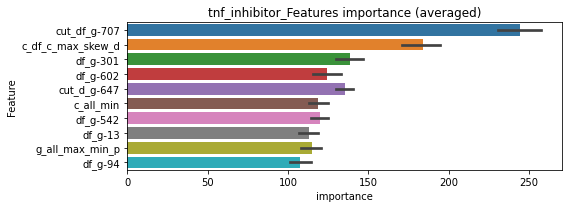

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000451777	valid_1's binary_logloss: 0.00607707


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000512998	valid_1's binary_logloss: 0.00886307
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[837]	training's binary_logloss: 0.000449742	valid_1's binary_logloss: 0.00273452


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[777]	training's binary_logloss: 0.000454998	valid_1's binary_logloss: 0.00801571


tnf_inhibitor logloss: 0.006422175411471307
topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.011197	valid_1's binary_logloss: 0.134259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00770389	valid_1's binary_logloss: 0.100885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00103102	valid_1's binary_logloss: 0.0462632
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.992, PR-AUC:0.979
y_Threshold: 0.0235064, Threshold: 0.0844302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 629/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.0844302, conf_0:0.05910, conf_1:0.10976
Num_p_label: 21.0, Expected: 21.2, Adj_threshold_1: 0.1144302
threshold: 0.1144302, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00696335	valid_1's binary_logloss: 0.0997568


positive_y_label: 629.0/3747, y_label_rate: 0.1678676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00640249	valid_1's binary_logloss: 0.0837533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00395725	valid_1's binary_logloss: 0.0871881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00160573	valid_1's binary_logloss: 0.0490254
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.990
y_Threshold: 0.0366505, Threshold: 0.1144302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 597.0/3683
p_label_rate: 0.0183325 Vs.target_rate: 0.00533
Num_p_label: 73.0, Expected: 21.2, Threshold: 0.1144302, conf_0:0.09154, conf_1:0.13732


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00204389	valid_1's binary_logloss: 0.0628956


Num_p_label: 59.0, Expected: 21.2, Adj_threshold_1: 0.1444302
Num_p_label: 44.0, Expected: 21.2, Adj_threshold_2: 0.1744302
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_3: 0.2044302
threshold: 0.2044302, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 597.0/3683, y_label_rate: 0.1620961
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00201878	valid_1's binary_logloss: 0.05858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00134037	valid_1's binary_logloss: 0.0542046
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00133127	valid_1's binary_logloss: 0.0368751
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0309310, Threshold: 0.2044302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 581.0/3651
p_label_rate: 0.0198393 Vs.target_rate: 0.00533
Num_p_label: 79.0, Expected: 21.2, Threshold: 0.2044302, conf_0:0.18399, conf_1:0.22487
Num_p_label: 75.0, Expected: 21.2, Adj_threshold_1: 0.2344302
Num_p_label: 65.0, Expected: 21.2, Adj_threshold_2: 0.2644302
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_3: 0.2944302
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_4: 0.3244302
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_5: 0.3544302
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_6: 0.3844302
Num_p_label: 27.0, Expected: 21.2, Adj_threshold_7: 0.4144302


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00234014	valid_1's binary_logloss: 0.0487982


threshold: 0.4144302, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 581.0/3651, y_label_rate: 0.1591345


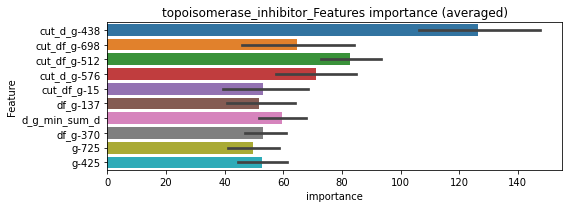

len(train_index) : 2738
len(valid_index) : 913
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2738
len(valid_index) : 913
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00416207	valid_1's binary_logloss: 0.0532449
Training until validation scores don't improve for 30 rounds


len(train_index) : 2738
len(valid_index) : 913
================================= fold 3/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00130733	valid_1's binary_logloss: 0.0325249
Training until validation scores don't improve for 30 rounds


len(train_index) : 2739
len(valid_index) : 912
================================= fold 4/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00116383	valid_1's binary_logloss: 0.021884
Training until validation scores don't improve for 30 rounds


topoisomerase_inhibitor logloss: 0.038211144216178834
topoisomerase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00215528	valid_1's binary_logloss: 0.0451985


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000310852	valid_1's binary_logloss: 0.000695179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[580]	training's binary_logloss: 0.000305043	valid_1's binary_logloss: 0.00218979
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000311142	valid_1's binary_logloss: 0.00184727
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015714, Threshold: 0.0145277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0145277, conf_0:0.01017, conf_1:0.01889
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.0445277
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_2: 0.0745277


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000308445	valid_1's binary_logloss: 0.00151548


threshold: 0.0745277, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.0745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0135610 Vs.target_rate: 0.00076
Num_p_label: 54.0, Expected: 3.0, Threshold: 0.0745277, conf_0:0.05962, conf_1:0.08943
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.1045277
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_2: 0.1345277
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_3: 0.1645277
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_4: 0.1945277
Num_p_label: 30.0, Expected: 3.0, Adj_threshold_5: 0.2245277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 29.0, Expected: 3.0, Adj_threshold_6: 0.2545277
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.2845277
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.3145277
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_9: 0.3445277
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_10: 0.3745277
threshold: 0.3745277, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000306713	valid_1's binary_logloss: 0.000669525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000295563	valid_1's binary_logloss: 0.00263012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000301364	valid_1's binary_logloss: 0.00139063
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1230839, Threshold: 0.3745277, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00076
Num_p_label: 17.0, Expected: 3.0, Threshold: 0.3745277, conf_0:0.33707, conf_1:0.41198
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_1: 0.4045277
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_2: 0.4345277
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_3: 0.4645277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_4: 0.4945277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_5: 0.5245277
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.5545277
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.5845277
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_8: 0.6145277


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000302561	valid_1's binary_logloss: 0.00156429


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_9: 0.6445277
threshold: 0.6445277, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


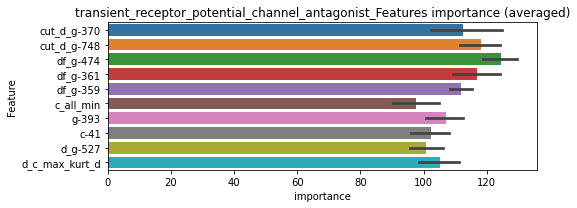

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[891]	training's binary_logloss: 0.000302847	valid_1's binary_logloss: 0.000692077


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858


Early stopping, best iteration is:
[848]	training's binary_logloss: 0.000298919	valid_1's binary_logloss: 0.00204226


len(valid_index) : 952
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[819]	training's binary_logloss: 0.00031042	valid_1's binary_logloss: 0.00198832


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[866]	training's binary_logloss: 0.000302295	valid_1's binary_logloss: 0.000846997


transient_receptor_potential_channel_antagonist logloss: 0.001392402451940104
tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:302
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000158342	valid_1's binary_logloss: 0.000345099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000153771	valid_1's binary_logloss: 0.000445348
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000154988	valid_1's binary_logloss: 0.000180942
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004272, Threshold: 0.0011997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0011997, conf_0:0.00084, conf_1:0.00156
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0311997
threshold: 0.0311997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000155404	valid_1's binary_logloss: 0.000211069


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0311997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0311997, conf_0:0.02496, conf_1:0.03744
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0611997
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000151456	valid_1's binary_logloss: 0.000245419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000148829	valid_1's binary_logloss: 0.000386354
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000150836	valid_1's binary_logloss: 0.00017527
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1473322, Threshold: 0.0611997, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0611997, conf_0:0.05508, conf_1:0.06732
threshold: 0.0611997, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000148712	valid_1's binary_logloss: 0.000187659


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


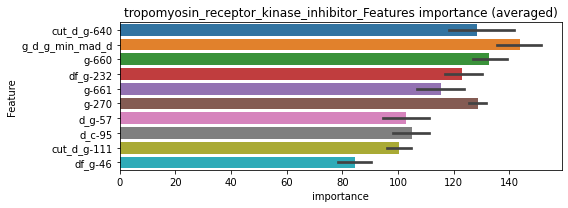

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


[1000]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000149062	valid_1's binary_logloss: 0.00024782
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148556	valid_1's binary_logloss: 0.00042465
Early stopping, best iteration is:
[1018]	training's binary_logloss: 0.000148374	valid_1's binary_logloss: 0.000424465


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[943]	training's binary_logloss: 0.000150313	valid_1's binary_logloss: 0.000180757
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000148979	valid_1's binary_logloss: 0.000168753
Early stopping, best iteration is:
[1027]	training's binary_logloss: 0.000148591	valid_1's binary_logloss: 0.000168321


tropomyosin_receptor_kinase_inhibitor logloss: 0.00025534506795172934
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000366067	valid_1's binary_logloss: 0.00126781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.00035611	valid_1's binary_logloss: 0.00275712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000369646	valid_1's binary_logloss: 0.00192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000368987	valid_1's binary_logloss: 0.000955798


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020056, Threshold: 0.0075674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0075674, conf_0:0.00530, conf_1:0.00984
Num_p_label: 12.0, Expected: 4.2, Adj_threshold_1: 0.0375674
Num_p_label: 7.0, Expected: 4.2, Adj_threshold_2: 0.0675674
threshold: 0.0675674, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.0675674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


p_label_rate: 0.0030136 Vs.target_rate: 0.00105
Num_p_label: 12.0, Expected: 4.2, Threshold: 0.0675674, conf_0:0.05405, conf_1:0.08108
Num_p_label: 11.0, Expected: 4.2, Adj_threshold_1: 0.0975674
Num_p_label: 8.0, Expected: 4.2, Adj_threshold_2: 0.1275674
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[610]	training's binary_logloss: 0.000356873	valid_1's binary_logloss: 0.000986754
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000374036	valid_1's binary_logloss: 0.00247686
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.00037651	valid_1's binary_logloss: 0.00123499
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0833569, Threshold: 0.1275674, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000354696	valid_1's binary_logloss: 0.000867327


p_label_rate: 0.0020090 Vs.target_rate: 0.00105
Num_p_label: 8.0, Expected: 4.2, Threshold: 0.1275674, conf_0:0.11481, conf_1:0.14032
threshold: 0.1275674, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


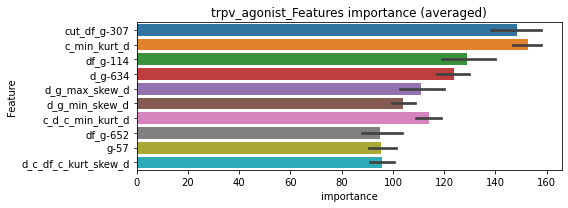

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[881]	training's binary_logloss: 0.000364085	valid_1's binary_logloss: 0.00111565


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[916]	training's binary_logloss: 0.000357457	valid_1's binary_logloss: 0.00195582


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[900]	training's binary_logloss: 0.00036275	valid_1's binary_logloss: 0.000972711


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[860]	training's binary_logloss: 0.00036467	valid_1's binary_logloss: 0.000893557


trpv_agonist logloss: 0.0012348773105491132
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000631799	valid_1's binary_logloss: 0.0246699
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000493433	valid_1's binary_logloss: 0.00767099
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000480227	valid_1's binary_logloss: 0.00258733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000752807	valid_1's binary_logloss: 0.0239162


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0036482, Threshold: 0.0161328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0161328, conf_0:0.01129, conf_1:0.02097
Num_p_label: 7.0, Expected: 8.0, Adj_threshold_1: 0.0461328
threshold: 0.0461328, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[635]	training's binary_logloss: 0.000483122	valid_1's binary_logloss: 0.0102094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.000474665	valid_1's binary_logloss: 0.00913165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000484516	valid_1's binary_logloss: 0.00962117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000479999	valid_1's binary_logloss: 0.014094


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138519, Threshold: 0.0461328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0070316 Vs.target_rate: 0.00202
Num_p_label: 28.0, Expected: 8.0, Threshold: 0.0461328, conf_0:0.03691, conf_1:0.05536
Num_p_label: 14.0, Expected: 8.0, Adj_threshold_1: 0.0761328
threshold: 0.0761328, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000478853	valid_1's binary_logloss: 0.010873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.000487059	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000470593	valid_1's binary_logloss: 0.00871787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000471646	valid_1's binary_logloss: 0.00487625


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138072, Threshold: 0.0761328, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0050226 Vs.target_rate: 0.00202
Num_p_label: 20.0, Expected: 8.0, Threshold: 0.0761328, conf_0:0.06852, conf_1:0.08375
threshold: 0.0761328, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


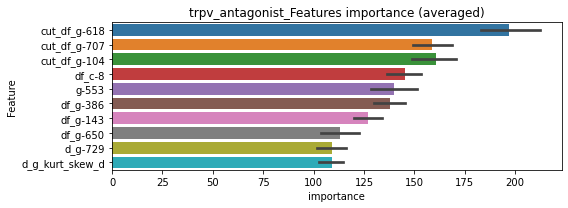

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000551233	valid_1's binary_logloss: 0.00975548


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 trpv_antagonist=================================


Early stopping, best iteration is:
[622]	training's binary_logloss: 0.000606221	valid_1's binary_logloss: 0.0157761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000586052	valid_1's binary_logloss: 0.00888632


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[917]	training's binary_logloss: 0.000480762	valid_1's binary_logloss: 0.00412039


trpv_antagonist logloss: 0.009634583014233186


mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.0177322	valid_1's binary_logloss: 0.137205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.011966	valid_1's binary_logloss: 0.114961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.0167579	valid_1's binary_logloss: 0.131142
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.973, PR-AUC:0.947
y_Threshold: 0.0361406, Threshold: 0.0523160, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0214884	valid_1's binary_logloss: 0.139155


Remove_noisy_data: 538 → Positive_corect_labels: 1298/8008
p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.03662, conf_1:0.06801
threshold: 0.0523160, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1298.0/8008, y_label_rate: 0.1620879
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00449766	valid_1's binary_logloss: 0.0842474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00602629	valid_1's binary_logloss: 0.0922775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00480747	valid_1's binary_logloss: 0.0721543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00725249	valid_1's binary_logloss: 0.0829355


2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0312830, Threshold: 0.0523160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1225.0/7862
p_label_rate: 0.0040181 Vs.target_rate: 0.01327
Num_p_label: 16.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.04185, conf_1:0.06278
threshold: 0.0523160, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1225.0/7862, y_label_rate: 0.1558128
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0047165	valid_1's binary_logloss: 0.0625819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00241214	valid_1's binary_logloss: 0.0507167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00218813	valid_1's binary_logloss: 0.0443172
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0213470, Threshold: 0.0523160, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00391481	valid_1's binary_logloss: 0.0544496


Remove_noisy_data: 64 → Positive_corect_labels: 1193.0/7798
p_label_rate: 0.0012557 Vs.target_rate: 0.01327
Num_p_label: 5.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.04708, conf_1:0.05755
threshold: 0.0523160, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1193.0/7798, y_label_rate: 0.1529879


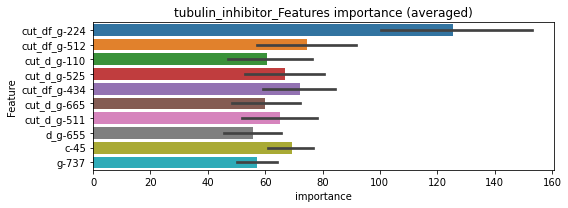

len(train_index) : 5848
len(valid_index) : 1950
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5848
len(valid_index) : 1950
================================= fold 2/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00349641	valid_1's binary_logloss: 0.0564912
Training until validation scores don't improve for 30 rounds


len(train_index) : 5849
len(valid_index) : 1949
================================= fold 3/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00218639	valid_1's binary_logloss: 0.0340722
Training until validation scores don't improve for 30 rounds


len(train_index) : 5849
len(valid_index) : 1949
================================= fold 4/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00336006	valid_1's binary_logloss: 0.033044
Training until validation scores don't improve for 30 rounds


tubulin_inhibitor logloss: 0.040940354088452056
tubulin_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00221221	valid_1's binary_logloss: 0.0401496


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.000730203	valid_1's binary_logloss: 0.0374405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.0016925	valid_1's binary_logloss: 0.0351582
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.000811516	valid_1's binary_logloss: 0.0204015
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997


Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00097803	valid_1's binary_logloss: 0.0338618


y_Threshold: 0.0066807, Threshold: 0.0654613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0654613, conf_0:0.04582, conf_1:0.08510
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_1: 0.0954613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_2: 0.1254613
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_3: 0.1554613
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_4: 0.1854613
threshold: 0.1854613, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[662]	training's binary_logloss: 0.000665136	valid_1's binary_logloss: 0.023556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[637]	training's binary_logloss: 0.000699046	valid_1's binary_logloss: 0.0223813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000813546	valid_1's binary_logloss: 0.0194321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000795993	valid_1's binary_logloss: 0.036984


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0213968, Threshold: 0.1854613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0087896 Vs.target_rate: 0.00307
Num_p_label: 35.0, Expected: 12.2, Threshold: 0.1854613, conf_0:0.14837, conf_1:0.22255
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_1: 0.2154613
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_2: 0.2454613
Num_p_label: 31.0, Expected: 12.2, Adj_threshold_3: 0.2754613
Num_p_label: 29.0, Expected: 12.2, Adj_threshold_4: 0.3054613
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_5: 0.3354613
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_6: 0.3654613
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_7: 0.3954613
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_8: 0.4254613
threshold: 0.4254613, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[748]	training's binary_logloss: 0.000587186	valid_1's binary_logloss: 0.021493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[599]	training's binary_logloss: 0.000728794	valid_1's binary_logloss: 0.0295397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000658302	valid_1's binary_logloss: 0.0239731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000652235	valid_1's binary_logloss: 0.0202716


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0256288, Threshold: 0.4254613, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.4254613, conf_0:0.38292, conf_1:0.46801
threshold: 0.4254613, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


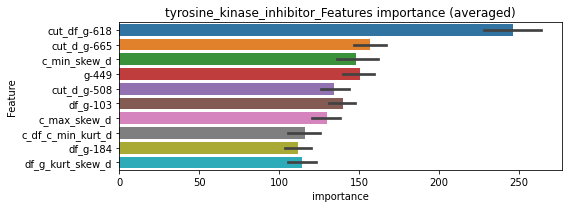

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[734]	training's binary_logloss: 0.00069881	valid_1's binary_logloss: 0.0140231


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[558]	training's binary_logloss: 0.00087972	valid_1's binary_logloss: 0.0254227


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000963704	valid_1's binary_logloss: 0.0315166
Training until validation scores don't improve for 30 rounds


tyrosine_kinase_inhibitor logloss: 0.022896455316405065
tyrosine_kinase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00141865	valid_1's binary_logloss: 0.0206209


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:306
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000239278	valid_1's binary_logloss: 0.00255787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000238503	valid_1's binary_logloss: 0.00068939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.0002388	valid_1's binary_logloss: 0.000321361
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008597, Threshold: 0.0023451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0023451, conf_0:0.00164, conf_1:0.00305
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0323451


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000236753	valid_1's binary_logloss: 0.00223279


threshold: 0.0323451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0323451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0323451, conf_0:0.02588, conf_1:0.03881
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0623451
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000229127	valid_1's binary_logloss: 0.00351237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000232432	valid_1's binary_logloss: 0.000747148
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000234125	valid_1's binary_logloss: 0.000275362
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192647, Threshold: 0.0623451, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0623451, conf_0:0.05611, conf_1:0.06858
threshold: 0.0623451, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.00023343	valid_1's binary_logloss: 0.00229689


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


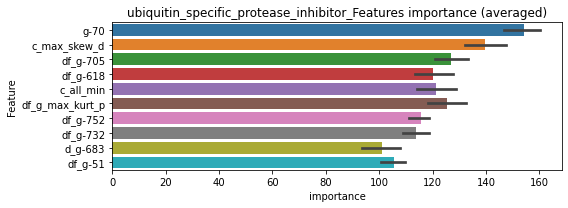

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[885]	training's binary_logloss: 0.000234394	valid_1's binary_logloss: 0.00215609
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[956]	training's binary_logloss: 0.00023373	valid_1's binary_logloss: 0.000453745
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[921]	training's binary_logloss: 0.000238791	valid_1's binary_logloss: 0.000301337
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.0011310687317999215


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.000236798	valid_1's binary_logloss: 0.00161239
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00579755	valid_1's binary_logloss: 0.0991265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00739587	valid_1's binary_logloss: 0.110146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.0101035	valid_1's binary_logloss: 0.107359
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.983, PR-AUC:0.972
y_Threshold: 0.0199014, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 270 → Positive_corect_labels: 884/5289
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02155, conf_1:0.04003


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00684932	valid_1's binary_logloss: 0.0842619


threshold: 0.0307928, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 884.0/5289, y_label_rate: 0.1671393
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00375826	valid_1's binary_logloss: 0.0648762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00454161	valid_1's binary_logloss: 0.0850328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00488296	valid_1's binary_logloss: 0.0723305
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0300302, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 859.0/5239


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00339986	valid_1's binary_logloss: 0.072328


p_label_rate: 0.0102963 Vs.target_rate: 0.00714
Num_p_label: 41.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02463, conf_1:0.03695
threshold: 0.0307928, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 859.0/5239, y_label_rate: 0.1639626
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00269387	valid_1's binary_logloss: 0.0486571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00273769	valid_1's binary_logloss: 0.0551041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00257872	valid_1's binary_logloss: 0.0558449
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0253524, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 848.0/5217
p_label_rate: 0.0065294 Vs.target_rate: 0.00714
Num_p_label: 26.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02771, conf_1:0.03387


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00350592	valid_1's binary_logloss: 0.0662512


threshold: 0.0307928, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 848.0/5217, y_label_rate: 0.1625455


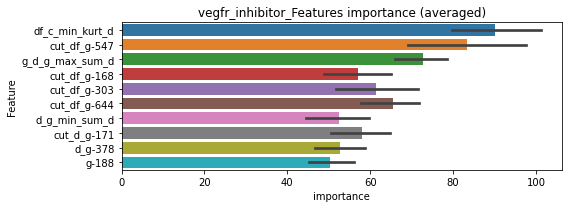

len(train_index) : 3912
len(valid_index) : 1305
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 2/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00418651	valid_1's binary_logloss: 0.0468377
Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 3/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[186]	training's binary_logloss: 0.00377431	valid_1's binary_logloss: 0.0545507
Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 4/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00467724	valid_1's binary_logloss: 0.0616072
Training until validation scores don't improve for 30 rounds


vegfr_inhibitor logloss: 0.05446956730007936
vegfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00432486	valid_1's binary_logloss: 0.0548885


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:301
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000370475	valid_1's binary_logloss: 0.00235469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.000361799	valid_1's binary_logloss: 0.00259905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000374568	valid_1's binary_logloss: 0.00162773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023522, Threshold: 0.0083625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0083625, conf_0:0.00585, conf_1:0.01087
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_1: 0.0383625


Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000393633	valid_1's binary_logloss: 0.00655536


threshold: 0.0383625, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0383625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0075339 Vs.target_rate: 0.00109
Num_p_label: 30.0, Expected: 4.3, Threshold: 0.0383625, conf_0:0.03069, conf_1:0.04603
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_1: 0.0683625
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_2: 0.0983625


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000357089	valid_1's binary_logloss: 0.00223856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000348083	valid_1's binary_logloss: 0.00203093
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000357797	valid_1's binary_logloss: 0.00161179
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0372915, Threshold: 0.0983625, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0025113 Vs.target_rate: 0.00109
Num_p_label: 10.0, Expected: 4.3, Threshold: 0.0983625, conf_0:0.08853, conf_1:0.10820


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000370804	valid_1's binary_logloss: 0.00617657


threshold: 0.0983625, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


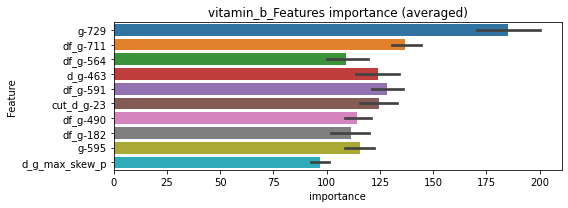

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[761]	training's binary_logloss: 0.000366167	valid_1's binary_logloss: 0.00170483


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.000358442	valid_1's binary_logloss: 0.00168274


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.000369431	valid_1's binary_logloss: 0.00144623


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[675]	training's binary_logloss: 0.000387473	valid_1's binary_logloss: 0.00490468


vitamin_b logloss: 0.0024341085613936407
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:303
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000475473	valid_1's binary_logloss: 0.00762279
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00044715	valid_1's binary_logloss: 0.00681044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.00044981	valid_1's binary_logloss: 0.00471942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000455607	valid_1's binary_logloss: 0.00636758


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0030247, Threshold: 0.0141003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0141003, conf_0:0.00987, conf_1:0.01833
Num_p_label: 12.0, Expected: 6.5, Adj_threshold_1: 0.0441003
threshold: 0.0441003, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000465072	valid_1's binary_logloss: 0.0080092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000438165	valid_1's binary_logloss: 0.00705609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000450427	valid_1's binary_logloss: 0.00519398
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000433087	valid_1's binary_logloss: 0.00737403


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0202189, Threshold: 0.0441003, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0087896 Vs.target_rate: 0.00164
Num_p_label: 35.0, Expected: 6.5, Threshold: 0.0441003, conf_0:0.03528, conf_1:0.05292
Num_p_label: 21.0, Expected: 6.5, Adj_threshold_1: 0.0741003
Num_p_label: 14.0, Expected: 6.5, Adj_threshold_2: 0.1041003
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000434307	valid_1's binary_logloss: 0.0113504
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000428897	valid_1's binary_logloss: 0.00525585
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000440312	valid_1's binary_logloss: 0.00122139
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0249868, Threshold: 0.1041003, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[588]	training's binary_logloss: 0.000469261	valid_1's binary_logloss: 0.00799921


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0035158 Vs.target_rate: 0.00164
Num_p_label: 14.0, Expected: 6.5, Threshold: 0.1041003, conf_0:0.09369, conf_1:0.11451
threshold: 0.1041003, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


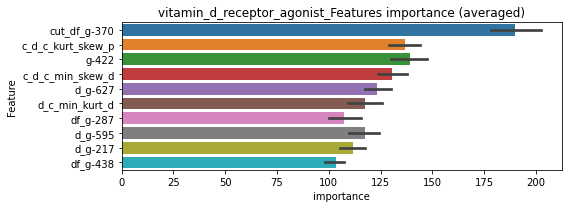

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000660445	valid_1's binary_logloss: 0.0114816
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[901]	training's binary_logloss: 0.00044065	valid_1's binary_logloss: 0.00450584


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[930]	training's binary_logloss: 0.000444788	valid_1's binary_logloss: 0.00126422


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000445406	valid_1's binary_logloss: 0.00753937


vitamin_d_receptor_agonist logloss: 0.006199144804940976
wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:305
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000370373	valid_1's binary_logloss: 0.0022413
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000385505	valid_1's binary_logloss: 0.00418155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[654]	training's binary_logloss: 0.000379693	valid_1's binary_logloss: 0.00206049
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025372, Threshold: 0.0112124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000365238	valid_1's binary_logloss: 0.00501873


Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112124, conf_0:0.00785, conf_1:0.01458
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.0412124
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_2: 0.0712124
threshold: 0.0712124, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.0712124, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


p_label_rate: 0.0052737 Vs.target_rate: 0.00126
Num_p_label: 21.0, Expected: 5.0, Threshold: 0.0712124, conf_0:0.05697, conf_1:0.08545
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_1: 0.1012124
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.1312124
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.1612124
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[678]	training's binary_logloss: 0.000354189	valid_1's binary_logloss: 0.00190113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[628]	training's binary_logloss: 0.00036553	valid_1's binary_logloss: 0.00267595
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000434545	valid_1's binary_logloss: 0.00195518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0822038, Threshold: 0.1612124, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[649]	training's binary_logloss: 0.000357946	valid_1's binary_logloss: 0.00332253


Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0030136 Vs.target_rate: 0.00126
Num_p_label: 12.0, Expected: 5.0, Threshold: 0.1612124, conf_0:0.14509, conf_1:0.17733
threshold: 0.1612124, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3807, y_label_rate: 0.1723142


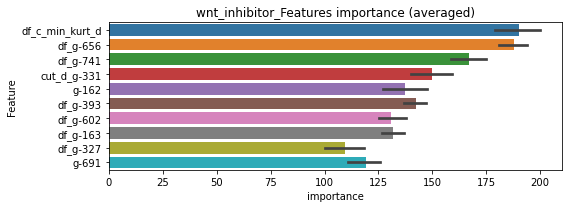

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000361571	valid_1's binary_logloss: 0.00176449
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.000361596	valid_1's binary_logloss: 0.00176448


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[911]	training's binary_logloss: 0.000371054	valid_1's binary_logloss: 0.00269226


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856


Early stopping, best iteration is:
[701]	training's binary_logloss: 0.000428035	valid_1's binary_logloss: 0.00348187


len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[918]	training's binary_logloss: 0.000368035	valid_1's binary_logloss: 0.00289423


wnt_inhibitor logloss: 0.0027081632603524444


CV:0.01553718088600885


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'adrenergic_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_cell_wall_synthesis_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'bromodomain_inhibitor',
 'calcium_channel_blocker',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'dopamine_receptor_antagonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'glutamate_receptor_agonist',
 'glutamate_receptor_antagonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'histamine_receptor